# Imporing all necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import os
import gc

import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup

# Read Dataset

In [2]:
df=pd.read_csv("D:\\Datasets\\q_quora.csv")

C:\Users\Mizanur Rahman\AppData\Local\Temp\ipykernel_15052\2079425458.py:1: DtypeWarning:

Columns (7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
print("Number of data points: ", df.shape[0])

Number of data points:  404351


In [4]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Dropping the null columns

In [5]:
df = df.drop(['Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'], axis=1)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,Unnamed: 6
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,NaN
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,NaN
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,NaN
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,NaN
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404351 entries, 0 to 404350
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404351 non-null  int64 
 1   qid1          404351 non-null  int64 
 2   qid2          404351 non-null  int64 
 3   question1     404350 non-null  object
 4   question2     404349 non-null  object
 5   is_duplicate  404351 non-null  object
 6   Unnamed: 6    337 non-null     object
dtypes: int64(3), object(4)
memory usage: 21.6+ MB


<Axes: xlabel='is_duplicate'>

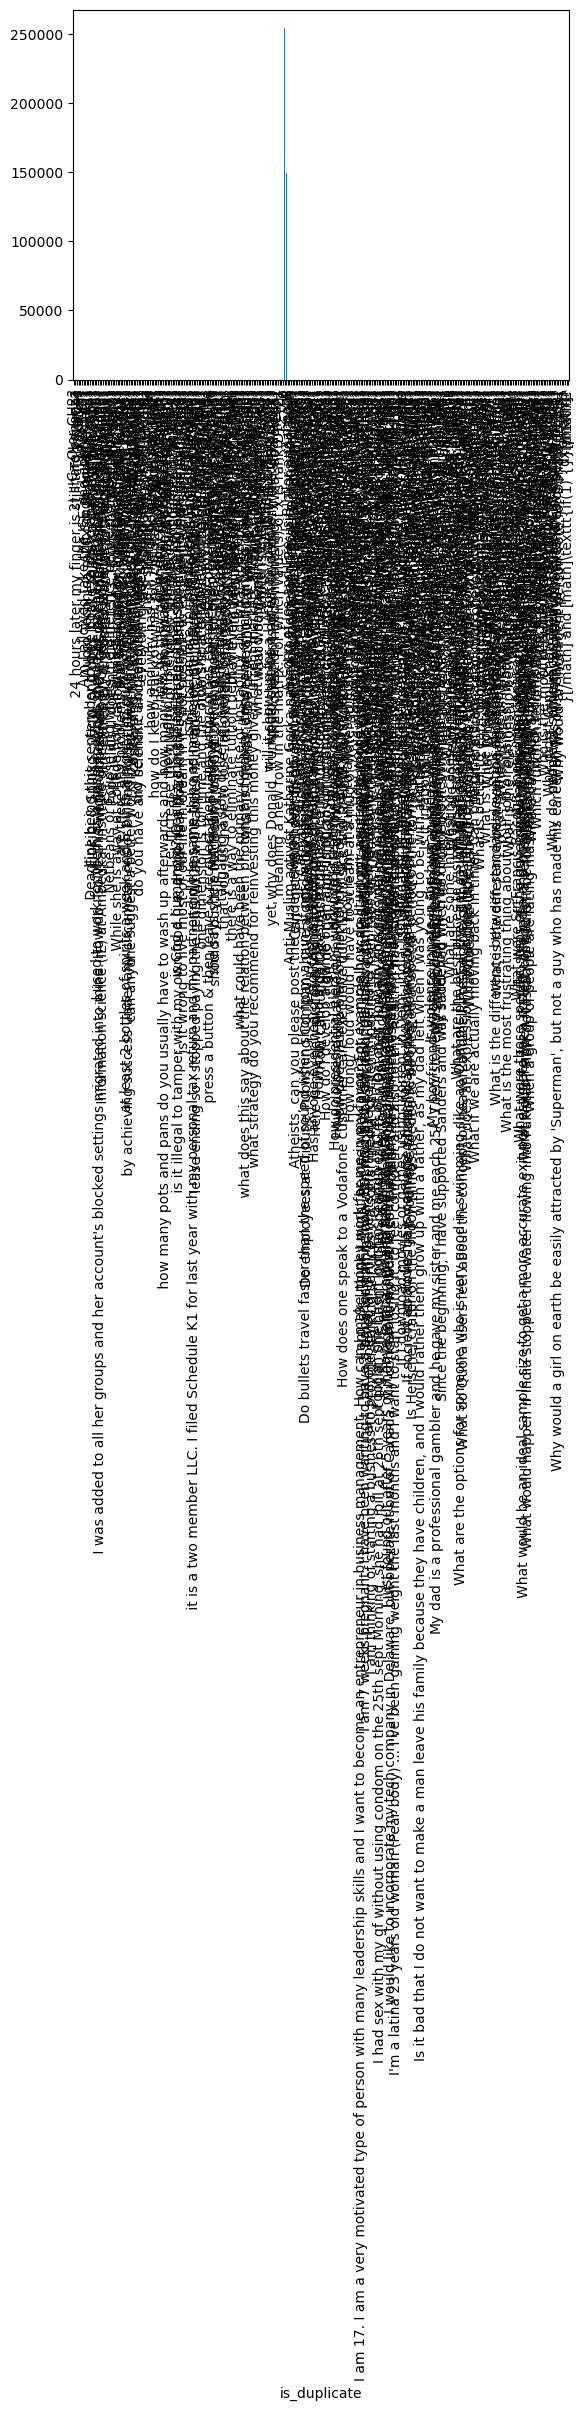

In [9]:
df.groupby("is_duplicate")["id"].count().plot.bar()

In [10]:
print("--> Question pairs are not similar (is_duplicate=0):\n {}%".format(100-round(df["is_duplicate"].mean()*100,2)))

TypeError: Could not convert string '000001010001110110101000000001011000001000000000111101000010001001110001111Do bullets travel faster than the speed of sound when shot from a gun? If not, is it possible? If they do, what gun and how much devastation occurs?0001000011101000110100001000100100000100000010100101000000011000000110000000100010111001010010000101101110100100111101100111100100000110000110011100101001000001101000111010011101010000111000010110011100000100111110010101100100001001110010000110011100100101000000010100001111100100000000001100100001000100100100000010011101011011110001101001000001100000101110000001001101100011000001111110100010000000100100011000110101000000010101111000010101101000000100001111101010001001010101010110010010000101010001001001101000101111000010100001110000000111100001100010000011000100100110101010101011011100000000011010100000001100000010011010110100000100000001100011110000110001001000100010100100001100001000001100000101001101001100001010100101100000100101010000010110100011110010My sister told my crush that I like her without me asking her to do so. What should I do now?00000111010011011010100000100101011001000000001111100001000011111100000011111001100000110001000110001011001011110101100100011110001000000100101000101000000100110111100100111001010011000001001001001000100000101011 how would this change the plot for the whole RR story?01What were the greatest achievements of the Persian Empire?000100000000001010000000000101000010000000001001011100011001001000001110010101100111000000010111011100000111100011011000000000110011110000010000010001110001010100001010010010100001101101000110000110011100010001111111000001000010100010010000000110001000101110011000011101100110100000001011100000000100010010000000000100001000110011100010001111101001001010111111000000110What are the best places to visit in Japan to get a feel for their latest technological advancements?1000100101000010110010110101010001010100001011111001000000000110000100110001010010000011000100000000010001001011101100001000000010100110101110001001001001101000000111101001000010100101000000000001000001001000101010001000100000111000010100010101000111000110001011110111010001011100001100001010010000010000010010110000011010110000101011000001000000000111000101001110001100000010110000000011000100001000000000100010010001000111010001001100000101001010001000100000011110011010100111101110100001100101000010001000011010100011001000100111100000010001100010111010101111110000010010001110011110000110010010101100111100100010010101001My boyfriend wants to have sex with me . And I have mixed feelings regarding that. Should I do it or not ?0010001110000010110001110110000110000000011101111101010101100110000100000000010001000010101001000100001001000111000100110110100001111111110011000010110011100001101110001110010010111010100001101001110010010110010100001100110100010010100010000000000111110010001010101000000111000001100100100110100000000011000100100001010000111010110000011110011001011110101000010010011110010001111000010000100000111110110110001001110111001011100000001001100101000001101000001110011011001001000100001110101001111100100100000011110100101000011000010110111000001110101000010000001100011100110010110000000111010010111001000100101110011000100100000000010101000100001000000011010000100000000100010000101010110110011011010000000001000100001000011001111011000100100000001110100100000101000000001011000100101001010110101101011101010100000010000110011001010011010101011110000100001010100000111000100000000001000110000100001011000011001100100000110110010110001010010110000010010001011000010001111110110110110000101100010010110111101001010111000000001010010111101001001101001000000000101000000000001000111110000011101100000101001000011000111111000100000001001000000000000001000000100001010111110100001000100001011101001001101001001001010001111111110100001110 mass communication or pharmacy?00101000000101110000101000000000111100111000001011010000000100100000001000010111101010000000001111000000110011100001000100000100000101001010001001111000001101000000010000110001101110100000001011001100000100000101100111100010101000000010010001011111010000111001110001000010000001100010101100011010000101010011000000011101000011100001110000100111110000111001100011110100110010011011100000000010010000101101001110100101011010100010000001010101101101010100101001101110001000010010000010010110000000010001100001000010001110000010110110011100110110000100000100001001000001001000010100101010001101000100010101010010100001000000000110011100100100100000000101000111100001001001111001100010010111000001001001010000111110000011000100000001011101011100001110001111111101000001000011011101010010011110101100110010000010101010000100101100011000010000100100000000001001010100000111000000101010011111000111110110100000000000010001110001000110000100011001001111101000001010100000011000010100110101001100001011101001110110110000001001101110100000001100101000100100101110111000011000001000100000111000000010100000001000001101000111111110100000001101000000011101000100001101001000010000001100111000001111100100011000010111101110000110111010000000001111000100100001101010001011011111100001010011110101001110100110101101000000000100100100100101010010011000010110111011001000001000100100111110000000000100110001100000111000001001000001100110000100100100100010001001001100110110000110001101001101100101001010110010101110010011011101000001000110110010010010010001100011110000000001000011100000010011010100000101100110010110001000010111101100011010000101011011000100111110011010100001011011001100010000001001100010000000010101011011000100010111001010100111101001010110101010110110000101000100100011000000010010100010100001010010100010001101011011110010000000000010100000000110011011000000000101010110100000000110100111101000101100000100110001011110000000100000010000000001011110100111010110100011110000110100110000101100011000101101000000001110000000100010010010000000100011000111001010011000100010000100001110110100100001110110110100111101000100101000101001010000110100010010011101101011101110010100100000010000001101001101010011101011001011010010100101000110000111010100000000001001010111011010000000000101100100101110110000001000010110110010110100110010100000101001100010100110100101100001001010010011000101000101000000010111000001000100010000101011011011110100000101100100100000011101000001100100110101100110000110010000000100101010001010010100000100001What if we are actually moving back in time? Can one differentiate a backward flow of time from forward flow?01110011110100010101010010001101010100101101011010011000010000000010000001000000000001010100100100000100001001000100010001110011100100000010011000001011100101000100000001001001011100101100000000000010011000100010101011100001111000I am in love with my classmate, I am gay and he's straight, what should I do?1010110001011001100000001100001100000100010010000000001000100001010010111010101010011010011010000101001101100011101100011000000100110110001001010100000100000000101001000001000010110111110110000101010010011001111010110110100000101100010000100000100010011101001001001010000100010101001001010010110000100101010010000100110000001101000100010001000101111000101001001000011000100001101010001010000110001100010011000011100000000000000000000100000000001110001000110000001011000000100110010010010000001011010100001000011010001101001000000000000101001110000100100101100010001101101010011000100000110011011011110000000101000010001010010000100000110011000101000001000001100001001100001100000010000001100001101001100001011110000011100010110110000000100111100100000000000010110000000010010010000001001000101000000001100110100101010010010101001010100000000010001101000001001110000001100000010101110010100001100100010001010110010010100000010100110000100011011010001110000001000110100010100100111111010101010100000100000000001000101000101100000010010000000000010010000100001011010111100111001100000001001011100100110001100101000001011100010010000001010001000001000000110101001001100001001001011101101000011001101011000111000001100000010000010101101001111000000000100000000011100000100101001100111010110010100100000100001111010100011000010001000001010100000000001000001000001110000000000100000000100010000000000000011100111000100110000000100010000010001010001001110011000100011000011001000100011000000001011000001010000000010110100010011100111010010110110101100001000011000001010001001100100010101101100101000100000101101000000001111011100001101101101001111110000100000010001111101000110101000000001000110100101100000010001001110000000001100000010010100000001010001101100000001001100000011101000111110011100100010011010001000010110010010000101011000001011000000000010011000010001000110111000100100001110101011010011110100000000000000000111000010000110000011001001000110100110000011011000010001000111000111110101100000000000010011000011100001011000011000110010001011000110000000000100110001010000000100001111001010000010010010000101001101100001110010001010010010001000010000001010010011011011000010111011100110001000000011000001101000001000100001001100000010000101011110010000001010000100001101101000000000010001101000000011000100000010001010001110101010110010011001000111000010100100000011001001001011001010010011101010011001000101001010000100001101011011001011000101100101010010111111001001001010010011100010110010001110101100000001010000000001101001110011010100010001000000110000100011010000000100000110000101110011010000000101000000100000001010000001001111000100010110000100000000101010000001011000100100000000000001010010010010100110110100100000001100110110011110011101001110101111000011010001001100001000011000010011100011010011000101100100010011010011111001000101000010001100100001001010001000000000011001100011000000100001010000010001000001000110110011000000010000001100001011001100100010000000111001101110100001110101100100000110010001000000110010011001011000010001001101000001111101000100010001000010001000001100000001101100011011001110001010001111000011000000111000101000100111111000000000011110001011101001000101000101000010010100101001000001110010100000010001001000001100000001010001101000011011011000101100001010000010001010011000010110000011000011100100010000101110011011100010011111010100101000100001010001100011100101110011001010110010101101111110001100000001101001101100011101011100000001000111000011001100011000011001100010110010100000111001010010100000111001101000001001010000011001011011100100001000110100100011001000100000111000001001000001110010100001001010001100111000100000011000000000011100010010100000010110000010000100110110010000001000111001011100001010011001000100010000000001010100010101101000110111101000110100110001000100000110011000100100001001000010010101011001011100000010011100011110000000100000100001010000000001110110001110101000001000001000001100010010100100000110000101010000011000010001111101011000000010110011010000111101100000011000011000100011010001001001001000011000100000000101001001100010011011100101110110010001011100001110010010101001010111010101010001011000110001100001100001110100000000000100000100100011001010101010011000111111000000111101011100000001000000010000001100100000100000101100010100101001010110111010110110110011000000100100011011100001011100011000100000010010000000000000000010010110110100000111000001111000101101000000001000001001001100011111010000010111111010010100010101101000110000000001000101001000101000001110101001001011110101100010011101000100110111010000110101001111000011001001001010001101010011000101011001010011100010010001010000100100000010000101000000010110000010010011011001000010100110000101101001001010101101110000100010001101001011101000110100000000110011000100010000001001000110100000000010001001000011010110000100001000000111110100010000000000001101101111110000001001110000010000001000111001101101000000101110001011000000011000010100000110111101010000101111001000011000101000100011000000000011000000110011000100101100000101010100000111111100100111001100000100010010001100100101111001101011000011111010101001001110000001111000000111100000001110100001011110010100001110000100001100111001111101100001011100001000110101100000110100000010001000010000101100010101110101001001110110010011011001001100101010010111010001010111001000100000011010001011101001000101001000010000000010111000100101010000110110100000101001000010100001001000110001110001000000011000111100110110100110100110000110000010000111111010000100110110011110110110101000100111001000100000000011000000010100010000001011000110010101001100001010001001010110110000010010011010101000011110010110010010100000000001110001100111000101000000010011011000000000001001010000010000000100000100111001000000000001100000100101100001000011011000000001010110010000010110000001000001110000011110000101100010010101100011110011101100000000000101101110000111000100010000000100100100001100111011100111000001000010001001001110000011101100011Does Donald Trump get to deduct his campaign expenses from his taxes?001110000000000101100110010111001001111100000000001011011000101101000000100011100001000000000110000001101010010100001000100100111011100010011000101111011000010010000011100110101000010000001001100001011000010010101000111011101110001000110000000000011110100101111010010011010100010100000000010000011100000000000101000000100011010100101011001101101000010100011001111100000001001101100101000100000001001000000100010001001011010000011100100011011 2) share bonanza01110001000001100001001000000000011100000000001101010000101000010111100011000000010011010100000010000001100011000000010010100100000100010100110001000000101010010010010011001000100111100010000001100011000001000010010101100100101010000111110101011000001101000011100001100000010101011000001101100110010001000111010000011111100000000100010000100100000100111101011010111000000100100000110000010100000000100000110010011000001001010010000000000011001001101110000000111010111001111100100011001101010100110101011110101000000011100100011000010001000001001001100000010001110011110110010000011010110000010000110001110000101001100011001 is this okay?00000000010000100001011What are some TL1010011000010000001010001100000000111010001010010001011110100011000011000110101000000010100111001000001001000000100110011000000000000000001000000010010101010100000100000001001000011101110000100000011001010011111010111001101011100001000001001111000000010001111010011011000000010000110011100000100001000000000000100010111100001101000101101001011001101010010110110111101010000000111010111111010000010100100001110110110101100000001000110010100100111100001101000010000000011000010000001001000100000001101010001010111100011110111101001101001000000011011011000001100011000100111000011100011000001010010010010000110100011001110001000101100011100100100110010110110001101110111001001010011110110000010100010111000101000100100100100001000001001011110101100110101111110010001111101000010100000001110010010111000010111011111110101000000010100101100010010000011010000100000010011000111010111001110101001100011000100000100101100011001000000110010001000000100010100011100010001100010000100001010010110000101011010100001000110000010011100010100001001010001110110100011001001000001100111000100101100100111101110011000011000010001100001110101010101010000001001100010101011101110100100000001101100101100110010010100000110011111011001110011000001001000000001001000010001011000011001001111001100000101000110101001000111001001000100100000010011011101011000011011001001101000000100000000110110101010000100101000000010010101010010000000010000000000000101110001101010000000100010000001000010011100100111001011010000000010111011011001010011001101101000011000000011001001100000111011101101101001100001010100000010100000000100111000001000110010000101011000000101001010010000000010100010101010101110100111000001001010000100000001010000101000100100001000000101111100000101001100010001001011010011011100000101000000000010100000001011101010000001000101101110101000000001110111000001101010110000000011010000010000101110010001101110000110110010010011000101010011001110011000111010011100001010011100101000111100010011110001000011100001001101010110101001001111011000000110110001100111110101111000000011000000011010110010101001000001110110000101001000101000010110010001000000010111101100001000010010011110101001110000011111111111001101100000111101100100011001001000000001000111011011100100100100100111001111000000000000000000001110000010110110000001100010001111100010100101001010110000010100100111010111011011111000000110000110000101000000000001010000110110011001011000010000000110000100101011100010100011011100010000001100001What do Quora users feel about the concept of heaven and hell irrespective of their religions? Can good and bad people end up in same place up there?00001000001000101001000110101001011101111110111101110100010001111010000000111001110010010000000000100000000101010010101101100110000100100000000001001010100010100111100001001100001000000100110110110010101001110010000011010010001101000001110000010000001010100010010000001000000001010001000000001000001001000010100011101000000111011010011100000010110100000001001100100000011010010110011010010000011000100010011011101100110101010111011100101000010000000000100100100011010101000000110100000100000011000101100000000100111000000001010001000011000010001000100000110110000100100010101000000011101100110001100001010000000000100001001100001000101000010000110001100010100001011001000100000110100110010000001011100000110001101100100101100000001111000010000100010111100000110101001000111100111010011000001110000000000000010001011100000001110000111010010001010100100000111100001110000100011000000101000000010101011000110110001000000100101001110010000001110000111000010010011010100110111000011110011101000110111000111011100100110000000110000001011110001000010010011100010000100010011001110101001011000100011100100000011101101000001001110010100100111010011010100011110001011100000000001101000110101101101000001100000110101101100100011100100001100010100001010001000010000000010001000101100000100010011001100100001000001001000100011111001010010000001000000101111011100110010000000000101011110010000000111110011101100001011010100000101100100000000101001000000000110001101010001000000110110000110010101100110010101000100101100100100011110000001100011010001000100010010001110000001100100010000101011100010110100010100010011000010000001011111110011001000001010110000000101001101110010001000000010010000111110000100011000001100100000000011100011100100101001110111011010010001010001100010011010100001101000110011001101010010010000101000011110011000010000010001001011010110101001110100010001001110011000100110000110111000100010111110011001001000100101000101100011111010000011110100010000111100010000001011000010000 how can I plan that?11000110100110010101001100000110000011010110011110001110010110110111001111000000010110001000110100010101101100001010001000000100010000001000100011010001011000000110100011000000101011110100011000010000001011011010000011001000001101010000001011001100001100000110111001001001110001000100101010110010101101000000100001000001000000001000000100000011101001000000000p:1%7C10000111011001111111010001011010000000011000100010001010011100100000101010000000001010100000110101000001011101011010011100100000111000001101000000000000100001000011111010100001101011000100000100000010000011000010001100000100010010011010000100011101000000110000001001010101111001001000100010100001100100000100000011000110000001101001001000110000000000000000001111100000000011111000001110000101000010100101111100011000100000010110100100110011001000100001000011000111010110000000101111010100100000011101010011101000010100111110100010101000001100100000110000000111000000010001010101011101110100001010110000111000100000001100010001100001011000010001000101000100101000001001101000010100110110010000000100000010001101100101001001101010010000010001000110000100101110000110001110000011101100000000001000110111011100001000011110110100100010000011001111100100111011110101100000011000110000001110000110101000100010000011010010100000000100110110000101101100110010110001001001101000100011010011111110001100100110011000101101010000000101001001000011000000000011111001010000100011100000000000011001011001010011010001001001011000010100001111001000010111000000100000101111011010000110100001001010010111101000000100100000000100000011110101010100100001011101010101001000000001100011110101100011011101100111001101000000010100101100010000000101001100000000100000000000100000000001100100000100101010001011100000011011111100010011010110011010000001001000010100100011001000010001001101010110000111000000110010001010110001100011100010000101100000101010100011000110101001000000001011001101000100110110110001001000001100000100000100101000001000001000000000011010110011000000010100101000010110101001000110000100000101010011011101100100001011001100000001000010011100010010011011100111000010100010101001011000100000110011001110001110000010011010100100101100000001010000100100100110010110001011000110100110010101100110010011001000010111010101000000100000101001101111101111000000111101110001011000010001010001000000100000010000100001010110101000011000101001000000001001011010000111100100001000101010101010011000000110000011000100100000001000100000100000010110110011110100111011000001001000100010000100000000011100001000101000001000001110110110101110101010110100001101010100010010110010001100001010110100100010000111111Has anyone ever heard of a friend forgiving his friend's having sex with his wife, and their being friends again?01100110001100100010100000001100100110000010101001000000110000010001000010110Why do people of some races seem to be better at certain sports?0101110010100100101110001000110111001010000101000000001101100110101000011100001110111000000000110010110001011001001000001110001000000000100001000010000000001110100001000001000101000111011010100000010001000001110001001101000010000100101100110101011010110000101101010010000101100111011000100000001010001000001000011001010100100110010000110100001100011001001110000011001101100100000100000010001001001000110111010001100110100010001010110000100111100001000010001100010100000110001001110000000010110000000111000000010010100001100111100001001000010111100000001100010100000001001010100000011000001000110100100010011011101000000101001000100000000101000000000100010111110001011000110010110001110011100011100100000010001101001010000001011010101110001000110101010000000100011010111100101110010001101100000000010000000000101101100010111110001000000010100001100111000010011001010100001000110010100110110111100000100011101010111000011111011111010010000110000010000101100100000111010100000010001110110001000111101101101001010 how do recover my password?101110010001001011001100011000111001000000001100101010011101000001100001000011110100100001000010000100011000000000101000011100000000000000000101100100111010001000 stocks or a bank account?100101110100110001001011100101010001101010101010101000010011010100000000101101010000010010100100100001010100001000001001010001000000100000001101000001000001100011000110000111000000100011000001000000000110001011100100100100100000010100110001011100001101000110001110000 Netbeans or Eclipse and whats the difference between these two IDE' s?1101000110100000111111110001000001110100010000011100100011010000111100010001010000100010100110011101010000100111001011010000000011101010100011001000010001000100100110000001100000000110101011000100010001010001100100000000111001001011000000001001010100010110001101101010010101000100001100010100111011000011000011000100010010101100000000011000101101000101101001001010011000000010000010011000100010000100111111100011101110000101000000000000000000100001011111100000001101000000100111010100100000011001000011100001100001000010011000000000001110011110000001001000000010111001011100110001010110010100000101001011100000000100110000101100100010000001011001011011000011000010000101011000110010100010011010101110000001111110001110110010000011100110001000011011011010100000110101000010000000000011101100101101000101111001011100001011010000111100110100001001100010000000100000100001001010000100010100010110111010101011011011000000110000100011000101100011011000000001000000000000000000011000001001100011010011100101010101111011000000000011100000100010000001101001100110000101110000011000101100000100001110001000000010101000100100001001000010001000000101101010000110010001010000011101010010000100101110011101000111000000000010000001000111000010000011101110100010100000001000000010110010Which Indian states are well known in other countries?100010000000001100101101100101111001001111001011100101010001010000010010000010011001010000001010000111111101001001001111100101000010010000000110001000010001010101000010001101000001000011000000100010111101000010001110100010000101000000110101000100101101100010000001000101101101000101000001001000000010000000011111010011011100111110000111000000001000110000010100100010001100010111000100010000100101010001000000010010001010001010111100000100110001000101101100010110010000001000100001010000100010Are you fonder of Nietzsche or Kierkegaard?1101010010000000011110101010000001011001010110111000101010000010111000010000101000100110010111000010100000001000000100010011101100101100110010000001000001000001101010000001001010101000010101100000000001010001000000011011000001010101110001011100101011001101001010010010000111000010000000000010001100001110001000000011110001010001000001011000100100001111001010010001010110010101001000100001000001100010001100000000110001101100010100011010110110001001100001011110010111001000100110010000000101100011101000110011010101110011100100110011000110011111100000111100000101010000100100101001001000100010000001101010010000010000000000010010100001100010001110010011010000010100110101001100111001010101000000101000011100001000110110100001100101100100011011101111110000000000101111001000011001000010011000110010001010001101001100101010011010001001101010101000100010110001100010100100000000001110101000001001100000010101011My ideal girl is out of my reach. Should I settle for what I can get?00101111100011000010010000011100100110001011011000000000100010000000100000010001011110000011101011010011001100001100010001111011000001110010110100110110100011001011100001100010010100001110111001000001010000000100001001100010001000000101100000000000000111010011110000010100101100100011111010000100100000101110101000110001010000000000101111100000010001010100000010100100000011010010111100001011011100011001000010001011100010000011000011100010101001001000010100100001000101100110011000111000100001000111000001100010001111100000010101100000100100100001001011010110000101010000001101111111000111010000011011001011010000101000101000111010000110001011001001010110000111010100001001011010000001000011011111001011000001100010100000111110111100010001000000001111000000000101000000000100111001010000000000100100000001111010000111100111111000011010011010100010000001001111010001010100100000010110111000100011001000111111101000001110100000100001000000000101100010000110001001101001100000101000000101011101000011001100000010010110010001001000001100011010110101111001001110101010101000001101000011001000000000000111000101100011000110001001001111010110001000000010010000000000100011101000101011101001001000001000100000110100100000000010 Pope Julius II doesn't die in 1513. How's the world different?10010000001110000010001010101110011000010111100100010100000000000000000000100001011011100011010011010100010010101101000001010000101001000001010000001100000001101010110010110000001010000110100000000001001000010010010111101111011010101100100111110001001110000000000010010111110010000000100010001100100010000001100000001101010111110100001011111000101000010001000101101011000100001000100000010000000011111001100001010001001000010010000100101110110011000010100001000110101011000110001110000101110010001111001010100000011010010001000010000101110011001000011100001010001010100000101101100000000011011001100111101000001100010010001010000000111000001000001000101101110100010101100101010000010000101000010000010100000010000010000001011010110010000010100010100001001001000010010001010000011111000010111001101000000111111001110101000101011000001000000010000100000000011010111101111000000010000101001000101110000111101111001101010010010010010101000001100010000001001100010010000011000101000011011001001000101001000100010011000010110000001111011110010010000001011101000110000100110010110010000111000100100101110000000010001010000001110110000111001010000000000101010001010011000001010010110001I'm a woman. How do I make gay friends?0100011001100000001100000001000000101000001000100000000000000000000100001010110010110111000110000000000010000111001000001110110100000011001110110010100100011011100111000000 Tupac or Biggie. Why?100110000000110010100100010010001000010000110001001100000001000100011000100110100100111100001110000000000010010000010001000001000011100000010110110010000110110001011000010001100001010100011100011010001010110001000010010101101100001000100000010000101110101000001110100110101000000001011001010100101100001001100100101010001001111010000110100110000110000000100010101000010100000110100110110100010010000000001000011110000001111010100001101011110010110111101011000011111001011000010001000010110110100001011000001000110000000100010010000000111101011000000111001001100011000010100000110100001010010100001100001010000110001010100101011000000100100101000010100000100101110001011000000100010110111000110101010101010001100000110100000111100110010111000011100000100001001010100010010000010111010001111001101101111011100100100000000000110000010011110110100100010000110001000100101100010000100011100000001100001000000011010000010001010011000100011010111100001010111000000010110011101110001001101100000000011111100101110110010000101000000011000001101101100001001100001110001100000010000010001100100110100101001001010000000000000101010001010010011000101000010000101011011001101100000000110000000110000101000000111000000010010100111101110010100111000000001000001001100000110010000010001110010100101110100101100100001000000000100100000011100100000110011101000101100100010001111000000000110110011000110001101010000000110001000110111000010001010010000100001001000101011000010111110001100100110011000000000011000011010101001011110000001101000100001101111011001010010010000001010001101000010101000101000110000010000000100000111110011011010111100010011000000011101010100000101010000000011001100001001000001111011100101001111110011101010100011010101011100001010000001010010000011000001010010011000001011011000001010000000011101100010100111111101001000011011010001111000101000111110000000101011011010001100001000111010100101011000000100000000000101011011110011000101100000000001011010000001110000010000110010000010000000100000101100000000001101000100000001101011100100101100001010001001000111001000110001010000100110110000110101100000001001000111110000101000001101010111010111000000110001000010111011001000001000010010001010001100000111010001010110101011000100011110000000100000110100000110100111000100011011100010011110000001100101110011000011000100010001000000000100100110111000110000011110000100000110010011110110011000100010000100000001010010000010010001011100101001011100110100111000000100100001001000000010101101101110110001000001010110001100100110000000110111010000110011110000001011110011100001001010011001010111001000010001101010000000010000100000000000010010010100100000100010110000001101010111111011000010001110000010011100010000011110011101001011011001000100000100000010010001010001000000101100001010101000011010101101000111000000011100010000101111010010101001001010010001000011000000100000011110001100111111111111000100001001000000101000000100001100000011100000001000101000100000101001010101101010001000011010001000111101101100000110101000110001100010101100100000000010101000000010010010000110100111100010100111110110011111001110010011000101000101000000010000000111000101000100111010100011000011000101001000001101001000101000001111001000010011001101100100000100111001100001010010001001000000100100100001000001010000000000100000100000001111100010110011001100000001001110011101010010010000010010000000000000011000000111010010001100000101001000010000100001000010110101101001000001100010001000110010111110011000001010001010000100111000110011010001000010000000011010100100000100000001100100100000011010010000001010010110110011111110000010000101001011010111101000001010100101100001010010000100011111001110000101100000010001110010010101011111010011101010011010001101001110010011000110000110010111100100001000010010000101111100100011100000000110100000100001011001000000111010010110011001010010110110100110010010010000100001001101000000001000011001010000101100011100110000000000101010000011001001110000110100001110100010001011011101001100100000011001111001010001110000110010010100000110010011010110100000100000000100000010010010011100100000001001001000010000101000001101101101001100100010010000010010011001100010000110001000000000100110110001010101101100000110100010010001010010101110011011100000101000010000001001101000010111000100011001111000110100010010100000101000100110010010100100101001010100000010000010100011001101010010010000111001110101000100001010100000110100110001001100010010011011100001010001111000000000111001000101011000000100110100000000000110010000000010110010001000101010101101011010100001000011100111000001000010010101001010010100100000010100Can humans eat cooked chicken bones?001100100000000100000001010110111110000011000000011001001000000010100000110110011110011001100010001000100100000000000101111001000001010010100011001111001000000100110010000101111110011010001001001000001011010000000010111001000000010101010010010010011101110010000000000100001000001010000000100010001010101010010000001000110001010000000010000001000000100111000100011100100011000001110100001 or feel thoughts?1110000101001010000100000000001100010101100001110000010110100001111001010010011110000000001100011010000101100110001000100001000100010000000001101111010010001110110100001011100101100010110110000001110111000101001000001100100110001001000001101100001000101000110011011001001110100001010111100111001011111000000001010110100000001111000111000000101000000000011000100111000100111101100000000001001000111010001000110110110010010100001101011000101000010110000101110100110010101110101111101100001100110000100110010001000111101101001000110100000000001000001000101000000000111010001101100110000000001011101000000100001010000110101110101100001000010100001100100110000000101000101110000010100010000110001000011000000100100001000110110100000100011010010001000110000010101101001010110101000010100010001010000001111000101100000010110000011110001000010010011101000001000000100111001111000011010100010011000000111010110100000010001000100001000100110101110101110101000000101010100001110001101110010001111101010100000101000010011101010001101000110100001000100000111100011001000001010000001010010100101000010000100100000100100101010011010110110101101001100011010101111000010001110111101001000101010010011100100010101011000011000111011000001010000111000110000000101100001100001100001010100000010000010100111010100001110111000000110111101010000010010100100000000110001010101011011010000011000000000110111001111010111010101000000100111000110001010001011010101000100100001010110001101101000100101000010110110101000010001000100000011011000011001001110011010010011100011010010000001100100001000111010110011000000110000001100010111010000011111000010001110000010110100110000000010001110011111100101011011010110010000011110101001000101000100001001000001010001101001101101000110110010010111110000000110001011101101010101001001110011100010011010100001110011001101000000011100101110001000010110000001011100100110011000000001011101000011001011010101110000010001000100100001110000000001100010000111000010010000000010110000001000011100000000100011111000001110010001100111000111110000011001000000100010011000010000101001001001010100001001100010010011111000011101001000011111100111010010000110001001100111100011000000100000100100000011001010011010110010001100100110000011010000101010100000101100010000010001000001011000000100011100101100100100101100011000001100111011010101010000010010100001100001110010000000001010111001000000001000011010100000000001110111101110010000001011001001000110001000001100001111000000010000111010000100000101011110100111100000110000001001000011010111111010010011100000111101011100000110011000110001000000110010101000110011000001101010110000110000000000101011100100100001101010000000101111010100100000001000011010000100000001010000101110111010000001001111000110000011111010101000000000100011111000110101100000000110000100101110000101001101000000010101101000101110110001011010010001010110110001001000000011000011000111100000101000001000001001011001000011111001000110000010110111011000100101011111011101000110010001011000100100110100010101010000001000110110000100001001100000100000001011011001001100000000100000100000110000011100101001110101011011100100100011000101101011010000000001010100101111000010110111101110000010010011110101011010100010101001010000100010001010011000110000001110101000101000000110111110010000000100110110011000101001000010001000000000111000010010101010110101100001001011001100000100001000010000010100000011100101100100101110010001110000011101001010101100010101010000100010100000000010100101000011001001000100100000010011110000000100010100001100111101101010010000001011011001010001100001101100000100000001001100001000000001110010110101100000001000010101100010000101001110001010000000000010010110001000000000000100000101011001001010010101010101110100110111000000011000010000110010101000001100000000001010001100110010010111010010010101101100010001111001101000000111011011100001000100101001000000010100101100010010000010011001110100001011111110001110101001001001011000011001000100001001111101001010101000000100100001000100100010101110011110100000100001001101100011110100101110010100110001100100000010100100010100001000100001000010000001100000110011010001000100010011000110110111000001110010000110110010000011000001100000110001010000110001010010010111000101011000110000000011010101000100011010000000010110000101101100011001100100001001000010101100010100111010001111011101101110100110000001111100111000000000010001000011100010000000111110100001010000011110100000100111001101101011011110011000100001010001100011000101100001000000000000000001100001100010100010101010111100000111001000001100110000000000110111000000000011001001011001001000010001011000001001001100001010010000010001001000000101011000000100000000000100000001100001010011010000000011111011011100110100000001101100100010100010011010000101001000000010001110000011001100000000011001110000000100011101010010100000010000100101000000101101000010001001100111101000011001110000110101010110000101010001000100001101000100110110000110100010000100010110000110100011001000101000101110110010100000100001010001001110100000100100110001100010011101110000100101011010001110101010000011010010111010000011111111101011110100000100001100010011110111011110010001000110101000001110000101011101001010100100000000010111101101001101101101000000100000000100000000110110001111010000101010000000000001100101011001110011001110001000101011110010001001110000000011000111100100101111010010000001010001000110000000010111111010000100100010011001101000100111100101010010000001001101000100000010001110101000110001110000100010011001100001100101000000010000000101100100010010001100010100000100100110111001110100000010100001001000110010001100000100100010000110100001100000100000011010001111000000001000001000000011011011000110111110100000001110000011000000011001100001111010000110100010011100000100111011100000011100001101110110000111101110000011001011001000011001100011100010101111000001111110111110011100001100000000001101010010001000001010001010000000011001001100011100010000111100010010001111011000000000111111011000110000010101000101011110100011001001010001100001010101010101000000010100100100001011100000000110100111011010110100000100000010011010100100000010101001010100000100011000001010010000000110000010010110001010110010110010100110000000010110110000100100010100111000010001001110101001100010000001000001011000010001011000010000010011001011010111011010001001101111100000000000100000110000000000000001000011111100010010010001101011000010110000110100000000001010110011111000011100000010110110000010100000001001000000101110000001100011100010000011001100001001011111110001001000100000100110100000001100101001101100110111100110000110111000010011001011001000000011100101000000000001100010000100100000100001010000110001001010000010000000110010011111010001000110000011101100011000010001001011111100011011000010100101101100010001010000000001001110001000010010001000010100000101011011000100001101100100110000010100100001000000001001101000110000001000010000110100010010011010101000000010001100001110000001010001100100000000000010001000100101000000001001011011011011010000110110000101001000100000011000001010100110110000111110000011000110001000101000100000010000010001100001110100010001110000000011001010001000100000001101010101010001100000100100111000001000000001110110100111001100100011000110000011101101100100000110010000011100110000100101111100001011100000101000000000111011000100100001001000101001001111100000000110000100011000011010100011110000011001000100000000000100001000110110111000000000010010000001000101100101010010010010000101011110000000010010001 how is it so popular?100011110011011100011001000000011110000100000000000110000111100010010000000001101000010100101100000001010111001101001111110001010110101100010001001101000100011001000010000001101001000101100010000010011000110100100010100000100001011100110100010101110001000010000010110000010100011001000000000110001100100000101011000001000000001111000010010100100001111011110100001010010100000000110010000011101010110100010110011010100011001110110010110010001110000000101001100101010011101110010010000110000011 Am I allowed take the JEE and apply to IIT?0101 what does this say about the relation between photons and gravity (tons) and which particles would bend upwards?100011101001101100100001000000010000000010001101000001101010000000000100000000000001100111000100111100100011000000000001100000000010000001001000010111011010100010010000010000100011010010000100111110101111000011000100001010000100001011001111010110010001010010010101011011110000100000011000111001111010010101110010000010101000000101011001100000100011000100001100101000101010000110001001000100100000000010000011000001110111001110100100000100111011001100100110110000101101110001010010000110000101000000000110000101010001101101100000100000011001100000101110100000010011000100101000000011000000010100100010010110000110010011110101001010111111111100011100001010000001011001100010011001010011100000000101101001110000000001111011000110000000010111011001000010110100000100110100011001100001011101000000010000000111100000000011110010100Why would a girl on earth be easily attracted by 'Superman', but not a guy who has made his career on his own, saves lives or makes lives of people easy?001011101001010110001001100000011011001110111010101001110000100010011001000000001011100010001110110011100111101001000000010011101001100110001011100001000101000010100111000010010110001001001100011000000011100011110110111011101100100000000001010111000011110010111101111100100010101011110010011001001100101010001110101100001011000100000001000000111110011110001110000001000101111001110001000000110000011000011101010000001001100000000001101011111001001011111101110101010000100101000000010000101001010000010000010000011000001000010000000000001000101001001011011110111010000101001000000000110001111110000000101001010101100000011000111011010000101001000000101010000101001010010111010101111000001000011000100100010000001000001100110011001010010110111010010010011100001001111110000111001001110110000000011010100011001110000010001000000000101000000011101001000110010000000100011010100111110000010011100001010100000101100010010111100100110100100010101000011010110000010000000001011011010000000000010100011000010010010011011000000111000010011001100110100010000110010100001011010010110110100011011000010101111111001100011011100000000000111000000100011001000000000101000010001011110100000000001000000111101001100010110110110000010000001101000000000000100110001000001100101100011010000111Which is India's highest peak?1010110011001100100010000000001010101100111100001010000010001000001001101010100100001100011111100001101111011110101010111001111100010000000000011100110000100110010101011011000010000011000000110001010011001010011100010111010000111100111000010010010010101000101101010110101101010000000010001010010100101000100000000000101001011000000101000000101100001000011001000110000011000010100110000010111001100000101000010100100011010100100101101100110010001100111110010101001001011110010001010000110001001000110111000100110010110101001110100101100001011000000110110110001000100001101000010111010101010011100000001100100100000000000011011110100000001110110000100111 foundation or BB cream?001001110000010101101110110110000100110101011011000001001101000010000000001010000111100101000100000010010010100110100010101000001000000001001001000101000011100100101010010001100001010110100110101000101100010101110100011000010001000010100011100000100000100110101010100000000010100100000010001110010110000110001001101000111101001001110001010010100000000110000000100101001000011100111100110110001101100001101010011000000000000000110001111001000000000000110000001001100000000001111010100110010001010011100110000110000000000000101010001001011011000110001110101100010100110000101101000111101010100000011000000100010011000010011001010000101110010000100111100000011000101101101000011010111010100001000110100110000000101000110100101101001000100011101010100000000111001000000010101000010001100111010100111100001001001001001011001000001010000001110011010000001100010010111110000000100011011000100010100111100000011001111100001011001101101100110110110010001000000000000101000010000001100101100101101100000001100011111101001000100000000000101010111000000100000100000100001100000000100111010101001011100011000000100000000001001100010010010000010011010001101100000101110000010111101000011000001011000100111000111010010110101100111011000101111110100110100000000110111100100000000101000001000100000000011001011000100110100110011111001110100000011110000000001100111000001101000010000101100111001010111011001110How is symbolism used in writing?0011011001110101010110001001110000000000101101010100000011101110010100011100001000101101010010010001110011000111000100101000101100101110000110011001010110010100011000001011011100101001000110101110000100000000101110010000010101100101001000010110110110011000011000101100000100000010000000001100110010000000100010001111100000001000101000000000 is it illegal to tamper with my own food (i.e. dropping a pizza in the toilet and then storing it) knowing they'll eat it?100010100110010110111100000100100110100000110101010010011010001000111001001000110111001001000000001100000011111001100000000110001110100000000000001010001100111001011100001110000001010101001000011010101100100000000110101000110000010011000111100101000010011010101100100110110001010100110100001010101010001000010001001010001110001101101000111011000010011100000101111101010000010000100000110100000001001001010101111000001000011000100110101111110001100001010My dad is a professional gambler and he gave my sister and me each $25k. The first one of us who doubles the money anyhow wins another $250k. Should I just bet all at once in Roulette?1001010100101000011000100010101100001111000100101011010001010000100001010111011010001010000100110000101000001100100001101101100001000010001010110110000010001001011010000000100000100001100001011011100110001000011000010000011000101110101110010010100001010000101001100001010100001000101010100111001000110000000010010110100001110001101000000011010011010010101100000001010001011000111101100101001100110111010001100001000110100000100100000010001001100010110000100001001011010000000110001011001000011010010110010101001001000111000001010101010000000100100100101010101000111010000111010111010010011011011000101101010001101001101000100010001100010110100000000010001010000000011100001100001000000111000101111001011100010000000100110101010100100111100010101010000100010000000000000000000110000011111101000011000010100000000001000010110000000100000000100100110011011010101100011100001010010011000101001000100110011111111100000001011001100100010000110000000100000001110110100011111111010101000000001100100100000100100000001010000010110001000001000010100110101101100100000001110001010110100011010010000011010000100111000110000100001110110011101001111010000101000100000101001010100000000001101001010000011011101000000111101010000010101111001010001101001100010000000001100101100111110011110111001100000000010111000010000100110001000011000000100000001000110011001000100100110010100000000000100000011110000110010100111011001011100000100100111111100111110011001001000000000100000110010000011001000001101100001000100001110100100110110110010001010101001100001011011000100001011011100010101000100100000000101010111000001100100000011010000001100101010111001000000010011101000011110011110011000011001101000000000100000100000100100010101110011100100001110001001001000010101101001001111001000000100001111010011010010010000001010111100011100000110001010110001011010111111010100000010011101001101111111010110001101000110101101001101000000001000000100000010110100100000101100100001111111111101000001001011001000010010001010100010111100010001100101011100100000000010000000010010110000000010001000100100001000101010001001101100001101000011000001111000000000100001010011000001011010100001010000010011000100100001001001010001100001010000101110001110001000010001001000010010010100000100110100000000001001000111101100000000010010001100011110101011010010010001001001100011000000000100111101001101000110000000010110110001011000000010000110000111000100100100011101010000101000010000110001100010110000100010111111100100110010001010001101010001111010010101000111100010000110000000001001000101000100000011100100101100000000010110000100000000000010011001010000110110000100001001011110010100000011101000001000010001100100001001000011010001110111000000001101110100100010101101000000100100000000000000101001010000100011011011000001100001101000000000001100001000000010101000000000100110100000110101000001100010001111000000100001010000010001100010011010000000001010000001100000100000100001011100001100011000110100111000000010110000100010000001100010100111011010100000000011111000101000010000000001101000100011000000110000101100000000000001001000000111000001000000010010101000110000001010100011101011010000100010000010110100001110000010111011010001101100110100000000101001011111000000101011100011111100010100110000011011010000110000110100000001110101100001010000011010011001100110011110100101000011001001100100011100101101100000000001110010000010100010010001000010111110000000010100000100000000101110001011010000000011000001111100110000000010101000000001010000001100010000000000101101000000101001001110010001010101010000111011101000010011101000110000100111011000000100100010001000000100011101000101001011100100111101010100010001110001100111111000100100000101010110110001110000100001110100100010111010011111111011000000001101100100111100101000000111001010011100111010110100000000110000010100111011001001001000011000010000000010010101111001001001111010010000000100000010100000010011010100111000101000001100000110010000010100000100010001100111100100101001000000010000000001100001001011100100110010011110001010000100100101010001011101001000101100110000110000000000001000110001011000110001000100001001101110001111100100011000110000000000011100100010001100000000110001011101000001000000110110000101000000001100100000001110101001001110100000100100011001111001100101000010110100001011110000001100000001001100010101101000011010010010010000110110100010111101010010010010110000010000000010111000000000111000010000001011000010111010010001000011010101111000010001101100100111100001010000010110100000000000010011010110010000000000000011011010010001001000100001010000110100010001010111101000010101110111011010100000011101000000000000011000010101000000001001101111101000001101010001010001000000000001000010000010011001101000111000100100000101000111001010001001000000011100101011001000100010001110000100100011011100001000100111000010011111100111000010000001011011011010011001010011010110000010100011000001011000000010001000110111001000000010001011001001011000011001101110000001011100010100001010101001000000010100001100110010010000001010011000100100000000001110110100000011001001110010000110000100011000100101000110011010101000011000001010000010011101010110101001001000000010100111000000010101011010000011001001000010101010100010100001011101000100110001100100011110100000001110000111101001001101010000000100001001010000001000101000100010101100000011000100110010001100100010011001100000010000000001100100010001100010001010000111010100111011000000110000011101110001111101110011011101000001100000001011000000100010001001110100001001100100110000001010010001011000000100000101101010000001010011111100001000010011111100100000011101111000010001000001000010110000001010000100100100001010000110010010001100000001000000100001000110001000000000110000011000011000000111000100000010011000010000111010001010101100101000010000101110110000001101001010010100001011000101100000001111000000101000110001100101010011010000100011100010001100010000111001001001010110010010010101000000110011101001001100101100000000101000001100101110100000000100010000000001010101000111000100000001001001001111100110100101110000000001011010110010110000000011011000011000101110010010011101110111001001100000100001111000001000100100110010000101010110010101110110111000010101001101010001000000110000100001010010000010101110000010100001011111111001000001001111101100001101011101001010000110001000000001100010010110000011110000100001010000001010111101011001110100100000000100110101000001110000010101001001000010101000101000011010000000001000000010111000110001010000110001101011010011010011110100010001001000100000001111000100000000110111010110011000101111001100001101100100000000001011110010010011001000110100001001000001111100000101001000000000000010010000010010100010000010101001100000001110001010000000000011000001010100110110001100000100010000111010101001100010110011111000001000100100000110111101100011010011100011000010000100110000100000001110010100101101001101100101000010100110010100101101111001000010001010000101100111010000000010101000100101000000100011010111001010000110101111001001100100100011000011000001100000101010010000010010000111010000000011111100010100110010111110111001010011101101001101101010001000101100000001001000100101000001000001100011011000001000001110011000001010010010011000101010001010001011000001010101110010010010010000100101001001100111011101011010000000101001000011001110001010100011000100000101000010000010000001100000000000100011010000101000100000001100000000011010110110000001010011010010010101000010110001010001000000001111100000010000001011010011100000000110101100000010011110001001010001101000100000110100110111110000010110100010100001000010010010100011110001101000001001000100101000101111000111010000000001001011110111100000000000011100100000010000000000100001000101110001000000101000100000101111100000010011001110100100110000000001100010110000110101100100010000000101110000010000110011100010000001110001100001001000110100011110000100000000010000000010001100010101100111110010000001111011001100110001001001000101000001011110001011010110101110010011000101010001000000000001110100001010110011000010110110001100110011010111100010111101100001000001000001001101100010000011000000110000110000001011001111001110101010100100000111011101110011110010001000000001000001001101011000010001010100100011001111101000010011101000000110101000000I have a great idea for an app which requires extensive coding skills, but I dont have any basic knowledge. What should I do?0110010000110000111000110110101110001000101010010001100010000001110010010110010000011100001100101010010001001001011010100110001100011111011000000111000010101110000100000000110110001100010100110101100011010001100000111001001011101011000000100010010100001001000000100110110001000000011000000100100100001010101001101100100111100011000100010001010110011000001010011100001001011000000001000000000011010000100010000111101101110100100010001011001001101111101011101000100001010000000101101010100000000100000011000101001101010010110100001000000000001000011000100100101011000001110101100101100001010000010100010001000000000100101000000000100100100001011001000000010001000110110010001100101010101101100000110001110100101111100010000000000001101001101001010011100111101001001000010001000111010000101010100101010101000110111110010101100001000000011010111010010000001010100001010001100000101000111010110010000110011110000001000101100010001000100001000111110001000010111011100010100010011001100110000100110001100010010011011010000010001100101110100000101111000000101110010010000100001101100010000100101000001000001001100000001101000000011000001010010110110111001100000100110010101100000100010110000000000001001001001110110001100110010101110001000001000100111011000011010000000001000100010011110010100000000100010000110000111110110011100100001111010000000111100110001010010000100000101100001001100100000000111110110100100110101111001101101101111010010000000110010001000110001111000010001111010100100111010011010011000000010000010111101111011100000001101100000101100011000011110000010011100000110011000010000110010001011001000011110000001100011100000101000001010000110001011111000010000000111001000000101110010011001101010001110011110010001011101101101101001001000100001010100000001001110000110001101000100010001000110100101100011101110100110100001001010100101001101000110001011100000001100110010111001001110010001110110000110010010000100010101100000000010101101001000101100010010100101010000010010000010000110000001101001110100000011000001001010011000000101000000010000101010001100101010000000000001110010010111110000001101000011100111100000111111101110010110110011010100000011110001101111100010101101100010001000001010100000100110101001001001001100100110000000000001000101111000100110000110101111110100010001010001000110000111101100000110100101001000110001101011100000110010001110010100000111100100100111000000010000010000000001011000000000000111000110110011111011001010011000111111000000101011000100001001100110001100111010001101111010000110100001110110010000000001101000000110001001000010011001001000011100100000100010011111110000111100111101110110100100010111001101101000000010010010000100100010010000100000000010000011000001001011100000111100100000000100100010000000000110010000010101100010110010110000101000001011010001000011001100000110101011000011010000011010000001011000100001001010100101011001100111000000101110001011001011110001001101111111100001101100110101000000110000001100010000001100000001101010000101001001001110000010101010001111100010110100100100100010101011101001010100110100100001010000110011010100011000100000000110111001000000101001101101010100000001010100101101100010001010000100110010001011010001010100101010000001000000000111110110100010110000001010001100100110000001000111001000001110010000110000000000101111111010001001000010011000000000010000000000110100110001000010101101001000010101001010000110010000001100101000100100001010000011110110100000010000100010000101010001011001110000101101001001011101100110010101010111000010101010100000110011000100001010010110000100001011100010000001100100100100110001010010110110100011110000010001100100100000110100010100111000011101000000000010000000011100000001011001001110000010111000101000011000010000010000011000000100000001001101000011100001000100000000010001001000010110001011011100000110111001001110110000110000111010010000000100001001110011010000101000000111010000101111101111001010001010100110100100101001001010000000000001111010010100010001111010101011000111111010001001010001000010001100011001000110001010010010011001000011011001000000001100001110001010011100101110000001101110100000100001000010000011011001010001110011100001001010001010001011011000110001100000111101000001001000000011010000010001001010010101000100110100100100000011010010000101000100001010000010011111011100000000000000110010101000011001001011100110010010010010010101001010110000000111010001100111100000000101010000010101100001001100011010000000000100001010000000000100100000100011010101100000000000100101100000001010001000001010111110010100001010010100001101100101000011001110001000010001110000000000000001111101001001000010000110000100111010101010100100100101100000100010111001100010010010001000001000011000011000000001101100110010101000100001101000010000000100010000100001011000100100000110001100010000001000101001110010001111011001101100010001001101000010010011000100001111111110011011011100010000110000100000000011101010010110111101001110001100001001010000001100010001000110101101000001000011101000101001010000000000000010100100001000100000011010001000001101011011000I am a woman in love with my gay best friend. He has said there is something deep in our friendship, but he is gay. How do I get over him?000000101001001101011100011000000001011110010111001001000000101011000001000110000100110010001100010100101011011000101101000111000100101110110010000100110011111011110010011010010000001111001010011011100100011101000100010111111110000100000000001010001100000010101000001001 how should I study chemistry?0000111010101110100011001001000011110000001001000100000010001011000000 “Anal sex.”?0010001011110011101111000100010100000010000101100000111110000010100011111100111010001000101111001010110011111110000110110111000101101100010000000010101111000010100000110011010010010010100001010100011011000100011011100010010101110010010000101000101010001000100110010000010000101000100111100011000000010101000110011000100011011010010010000100100100010010000110101101000011010001100010110100100011100101000000001110011000011100100100010010000000101110110000011100100111000001100010100000000110000010101000010001000110010110110 everything else is secondary. Am I wrong?00110001000000100100110001101000010110000111100100000110000000010010001101011001011000101001010011000101010111100011011000100001101010010010001011100010101011011001100000100000000010010100011000000000000100110100000100010001100010001001001000000000000011010100000000000010000100000001110000000101011001000001010011110000101011100010001010000110000010101111010001010001111001101100101000010001110100101110000100011000010110000000111100011010010101001000101101101000011111001011000100010010001010010000101001110011000011000010000110010100000100010000010000001001010110010100101001010010000010001010001000000101000001000100100010011100100100001000000001011000000110000110000101111100010100000001101000010000011001000000010011000111100011101100000010001001000000111100110100001111101011001010110010000010010011000000101010010110010000100010010110100001000100000011010000100101000000011001101000101010011101101001100000000000010011100110000001001010100001010100001111000010000100100000010001000001010110100100000010000101010010110000010000001010000001000101011011101001000010010000010001100000110101010100000100100001001000101001101110111000101101010110101111101000100010100000101000010101001100000000000011101111101110110011100011100100000001100000000001000101001110000111011111010001000011010100001000111010101000100001011100001011000011000000001000100010100000100000111010010000001010010100000010101010110000011100001000100100111011000100001001100000000101110011000010001100000110000011100111101011101000000000001011100011000100111111010111000010001001001110001100010011010001101000001001001000101100100 to live in a developed nation?11011010001000001001000001110101001110000111101001010001000001001110011011000100100110000000010110000100111000110What does it feel like to have a man ejaculate inside your anus (without a condom)?00000011010100000100100000011110000111100001100010111111000000100000001000100000001011111000001000101010000001101100100000100100011010100110000101000000000101000001010011011010000001111100101011001000000001010000011101000010011110101000010011001010100101010000010011100101001010111000101000101000100110100100001101001010000001101000000010010011101100011000110010111110101010101000011000000001101110000000101010111010000010100100000010100000101010110110001010111000011000010101000000110000000011101100101000011010100011101000101000011100001010101010110001101101000000000010000000111000000000101011010000010110011000110100011100001010100000101010100000000001000000000101010100000001011101001010100110111010010000000110001001000101001111011110011010100100000101001100111000111010110000001010000000000010001101111001001100011000010001100110010101010011101010000011100001001101010110011101100000101001010010010000000101000001101001000000100010101101000011100010001 how do I undo this?010000100001011011110101101000101000000100000100101001010000100111010110100011011010010110100000100000101000001010000101110000010010000010100010000100010101001011001001000100011001010110000000110010000001100100111110000100010110010001010100001Who has the highest IQ in India?1010110001010100110010001111101001111001010001000000000101101110000100010110101100001010101110000010101011110100001110001000110011110010011100010000000100111111100001000110111011100000100010010000100010100001010000001011011100100100000000111000100010111001000101101110001000111000001010000000000101000100001000001001001100110101001100001110000000111110000011100100111110001001000011100000001011111001001001100100001011001010111000111010010000000111100010111100000011011101001000110010111111000011110010101101100001000000001011010100101011010010000110011000110011110011001000010001001100110010111000101100011010000000110000001000010000110000100010010010000000010010111101011000010001000100000110101010000110000100001010101100000110000100001111001011010100010111000000000000000010000100010100100010011100011000100100100010100000001100010011001010000010000Is MCA from IGNOU worthfull course?00000000100101100100000000011111110010000010101100101001001000000010011010011010100101101000000000011101000010100001001011101111100110100101001000100110010110101000001110001010100000100110001001011000100110011111000001000000000101011000000010100010010001010010010111000010011001100100010001000001101100001110001001111110000001001001100000000010000111010010101101110001111001001000101110000101100000001100000110011001000010100000101010000001001000100010001001010If Wikipedia crashed and all of it got deleted what would happen to the world?00100110100001000000010000001010010110000010110001101000010110000010100000101000111001001000100001000001100100100What are the different positions available in a venture capital firm?101000001001011000001001101000001010111100110001000001000000011100100100101010000001011101000000101110000111000010100001100110100011010000000010010011100000011110000100100000111010101010010100100100000001011000000001000000010010111001010110011001110000101100011000110011001000010111100000000011000000010101001001111011010101000001000000001000101000001011110100100010001000011011100001101000011000010101110101011000001111000011011011100011110100101101101001000010010001010100011110000000100110011111010100001What does this mean?1100000000010000000000100101100010101100I would like to incorporate my tech company in Delaware, but operate it out of Canada. My concern is would the company not be considered a residency corporation of Canada, and therefore all Canadian tax law would be applicable?00000000010000011110000110100110000000000000100100100001000010001010111000011001100100100000000000011000101001000110100100001111010000100010011000110111001000100010011101000010000001011100100110001010110010010101110100001011110001111000000111100001000010000100000000110111100000010101111001110000010010000100010000001000111100110010000100101100010100001100011111111101010000001001110010110111000000000100011001000010100101000100000011011010110000001000011100011010001000011010111000001011010010011100000100000110010001001011011100001101010001110001101110000000000010000100000110101000101010000000010010110000100011000101111000001011100000001001000000001011000010101110001111101001000101010001011010100100101001100010010010000011000000001010100001110110001001100000000000000001101111100000110011110000101010011010000101000000100011010000000001110010101011110110001100010010111110100001011010101000110010000001000000100110001100101000000000000110000001001110111000111100000000000001000000000101001110001100100001000000111001011001100000101000110000000001001000111011000001010000001111000001010000001010010110100000001100010001010000011000101010010000111000100100110100110010100000011000100100000010010011111010011011011100001111111110000100010010011000011011100110100011100010100001What is the full form of jio?10000000010000110000010000000000000101000000000011001001000001000101111100000010011110000000001000001111011010001000010001010000110000110000101101000010001110000001000111001000000010100000111001100001110100100100110000010110101101010001001000000100000101111000110011100111010000010001111011000100000101011101001110011001000010010100111001011000000011000001001001000000000010111100011000000000000010110100001010011000110100010000000000010001100How do I get to talk to a customer care executive of HDFC bank?0000010001001010100001000000000010110000010001001011011011000010000101111000000010001101100000001001000001101010001110000010000000001000101100010101011111001001001011100000100101010001101000001101100000011010000010010100011001101010000001011001000000001101111010110010010100010111000001100100011001001000100010011000010110001011000101110001001011100010000100010001100111100110000000000000000000010111110011000000000100010010000100001000010100001001010001011100100011000100100001011000011011100010000001010100110001100000010001001000000111101000000000000010001110001000110011000100100100110111100000010100001110000100001001100011000001100010100010010000101101001001010110100001101011001011010110010000011001001001000000101111110000010111000110110000100011010010010100101100110101100001011001011001010111010001110100000111100101100100011010001000000101001011001000101011101011001001000011111100100000000010010010010001100010001001010010000000000100010110011010010001000100000011011110010100001101011011100000100100110010101100001111011010010111000100010010111100000111000100011011000100001110000011000000010001111101001010010110000011010010001000101110010001001111100010001010000000000000101001001000011010111001100101110001111001000110101000000010110000101000001101010111000100000110000111010101000100000000110001101100110100001000010110110001001110010000000000000011010010010011110100110100001000001000000010010010000000100000001000000001000000100010100000000011000010000001010011000001000000000010101001010000100110000110100011110011000110010100110010010100101011100000101010101000000100101010001000010110001000010011000111010000001100010001011000000101000100110101000000001100010111110001100001000100000100010001100000000110 in india?10001100001000100001000100010010110000110001101010010001000111000000101101000011001011110100011000000110010010001111100001011010000101101100000000011100111000011110110001000010000010010000000000101110001001010000010000000011110111001100011100100010101000010001111111000000011010100001011001001011001100101110101110110010111010010100000100001011010100000100000001111000000110111011001111100001100110001100010000000100010000100100111001101001000110101011000001001010110100010001100000010000000000101000000101011000100000011100101000000000001001010000100011100101101110001010111010100100001011101010000110111010101110001001000011101000001101010010000101101101010000010000000011001010100011010110001101Is the universe infinite? If so, what is it expanding into?11001011000001110101111111010010000101010111000001000111011111001000000000100001011110100000111010100000101000110101000000001001010000110000010010000100000001011000010001000001000010011010000110101101000001110000001101000110100010001100110000010110010100001011010001100101001101011000101000110010000001101100010101001001101101001101011000100010101000101001111010101010000000101100010001100010011111Which function returns if we've reached the end of a file (in C)?0001100001111001110000001000011000000010000000000100100101110100000001101110001100011111010011000001101101100101101001111000100010100110000010000010000100100What is the difference between while do and do while C#?000000011000100010000101100110001001000000011000100000101100001011101000100010010100101010011100001001000101001101101000111010010011101010100010000010000110001010100100101110010010101000111000110010011010000010010010001011001011100010100000100000001101000011101100100000110000000100100001111100011010000000100100001000101110011010010000000100001001000011000000010111001100001000010100101110000100000000110000101110101100110111000010001000000110100000011000100010101010010110001010000000010100010001010011001000011010000011111001010000010000000100000101110000000000010000010100001101010001011110100111101000000011001001000011101001110000010111001110100100001011100010000111010000010010010100110001111111100001100000000000001001110000000010001000010000100001111110010110001010000001000011010000001000010110000001111100000000000011110011000110101010000000001010011100110010000000100001010011000101001010000011100100001000010010001101000111110001100101111100110001000110011000001100000000001001000010101011111111100000000001001010011111000011110010000100001001001101010000111100100101010011110011010001000110101011010011100000010011011001110100000000101111110001110001000000010000000011101010111101000101100000000110101111100001000010100001111000100001011100101010100110110111001101000111101000000001010010100001011011111001000000000100001010000100010100100001001111011001000011100000110100000110001001110000101100000010000001011110000100010101100100000110010001000111000101000100100111001101101001000111010001110100110001001000010001011111001000010001000000000100110111111110101100010100101100100010000100010110101110000010000000000010000000101100001100000011011001110000001100100010001001000110000110011010111001100011000101100100110011000010001011000001000101100000000110001001000001110011000110000000101011000101001011100100010000100011000001110100001010000010010000000010000101001110000011010110010000111000010100000001000010000111000000000111010001010011001011101110001111000110110011100100000000011001101001101100100011000100010011100101100000101101010000001011100010110010000010010001001000100011101000001100000011001111100001000010000100100101010010011111100010000011010101110011110000100011000010001100001000010000000000001000000001110000100010010010111100100000000000000000101110100001010100001001010100000101100010101000011100010010100000110100100100001110101000101011000001110001000000100010010010000000001001001010000001111001101001010100110011101101100001101001101110000000010100110100011001100000010111001000001100000101110100100000010100011000001110010000000110001000010110000011110010010000000010101000010010000010011001110010000100100110001010000000101010000001111010101100100000010010001100000100111000010100010010101010000000111000010000000100110000000000100100000100000010100000110100000001000010000010001001001100000010111000000001101101110110000010001110101110001010000100011100001001000011011000110001100101111000000000100000101010110011010100001010010000011010100100100000110001001011010110101010010010110101100000100110100000000000101001011011101011100010100100010001001011000000010010101011000010001101111011000000000011100000000101001011001011000111100000011011111001100001010000100101001101010100010000000000101000000001010010001111100010101000101100111000101101100000001000010010001110001000101000111000010000100000000000111001110011000001010000111010110101110001101010100000111000101010000001001110111111000010011000000000000011000100010011000011100100100110100111000000001010100101000101110010100000011011100101010100000101000101011101101100000100100100111000101000000000000001001101001010111011111010001000001101100100010101000100101100010010001101010000100000000000011000100000111011001000000010001001100010001 what could have been the primary cause of instability and what could be done to correct it?101100001111111001100010001010001100011000110100110111100001101000000001000100000000100111000011010011100110110000001001010010010101101100011001000101100111000100011011011011001011101110111101100010010010110000101101011000100100010101000100100100010100101001100110010000100100011100100001000011011000011000001001000000111100001010100010001000011000110100110010000000100011001001010000101011100001010111100110001110110000001111000000010001000001000100011001001100110001000000010000101000110010000001101000000000100111000000000100100100001001101000110000101100001100001110110100110111100001100010000000100000001010110000000111010110001110110100000100011100101001011011101011001000010000010000111001000001011100100011000010011100100111100111110100010010001001100010010100111001011111000100110000001001010000110011000100000110000000000000011110011100000000000100000100000011101011010100100001000111000010110001100 Kostas Manolas or Alessio Romagnoli?010101010 how can I plan that?1001001000111001110001000110000101000100000100110100000101000000001001111000000101100000100000100001001000001001100000010110100111001010011011101110010011100000001011011000011011011001101101101000000101000110001001000100000000010111010011101011010000101001110001001010000111011100111000000000000101100000000101011001010000000110110000000100011011001001101000110001011100010111111001010110011101101101000010101000011100110001011001000100000110000000101011000110100100000000110001101000111001111001101111001010111101000000001000111011000000100010100111001001011010010100000000000001010010110001000001100101101110000000001000101010100010010011111011000011100011000101101100110000000110001110110011100011101100000000000111111110100100010011001011001110010010010011100010101010001000100001100000010101011010010111101100101101010000100001010001000011000111001011110101010101000110100000110001110000011100000100110100011011010000001010100000000010010000110010100100001011110011000000100100000010001011110110000000000100110101001001111011101001001001000001110000110000101110001011111100100000100001100000101010110101001100100100101010111100000100010000100011010 GHZ or RAM?0110001100101000011000100100100010100010010110011010000111100100000110010001100100000111000110011100101000111100011110000010011000010001101101000000000000001000101111010000101001000010000010111101000100100000100000101100010001001001010000001100000010000000110000000100000000000000101000000001110000011010000001000000000010000110101101000001111010001001000000101100110001001000011010001000001001011111001111110010010100000100100001000000101001010010110000000001000000001000000010011011000000000101110001100100111010001010000110010011100101011010001101000011100011000000010100000000101011001110000000001110000100001101001000111110000010010010000000011110101100100111001111010110100000010001101010000011000010000011100010001011110101101001010110011000100010010110000000101111001010000010100000010011011010010000000100010000011000001010000100111100110010000101000001010000010010000100001110010011011001110100000010110010110010100000001100100100100101001000000010100000010010010100000101010000011000100100What are some of the highest paying jobs in India?0000001001000010100100010010011000000000000000101001110000010100000000000100001001001000100000000101000001011011001010001000000011001101011000000101010010001010101000010110010100000010001000010010110000001000001111111010000110011110011100011110010111100011100001100000101011000001000000000100000101100000001101010000010000101000001000110111110001110000001001000011001101011000111110100010000000000000001100000100000100000101101000000000000100001100000111101101001011101100100100000000000001010010110001100010001010011000011110010110010000100101000001000110100001110010000110000000101100110000001000001001100010000001110110001000100010000101101000011001001001001000100110010010000111010101001010101100000100000110001010000010001000111110011000101000011001100100010011011001001000000010000011100000011011011101101110001000100011000010110001100001100010110011010000010000000001010010010001000111100001011000001111010001010011001000110010110010010000010100010000000100011011011101010100110000000001100000001010010100000100010011010000100000100111001010100001101011101000001110100100010000111001000000010100000000000000001000000010000100110010000000010000111001000011000000010000001110000100100000001001000111111010000100010001001100011100001011100110011001110000001000001000110001000100000100001001000011001011111100010100000100101001000100110001010000100001010011001000001011011110010000000000111001000100110100110000010010000011000100001000100101011110000101I am self-employed and my parents are the directors of my venture. Can I use their Recommendation Letters while applying for PhD at US universities?001010010010010110100100011000000011000011011001001100000000001010011001000011000101001110010000110100010100100001010011101101000000001001011000111000011110100110100000000011000000001001010111010110111001101001000101100011001000100011001000000000001010001010010000000000011001011000000011111001010100111000000000101000100100000100001101000000000000101100100000000011000000101000001000101011001010010000101101011000100110011001000000001100111000101111100111101010100100001100101000011000110101100010001010000010101100110101101000001010101110100010001010101001000000001011100101010010010100110011000000100101110000110110010001010000100100001011111100000001001101001010010010001110110100110110000000101010110110001000000000001010000111011100101000111000000001100110100001110011101000001101010000111010010111101000011100000100001000110001110000111001000010000001111001000001100111011100100011100011111001110001100100111001000101110100000100011010101011011100001000000010001101100101001011100001000010100000110101000101001110101100000101010100011101100001001010010100111000000001011011000000010000110111010100001000010101001110000010010000111101011010010010110111011010000001011101011001000001001010000100101011011111000010001111111010000011101100000111011000101001011000010001010010010100101100101001110010101010001101011011010100000000010000101000111000001001010110110100111010100101001010000100011000000001010111001000001010111000001011000000001100001001101011110001000101010101011100010010110000101111001111011010001101010101110110101010110001110010100010100000011101001000000001001001101111100001001010000010010100000011001010010001000000001001100011000011011000001010000101110011101011010101100100000001001000100010110101100110100010011101110001110101011100010000100100100000000101011001110011001001000100010110110000110110100010100100010001010001001000011101110111010001011100101000010101111001000010000001011001000001000111101010010000111001001011100000010100110101100111011000010110111010100000000011100100001000100100110011010001101010000010010010000110100010010000010101001001000111010111011100000000111100010000011001111001000001000000001000000011100000101011101110010111000100001100010110101111000000010111000101101010101000010100001010100000100110100100010100100001011010011001111011100001000000010010011010111001001100010000001001110000011000010110111100101010100101000000000011010000000001100010110001001010001110100001000000001110100101000001011010011010010010100100001010100110100000100100100101100 what strategy do you recommend for reinvesting this money given current markets and the upcoming election?110001000000111000110001000111100001100001011110100110000111111010011100001100100011000100110000101010000000101000001000000110011001000000110110110000010111100000111000000101000110001101001001000100011100100110000010111100000110101001010000010011011010111100000100100000111000110000100011111011010110100110001011010000001001110110010101101101010111011100011010000010100100101101010001000010010110101001000011000110110010011100100000000100010111010010011111000001001010111011001000000001100100000110000100101010000000001010110000011010101110100001100010011000101000100001000000101001000010000000000011101010010000101010010111100000010001001001100000000010110100000100010100010101110110010111111010001001010011011000000110000001101100110110010000100000000010010111010001010010001011111010001000110101110010100101101001000010110110001100110110101001110011110011110110000001101000000101101010000000101000010000110000110101110010011111000001101101011001000010000100101100011001011000111110001010100110110110001010101100100100010001000001101110000000001000001000010111000100101111111101001000101010000110100011000100010111110001011110110101000100010111100001000000000001000000001110001000111000000100110000100000011101100100000111001100000011110000011001101011100101011001000010010100001011101100010010000100001001010110010100110100000000000101011011000100011111000000000010010001001110000000011001000010000000100000001010100111000110010100101000000001010010100111000100100000000000000011000111Is it bad that I do not want to make a man leave his family because they have children, and I would rather them grow up with a father, as my dad left when I was young to be with another woman and we never had a relationship since then?0111000101000101100011000010110100000100000100011010110001000100101010111100111100010001011100111000101101111101001Does coming from a poor country decrease the likelihood of f1 visa approval?1000101010101001100110101011000001100000101000100001000001010001100001000000001000011000001111110101000010000001000110001010011000111111101000000101101001011010001001010000111000100001010000000101010111001101000000001010101100100001001010010110000111100000000010000111000101001001001110000110001111110100010000101100100010101011010000101101000100001000001001100001100011001010101001001100100000000000001000101100010010100110010000000011000000000100010001111000001011000001101100101010101000000101111001000100100100100100001000001000110000100010000000010000010010000010110001101110001110000010011001001100000001100001110000001101111110100000000101110000101111110001001101001100110110000110011001000110101000111101100010000011100100101001000100100000110110110010110111010100001000111000010100000101110111010011111000101100011011110101000011000010100100000110011001000101000000010010000100010110001001000000010100000100110000110010111000001011010000110100000011000001010000110001000100000010000111110101011100100111100000001010110010000010001110110110001110000100111001100000000011000011001000010011111001101111100010000000010001001100110000011000000000000001011010000100100010011001010100001011What are some sensible trolls and memes?01000010111000001111010000000000101110100000000100100001100010000100011000111100110000110111000111011001001100110000101000110111001011101001000000001000110001000001000011010010101011101101000010100000010011111000001110000110001001001001011100010110000010010111000100101001000001011100011111010100110000000010010111100010110101100010000001000001100010111100101100011101111110101101100010000000101011111000000001100001000100101010001000000000110100101101001010011000000101000100000001010000011101010010000100000000101110011000100110111100011111100001001000001010010010000100001000000010000001011000000001001010110000100100000000110100100011010110000100001100000010101011100001010011100101010010010000010111011000101001001100000110100100110111010001011001110010101000010000000010010001000111111000010101000110000000010000010111100111000101010010010100100010001011010011101000000101001010010010010000011110100000010110011000000010000010110000011000001001000000110000110000000011000010100110000001100100011000100010011110000101110100011000000100000100000101001011101100011100000010110000000001000001100000000000010100101000000001101011100001011101110001001110000000000010000100000010100000000010000111000000111000011101100001100101001100101000101111010011001010000000101100001000110101111111100000100000010000001011010000000000010010100100100010000110000000001100101010010001100000101000010100100010010100101110010010000011100001101000000100100001000000001101000010000000010100000010001001011000110000110101000000111001000011000100100101010110101101110011000111000001000110011100110100101010000010001000010101100000101000101010000000000110000100011000001100000100101000111001000000110010100011010000000000110000010100000111101001000111011100000000011011010011001101001000001000100110000101010100100000000001000100001000110011101100011010000010110010110000100001011000001111001100010100100000000101010000101000101111000010010011000101001011100000000110011100110000001011100000100111100000100010011000000111000100011110011000001000000 what are those dimensions?010100000100010010000110100000000100110000000000011100001001001000000000001001100001000010001110001000111010000000001110100000110101001001001000000011100100011100010010000111000011100010010000000010001000100000110110110110110000011011000000000000101111111110000001001000010000000010010000000001100010110100110111100111110100011100000101000010010000011100001001101111000101101010000110001010111010100001110001010000110010100100101110001000101000010000000000111000110000001010011001010101111100101001000000010001000000010111101010100100010001110010110011111010100011000010101110000111010100000000111101000000111000010100010001110000000001110011011001100100011000010110000000110010100011101100001010001011111000111001000001000010011000110000010000000000101001111001000101001110010001010001000000111010100100000010000000110011011101001000110100001011001010000110000001101001010100001101000001101011000001010001011011000011001010100001000111001000110110100001011010001000100111001000000100100100000000010100000010101100100100001000000100000110011I got an offer from logistics startup (2014) of 7lpa, as if now am working with HP CTC 5.5 what would be beneficial for me in long run, plz suggest?1100010000001001001001000111001010111000000000010100011010100110001111111100001100000011011001001000000110101101010011011010000100010011000100111010000000000011101000010001110100110011100001011011010101101100000000010100100110110001011000111100000110010001011000001111101100001000010100000000001000001010000110010000000011000011010011011001001110100110100000001101010101001110001000100110110000000010000100010000010001101000001100000000010001010010000011110000010000110000000000010001100111100000010101000000010000001010010000000000100000111010101101110001001001010000000010100111011111000100111110000000010011011101001110100100011001100011001001000010110000100100000010001000001000101001000111101001001000001011111000011000010100010000110011000010110111011010001001001100000100010001010000010011000000000000110001100100011100000101000010100111000010001010110100111000010011001000100001111001011000001101000000101001010011000011010000010110000100110000000011100100100010001110101010100000011100010011011110100100000001000101001001000000010000010010011100010100100000000101001010010001000011111000010111100000000001111001010111011110110001001111000101000000011000001000000110100010000111111100011010101000010111000000001011100010010001010100001000110000101000101000111100000100010100111111110010111010100010011100100000100000110000000100110001000001000100110110001110000111101100101100010111000100001100 in case I encounter difficulties?0111010111000001101111100111000000011000001110000001100000000000100111000000001010110001100000001010101100100100011000000000100001001010100001100100010100011111010111111100100001000000111001001000010010110000000001000011100010100000001001000000000011000100011100001001011110010011000010100000101011111001001000001101100001101010111000101010000100101000000000000100110101001000011101111110001101000010100100100011000000010000000100010011011011101011000100100001000110101010000000010010010001101001101000100011110000001000000111010010101010001101010001101001111010010110011100100010000001001000011100000100001000001010001000011100100100010010011000100001100111100000010010000001110111100111000000101000100010000100000000000100001011000011111101100011000000000000101011000110000101011110111000100001000110000100001000000010001100011110000011011001111000000101000000010110001100100100001110110100000000010000100000001001001001010100100010001011010000010010011011100001010000000011000110000000101100100000100000100000100100111001101000100010101000000010000011101110001110110100001100010011101010010100000001000111001100100100000010011010100010001011000010001110110000010000010101010000100001111101110010111100101000001000011101001011011000001100101000001001011000011000000011111110001000000010001011110101011010100100000011100101100011111100001001010110110000000100011000100100111011000001100010011100100001010101110111100000010100100010000101110011000010I told my best friend I love her, but she's pretending like nothing happened, still as good friends as we were before. How do I attract her?0001000010000000010100100000100011100111000000100001110010100110100000000110110000100100001010010111000101010100000000001111100010000000111101000100011000001011011010011010100000010000010010011010000100110010100100101100011010100000011001100000001110000010100101100000001010000110101000100110011100101110110000101100101110001100000000100010111000010011100110110011100010000110000000010100100000000101010101110100011000110111001000010001101110001011110110001000110100001111111001010000110100010101011000001101011010000111100001010111001010010001010101011101001000010010000001001001111010000000011000000001000000000110000010010001110010101100000001110010001000000100010100110100111000000011101001010001011000000011001000010110010000111011010010000000000000011101000001000111000100110001101000000000000001101000010110000010110001000101010010000110101000100010110110100110101000110111011000011010100000100010000011101010100110000101101101110001000001000010011000010010000010010000000100100010111011010000110001001010010011000010010000101110001011010000011010001100000110000010000001000111100010110011100000010001000110001001001011000001000111000001110011000010000101100000111001000101000001100001001100001001000010000000001010001101100011101100010101000001010110000010111001010000000010110010000000001110000110100000010001101000011001010110100000000010100100000100000100010010101010010000000001111000110100110000110010111000111110010000100001010111010100101101110001110001110001000000100001100000000001001010011010000010101000111100100000000000001010001011001010011000011110010010001100010000000110000011000111011000111011001010001110000100011010101101001110101010100001001010001101100010100000100000011011000000100011000011001100001110011110011000000110010100101111001100010110010001101111100001010101001010010100011110011001000001010110011000001010000011000000001000110100000100100000000101100001010001011000000001000000011100010100000101110001101111110000010000010111000010101100001110101000000110000000001000100011110000000000101100000001000001000011000001000000101010011000000100100000010010010010110010100010111100101000000001000010101110001000010100100110110000100011000010010111110001111000100101000001000101011000001011110001001000010000010101010010110011000010000100000001000110100000000111100010010111000101111100000101100000101110010001001100001100100001101010010010011000101011010011010010111000001101001000101010000100100000How does it feel to not sleep for 24-36 hours?1010100110011001111110100000110101101000010001000001110001010001011101001000100011001111000010101100000110000100010111101001001010101000111000010001100111010110101000010111101100011100101010001010001000010000111001000001100001100100110001101000001101010111000011001011000100000010100001010010001100111100001000101011110111101010000111010000010001000111010011000010000000110010111000000001000111000100011110000100000001110110001000010000010100101000100000010010101100100000110010001100101110000110110111101000011110001100110001001000000000100010000110000110001001010100011010111010000000111110000011011100000101111000001000001000111100011000000101000110011010001011110000101010011011000110011011001010111100010001000001100100100000010111110001100000100000001011101001001101100101000101000010111000101100001001101010000000001100001100110110001011111101100001100010010011000011100110000101000001110001000010110100010010001100010010000000010001000000000101110010001111000110000001000100001101000000010010000100000110000010010110001101010100000110110100001110001001101000010011010000111001010000000100101011000010110111010100000000101000011011100001100000000010100110001111010001010000011100000011100000000010100000101100011001110101010000100100110100110000000110111101000110000000011110100001001100100001000000011000100001001011000001011110000100001001000011110000000011000001000000000011000001000000000100000110001001000100000000100001001010001100000001111010000010110000100000011111000000010001001010000110100000011100000001110000100010011000111110011100001010100000How to not too salty fish sauce during salted?01100001000010011010101000111100010010000000011100110100100000000001010010010000111011000011110000100011010101001011000110010101000010000001100001100000000000001100010100000000000000101010010011000110011001010011000001010111001000100110000111000000001110100001100100100001110000001100100110010010100001000001000000101010110000100100000001000000001011000011100000111101001011000001100000000000001001101101011001001110001010101110100110110010000000101101100011001111011010010010001000010001110000110010100001010100000110001001101000000000010100001001110101110010000001100010111100101010110000000001100001011100001011000110011010001001000100000100110001011011000001010001101111001000110010110000000010000010010010101011111000001110000001010010101101000010101001100011100000010000010000011011100100010101100011000011100101010011110111000000100000000000100111100110000001000000100010100001001100100010000010001000101110111000101000101000100001110111101000100001001110000101000101011001000001111010000011111000100000101100010101100001101010110100010011000000100100110101010111000100010001000100111000110100000001000101001111010010100000010101100001100111010010011001011101110000101111011000000010000001101111101001001000010001100001000001001001001000011100000100100010110111010011001100000001011110100010110011000110010001100000001010000101000010000000110011010101111111011110011111111010000100011000000111001000010001001000010001000100110011000001101010011101001101110000011110111101000010100010001000000110000110010101001011010001101011101000000000011101010010000110010100011111000000010110100101001000000000000011010100001110010010110000000000001111110100001000001001000110010110111111010000000000001111010000001110101010110010110000100010110011001000010110101000000100011010010000001101100100100110010110000100100010010100000100000001000001000000010000011011001111000000010010001010010010100000000010000100101101001100001000100000001010110100000010111110000001000000011111001000001000001010000111001011100101001000010101100000101010010111101010000001100001001110111000010001100001001010001100001101100111010111010100100110111111101010011011011011000011010000101000000100011100100111111100000110010100100000000000110110011010010010100111I have left Larsen and tubro ltd within 5 month and after 4 month gap, joined another, again after 6 month I left this jobless .what should I do?00000100101001000100000110101000111010010001000001010010000010100111000001000000110001001000000001000011000011001101101000001000001110110000101110101000010000011010100000001000101011000011001110000000101100001010110010000001010100100101001010000110101110001010010101000100010011100110000100111001101110010110001010000000100000001001011000100011101101110010001001110110011110010010000101101000000001111001100001100001101100001001010100011100000011001000011010000100010000111110000100100010010001010011000101111000011100010001010001110010110110000000011110000100101110111100101000000111101110000110101111000001000010110100100001001010001101101000100000100010110011111000111001000001100110110010000010000001010000010101101110100001101101001001111111010011110010110010000100011010010101000111000011101110111111010100000000001010111111110010111011110001101101001100111011010111111100000001111011001010101000000001000100000001000011100000011100101100011100000010011100010011011000101101000100100010000011110000100000001000110110100000100000001110001100001011100100110000000100011110000111001001001001000010110111010001001000100110100001100100010100011100101000100000001010001000001100110001100110111001001011000101100001000011000101100100001001100010110000000010010010110010101000010100000001000000110010000010101101001000001000110001001100000110000110001011110100010000001110000101101011001100000011111111010010100000001011011001110111010001000101000100110001110110010110111000011001001010100010000001101010000011110010000011100010010010101000010000001100010110101000001110000000010000010110111011100110100010011000010110010000010100000101010111000110101001010010000000000011100001010011110010100100010110000001111001001010101100000011110100010000100010000011010000010000000001000100111011001111000100000100000010100100010100111000000011000001100100010010000001001Is there anything infinite in our universe?1000010111010 it is a two member LLC. I filed Schedule K1 for last year with my personal tax return and my partner did the same thing as me. Do we still have to file a Form 1065 separately?10010000000000100101011000000100000100001000001010100010000000100010010000000000011010111000010000000000111001101000110110000010000110110010010000101000110000110000111000111011000110001000111001001100001000001101110100100001010100001110110011110010111100000101000100000001000101111100101111110111100000110101000010000001100110110000001100010010001000101110000010011001000000001011000000000000100000100101100100011010110101001101000111100110000011011001100011100000000101011001101001110110010010000000010000111010011110100100110001010010000100101010010010011011111110001010000010010110000000010000011111000101000010000110110001100010110110001001100001101010111011111001010010000000100111101011010010100010011000010111000001101000001110010000011100010001110010101000001100100100000010001010000010010100100010000010011100001101100110010000000010001110010000100001000001100000010000110111000011100100101110100010001010110101110001110000110000001010001100001000011110111010000000111101000001111100100101100110000010000001100000001100010000001011101000000001010110000010100111011110000000001011010111000100101011010000001110000010001000010110000100010010100110010000100100110001100011001000101010110001001110000101011000011011101001001100001011001101011011000010110001000100110001100010010101100000100101011001000011100011110001011111100001011101000100110010101001001010100000011001010000011111001010110011001010110000000000110001001010110000010011000100100110101000010001000001010000010000000100100101100011010100001000100100101001111010100001001001110001111110111110000000110010100101000100001010010100010001110101000101010011110100010110000101010001000000010001101111001000110111100100100000100001011001100011011001101010001000100011000000000100100111000110101011000000001010111110010110110000101001000000101011000001000000100101101100010100000100000001001010001110001100100111110000110000011100100101110101110100100101001011100100000100101001010001010011000010010001000100111011010001100010100011011000000000110000101011101000100110000110001111101000011100010100000001010001001000001000000010011100100010000110011000001010110010010011000011000100000001010000001100000001101100000100001001111011001100010011010011101\0001010000010010011111100011001110100000111101110100010110000100011111111101000101000010010001100101010111000111000010000100010100011011011000000100101010110000010100101110000001010000100001000000100101010100000000101010011000010100000001110010100010100000000000010100000110010000110010101101010000011100001100001001010000001111000001111000011111000010000001000010110110100000000111000010111001101111001000110110011100111001001011000000100011000110001101101110010101000001001001000001001011010001000010111001000010011100010100001010010100000111000000000010110010110001001000001000001001100000100111000000110001010011000010111010000000000101001001001000100000101010000001001000000001000101000111010110101000010001000101001000010001101000001111001100101000001111000010000110000111000010011000110000100001000010001001000000000011001001010000100000010010000110010000100001110011110001010010011110100001101101000010101000010110000000101011101010000111110110101010101011001001000011000111011110011001000010100000000000100000110000010011000011010001100000100011000000001100001010000000010001101010000000001011100001000000011100001010110000000010001000010100001100010101100100110111100010001100101000110000000000000000000010000000100011011000001001101011001010101110001100001011000001101100111000100010011011001101000 will it show up for a UA for my parole in six days' time?000100100101110110001100100011000100001000101000110100001000010111000110100000111101000001101101010110010101011000110010000110101010111001000110100110000010000000010100100100001000000100000100101101010100101010001110100011001100001001000101000100110100001010011001000100010000100011011000011100100001010000010011001100000000100010111100001011000001001000000100000100000110001100101111101010011101011001011100101001101000100100101100101000001110001011101011101101100001010000010100010000010010001000010000000111100110000001001101010100100000111110000000100010000011100000100000111100100100010001000000001010000000111010000100000000000010110011000011010100000000001110010111000110101110010000010111101000101111100000001001011100100010101110010000001000001001010010010010010011100000001100010101111001100000000000000100001110010100001000000001110111010111111000000010010010100011010011000010110010111100001001010000 why?01101100000101000000100001100000010111010011011001011000000000000000100001100001110100010000001000101000000000100000001110000010100100011101100110How many IITians are there on Quora?01100001110110010110011101111011000001010001010000000010101101110101100100010000001111000000010101011000000000110010100101011000011010011100110001010001110011100010111000000100111000100001001101000001000000000101000000011000100011111100000101000011000001111001010010000010000110100101000010110000010011101011001100001001011000000000111000100000000001100000000110001011011100011100011000000011000111101011110001001010000000000001101010000110011101011110011000000010000111011000110000000110101001010100000110010100001011100101111000001001010101001010000010111111110011000110011110010111000000100100101001010001001001100100011000010000110100011010101001100001000100000100001011111011001000001101010011100001110101010001101000110110001000100000001111001011101000110111001111110101010100100000110010101001010101110001011101000000100000001010000000011000000101011100000011101000010000001001100010010000111001000000001011101001000010000000111000000011000100100000011110101110101010101001110000001010100001100010011010110111010001000000100000000000001000101110100000001011000100001001011000101001100000000100001000000000101001101001000010010000010000010010000100000101101000010111000000000001100001000000100000101101111010110101110110111000100111010001110110010010000011101100001010010000000000000000010100100001011101000110000011001000011101101100000000000100001100001001100001110000000110101010011000110010010001010100011110111100000000001001010001000110000010100011000010110100000000100110101000100001011100110101101111011001010110101110000111010101000010110100100000011000111000010010001001010000101011101000111001000000110101000111000011100010101110100100000100011110100000011000011000010101000101011100011000001010100000100000000000010000111010010What does the UK's Labour Party believe should be done to improve mental health care?0010011010000000001000001111001001110000101110000010101000010010001011011011101010010000011011011010000001000000110000010110100101011000001000110100011000100011000010001000110111100010010000101101110001101001001000010000100000011000110100011010111000011001011001011001100100001000000110110000100000001100110010010000100010101100010101000010001110010100000000101010101100000010010001000000111000000010111111100110001010101101101100100000001100010000000000001110001000010001000010000001101000100110000010110101101011110011000100011111100001100100000000101000010000001000000000000000010010101111001001000100101011000000100000010101001101001010000011100001000110100100100100000111101010000111010000011101110011001000101100000000000110000001000000001000000000000110100100000010110000001010001000000100001100010000001001110011011101111010011000100111111011000011100010110010101100010001101111000001000001000000001110000000110001110000001011010110011010010001110000000001000000000000100000101110010101000110101110000101111000110010000000011100001000110000100001000111100010101111010001000110000000000100100000000100000011100110001100000111010100010000000010100000111110000010110000000000000010011001000000110001101001000110000010110001010000001110010010000101110100111001000111100100100100101101001001000011000000010100110010000010001001000100000101000001000001100110000000001000001101100000010100100010000000001000010100011000010001001000110001001010100101011001110100001001000001001001110000010011101000010100000100100001000001001100101110000001000101101100010010100010100000101010010110001010010101010000101110101001000110111011000000001010000001101001010111011100001011011001101100010000100010101011000101011111100001010100011001100011010001001010010000011010001000010010001000101010000110000110101010100010010000010010110000001010111000000000101001001000100000100110000001110111000000001001100100100101000100000000100010100101000010010100100001100000000111100101101011000000000000000001000101101101000000000010000011100010010111011101001000101000000100011100010010111100000011011101000101111100100001011000000011001001011111000101010100101100000000100111000000011000010000100100010100001010010100010110000010000001010011110000000000111001100101000001001100111000001101011000111111010110011101111000011001000010000110110100100011000101100010001111100100000101101011111 how do they get energy for their movement?0000010010110100010101101000111000000111110010100100000000000100110011100010000111How many fund provide for m l a?1000010000000000000000100100101000101000000001010011001001010110110000000010011110000100011001010100010101000100000001000110011101000011000000001100111100000010000110011011100000101001100001000101100010010001010010110110010001101000111101010001010001100110111011000000011000010001000100010011010000110110000000010100101010001000001001101001010000011111010000111010000000001000100001110000111000000001001111100000000000011110100100110010000000101100010010110101000100010101001100010001001010000111111000100010001110010000010000100001000100000011010011110011001010010010011111000111001011010010010000100010011001101010001010000001110001011000000000011010011000011010101000011010011100110010000100000000000100000010111000100010001000011100000100010000011011101010101000001000101010100101100011001100011000010000111000001010011010001000000010001010010100111101010100001001100000100001101110010100010110100000010001001001101010011001100011000000001000101010001010010101001101100011100001100111011000101011000110010001110101100011000111000011101100011010010000101111110100000000100110010101100101100111000011101001000010010010011001001001101110000100111110001101100001111100100010000101100101001011000001111100001001011100000101101111110110101100000101100100101100101100000100010111111000001001111101110000000010010100001100100000000000010000011000011000000001000010001010010000001010000010010110000001111110010000011000010100001010001000000101001000000111010010101000101101100111100101010010001001000110010101100010010000010100101001010000010010111111010010100110010111101011011010100011010100110001000000010000010101010001001000111000101011101000100011000101101000000110110101011000100001000000001110010000000001011010111100000100011010100101110000110010101000100101010010010111111001010001000010011000001011110110000000001000000011100001110000110100100100000001101001010010001100000000011100010000011100001000010000010001100000000010101110001000000000011000001101100101000000100001100000100110111010100010001001100010110100100101011010000011010111110000001111001111000011110100100101010100100111101001011010001000010010111111001100110100000001100000010110000010101100000000000110010010000010000000100010100100010100100110101000010000010000010011010100100101010100110011000011001100010000010010000000010011001100010001010000110000010010101111101010110000001001110100110001000000111000001011100101000000001001110010000111001000000001100000101001001101001101001100110000110100001110000000011011000110100000100010010000010110 which one's better?010111101010010001010100111001000011100010110011110000100010011001001000010001100101000101100010000001001001000011010101010010100100101001001001000000110101101000010010110010100100000100101001000010110100001000000101000110001001000001010101110100111110010011011000010110011001000001000100000101100000100000000001000001101001000010010001001001111110000000001101111000011000000000110001011000011000100000011001001001101110110000000010000001000000001010011000010011000000011010100001110001010101001000001010000111110100010011110110000111100001000110100101001011000000000011010000100000110100100100001111000000101001000110111110110010101000000010100000000010011001010001000111011011010100101010010000001100110010001101110111010000000101001100001101100001100011000001010010100001110010011011111001011111010011100110110000001010100101000010110000000100010000100000101000101000011000110110010001001110100001011100010100001100000000110000010110010000000101000000100000000100010100000100100110010000001100010000101000001111010100010100000101000001111000011000001001000110000111010100110000110011000001110110010000100000010101010011110000000010101100000001010000110000100000011000111011100110111110001001010011110011010100000010011100010I am 22 and I am only 157 cm.How can I increase my height up to 168 cm?00000011000011010001000000001100001000001000000101001110100001010100001010000110011111000110001100100000001000010001101110001000001000000000000010110000010010100000001000011101110110011001000101000010001111010010111011001100000000010010010010010100100000001011011000000000000010001100100011000010001100111011001011001001101101000001000110101010100011000100010101110100101001001001011100100010101011001011110010001101000011000001001000100111001001110010100010000001001101000100100001100011110000000000000100000010100000000010100111000101011001011000011011100100010000010000100101101011000111000000000001011100111010101000111101100100001000000100000101111010010011000000000110001010000000000101011000011111110010000001000111101011101001000101000100100000000001000100000001100100001010000011110001001010001111000000001101010001000100000011000000000000100010110101111001001011001100110010000010000010111001011100010000000101001111110110100110000101110010010100001100000011110100000000001001010000110100100011000000000010001000010000001000100001000011101001001101101111100010001100010100001101101100110101011100100010001010001001011001001100000001110001011110101100101010000011000000000001011100011000000101110111010100011010011000100000010101000111101000001010110010001101010111000101001100000001111110011000100100100100100000111010000001010000111001110110100100000010101010111000000000100010000001001010000010000101100010000011000101001100100000100100100101110000000010010011011000010000010000111000001000000110101000001010101000000000100001100001110011000010100000000010011110001000011011011000000000100010001100000100010100000000010000111110010101010000100101010000000110000111000111100000110000101111100011101110000100010100000111001010010010100100000001110100000100000001100010000000011010010001011010100001001010100110000001101000001000011110001111001000010100111001000011010001110001010000001100000000110100011010000000010010011001011001100010000000001011000010100010000000011110000101000001000000101100011Which is the world's oldest civilization?00011100000011001010010101100101100010000000000000111000100101000101000100011000010101000000100100100001100000000000110111000100111000100110010100000000111000010001011010001010100111110010000011101101010000000110110010100101100101010001101111000011001011011101101000010000011011000000000001111100000111000000110000110010100000100000001000100000001011001000110101011011110100100111100000000010000000100000000100000100100001100100001000001000000010110001100100010101100101000010010001101001010000001011000010110110100111001000001100100101011100001010010010001101100100001011000011110101110001000010111110101100000001100011010000001111110100101101010100100010010001100010000100011000100001100000000101010110100001000111001000001100111000101100101000110001100100101110001100110001011010010110001100100010111010101100010100010110101100010000101001100001010001010011011001001100011010100011001111001010000010100000000000000000100001001100000100010010010011010000111000000000000110000100101110010000100000100100000000001111110001110000000101100000000010010101001000000010000010000100000100001100000110100010110011000101101000101010000001011011011001010100101000011001111001001001011101001001101000010010001000011000100010100101101101001000111011001001100110000000000110110100001000110000001101100000010000010100010110010001101000100011001011111101000110100010001101000011110000000101000000100100111001000001011000100101000000010000110001010000010000000001000101111010000001010001010001011001001101001000011110000000101000110000010000010110101001110000001011000000101101010100000001000100001001001101000100000011110010100000101010100001110110100000010000010000011001000000001110010001010000001110000101011011110000011000100100101001001011011000010000110111110110011000010100110100111011011001001100111000100000111000001110000001000010010101110001010110001000001011011000000000101110010010101100000010100101000111000001011110100100000001001001000001100000001100101011000000100001000000110000010000100001000001110000000001100000111110000000010101000110111100101001000000000000001101011101000100110000101101000100000101100100000100000000110001011100001111011011011000001010010111100011110100100010100011100001001111001000000000101000101001101001000100110100111001000100110101011001000100100101010000100010110101001100100000001000110010000001111110011001010011010100110000000010110011000001000100000101101010011010101010000001011100011001100010111000101011110010001101010100010011001011010000111010110000100001001010100000010001100010100010111001100001000000110011011000100010100000100000101010110001000001011101111001000001100000010000001111110001010011101000000001001101110101001000001101001010100001000110111000000101101001010001001100101100000000010011001011000110100100000010011000000001110001000101001001000100000101001111010000000101000000000100001011100011100100011101010100111111101010100000101001100110111010100100111001000010110111001010001001010011000110101000001010011111101100000000100101000001000000001101111010000111000010011000110001101000011110101100000000000101100011010000110000011000000000101000101100100010001101000000000000101111011011111000000000010000110011010001001010010000010110110001000010110001101010100011001011000000011101110111111000100100110110110000100000000000000000010111011011001001010011100100100010000100001001100101100000011011100010001000110001000000000100110010100001100111010010000010001010000000011001110011101000101000100110110100001111100111000011100001001001101111110010000000000000101000000100000001111000101100000100001010101011100110110010100000111010110000101011101001010000001011000101001001111001010001101111100000110101010110000000000010110101000011000001101001100011000100011000010100110010110101001000010010000000101111000110011100011000a+c=130000110010010000000001011000001000010011001010001000100101001001010010011000101010000000111101011011100001000000010010010110000001110000001010111011001000010100100111010001011010011100000110101000010111110010001100000011000010000101110011110000111100010101011010111010001011010000110010011101010 doEs this mean she block me?11100010000010100000100100100010000000110000110101000101001000000010000011100011100100000000110011001000110001000100100010010110101110001100010000000011000110101000001100011101100000000000101000010011011110010000000001000000000001100100000010000011001011011000111100100100000101100100111010000000000010010000000011101110100000010000000000000000100000100001000101111000000011100100000101000001000000010010100001100101110000001110101001000001111010001000001010010011010100100100110100000000101101010100100001001010000000000101000011100000100110010001001010100111000010000011101001011000111001100100100110100010100011110011101000010100001001000 the system or the society?1101000001001011101010110110110110001010010011000111001110110110010000000000111110000010110001000000010010010110000100000100001001011100100100010011000110001000011100111010000011101011100001001000010010001000010010011011001011111101101011000101000101011111000101001101010001100011011011000100101101000001010100001001010110111010100001011010111000000000001000100100100011000101110000011000001001111101011000001111000000000101110010001000010010000001000010000101100001011000100101001010001001101100000001000000000000011001100001011101000100111001001110101011000010100000100010000100001100011011000011000001111001000010010000110101000001100001000110101000101001000000111010100000000000110101101011100100001001111000111011110011001001000100101100100000100100000000110000100000010100000000011000101001100000100111000001000011010010000001011000000100001000000110000111101101010100000100001010000100001010010001000000000100000000010011001010100010000100110000100101111101110000000011001100000010101011000110110000001000001011100000000000011000000111111011100010000101000010000110100001001011100010110101000001010101010001001100100001110101110101100110100000010100010001010101111111011000110100101000000011010110010000000001110100001000000011101010111011100100101101111101100010110011101001110011001001000011101010011011110111001111001000100100000010110111010011011000100111010001110001000000000010000011100010000000001000000000100000101111000000000000100000000010010000010100000011111000011001010010000001010100000010111110010000000011101000001000000110000000001011101101101010010000001010110001000110010010010101000011011001110101000111001010111010000001110100000111010110000100000100110011010011000110010001000111000010001010000010100010001001101001000010011100111101000111011001001000011010000010101111100001000000011010000001000001101010100001110000010000100111000001000101000101000010000011010100101001000111100000010100001000001001001000101001001011001111111111000000011010100000001010110001010001010010000011010000010101010000011000101101001111101111110011010011000100110010010000000011011100110100001110001000000000001000111110010100110101100100000100001100000110110111101000010000100110111110011011101100001100001100010100011001101011100010101010000011100000001001001010000000010000010001010011001100100100011111000000010001100110110111010001110000101100000010010110010011100100010100000101010110001000111100011000111011000000000100010100111110101011110100111101100010100100001000000111001011001101111111000100101001110001101000100001011101010010010010001001001001110100111000000110000101110010111100100100101100000010110110101001010010001011110000001101110110110100111011010000100000010000110010000011011101000110011100000101000010000011010000100001010111010001111011100100000101110100110000001110010100010111100100001100100000000010001010110010100000000101001000100001010000010001000000010101110101111001101101001000000001000000101100101011001010000100100010000000100100000110100010101110001100000111000011100010101000000010001000000000010101010000100011000110110101111100010000001010101000000000001001000000101100001010000010000001101000001000000001000000011001011100011110001100110010110110010000001100010000000000001100001101011000001101100111001001101100100010010000000100110101011000000100100101011001100000001100011000101001011111101101000000101010000000110010100010000111101011010111110100000000010100101111100001001011101011001111000010001000100001010010000010000110100000001000100000000100001001111100000001001000011000110100111000110100010100001000000011111011101100101010000101100011101111110000110000010001000100111010100000000011110011111000001011101001100010100001000000001100110010101000001011100001001001110010000011101100100011110100101000000000100010100101001110011110010000010000001100100111000000001100010011000101010000011001000000000110000000001011101010111100111000000000010110000001110001100011001000101011100011100101101000101110010000000000110101010010100100101011000110010011001100010011010001011011010100000101011001111100101010111001000001010101110000000110001000101111011000101000001101110010001010100000100000100000010000101010110010011111000010010000010111100000001100100000111101000000100000010100011001001010001000000000010101100101101001100001100110100010011100100000101000011001100100010000010011010011010110000100100001000101011100100001000010001100000000000010000101010001111000001000000001100100000Was time created first or universe?0100100100000001001001111101000100010111101010000000000100000001010100000000101100011100010100101000000110000000101001100011000000011101000011001011101101100110100100111000001000101000000101010000001100100010101000010001000100010000011000000011010010000110100100011000010101000001000000010100010010100001101010000001101000010001000100101010000111110010000000101011101010010000000101001000010110010110100011000011011000000010001010010110010110001100010001010010011100100100010000011011001100100011100101011110110110111000000010110000100000001000110111010101100111101010101001011000100011 I was added to all her groups and her account's blocked settings migrated into mine. How do I solve this? How do I ensure she's not receiving messages meant for me?000000011011010100000101010001111001100100101110100010100010001110001111001100010110001111100100000001100011000000010010011100101011101010100010100011000100010011001100010101001111000001000000001111010010110001100001010100001001100011010000100011010100011101000010000011000010001001000010000011010000000101000001110100010010010100010001001011001100101111010100001001000110101100010010100010000111110000000000101001101011000110110001100101101010111011111101010100000010111001000101011010010101010011000101101000001000011101001100100000011110000000000000010001010001000101111000000010000000111000100001000100010101010000111100001010101000111How do I change who I am?01000111000010101110110000000010000010000011010001000000101101000011001111000000001101000011110101101100001000110100001110001011101110000001001010000010000010100000000000100101110000001000100111001000001010001100111110010110111111111001010000011000001101001010010010000100010101010101011101110000100110101011110000101001000010001110001011001100010000011010101100010000000000010001000000010100100011000100101000000000010011001011010110001000000110000100111110010000100111111100010001101010000100000001001000001000010000110011000111100110100000100000001010000110000110100011000101000100100001000100110000101110101011110100001111010110011110000000011011011100001100000010001100001001101101011001001111000100011110100101010000010101000001100011000001100000010010101010110100110000100001000000001000011001100010010011010011000100101010000011001010101100000000101110100000101100001010000110110001011000010101000111100010110000111100010001100000111000011011000001010000110100001001000001100000001100000010010001010000010000100100010000011110000100010001100000001001Why would an intelligent person vote for Donald Trump?1000000000010011101010001100011000001001000000000010101001000100000000110011001101000100100111001100000001111101101000110010110101001100011111001000000001001110001011000000100010010011110101001000101001000100001010111010000000010000010111010011100100100011010011110000001000001100110010100110010100100000100100010010100110001101101001000010010001100001000100101010010110001100000011001010000110111111010000011111000110000001100001110001001000010000000000000100010101110101011100000000000101001001011000001100000000101011010000011000100000100000010000010010101101001110001110010101000010110111010010111110000000000001000110101011010011001000011111001000010000101110110010001010001111101000100001000101000001111001010101110000000011010010011000010000010011001000110000011100000000000000000100011000011110101100100000010100110101000101000111100100111001111001001100011111110001100011010100101001110001010000001110111110001100110000110111001000000010101100001100000010000100001100100111001111100000110000111100110100100100000000001110001010000101100010000000001100000100000100000111000000100110011001000001100001110000000010011100101010110010111111100101011001100100010101011000000101001110000100101010000001000100100001100000011001111000010010010000000010000000100110110100001110100001101000100110010100101111110100000111001001001000101001001010001011110000011110001101000101001100001111100011100110010000011100000110000101110010001000000100101001100000000000010010110101010000100010110101100000011110101000100010100001000001011000100001100011001110000101101011001010100101100101101001001100101100001001011001110101001101000000000101010000000000100101001101011110000100000011011000111000000000001010010100011101100111010000110100000100100001100100000What are some TL1101001010000010001011101001001110011001001010000001010010100100000100110000011001011000110001101100011101000100000111000011010010011001101001110100001010010100011111010001111100111000000000100101000101101000100001011000100100001000111011110001100110110100010101000000010101101100011100000000010110011010100110110100111011010000001000000100011000000001000011000100000010100000011011110011101010010010101000001000000010011000000110000001001101100101010100000001001110100110100101110000001010000000101011010000001011101100000000110000000100000010100010000101111000100110000011000111100001100000100000100001100010010000100101001001010000011000010001110000000100100000101100010011100001000110110010000010000000 tailgating a slow driver or passing a the slow driver in a no passing zone?100000000011000101110100100010010011010011001001010110111010011110111100001100001000011011101010011000100110110100001011110001010001001100000100000000110010101110011000001010000001110011101110100010001101000100000110000010100101000000100001010000110001010000001011100001111010000110011111101010100000100010111100001001001011110001010110001000001000101101100011100110101010001000101001000101100000111001000001011000000010010100000001101001101011000011010111000000000001001100000010001000010100000110001100100001001000110111001001100100001001110001001001100010010000001000010001000000101000111001000001100000001100001000100000001000011010010000100101000010101100110000100101010100000010101000001100101000000000101000000100000100000010001110100011010001010110000100001010011000111001001101010001011001001000111000000010000100001111000000111100000100100011100000000100111101000110100111100010110100011000000010100011000101000011001110011001001000101100111000100110101011000100010100001001100011001001011010010011000010011010010010000010001011000111000010101000001100001001010111010011010010011110001000010001110100101010010101101101000011000100010001001100010011000000011100100000010100100010001101001101000000000000110001000000010001111001111010101010111100110100011011001001001111100011001000011010010000010100000111000000100110100101110000100111011011100101101101011100011001010101110010011000010111100010000101110011000000001010010010000110001000100100001000010000011100010100101001100001001110010010010101000111101010010010000001000101110001001000000111000000100100011010001010100001100100110010111000000000000111010100000000101100010000011100100000011110000111011101111001000100111010010100101000110010101011111101011000000010010100001001100000001000000100111100101100010001010010100000001111000111011100111001101011001000100000000110110011001010011110000001111001000001101000001010101010010011001100011100000100110110001111100000100110011011010001101100000100010110010110101000111110001001010000101011100010000000010010100001100100100000001000101111001001111101011100000010011001010000110000100000001100000010001100100111010001101001001100011010110010000100000000010111001100100000100100010001000100100100000101010010110101001010100101011100110100111100001001001100111000110110111001101001110000011100000111010011110111011011110000110000101101010101001010100110000011000001001001100000101001000010000001011100000010100010000110100101101000001100011000001000111000110001101001011101011000011000001011101000010100100101100100000110000000000000100100001101000011101011010010011000000100001100101010000101010101100011010100000000000100010100000100110001100000100010010101000010101100110001010100010000000100010000001100101001011000100110000001000000010100011000100011000001001111100010010010100001000100000101010101101000100110000100011100000100101100111000010010110100111101100001011010101010101110000010110010010010010110010001111010110110001000111100001100 surely it must be expanding into something?0001001101100000010000001100000001100100110011100011000101011011000110011101101000011001101111010100001000001001110011011100000100100001011110000011000001100010111001001001010000100001010101000110101000001101000011101000000001001100000000000111010000001000011000001110110010001101100001000000001010000001001000001000010010010111110100001010100011101000001011001000010000000100100001000011001001000000000011000110110011100101000100101100100001000000100101110000011110000101001001011000001110000110111010010011100100111000000010010011100110100011001000001000001011111100000100001000001001101101000101100111011001110011100101000101000001100010110011000111100010000010000111110100001010101110001101000000100101110111110000101010001100010000011110000101000010001100001011101011000001100000110000010000000000010000001010000011010010101000010011000000110101000101000000000110011110100110101000010010000010100111000000001010101100010100000010000000101110101011010000110100000100010100010010100010111101001100000000000100101001010101010111001010010100010100001100110001001110001100001000000011100010110100001000001100110100010000101001010011110100100101000101010001110000000100100100110010011101110100110100111110101001100011001110101100010101101000100110000110000110111000010011011010000110001001010000000011010000111010000100001101001000011101001100011001000110001011100000100110101000110100100100001000110100100000001000011100000000000000011000001100000101110010000110110011100100000001100000100010111100101000110001100000011100110000000000000110101110000110000001001010010100001011110010000000001110100000010110011110000010001101100000000010100011000110010000110100000001010101100010010100010111010100000100101001010010000000001000000010000011110010011001011110000000000110001001001111001001001100001110010000100001001000110010110011101001000100000010010111001000011011000010110000010110001110010101010110000010011000001110001000010101001001110100000000100001010011000001100010001001000000001100001011010100000100010100111110000000100010001000001011000110000011010000101011000100010010000001011001100001000001100000101010100110101001000111010001100110001001010010000001000010010010010000001100010100001011000010111111001001101001001001100000100110000000101100001010001011010001110010000000100100100011001110010000001000100001011000001100000000010100001000000110000000101100011010001001101000000000101010110111000101010010001000000000101101000000011110110100000000100001010000101011100001000100010001111101011001000101000010000110101000111101011100000000000100101111000001010100000011000010110000001000001011101101101000001101000011001100001000010001100000011110010000010010100010001101100011101100001000100010011110111000000010110100011010001000101010110110010100010000110011010001100010011001101000000001010110001010000100000000001101110000001100010111000110000010000100111101101010010110010001100001000010100001001010100011101100100010111101011000110111000100000101000101001110110000001101000000000000000001000011100000001010010001100010000000101000000101000110000000000101000100000100010100000010000011001000000010110110110110111010101010000000110100000000001000111100011101000010000100000010101001110100100000101000000000011100110110100011000001100101001000110110000001010011000110000010010101110000000110100010000001101000011110000000101011011100000100001000001000110011001111011101001001100111010011111111001001000000101110100000010000000000100101000000101010010010001000100100100110010100100001011101000010001011000001010001000000011100010100000100010100101111000000011111001111100001111000010001110010011000100001001100001011110000001101011010100110010001001000100110100000011010111000000000010111101001010100100010011000000010111010010100001101011011010000001001101001010110000000100010101001001100011001010100100000111111000000010110000011010010000100000011001010110001000000110100001101001000101000010011010100011100010010001010010110110000001110000000010000100110000000000101010010110111000111000101011001100101000100010011100111100000001110010110000010111110010011100010110010110001111110111100111010111000001100000000000101000101000000000011100111110010111101001000100100110001100101001001101010101001100100011110110010000111111110000010101111011111010000101110000011111000110100010101111000100001010010101010100100100101001What is the day schedule of a full time home tutor?00101001000100100000000010010110001001000001000000101001011111100100000000111000000001000111000011000111011100001001010000000111100010101001000001101100010110010010001110010001010100001110000000011000000000100010100000000010000011011011111010000100000110100111111010001111000010As an American, how would i procure a Land Rover Discovery diesel?00100000100010000000101100001000000100111001100110010101011001011010011100010100000111000110111000000101000110010000010000011000000110101010000101001000100010110010011110000100011010100101000000100101110001000001010000111000000010010110011010001101110010101011011011101010011001010001010111010010101000111101010010100000111101000010000101010000101000000000010010000100010001000011001000001001100101010001100111001100110011000100010000011011000000011000110111100001110101000010010100100010001011110000011110000100110110010000000010010100011000000110110000000001000100100111010011001101011011001011100111000001100000011000001011000000101101111001100011000011111011010100001000000011000001101100011001010010110000000001010000000001011001011000101001101000001000110010001000000111001001001011101101010000000000000010000011111011000001011011001000010100100010100000111000010100000110000101100110000100110101010000010110000111001000110100100111000000010101010000000001011011110100000101111001101000100011000000010100111011000010000011000011000001001001001000010001011001110101110000101111000101010101001011001001100101000001100011100101000100101011001001011100001011000110000001010000100011010010011001001010101000001010000000100010011011000000101100001010000010000100010010110001100010110111010010111100101100001001010101001100110001011000001010010100101000111000100000100111100000000000110000000100001000000101001010111011100100011000010010010101000111100010100100000101110000010101100100010101100101100000100010000011011001011000110010100100100000110001000000011000000011001000010000101110001011000110000001010011111100101011000111001111001010010101000000000100000010000000010001000101010100110000001000011111001111000100000111101101010000010100111000101101001101001000100011000001001100111011000001010110000100000011001010111011001000000001100000000101010011000011100000000010010101100000010010100100000011011001010000010000110001001001001001000110100011001110100101001101010100111110000000000010000100110110011010100001110001000000000110011111000100100001000101011000010001000100001011000000110010101001000001100011010010What were Sir Francis Bacon's most important contributions to the scientific revolution?01010100101100001001111011010111100000101001000101000010001100111101100001100110101110100100100010000011100000001111010111110010110100010000010000111001110000001000111101000000001001000110001000000100011111101101100000101010010011001100110100110100000100001000000100000000110010111010011011111110110010000001111010000100100101100011100010000010001000011000010000100001000110110001101000000000100001101000001001000101100001000110000000001101110000001010000011000111101100011010010010100000100101010000100101000010010101011010101111000011001110111111111100110101001010010000100000010000101000011011111010001010001001000111101100100010000010000100001010010100001001000001100000011110101010011101000001010101001100010111010000111000001100000100101111100110000010010110010101010001001110100000110010001001101100001000000100100001100101001100111101001000110000001010000000101000000001101000101000101110010000000001100101000000010001101000100010100001100110101011010000001100001001001000110000000001000000111010100100010010011100001010000101001111100001001011000110000000011000011010000001011110111011110001 review of the literature0000100100000100110000100010101001000001000001001010110000000000010111000001101110000000000101000000000101001001100000111011110101000100010000101001010000111101000100001001110000001100000011011001100100010101100100010010010001100100011101001101010011101111110010000000010001000000000010111000001011011000001101001010000100110110111010000011011100100000010010001000000000001000000100011010100000110001011000111000110001001110011001000000000101011000001100110000000000000101001100001100001110101011011000000010101110001111000010001000110010010011011101011001000001111100001000000100010100000110001010101001100000100001010111010001000000101010011010101100111100100000001101100100010100011101100000110110100011100010010010001000001110110010001100100001100000001001101110011010001110000010000001010101010000001001100100111001001110011011110010011011111110000011111000000001000010000111001101000110100111000110000011010001100100110011101000100100100000010110100010010000010000101011011011100011110010111100001101000111010001001011001101110010000100000100001100111001100010100110000001100100011000110100011100110001101101010000001100000000100001100000000100111110011100111100001010000111010010100110110010110001101010010011010100000111010001111010010001000100010100010000010000110111000100101110000001110000101110101111100101011010010010100011011101000001000000100100000000100100111000010011001001101101100000101000100000101100110000010000100110100000000000010100010001011000000100100010010000000010000000100100011000011000001000100001111110100000000000100010001001100010101010001101111100110000001110010100000110000001000010000010001001100100010100000010001111001111000001001110000010000000000001010001000010101000001001110000001000110001111001100010011011100101001001100010110010000110000001110000011000101000101000000000101000110000000110100100100011110101101010001000010110101000111001111010000101101100011001000110000101100110001011101111010010011000011110100001001100000000011010110001100001100000000001010101000111000001100000001010101000110101101001000110011110000100100000010011000001000010110101011101001011111110001001000100001001011011000100000001011001000011010110100100000110001100011110010110110101100101110001011100101100110001001011110011100100010000100000001110010001101010100000000001010001010010100100100000000000011011100010100010011001010000010100000010001010001100010001001000000100000100011111000000011000001101110000100010011111000100000101011111111000011001101001011001000000111101000011100000000110110100100100000000101110001111000000000100000000101000011101000001001100100011000000110000001100001100000010100110110100010000011000100100000000101111101000100110101010000000010010000110011010001010100100001000000110011011100110101000011000000101100010001000010110100000100111000111001101000100100100100000000101111010000100000011000110000001000101000101001010000111100000101001100000000100001111000010000010 the Nvidia GTX 1080 or the Nvidia Quadro M4000?00100001011011010011000001001001110001100100101011000100011000100001000101100000001001101101000010000000000100000000001111000100000000000100010000100011000000110001100000001110000101110110011000000000111010010001001000101110100011010001010001110001101000001000010110011000101001111100100101101111001110100000001111001000111000000101000001000011010010001010111010110100011010111010001010001100000010110001010000000010010001101000010011101100001101010101010001000000000101110000011000011010000001100010110010001000100011110001111011010110011100001001110000001100001000110011110001010010001000001100101000110101000010000110000110000001001000100000001100000100010010000011111000111101101000011000110100000100010111101110100001100000011001101001001101000001 what should I do?000111101101010011010000111110010010001001011000110000001000110000100001001011010100100100011110011100001100110000111010100110010101001000011110100100000101100100010100011010001111001100110010001101000000010100000000001101001011010010011110100000001110101001001101111000111010100001100010000001110000001011011100101001010000100101000110110011000001000101101000001000111000100010001001010100100001001000001100100111111101000011100000010110010000000010100000101010011000111011001100110001001000110000100000110111010000011100100110010001001000110000010000010101001000110001100100010110000100101001000000011010100001011001011100111011110001000011010000001001111010010100000100000100111001000010010000110100000100110101100001011110000100000001001110010100100111000001010000010001110001010000100011001001111011111001001000000001000011100111000100010001010110010100010100011110000100010000000101010101000000000101110101101110101110001000001010000010011110101101000100010000000010000100010000001000100111011000001001000000010000000101000010110100100011100001100100100010111110001011001011011110000101010010000100001111100001000010010110001000001111100001011001111000000110000010100011011100000011101111001111000010101000101000101010000000101010000011000000010110101100010110110000100010000010001010111100000010001000010000011101000100101100111010100001011101100011000000100000101110100001011101000010111001000000010101110110110111110010000111000001110000111101001110000100000100110100000100000110011011000011010011100010010101100010000001000000010111001101000111100000001100000101100000001100011100101001010000000000001110000010100000100010100101100100010001000100011010001000011001010000000100001010101110110000000000010011100000000000110111111010011111010001100100010100110110010000000011000001110001001101000011000Is it better to go for a job just after your graduation?00010001101100110001111011010100011000001100000000100100000110001010101101010100110000011 I would appreciate if the answer explains physical significance?00100101001010011000110001100001101000010010110001001100101000111100110001110011010100110011011010111011100000100100000000111000110101000000000100000000000001100001110111010001101010111000100001011011110000010100101001001010010111011010001101100111011101011000100100111011010000001010000000000010000000100001110011000000101010000000011100001010001110000111000000001001011011001111000100010100110000000000001011110001100101101111000000001010100000001000100011000001000001111110011010001010000001110000010011010101000000000001100001000100100101001110101100111011100001010000101000001001100110110100111001000101100101000101100101000111001110000010001010011000001000000011001111100110011000010001101110100010000011001000011110101001010000011100010111010101110010111100001000010110000001001011010101100000100100100111001100100110000010010101110010100110000000011101000001011010100101011100010010001000111000001000111111010001011101011010100000111000100001101101100100010000100000011000101100101000010011101011101000010100110010010011100110010010010000111010000000001101101000000010001101110100011011101101000100How do you deal with always being in someone's shadow?1111001001000100101000010001000011101001000000001101110000101111000010001111100100100001000001100010100000001000000111000010101101011011011000010000011110001000100000001100100100010011000010000010110101000000011001110010001001000100001110001000001100000010110110010010000010000101010000000001000101100001100001000001000100011000000000010000101101010001010100001000100000101000111011100100101011000101000000000101000000110011100110101011101000010011010001001000000100001101011010110000010011001100010000000100010100010000010100010110010110100010000110100100010100100101110010100000000000100111001000100000011010110000101011000001000110010001000011000100000100011011000001011000000101011000000001100000000011100010010101001001011001101100010001110101000101011001001000001111001100011000001100100000001111000100011001011110010101111010000010110100101001000000000110101011000011011001110100111010110111010000010100111011111000000101000100001110011100100100100000000011001011101011010011101111110000001100000010000101011000100010000011000011100001011000000100111001000000001001000000000010110000000100100000010100011010110100011100010011100000000100001011011110110011000000101000000000010010001011101100000111000100010000101000110001000001110010110000010000000000How does one speak to a Vodafone customer care executive quickly? I'm sick and tired of waiting and listening to the same monotonous IVRS!!1010100000000100000110100100011101000011001010010100100100011100010000011011010110001000101011110001010000000010000010001000010000010101100000010110100110001000000011010100111100010010010010110110001001000001101100011000011000110001101000001000000001100001100011100001010001000110000010100000101010001000101010010100111001010001000001101001110010011000001000001111000111101100100010100001010000100000010010001010100000100101000101011101100110101000010100110111010100011110000001010100100101001110001000011101010010100010100111000101001101010111010000000001001010100100000000101110101001101001101111001000010000000100000001100011010101\00111010000100111100100100000001011011001100000100111000000010001011010000000100000101000100101001011110010000010001011000001011001010000000000001001011110000010100000000000110001000010000101000010101010010100000100011101000110101011010110001010010010011010110001000100001010011010000111100000101010101000011010011000010111000100001010110101011001000100010110011001001011000101000010100000110110100000000000001011001001000010010000000011000001011011001011101010000011010010000100100100110101010111000010000011001000011101101100001010001100100000000000010010000110101000100010101110100000000001011101010010010010001000101000010101010000000100010000011000001110000001000001001001000101010000001000101100100000000011011000000111000110010010011000000010101001011111100000100001110110001100010001000111000010000000001001000111000000101011001001101011100001110000001100001010101101100000100010001101111000001011010001111100000011010000100011100010000000100010010001010011001010000011101111010010110001101011000101110010000001000001110110101001000011000001011000000101110100000110101010110100000100101101010101010000000010000010010010101110100001001011000000000000010100000001101001010001101010100001010010010010 is it wrong to live most of our life in dream if it's not possible to experience the same in reality?00100110000111000010000001111000000100010111100100010101110100000001000100100000111010100010100101000001100000000001011100111101101011100011010110000001000110001011001101000010000010 premise: God is true0110010000011101100000100111101001100111110110010011100010000100101101101101010110110010011000110000101000110101100000010000000100000000100001010100010000000000001101000000010000011001000100101110000010010011111110001111100111101011001100000010011011010101000011111010110000110011110100000000100000101010100000111101100000100001100001101100000011110010010000010000110001000100011001101001010000000001100000001101110000100001How can I stop loving my friend?10101110100001000100100000001100100001101101111000001000100101111100110000110000010001111000110000010001011101010001010111011101010000010001111010011000010000100011010100101111010101010101001001100001000101011110101011001001000011001101010110000101011000101011010000 one dimension is for time and the others space. What are the other dimensions?011000110100111000110110000101100000010000000011011001100011110111111101110100100101001001000010110110100100001010100011000000001000010011000000000010000000100000100010111011001001000000100100001001010010000000000010010001001010000010100001000000000001110100000100010000110010001100001010100001000000000100000100100000100000010010000100010110010100100001000010000000100000000000011000010000100001000010011010101111011100001100101001111111110100100100000001011000000100010100000100110011010000010010000100100000000100011000101010000101101Do employees at Tribune Publishing Company have a good work-life balance? Does this differ across positions and departments?0000What would be an ideal sample size to get a more accurate exit poll estimate for a country like India and how does it compare with the largest exit polls conducted typically?110101010000000010001010100100111010010000110100000000000001010000010001011101100000001100000100101001000000010110000101000001011000011000001001000001000001011010110010101100000001000100011000110111010010100000100110101011000000001100010001001100011010010000011000010011000110010001010000000011111110000000010000010101110111101011000100011110000010001010000110000000110101000000111010010100010000011101000000001101011011000001001000100000000000110000001110001010001001010101100010000110100011010000001001101000101001110000001011011100010000101000100011010000000111001010001000100011011000000100010101011000001011010110001001001000000001011110011100110010011000000 he's straight. What should I do?110011000001000001101000100100110001011101100010000011000100110001010001001001000010001010010000000001100000000001010110000010001010110100100010101000001111110000001001111110101011101010110100110000000010000000110010011011000111001010000010010010011101000001110000010000000000010000101101001110000001001001100000001100010001001100010101110001010101110001011010000001000000100101100000000101000001111101000000110001010001000001000110011001010101100101000110000100001000011010110001010001100000011111101000000100000110000001011110100011110000100001100000111000000100100000111011101011010010101100001001110101000100110111001000111111100111001111001010101001000 her/his career goals? How01101000001100000000101001101110010001001101000100011000110001101001010000101001000101001001000000001111101110100101110000100100100011101110001010010001100010000011011111000101101100100010100110000100110000101000000100110010111000100001001000010010011100100000110001111001100010000111011100000100000000001011000010101000001011001010010100010001101000111000001010011101000111001110001010100000000001010100100001110100001101001000111110110111111110111000100000011110010001101011001000111001111101001000100100000100001000110100010001010010000001010100000001100010101001101011110110100101010010010101010001101011000000000000001000010000011010101100101011001011001001111001011000100001011000000111001001100110111101001101100000011000110111010100100101010000100000101100000010011101010000110001010010110111010111110111001010100100111100000000000110010010110011000011100000110011110101101100000000000101010001010010001001011001111010010100001100000001001110000001000101100001101000001001000010111010010101000000000101011011110100000000001111110011010111100100110010101000101000000010110000000101101110101000100010100101000011010101000000000100011010001101010001000100010001010000000011000011001100100001010000010100111000001010000110100000010000000111001001101010000001000000110110111100011100011100000101001001000111001000110010100011110011010010101010000000010100101000000001000101001000000010000110110111000010111100000000010000000110001000100111001000101011011100011111100100011001111100101My employer didn't pay me, but had filed income tax as if I was paid. What should I do now?010110010000010010001101100000001001011010000001000001100000010010000100000101011001001110011000011000000010101000101000010010010001000100001000010001010011001001100100011000011101100000011101110110000001101010000010000000101100000000000111100000110011001I don't have jio sim no. on its pack. what should I do?100010111010001010100011010110001010110100001100110100101000000101000011011100010011100010111001100100111110101000100010001000011010010001010000100001101001101000001100000000010000010101000100000010100000000010100001010100101010000001000000110000000101010010011000001000001000000010010010000011000101011101001100001110110100100011110100010000010011100101000111000010001011I am thinking of starting a business to provide stalking services via social media for clients looking to keep tabs on friends and family. Is this a feasible idea, and is there a market for it?11010110010000010000010000100011111010001001000010111110000000011111000010010011110000100100100000000000110010110100010101001010111010111100001110001001111001011001000101101100011001011100000000110110000000000111001111110000001000111000010100100010000001110000001100100010010100011100000010001000100001000000010100110011001000101000101000000110101100000110100110111010010000100100110111101100001000010001101000011000100001100001100000010000100101001100011001001000000010100000100100000000100010000101001010000000111111111010000000101100011110011011101010110110011101000101011100001000001000001001100010010000000010011111000100001100110010000110101011010000011100001011011001011000010001001001111000010010011110101000001001001100100110010000000001000011010001100111000110001100000000010110110000001000011100110011101001100000011110101000000011110011000011011100101000110000110010111001101001000100000011000001110100001110011010010001000011010001011011000111010000010000000001010000000000010011001110000100001100000000001111000001011000010000100000000101100000101100100001000010000010110000000011100101010010010011010010001100000010000000001000100001011001011010011001110000100001111001000101001101011000000000111000010011010000101100000110100100111100010000000000010111100110000011100010101011101011000100101110000111000011011100001010101100100111100001101001011000010111000000001100000100000000100000000000100001000101010001010010010110001011100010000010001101001101011100000000000101001011101000100010011000000101100001000110010011010110100000010001100000100000000010000110001001011111100010110000100111100000011If society approves gay marriage, should it approve siblings to get married? How are these two relationships different from a moral viewpoint?1001100001001010110000110111010111000000110100110000100100000000100010000001000000011011001100111000001000011010111000001110001101001010000110100000101100001111000101000010000011000110010001011100100000101011011010000001000100010101110100001110001100000100010000000000001001110100011000000011001010000000001000000000110011100111101001000010000001100011001000101010000001010001011000101000100010101001001110001100001100011110100001000001010011100111010000100011110111010001001101000100000000001111111001011111000110111010100010001101110001000000001010100001000001001010010000111100000011010100011010000100001010000100010000101001001010000100010110001111001101110100100101010000100001001010101111000000110011001100000010101010000100000001000101010100000101100100001111000000001010000111001001011000010110000100100000000000100010111000100011000101000000110001101011110001001001000000000100110001100100001001000001100000010110001001001111011001100010000000000000000001000010100100011101101000110011111010100100010111010100100000001000110100011110000100101010100111100111100011000011000000110100110001111100000111101101000100100001110000000000001001011100011010010010101011101000111000001000001110010001010101000100110001001110111100001001100110011010000011000010001101001101001000000110010100000001000110000000000001010000000100101110000000111010000100110010100000011010100000000100101000100001001011010001110001000011010010101010001101011110000110000000100110101111001001001011100101010110000001000100010111000100100000011110011001011001010001000101100000100100010110100101010000000001011110000000111010010110010001111011101001101101000010011000101011101100101000111001110001001001011001001101010001000101010010100010110010001100101110000000001101100010101101100000001000010110000000110101100101100100100000100000100100101101110How can i find a partial sum formula for: [math]1\cdot 1!+2\cdot 2!+3\cdot 3!\ldots n\cdot n![/math]?1100011100011100111000001011000000011000010000010001100010010010100010100110111001110101100000000000010011000100000001110011101111100101000101101010100100101000100000111100000010000011000100000010000000100110111110000100011000100001100110100111111001100010000110110110011010000000000000111100010001000010010010001000011001001100001111010001010000100010001101001000011000100000110011001011010110011111010001000001010100000001100000111001000000100001101000000100100001101011001100110011001What are the options for someone who is very good in swimming, like an Olympic player, if they get caught in a sea wreck? Will their swimming skills help them to survive?11010000000101110000110010000100001110101000110011010000101111001011000101010001110010010000110001011010000001001011000000100001001101000000110000101010101011100011000000100101100101110010001100101010101101010000011000000100101001011000000011011110100101100001000011100100100111010001100100101101101010101110010101001101010001110000010001010000001000001110010111001000110110000010000000010000000001010001010000000110010000100011100010000000000010101100110100001000001100010101100100000101110111001000101011000000011010000111111000001101010101001000010100111001100100000011111000110000001100010010000111101010101000100011000100110001001010101000100001010010000000110001101100011111001110What is the relationship between variance and standard deviation?00111001100000100010100001001000110100001111000000001000000000110001000101000101101110000100011001000010010011What will be your starcast if Mahabharat is made in tollywood?0001011000001010101000010100001111010100011000001110000110101100001011100100111110000010100110101010101001000000000001100011101010001110110000001000011100000001000011110000011011001100000011001010000000111000101000001000010010010100101100000101000001100001110000000001010101110000110001000000001110000001000010111000010010101101110101101100111011011110001000100000100010101100100110100100110001101100001010011000000010010100010000010010010000010001101000011111000011000010101010101001100000000001101000001011000010011001000100001000011100000111110101110001000011100100000110011000101010000011011010001000100110011100001110000111000011001000000010000101011010001100000110010000011100110000010010101001101100000010110000011010000100010001000000000001010011101100010111010110011011100110110000101001010010001001001000001100001100011000110001000001101100000010001100000110011011000000010101101111111000000000011101100011010011010010010000100000010010000101000000110000110010001001100111100001000010011001111000010000000110100011000000011011001000111100011010011000001101110011001011101001010100101101000101101111001010I have heard that most Indians don't use toilet paper, is this true?11001100101011010100011100110000010111100010110100001001111001110100000100101101111100000000100101010011001010000000000001010010001011101010001100000000000000001001010011110110010101100100001110010101000100000010100000010100011010101100010000011000111010000001011000100000011110101010000101000011010101101000011100100100010000000110011111000101110100001010100101110010010010000110100100100001000101000001110100100010011000000000010001101110010000000101010010001110010000000101011100000100000001101110111001011111001100101010011101010000010000011111010110100010010000100010111010100000011000101100110000000000001001100010100010100001010100100110010111100000011000011001101001000011000000001110010110010010101100100001100000001010010010000000011011000111111010000001110010010010010100111001000000100001000101000000011100000010100100000001010010100110000010101001010101100010000001010100100110010100001010000010001001100011100100110100000001100001000000000010110001010000001101 I used to work for them as a cashier. What should be my next steps to find another job?0100010111000001101000011001000010110011110100010000000000000011011100010110000000110000100100011101001111100001010101100011101000101101001001010111011010000100010100000001101000000000111001010011001010100001000100110000110010000011000010100101011000000100101110001000100100100010001101011000010001010001101100100101001010010100100111010100100100000110000100000100010100000011100100111010001011100110101110000000010010010010011011001110010001011001000000110101111000010011010000100001100100010001100000101110000000100111000101000110011001011011000100010010110001000001100100000000100011000100110001101000001100001011101010101101000101111010100110100000010001101010000001000000101000011011000011001010000010100001101000000000100011100010001010000101011001010001011110110110100001100101110011100011110000001001011000010110110011000000100000011100010000100101011100011000001000011000100000000101000011010000011101001100000Why do I love Cersei Lannister?10001000100001000010101011010100100000001011001000101110000000111001001100001010000001100000001101001010111010000010010001000100100000001011000111001011010001000000100100000000000000001010000000101010110110010010001010010000001000000011010100010110001001001011010000100000111010001000110100100100001110000000000001110001010110100001110101011011001010100101001100001011000011100100011000000100000001000010101100110110010010100001000011111001001110001000101010000000100100100010101101000010010010001101101010000010000001100100010100000010000000I wouldn't say I'm depressed, but I have a lot of anxiety and struggle to find motivation for things. What should I do?000000100100000000101111010110001100000111000110100110000010101100110101000001000010001100000000000100101100000000000100000100000010011011001110001000001001100000110010000110011001100000100100010110001001010010011001101001000000000001101000000010101110000011111101110101000010000110001000100110100000010001111010011000000010000111100110101010010010000101011100001011000000100101110010010010100000101100100101101000110111000000010110011001100110000000110010010010100000000000010010000001101010000010001010110011010001001001100100011010000110001000000001010010011001000010101011001101010010100000000000101101110000000100000100111110010110000011010110000000100000000001011010101010000010001011011000000011101111100010011001101100000010110101001110010110000010001010100010000011000100101000000101110111010001010010000111011010011001000010111010100001011010011100100100000001000111000000111001110100000110010011000000101010001000000100010001010110010100001011001100000110000011000000101101000001011100101101011000111100000001000000000001011111101000110110100011101000011010011000101000100010101000011000010001101000011000000001100000101101101001001101011101001001010011010010100000001000000000111000010001100100001010100101010011101010101100100110001100100000111110100100101010011011100000000101111101010100011101100100011001010010001010100011111011010101001010011100100111000110010110010010011001111000110000010001000101001101100000100110001010101100001010001011100000110000000111000100011111000000001110101010100000010111000000001100110011001001101111000001000000100101110110100101000010001101000010110010000110000010010111100011100000010101001001000000011000011100011100100000000100101111110010000110001001110101100011011100010010001000011011001101000001000000110110110100110000000011000011001101100001010010100000000000001001010100000001010000101100001100100100100000010011110001000001010100001001011011001110100100001001010110000100100110000110000000010100101100010110000111000101010100011000000000001011001101101010001011101001000000000000001000110000101001000100010100010010011111010001000010010100000101001001000000001000100011101111000001000010101000000111000101001000000100010010011010001010010001011010101011010110101000001001010011101001110100101101100000000010001111011001000000001010011000011110010011100001100000111100101101110010100100111111000100001110000001111000001001100000001101011010011000110101100010010110001010100001000111111001110000001010101000010001011100010000000010100010011101010100000011100010011100001100110010001000010011000101000000000010010101100010110001001011010100110011001010000100000011100100100000110100000110101000111101000110001100001000111010001000010010011011000111100100000101010000011001100101001001011001000001000011000110011010101011111101010001101000000100000100111000001101001111001110011100010000010101101000010001111000001001010110110111010000011110110101101100000001000011001111101000001000100010011101000010010001101001001101000101000000100001000000100001010011000010001000000110000000011000000100000000000001000001010101000000010011010111011110001101011001101111000100010110111111110011101100000001000100100001000001101000011100000111100101000101110000000100011010011101000001100110100011000101001000111010010011001001000011000000100100010100000110010100100110000000010010010010100000010100011110010101010000000010001110010100010111000011101000100001010010000001101000010001011111110001010110110010000110010111000101000001011000100001000110100000010101011010100000000000110010010010010100001000000001011001100101010010000011001011000100001000 will it hurt or feel good?11001000100010111001001000000100011111011101000000001000001010100000100101101001001001011011000000001100000011000100000010001010111110010001001110110100010000000000001001110010001010010000000000010101101001001110000011011000000001000110000011100000000011110001010000000000100100100000101111000110010000000101000101000000000010000011000110100111010100001How is the instinct to allow someone to hurt you after hurting them natural?1100100000100001000111010100010000000100001101011011000010110000001010000001111001100100001101101000111111001000000001000100110001111 will it hurt or feel good?10000000000000100010100000110100011100010000101100101100000000101110010100000111001101001101001000111011100110001010100010101001100101011000000011010110010110101010111000010010101000000100011110110110010000011010010000010000000001000100110000100000100101001011101010001001000011000100101101001001000010011011001110101000000001100001000101011010001110000000100011000010000010010000110000011010111111000000010010010010110010001001011101000110000000010010010101111001001001010000101101011000111100011000000011101111001111010100001100011100001000110100000001100000001110100011111011001110100000000110000010010100101000010011000000000001100011010011011000111010000110010101111000101100110011000011011100101000000010110111001111010110001100010001101110000101000001000010001101010001000111101000100010101010001010010100001101000001011100100110101101000000000010111100110001000001011101000110110010111100100001100101000001100100000111111000001000001000101100101000010001101100001000001000100011100010000001000000000001010000010110000010011000000100011110001001011101111101011001110001000011101100000011000100101011011000010010111010010001010110000000100000110100010100010101100000100001011110101001100000001001000000010010100000100001010011100100011010110110000010101001100000000010100001001001000101000101001000000000010000000111010101000001001010100000000001011110110000001110110011000000001111100011110011010011101001100011101001001010000000001110000000001010000001000110101000000001110100010000100000110000000010000001000000000110110010000000101010100000100011010110001001000111111001011100010100100101000000101111010100011010000100111011000101011000010011010010001011001111000001000000100110110100100101101010100010010111000100010111001111101111001010111110100000101000000010000001001011010011000011001111001111000001011000101000010000001000100100100000111010011000001110001001000101010000001000010110100001011001110100000000001101010010100100001001010001011100001000101000100011010100010100101000000001100010101001110000001000000010001010100000100010 lease ending so I stopped paying the rent. What will happen if he doesn't my location as I moving to another state?1010100000001110010001000000100110100001111000001000000000000010001011010100000101010000000100000100110100000000000101101010000010110001011101001010011001001101000011100000011100011010000110000001011000001111001000100010100001100000100010011100101000001101111000000100110111010000100001000000110111100000001100 what would you tell your 14-year-old self?110101001011011101001010110010110000011000100010110001100100000011000010010110011000000000111011001000100100000000001001110100101010011110111001100001011101000110100000000011000100101110101010001000010001000001100000010100110010001011001000100000010110001000001100001000011011101011000000111010000000110100111110110010100101001101001001100000010000001011000100100110011000101110000010101110110011000101001101111010010001011111110011000010101100001000100000000110100000010011100001001100000111000010001011010010100011000000000111000001000100001110000000100010100000100000010010000100110100101001111110010101111000010110001100101111111111011001101000000110001000100000111000000110000100000000001110011100010101101110101000100000000100001101101100000010100010110100000101100100101001011000100000000100011 M.Arch or M.Plan?100110010101000000000000010001010100000011000000000000000010111000000010100000001100000001010101100010001100000000010000000100101000100000110001000100010101000010 what is the best topic that i may present for students?1110001011110110000011001000100001001011110001000000011001001011111000000001100110000000101011001000101100100000110010101000100000000101100000101110010010000111000110000010001100111001011010010010000011010000000011101111110001 he's straight. What should I do?01000001100000000100100010100000100010110000110111011101110111110000100000001110010011010111000111000011000100010000000000011100001101001001010110010000001010000110111011100011000110000010101000010001000010110101000110000101101011010000010100000100000Who is the artist who created this image?010000001001000100111100101001110000000001000100010011010001000110000010100100111010101001010010101010010000011001010011101111010010010101001111011001000000011101000000101100000010001010101000110111101110100001110000000000100000000110011000011101110000000100011010011111000001011000101000000000100010001010111101110110110000100100000000010010111000000010100000100011000001000000000100010000101101001110111101001001000010001101010010110001000001010111111101011101001100000101010010001011001001001111011001001011010100011010000000100000010000101101010010010101100010000100100010111100001110010010010011111100001000100001111001001000000000001010000000100010100110000101110000000110001001000010110101111000010001110011111010001111110000000101100110001100000110011010001000001111011010010111001000001000100001001110100000101011101010101001010010010000010001100001010010001001111100000010000000000000000000010010000000110001000001001010110001111001010111101010111000111000000001100001011010001100110011010111001100001010001110000101000001011010111001011011010110101000100000010001100100000010100011110110000100010101010110001011001010000001100110110100110001000001001111000000111101110000100101000100010011010010100000101101111110010010000001010100000101101011001110001100000010111101110001001000000001000001001000110101001001001010010010011110000 can I work from UK remotely for 2-4 weeks per year?110010001100011000000000001001001100000000001001000000010111111010000010011000110000010000010010011011000000111001111011000001001010100000111001100001001010000001000000000000010000010001001011011001000100100010001111010001010000011101000110001000001000010000011000110011001000100000100011001001011010011001111001000000111100000001010011001110001000001010101001001110000010001000000100000101000110101101010000000010010010001100101010100000001010110000011010110010000100111100000100001111001110110001001010001010011100101000000100001011011000011110001011010110000100101100000111000100110100001110010100011000000101001101001111111100110111010001000010110001011011101011010000000010110000011100101000010000000100110100100000111000001000110001001010000001010101110010010100100110110001110011101101011000111010000101000101111001000100100010010010011100101000100100110101000100010100001101011001101000010011110111011001011000001001010110101110110110010100010100010 Go Pro Karma or DJI Mavic?0001101000001100001010010000100000110010001110111001100000101100001001011100100010101101110000010000010101100100100010001010010111110000000001010101101010000000010100101100100001000101011010001110111010100101000100010010000100110000001101001000011010001111101000001010111110000001010001010000000000110100000001011010001010011001100100010010001011000011100001100100010000010000001000100000100001010010010000100000001000100110100100001000001011100011111011101010000101001000011001100000010000111011110101001110100000110101001010001011011001000110010100000011011000000011101000010010100001001010010110000110111001110100011011110101000101111111110100100010011111010010000001000001010110010011000001111100110010100001110101100100000110101000001010000000001110110100110100001000000001010000101000110100101100001100110000011100000001010001001011101110101010100100000000000000011000000100000100100011110100001110010000000001100010000101011000000010000010001010100101101111100100010010001101001100000100100010100000001000110000100110011011000001010001011001010000000011100010001001000001010000010100100100010100000110010110000101011001001000010101000010011100100000000010011010000101111010010000010001010100000000100000001101100001111000001110111000001100000110100100111110011001001000010000010000001011101000000000011100110000111000111010000011100010010101110100000101100000011010001100010010001101011011100010110001100110110001010000000100100100100000000110000110110100000011010000000000001100001010110000000000000111001100010010100110000011001111001000000000010101010000101001000010011000100001001001001101000001101110010000000110000100001000011001110100010111010000011011001001000001000001000000000001000000Is it OK if a teacher says, "I don't know" to students?0111000110000000010010101000100001000110110001110001110111100101101100010000000010000000001000000001010000010000010000000010100001010010000010001001001110011001000000000000011011100000100010110001001010010000000100111000111000000011010000011100100111100110000010111110001000110100000110111111010011000001100000000110110110001110001001010110001001000001100000000000110000100110111001010000011111101000011110111110000100100100010010001101010110000101001110011001101010010000101001100101110111101100011101000100011000001000001010100010000100101111010000110100101010010010010110000110000101110101111000001000010000011101001001110010001010001010000100110110000111010011100000001101000001000000000110100100010001110100011101010000001000000010110000100001010011100000100100001000000000000000001000011010000110110011000010001100001000010000010000000001010001011101100000000100000000000010010101101000111011000100010000101010101001100111100110011110001000100110010101010001001000001101110100110110000100110000001101100000100110000000011011101011011000110000101001000100000010000011000110000101011110001000010100000100010001001010110000101011011001010100000111100010100100100001000001010001000010010101001010000000000111001100000100011101001001100011100001010001011100001010010110000110000001000001100010001011000011000101101001110000010000101101100000100001000001010100010000100010101100000011010010000110110110001111001101100000100001010010111001011010100111010011000101000000010010010001010001000001100110010001101111001010001111010103 mean?0000001101100000100010010100000000010000010010010001010100010101000100010000101010010001011010000001001111001000100100111001101010001000101000111001100101000011001010101100011000111000101101000100100100010010111001101000011010101101101001100000010011001001101010010001000100001010001011001110000010010101100011101100110000100101100110001011111000010010001100100000100101000100000101111000000010101011000011010010000010000100000000000000000010011000000011010001101001000001100110101000000011010000010010001001010001011000111101100111011011110010100000100110100111000010000111000010010101100000010000011101000000100000000101101000100011001010100011011010100101111100101000101000110001011000000100000010000000110100001010011101010001111000101011000000011110100110010000101000010001000100100100010000000000001001011111110001100001001010000011111001100011010011001001001100010100011110110100011001111000001000001001010010101001010000100100011101010101011111001000010110101010010010111100100010010010000101000001010011010101010000000011111100101111000000110What is the importance of molar mass?01000000001111001010000011011100000110001001010011000000110101001001000101000000000011100001001000011111110100001110010000100111100001010111110100010000001000011000011000111000000001101000011011101000100001010000111001110000001100100011010100010100001110000011011010011000111001010011000001101How do presidential elections work in the US, how do the compare to the presidential elections in Nicaragua?0010000000010000101100101101000100010001001100011000111000101010101001000001000101100010001001011101101011010101000000000100000000000110011010000000000100010101011111000001111001001111000000000000010001001010000000001010100111110100000000001100011000000011000001001011001010000000110010000110010001000100000001000111010010001000000011010011000000100001011000001011010000111101001010011101011000100001000101000001010010010100000100011001100011111001101000110011100000100000110001000001011001100111010000010001011001010100101101100000110101010100110100111010001010011101110011001111101011011000001001100000010001000100111000100000110010101100011110100001001000110000110001100100000010001110100110000101011101010100000100101101000011010000100001000100001000001101110111010111011001000000010000000010000010010001101010000000000101010110011001110111100000010011000000101010001000110011000100010000011101101000111000001000000001000101000001001001000110001011101100111001111101011001001100100001000000011001000011111010110010000000011010010010000000111100101011101000111001000100010100100010100001001000100011011101001000000010000111100010000011110101001001101010010010001000000000101001100000000100001100110010001010001000011011010010001000011110000000010111001000001000110010111111111101100001010010000110000000001000000100010001001010000000000100010101011100111110011100001000011000101001000100000001010110101011010001010000111000100001110011100101011110110111001100010010000000011101001011000000111000001111100111011000110100100100011110000000100010101100011111100011001001110100001011100110001001101011110001100000010001000000110011010101010000000111000011010010011000010011111010100110111000001100101010101100010011010010001011100000101111011000100011000101001110011010000100101000011001000000001110000010 it doesn't happen if I crash)?11001000101000011000111101100100100000111000100000100011001001100100100001001100011000001010000010010000101000000001000100101110000011100000101000010100011100000101001110000000010010000001110100101101000000011111000000000001000001100010001000100010101001010100001011110000001000010000100110101000000001000111000101000110010000011010101000000001010010010010100001011000011001110010000010110011000100010000001001110000000000100000000000000000000110000101001000010001000100100001001011010100001010001100000010001001000110000100001110000110101100000000001000010000100100110010000000101100111000000010000101100101000000100110000000011000000010100000010100111011000011111000011101101011101100001010001100000000001110111001101010000000001010100010001001101000000101010110010111001010010010101000010000010100010010100001001111000010000010001000000000000010000001101001000010001000010101010011001000001001000001100001011100100001011110101111000010000101101000110000001110010100011000010001100101000100000000010010000011001111000110000100001001001001010100010010010000100111010001110000000111011000101100000010101000111000101100100000001000100010100011000000100101100010100000100010100100100001010011111010110001000100100000100110000001101100011010100011101010010001010100101001011010101111110100001111000101000110011001100000001110001010100110100010110001101111000100101101110101111110101110000000010100000001110010110000110000100001010011100000000001110000000000100010001000101000011010100001000011000100010011010010101101110000000000001011101101101100010000101110000100000000000001010110000000100001000110100000000010001000100111100000001010000001100001001111011010000011000010001000011100 how much of a share should I give him?0000000011010100001001010010000110101000010011011000011101000110010100110100000011001100010000101000010010010100000010001001001010000100000010101111100001000001011100100010111000010000000111001011001000000111011011001000000000010000000001000100110001000001100000011011110001010110000100011001011010010001001100000110101001010010110000000001000001000000010110100100100010100000101001110001000110100000101100010010000011000010100010110001011001100110000010001010011111000001100000000000001100000000110000000001001010011100010100010000100101011001011110101001010001011010000101010010000010010101000000001010010011000110000000011101101000001100010101000001101101000010100011010110010110000110100000111011011100010011010010010100001000000011011100000001101010000110011111000010111010000101100001000001110100101001110011000010100110001000000000000110100000110100010001001110100100110000000000001000001011000000000010000000010000111010000111001110110100001111010001111011001101010011001011000010000111000101101000000100011010010011000011001000000001000110010100000000110111110100010111010010000000001110000011000001001100111100011110100001100000110110110100001110000001010000000111000100001000000001000001000110100101011001101111000111011011111101100110001000110000101000000111000011111000011101010011000000100110000110100100011110001000010000011000010010110000100001011010101000010000000000111110110000010100101001100010010010111110001001100010011001000101110000001000001000000101101010100010111001000010000000111010011001011110011100100010101000011100011010100111100001000011000001110100000101000011101111010000011100110101100010101001000100001000100011001010001010001000010100001000010001101000010000001101101001101001010010101001100000011010000111001010000010000001011001010010001010101100001000001010110000100101000110000000000001001000000101100001100001010000100010000001100000100010001010000010100011000111000010000111001011011110011010100000111010000000010010011010001001010000110000001011000111000100000001000110010110000001111001000001000110100000010100111110000100101000100000011010010000101000110011100000000111010000100000100011011000101101101101100010001001101011000000010101001000111010000110000010011011001010000110000100001011100110110001101111000011010000010001010101011000100100101011100100011000001010101110000000100010000010010111000000101011010111000000011100010001000001001101001011101101100000000001100011111001010000000000000111100001011001001101101000110000001010010101010011101101110100000100010110101010001100100000011011110010010101000000000101101000010100000000000010000100000000000011100000000110010100011100100011010010010000110101000100000000101100110010011010110011000111101000000000101000010100111000001101001111100001000000110100101101001111001100010000010011110000101001000000001000111001001000000111011001000011100011100100000110000110100100000011101110000001110111000001000001010000100011101000001101101110100010011110011000000100000001100001000110100111011000000010011000001000010110001101100001101000001100110010000001100010100010010001001001010100011000001111010110100010010000100010100111001110100000100001110100011100010000001000101010101000000101001101000110000010010011011010000011011101001000101100110111010101011111000000000001011000000010001010100100010000000101000110001010100001000100010100001100100000010011001101001110101100110100010111000100010001011111101100101001011000101110010001001010010111100000000001000100000010100100000000110011000010011000000001000010101000100011101000000100101001101110001001100100110010001001001011001011000101111100101010000100100010100001000000100110010001010010100110000010001011111100010100001001000001100000100111000110000000001001101000010011001011010010010000110110010000010000010000100101011001010001000100000010100100000000010010100101111001000001001001000110110110001000110000100101101000010010011011011000010101011000001000000000010100000010000100001000001010010011111010111000000000110100000000101010010000000101000011111001010110000001110000101100100111101110000110010000000011000110101001111011001110010001010010000001000110010000000010011101100How do I treat my 8-year-old younger brother if I don't get time to guide him?00100000100000011000001100010010000111010001010101010100010010000000100111010110000101001110010001010101000010000101100110110100000110000000000101011000100101101100000000000101000100100010001101001010001000011000000001010110000010010010000011101010101100101100010101100000001001011100001100001001001110000000110001000101100001001011000110001111100001000011110100110101001000101100100110010100101011110000011011000100110110001111101000100000010101010001001101111000100101000100100001010011000011010110000100010001001001100011000010100000111000000100101011001000010101100011010101000000001110000000010110000100011000101010111000100011010011010001001000100011000110001000010000010000101100101100100100001001100110011111100000000100110000001000011100010111001000000000010010100101100010001010010110010011100110101011000011010011101001110000010001011100101010110101011001000001001001000111001100011001011001010000011010000010000011010011100111001101011000010100010011101000001001100110000010010000001000011110001100011001100110100100010011010101000010001001000000010111010000100011011010101101000010000110000000101111101000000000000110000011011101000001100000001100001000100000010100000000000101100101001000011101010000011001010100110001000001011101000000001011000010110111100110010001010110110000110110001010001100100011000001100100111001100110011000101100000100101000001111110000101001010000100100000000000101001001000000101100000000000000000111010101001101000100001000010010111011100001011000000000001001110011000011010100000011110111111000110110000001100000000000111000010110000000001000000100000100111000011100010010011111100001000001110001001010000101110110010010110111000111110001010101010110011111001100100001000000000000001010110100110000110010010100110100010000101000000100101001010000000000000011100000000001010010110101000100001001001000101100101110000001011011000111000000110001001001001001110011011010000000000101110000011010000001010100110011110110110100000001000100101000100000100110000000100010001000000010000000110001101000110000000000101110010101010111011000100101001000110101101110001011100000000000010010100001010100001100000100000101111100111000000111101100000001000001000010000110001010010001100000001110001101100010000010100100111010000110011011000100000001101000100000000010000010000010000001101110100000001100000000110001010010000000110110001111001110010001001100001101001111000000101100000000101000111001010010000101011100110011010101110100001000101000001111000010110001001001011001010000000000011001000110100000000110101101010001001010101001010110010101001101001101100000010101101001010000110101100110001100101001010001000001000111001010110000110010011000011001010110010000001101011100101010001000010010100000001000100111000010001010000001101110001010000010011010000001001100101010000000001110010010000000000001011000100000101000000111101010000100101011001011100011000011011000001000100010001000001101001011100010010100101001001000111110100000011101010110110000100000101000000111000000000101001000001100101010100100010111001010000110000100111000110010100010000010110101101000101000000010100100101001000101000110010110000100110010001011100110100010001000110001100011000110011110000001100010110011101000000100101000000101101001110011100100100010001101010000010100111100100110100101000010000000000001100101101010000101011000110010100001111100001001010110000110001001101000001001110101111100101111100010111000011111010000010001000001000000010100101000110100000000000010001001000010100110010010101100000110111110010011010010100100101000000011000100000011010010010010100001000110101100111010000100000001011100001111010111010001011011100001001000000001110010100000100110101000001000000000000010001011100010001001011000001000110111010111010000111000011001001100000010111000000001100110000101000000111010010110010000010110011010101000100000001000011010101010011000100000000110011100000101000000100001011010010000000010000000000110010100110111110110000101000000100001001001101001100010100010000000000001001110010011010000100000100000000001001101000010011000000000100000000100000000101101000000001011101011001100001010010101100000000111000000100011000000101001011101101100010001000011010110100000010000000011010001000000100010011010111010001000111101100010000110110000000001110101001100001000111000000100001000000000000000010011101001000100010010000010010001110100001000100111010101000000010110000010001110000000011010101011111011111110001100101100000111110000100100011000110100010000111000110001100000011001100101100010100100000101000111101001010000010001001011000101101110101001111001101000010101001101000000000110011011001000100011010010010100000001010100010010110000110110000110000001100010001011100010100101001100011001101011001110001000101100110101000000111000000010111101010100110100111011110000100000000010001000011000110100001101101101100000000101100000111111010001001001000001000000101010100101111011100100001101010100001101000100001011000001010000000000000001111010010101110110100000011000010101000011101001010100011000110101110011011100001011011101110110110100000100001000001000101101011010000000011010000110010000000010010000011000010000010000100011000000010111000010001100101100011111010110111001100100000000001000101000001000001010101100010010101010000111110001101001100010100100100000001100101100111011001010000000000001001011010001100000000000010010010000000100000000100010100011110000000001101011001010010001100001000101010011011000001001011000101010010101000000100001101011100100110100001001001110100100010100011111011111000101010011000110110011100010100100101000111010010110100100000100011101110000010110001010010010010111111000000010011101010100000001000000100000011001100001100001001101000100101100111100001000000111101000000001100000011101000001001010101110000000100110000100001101110100010100101010010101000111010010101110010110000011001101000000000010000100111000001000000111000001011000000000010010111011001100110100110001011000010001100001001010000010101001101010000100001000010000001001101100110011010000011000010000011000001000101000110011001000111010010101001010000110010110011101011000010010010001000100011000101100000000000111000011000000111101100101000001110010001001101000000000000101100101111001010000000110011110110100000010000100011000000000000011000010001010010101000101001000101000100010011100001000110101100101001100001000100010000100101101000100000000001000100000000010010100100000000111100101100000000101001001010100000000100110010100010001111000111001101101000000110010111100100001001100100100100101101000111111000000010111000100101111010110001How do I develop a game or an app using any programming editor? (Turbo C, Visual Studio, Eclipse, etc.)111010011000100000010110111101010101000000000100110100101001100010110001000000000111000101000000010100011101100100100111111101110010100011100011110010110111000101001001010000000000011010000001101100101100101000101000100000001101110111110000010011100000110001011110010101000010100000110000011101001000011010001001000011001010011001011011011000000000001010000000010011110010001110101010001000001000000000010100000100010001000110111001011000111100000110001100100000100111100111011111100101110101000100000000100001111110101100100010001010100001011011000111000110000000000000100000110001001010000010100010010000010000000001000010000101000000010010101100001110000000110100010000000000000000000011011001100100100000100110001111001000100111000001001000010111010110010001111100000111110000000000100010110000100000000010001111010000001000010101010001010011100000010111110001000001101010110101110111010010000101110110101010000100111011100000101000010010011000100101011000010111100101001101000000100010111100101001110010111000001000000100110001001001000001111011101101001000000000100101011010110110111011001110010010110000110010101010100100000000100100000100010100100100011101100011000101100111000101011100011010000001000110000110100010101001000000101010001000100000100000111111011011111010010011111110110011000000111111101100001110000001000010100001000101010010101100001000111011010010100010001000100000100010001000001100100011001100100001000011101100101000000000000010000010001101110110100000001000101101100000100001100100001111000101000110001010110011101010100000100001000100011000101000100001100000010111011111110000110100011100010100000000001010100001010010010111010001101111000000101100010000010000010100101001101010100000100001001110100101101000001100000000100111001001000011000011100010010110100000111111001100011011000010001011110100000110010100110010001000001010101000000000000001000000001001101010010101000010001010000001000000100010000100100000000100010001100000110000000000001100110011000010000000000010000100000000000011000111010101000001101100010000101111000100100100001000010010000010000000011000001000100000011110011100010010101000001001111111011100010001001010101000010000100000000100010101010011001000110111000000101010101101011000001011001110001100000000000001011101000011111010000110010101010000011110011110000011100011100101000000001011010000110111001101001001001101010100000101011000100100001011000010011000110101110111010111010000101110010101011100010011100000000100101111000010001111101111100100001000000000010110000011010000000000010000000001100000100101001110111100111011010001000001000101001111001100000110000000000000001000010001010100101010110000100110000010000110100000010110000110011000011010001111000001101010110011101111111000110000110010010001000001100010010001000101100000100101011110010000011001011010001000101010000011010100001100001011000011001000011000011101000000100000001001100000101001001000001000010101110001000001110000010001000000010000101001100000000110000011001101000100000110110000101000001110011000101111000000011110000000000101100011110110001010100001000101100001001101010000101101010011100010010010110110010001000000000101101001100110010110000010010010010110001000010000010100010001100011000000010001110111100100001011000100010011000010101000100100100110001010101101110100100001110001011010100000111010001101001000110000000101010000010001000001011001011001000000010000000001000010011011110111100000010010100011000100000010000011011100001000001000011000110010011010001001111011100001110101100011111011101100011100101001010010101000100010001010010001000011111100101100100001001110101100010000001000000110011101010000111100001000100001010101100011000011110010100011110011000100101001010000010000100111001000100100110101100001101011010001100000000101000101101001001100010000010100010110000000011011010001000100100100001010000100011101010101110010010100000111100001001100001101010000111101111111100000111111000010010011000000100010010001100101100010111100110110100110000100010010100100101110000000001000001100000101100100101010011011000000110111001100100101101100101011000001010000010110100001000100010010101101001111100100100010100000110100101100010000000111000110110111001011011101111111000110010001001000000110101010100001110000000011000101101001100000010001010000100101101000011010000010000111100001000110100100000110000010010100111011011101000010010010100010111100010000101001110000000100000110001100010100001101100000000100001111100010100110010100111010001010101100000001011000110000000100000010010000010101011101000110000000001101010000100010010101101001100100000111001101000000000111001001101010101011010110000110000000100111010001010110100001010100101000010110010101100011100010010010011001000111010000000000010010000101111011001000110001001000010What is the best way to get rid of a 2-3 week pregnancy?011000000100000100001001100001011101111110110010100000100000101100110100001100011001001100001010101000101001100001000000001000000111000010001111110000100010100010110110000011011110000100100001001101000111001100101000000101000100110001000000011011100010000000000010000001000000001000100010100001000000001001000000011010110001110101110011001000110110011000010000011000100101100000010101110011110100101011011111101000010011111000010100000100000010000000000110000100000101111011010001010000011001100011000110 please advice how to go about it?101001100010101100101100111011000110100101 ha1011 he's straight. What should I do?0000000110100101000110000010010000000000001101100001101010000011000010010100011000000000111000000001000111010111101000100000110010100111110111001111111100001011010000000000011000100110011100110000100110000000111000000101110100001100000000101101100100010100010010011101000010010001000100011001000000000110000100010001101100100011011100000010101100011000100010001001111100000010100001010111100110001010011000000100000001110011001100101111101111000110100000000000110100101101101010000010000000001001000011110010000000110000001010000011010001110100001110000100101000010001010000110010011100000010110111010001101001100101101000100011010000001001001000111010011001000000100000010100011101101101101000011100010111000001000010000100011001001001010010010100000100000001100010000001100000010101010100010011001000010011101110001000101110100000110010010100010100110010110001010011000001100010001000101101010100101011100000000101001100100001110000101001011100111010010100101000110000011010000011000001001100What is the difference between ";" and ","?1010110101101100001001001010000000011100010101011010000000010010000001110000110001010011111011010101111001000010010000111101000000101110100000101000001000100001100110100111001011100101000100010100110001100110000000000001100100001100010000011001010110000001001001010001010101100001100100100100100111000010 now she is totally avoiding me. What do I do?101000001010001000111111100110110000000000010100011000100111001000010100110101011001111011010100010001100011100000100100000100100001000001000000111001011010110010101100010101110011000011100111011100100010000000000000111001100 there is a way to eliminate tuition debt within a year. Ask for more information.110110111101100010011011000010110101000011010101000011001110000000010001101010001011001010011100101100000000000011101110110101010000101110010011011101110110001100111000011110010000010010101010111010010101110110101000000011010011101011000000000101010101101100011001100010100000010111010001000001111001001100000110001100010010111011011010000000111000111010000110010011100011100011010100101111101000100000000011101001100010110110010101001000110001000101100000010000100000010010000000000001001000000110100001011101010001100001000000001010101000001000001101011001101000010000101100010011000000000000110000000000010000000010000000001001010111010111100001001100011110000000011000110010010101011101010111101100111011101010011011001000100101001000001001100000001000100010111100100010001111100001011001010001110100010011010010011100100001101001100010110100101101101101011011110000001100110011100000100000101100100001111000100100001110010110000011001110000000010100010110011000000011000111000000011010010000001010010101010010000100000001000110000000000100100100011011000000001011011010000001000010001100000010000100111010010101100100011000000000101011001010111001000111001110100001100100010000010111011110000100011000000000001101110110000011000001010101100101001010010000001100100101001010000001000011001010000110010000100000001100001001001010001000001000100110000001011111101010110000010111011000110001100100000100000100001001010000100100101000110100000110110100111100000100010010001001111001111001010111010000101010000100001000011100101001110011111100010000001001100010010000011100011100001011010110011101000101100110111110001100110001100100010000000010010000100110000100000010001100000101110110001000111100010010000101001100100001000101101010000110000100110000001100001111000010001100111001001011110010000001010110100011111000010110010011011110000010110000100110010101111100011101001100101001100010010011100011000001001100111000000111001110101110101010000001011001010001000000010001001011111110000000100000010010110001111000101111110100111001101011001001001001100100101010111111011000101001010110101000010000001000010111100101101001000011111011101001101101111001010111010011011001010100000000100011000011001111100100111001010100001111000111101101000110010010010110010110001000000111101111010100100101100000111101110000000101111100000101001110011001001001110000000110000000010000001000000110000000011010111101000110000100111000100010111100101011100011100010100001000100100011000100110100101100111001010011010100001011100100110110100101100010000100100000100100001010001010011111100110010001111000001110101000111000000000010100000001000000010010000001001100000000000000010110100000000011010000010100010001011010001010000001100110101100010000101010011101001011000010111000000000000010001100001101001000001100011101000111001111010011011001100100010111011010101011100001101000001100000000000111101010000011111011001000000010100000100100110100010010100001000000011100110010010100001010000000000110010000000100000001110100100001011000011001110100001010111010001100001100000110000010100110010011010001101100000010110100100000001010110011010001001000011110001100001011001010000011100000000111000010000000100001110011000100110011000011010010011000010110100000001010011001000010000101111111000110010000010010100001110100111000110110000100111001100101111010010001000000000000100011010010001110000101100000010000011100000100111001000011111100011101100110010110100110101000000010010111100101010010000110001111111101011011110000110110110100010001000010101110011001010010011100001100110010110010111110011000000101000101000101001001100000100000101000011111101010110000000100010000000000001000000000010000010001100101011110100011101000010101010000010001110100100001000011100100101011000001101010110000000001100001010010100100111110100100000000111010010000000101101111100000010001101001110100001001000011110101000101001100011100011000100010000011100100000001010000000010000001100101001010111010001001001000101000001001100011001001110001010011000100100011111011110001011100101111000001100011010000011000011011000011010000011001000000100110011100001010010000001000101000001101000011101011100010101000000 by achieving success under any circumstances or by finding satisfaction in what we have!' Which way is correct?0010001001110110100100011001000001101111001011010000000110111100001000100011001101110101010000100010000111001001101101000001111000001010100001000110001100000001000001000101110000000001100010000110001000011001001101001000011101000100110000001010001011100000111101010010100000000100001100001000100110110100100001010001101011001001110000000000101000001101011011000011011000000001000010001010010100000100010100110000000110110001011000100110101100011000101110100101000110011001100010000011110000110100100111001000010001100000100000110101001110000000001111011110000000010000001000011010000011001111001000001010010010011110001010100000101101101101100000100111000000010100000011001000001111101001000000101100010100100000000011010010010101001 ?0101001001001000101010001110000000100001010110001100000100000000010011011000110011110011101011111001000100010000100000000100000100011100011101000001111000101000001010010010001110001111000101010000101101001100010000100011110010010101010111000100000111101000001000010011111100010110101100100001000001100000000011110000101111001110010110100011001010000001000001110010000001000010101000100111100001100111001001001110011010010100100001010011111001000100101110100010000001100010001000010000000011110101000001010000010010110110010000000010001001000010110010000101000000010000101011000010100011000101000000001001000001110000101011001010001010001001010101001000011001011001010101100011000000001010100001100110010000110011101001010011000100011011000110001010000000100110001001001100100011011100000001000010000000110111010100100011010100001010100100110101000001001110000100000000010100101101010111010001110100011000111001000001001000101001000000100110010000000100100100101001000001000011110100010000011001011100110101000101000000010001010101000001011000010000000010001111011001000101000111110111000101000110101001000111100001000000100110001000101000110001001010100001000100100001001000001011000101001011001001100010111101100100100001101100000010000000001011011000000001101010010001010101100110010001100101100010000001001000100000010101011010000100001000011001100010101000100000011000000111000011111101010011101110011000010000000110101100001000000100000000101010110001001000000011001100100000010110110111111011011011001001100001010110010010000111100011001010101100010110010010001011010000001100000010000001101101100010110010000101101100001010101000000110010001010011100110011000001010001001010000001011000011101110100110001000010101100110100101010111001010110000111111000001100001101001001011000011011100100111100001000101111101011011010000010000001100010000000010111111000000000100010010110000000010101000010011100010101000100011111101000101000001110100000110111100100000010000011000000101001101000001010110001010000110000100001100100110001000011011100001100010110110001110110011100010001001110000000010101100101001001100100000101001100000000100001000000001001100010011001000110000100010000100111001100000001010110000000101011011110000010001100000100001000010001010010010010110000000110010110001000111000010001000010001111100101110001010010111010010000010000100000111001001110011110000010101001000010001100101101011100001001100001111100010011000001100010000001110010100100001000101101001000010101111001000100011111000110000001110101000000101010001100101100001100100100000000001000100100100010010110010101101000000111011000001001001001000010110011101000010100000100110000000000000010111011100100100101100001101100000101010011001000000001000001000000000000011000010101000000100110000001000000110000100000000000001100000001011001100100010011010101000011010100000100101111000010010001000101001001000010101110000001110000000001000000101011100100101001100111001001101001001101101001101100000110001001100000001000101000010010001001110011100001100011001101111000000000010000000101010100011101100010110010001000101000100110001111111111000011010101010000111000010000010000100101111001001000101000000110000010011110100011001100000000100100000010111111010100001000101000110000000010001000011000011000011100000110101011100010011100000000000100001001010000000001001100000100100000000110010000000011000000010011010000110000011001101011000000110010010111110011101100000110100111001001010110001000000110111110010000010001010100100101000000100001001101110001101111110101111001100000100100001011110000100001100010110011010011110000111000000000100010110010110001000101000111010101010001000110000001000100101100011100101100100100010000001001101110101110000100100001110010000001001001001001000001101110000000110011000011000011100001001010100010001001011100110000001101100110000000011111010001011100101100101101100000011000110110000000000101000110100000000000001100100011000001010000000000110010100010011001110111100011000010110100000001101100001000010000011000011010101001100110110000000010000101111010100101110101100110101011001100100010110001011000111111010011010001101111011010001110011001110110001110010000101111010000110100000110110100100011100000011001000000111000100000000010011010100000000010101000110000What are some TL0000010001000111101010101000010100000000000001101100100000110100111101101100110011101001000010000100101001001001010100100101001100011011110011000101101100100100011100100000101010001101100101000010010111101101011100100011000100010100001000001000000001010011110100100010101001000101110011000000000001100000010010011110110000111000000111010110010011001011001001000110000110000000001001000100000101111111101010010001000100010000111001100000010110111100001111101011100100100000000010101110000101100001001000100001100000000011110111110001100111000011010011000001100001000001001000000100100000111100000100000100101010001101001001000010100000101110000110011101010000011000110110110011000101000101000000000011000011110000000000010000011100101100001000000010011011001000000000010000110000000110001110000010000110010001100100011001010001101000100100010100010001111110010100111110010001001100111011000000001011001101000100001000000111111100010000001111001101110011000001110101110000001011110001000001001110001000101010101010110000100111001110001010010000001010110100000101010110110010110101000001000000000000000010110010001101100110110000011010101100010111010101011000011000010100000000011001101100101101001110101000101110001110111001100001111100100100000001001100010000011101100110101010111100001001010011000111110100101100010111010000101100000010001010110010001100000110000101000111011100101111101000100110110000101010000101010110110001110000000010100100001010110000000001000010010000001000010001010000010000100001001110110000000100001100010011001001001101100000000000010010110001100100010010000000111011010001000001110010000100010000010 the Nvidia GTX 1080 or the Nvidia Quadro M4000?00100110000100011011100000110010010101010010000001100100101001011000100010001010010001000000000000001111000111101000000000110010001001100001001001100001000011000101011111100000001000001011001010110111100011110001101000010010010110100011110000010110001110111110001111101101111100001111010001000101000010010110101000000000000000010000001000000100100000100100010000000000000010000000110100110001100100001000001001011111001001101110010100000100011000001010011100100011100000100000010010000010010100000100100111100000100000101110100100111100100001100000000100000110001101100000010110000110000011100000000100010001010011111001010011000011000111100000100001010101110110010111100000111101111111111001100100010000010 which is the best time to do so?0000010001111011000001000010000110000000001000000001011001001010010000000001110000100011110010000100001100011011010100000011000010000100011111001111000011001011100001100100110000000010000100100001000010101101000100111000101011000111000001110101100010100001000101011000100001010010100000000100110110001100101111010000100000000111000000001000011000000111010000111000001010010101000000011100101000001000000001011101110001110101111010000101000000000000110000110000101101001000010100001000000000010110010000100011110100101000001100011110010111000010100011010110100110100111110111010100100010110001001000100000010010101010100110001111101000000101100010000000000101100100101010101010001010010000100000010011101100001101010010010101000000000101110101 can anyone suggest a better workflow for task management based on human psychology?1001000000010100100111110000011000000011001000111101111000100110000111000000010010000111000000001010100001100100100000100100110000100010101010011011000010001010000010110011010001110000000000001100100110000000001000000110100001011000010000000010110100000101100001100111010000101000011011010100110101101000011110011010110111100010101011101010000000101010100001110010100000001001110000000010000110011000001011001101001010010100011100100111100011000000100001010100001010000100000000110101000101000110100010001110010000010100000100111000001001010001011011000011000000000010011010000100000010101000100100110001111110001000100000010101111010000001000000010011001100010010000001000100100011100001110000011000000100000000010011011001000010001101011010010010001110001111110110100011010100100010100000000000110010010100110100000000100001000000100001011100010100100000110110010001100100010001100000100100100110000110101000110000100010001101000010000010110100011000000011001000010010101000000101100001000010110110000110001001010001011010100010000110000000000011110000110010001010001100001101000001101100011000000110100001010101010001010110110011111000100100000111101100010000011011000001110000000111100001000100001011000000100010100011010000101000100000010001101001111101011100110000100101000100100000010000001000001011101111000000101100001100101000100000000010101001000000001000100000000111000101100000010101011010000001010000000001000000000000001100011010001001011000100001001100001010010101100001000110100010011000010010001000101010010101001000000010011000001010001000010000110000100010000001000101110100011100001010000110100011000100101000110110101000100001000100000000010000000101011100011100101010000001010100001001001000101110010111101000000010001010000000000111000100001001000111000100111000001000000110110011001011000011111000000010101000101001000101000110000000000011000000110101100001010101010110011001100010110010001100010001011001110001100001110010000001001100110100001011000100111000000111000111100110001000011000000010100010000001101010010110100011111110011010100001011100000000100000000010101100100110111010000010000100001000001100100000000111000100000100000110000100000100010101001100000001100010001000110110011000010100001100100010000111010010Where did Vulncat by HP Fortify disappear?000000001011110001010100101000010110001010000100011000001100000001Is there any app to adjust my rough voice to better?1000000000000000100100111000110100011100011001010100011000111000011100001000110010110001001110000110000001110001000101000110000111111111010000110011000100000001101010100011000010000000000001000010100100000101100100101101101101110110101110010000101100000101000100100 ?100010011010100110100001011000110110001001010000001000010010010111101100110001110000000101000000010010000000010110010011111000010010001100100010011100010000000100111010100010100000010100010101010100111001000110000What is it like to study and live in Indonesia as a foreign student?011111011010100010000000110010101100100001011001010010110000000100010100000010011000000001010000100011001001001010000010100100010100100100100011001010010010100101000010What is better to earn good money for a fresher, a job or a business?0000001010000000010001010000100000001100010000001110100010100011000000110000100010101001010101001100011110100100100100001000110100101001111001010001011000100001010011110010001101010001100010011011001011001100000100011000011001100101000101101001000100001111001010000000010100100101111010000100101001001000010100010100Is Mark Zuckerberg the best programmer in the world?01101000100100110011101111111001000100010100000111000011110010011001001000000010110000000010000110000000110001000101100100110000101000100101000110011011001100100011110011110000000101110010110110100011000001100000000011001011000000001000011001000001000011111000011000100110001000001001110100011100110001000100100101000110000110001000001000000001000010100010111000010000101000000000000000100100000101010000000100000100000000110110010111100101010000010100000000100000000011110100010100000001000001111101000010010100011100100000111110111001010010001001000001101000010100010001100000000011111000010010001000100011010001101000000010010100111001101000101011110100000111100001000101101000100000011111100000011011110011110001111000001000010011101000100010011011010011110111111000100000011000000001000000001010101000100101011011001000100000110000001100111010000101100000101011000000010101100000010001000011 are they also against spay and neuter?00000000001110000000100001110001000101010010100001011100010101110000101100001010000000011010010110001111110100001010010000001011100011100101010010000100110011110001100000000011010001100001100110011011101110000110111010001000100100000010000001001010001101000011111000010100111010000000010000000111110000001100110000001110000001101100101000101000001111101011001001001001010100000110011001010110010101011001000000110001010000001001100000110000100001100000111001100000110000100000101100010100000000110101001000000000000001001100111010111000000001111000010011100010001000011000000100001001000110010100100010010000000011100100111000010100111111001111001000010100000000000001010110010011100101001000100000000000110101011100001100100001010010000100100001010001100010111100100010110100010100111000101111110010101001100011110011000101001001111010000101000110100100110000001000000001100110000100011100000000000000010011000000001111000101101000100100101110000100010010000000010111100100011000000001011000000010000010111110000010011100110010010100000110100100010000101010001011010011100101100000001000000011100000000010100000100001100000011000001100101100100000010100010001000001111000110100111011000000111000110100101101000000100100010010000011000100101000000101000010000110000101111000000011110010110110111000010101101110011100001011111000010101100000011010000110100100001001001010100010010000100011000100101001110110011000100010110101100000101010001000010000001100000000111101100100110111001101001100100011100001010011110011100001001010000011100111010001010001010000100111100101001000000010101000111001000000000111000010110100011010100110100001010001011110001110000000011001010111000010000111010010001001000000000001001010111111010100011010001000011100010000000100000000011101011000010001100100111001000000010101000010010011001000000100000110011001000010111010110000010000000011001000010100000000001110000000111100011100101000000000100000000111010100000011011010100101000000010110001000010001001001001101010110100000011110000110110010010001001010000100111000111010110011001111001000011011010010100100100001100100100000001101100000000010000011000000011011000000001011110000110001101001111110100110110010011111001001011101000011111010011000100000000111111001101011110001010100100101010110001010101100101100011110111111000000101010010000011000000100000101100000001001010100000001001010011001000100000101010111000110000100000111000000011100101011000100000010010000111111100100010000011000011101101001100010001010101000010100000100000010110000000000100011010001110000000000011100010101110100111000110010011001100100011010000010011000110000101101001000001111100110010000001010100010010What are some of the best presidential campaigns in U.S. history?11011110000000000000010001000001000100010000000100110010001000111001101010111000001001001000100110001100001010001000000100101010101000110100100100011101010010001001001010011100001100110010000010011001000000100010111001111110101111101001000010000111110001000010011100111110110011010010000101001100001010111100000010001000000000001001000011101000101111111000010001000001111001100010001000010101000010100010011000110000010111100000110000100001100110110101001110100001110000101101101000000100000000000110101100010000100101110100010100000010011110100001101010010110000100000000100001001100000001110010000100001100101101010110100000101010111000000001010000001110100101110100010101110101100011100011000100101100001001000000111010101000000101000011000110000111011010000100001100000000010000000011001101000110000001010000100000101111001101000000100010100110110011100101010110001100011110100100001100000101101110110101001001000001010000101000000010100011010110001100110101000101011100001011000110000001110110100000001000110001011110001001100010011010000110000110101001100000010100000111100011000000100001010110101101010000100001100111100000000011100100011001000010011001010111100010001000000001101100001100101001001010000011100001001110001101001110000000001011111101001000011000000111101010100100100001001010010100010100010000110000110000011100000000000100010111011011010101100000001010101001001001111101000100111000000001001010000100001111110001000100001100010000101011010000000110010001001000000000100000001001001100111111011011001001101101001000010001010001111010110000111100000001000011010100000000111000101010101100000001000101001101110001101001100111101100101100011000011011110100000010010100010101100111000001010110001001001100110000001010100010110000100000111010011100001010110110000000000000100101100110001000000110100001100000111000100100011000000100000010000010001100010000001101001101100111100010000111001001110110100000011001110100101001010001001010110000110110011001010100110101011100001100000000000001000000001011001011000100110100101000011100011100011011100000100111001101000011100110000110001000101000101000101010000101000001100001110000101010100101000000001011000101110010110001011100010010000001010001010100110111110000100110000001101011110101000111011000100000001100001100100001110001001001100001000000110001010111101101000110000110100110000011010101000100000001100101001011101001000000100001100000100101010110001001010000000001000111010011001010000010101101100110101011010001000010011111010100000001101000110101001001010001001000100101001000001101010010000000000000110011011101000000000111001100011000000111000010001000011000100100111111000000111010101000011000111110100010011110010110000011000010110000000101010000110101101110100101000100010000110011000100011000010000110010000000100010110000000101010001100100100000010010000000101101001010110011101110010001011000100001110010101000100111001010001000111101100101000010101110000101000010000000110010110011010010000110100000000000011010000010101001100010001001001011000110011000101101100000101001100010000100010100001110010000101111110110001100101100010000001000000001100111000101000100000000011100110110000000001101000001111100100000010110001000010001010100000110101100001011000101001010001001101110101101001000000010000100100110000111000000000011011011111011010111110100000000001101100000000010011100001011101001010100011010100001000010010100010011111000011100110001000010000000000100100011001001100100000111100000101100000100110010001100010101010101011001100000100111111110100011000100110001011110010001000111000010000100011100000000000101000010100110101000100100100001100100100000101000010110010001010000001001110What would happen if I left college for a semester? Would I still be able to go back and pick up where I left off?0001010111100001010010000011000000001100000010111010010000110110000101000100100100111011001000011001000000001000110100000011100001000000001010100011000101100101101100010100110001010001000000011011101010101100100110000001100000011100111000000001111000010100110101000000110010001100010000000010110000110001000111111001101000000000010111001010010000110001111001001101101100110100100010010000110110001100000101000010010011000010100000101111000110000110100111000001000000110111000111000000011000000101110110001000010111010100000010001100100010011100110001011110000011110101100011000001111000100010100101010001101000001101000100100101100110010000001111100100010001110011100101000001000011101101011000001100000010000101001001000100000000000110000100000010110000010100100001100110100001110000011011100000001001000100000000001000001100001110000001100100010000010011000010000110111000101001010100110011100000000010011010101101101000001011000011111011011000010000011010110010001010100010001001011100001000010010101110001110001100101010010010011000101100100101100100111010000110000001101000100010011000000100000000000000000000001011001010100000000001100100001000 which one's better?000001010000111000000010000000100010010110000010000010001100000100000001000100000101110000000010011001001010001110110000010010011100011010100101100100000101100010000000011101000000110010000010001110001100110010000000000001101000001000100000001110011110010111110101110111000010000110000101101000001000111110101011000010000000100010000100000100000111001001000000001010111011100000010011100000011001000101110011100011011010000111000010111000100000110010110001010001000100100101100011011101001011010100001000000001001110001110000110011100010110000101100110000010000010110010101001001110100000011100001011010000001001011000001100000100010110000000110010000010001000010000010001000010100001001000001110001101100101001110001000000000110001000110010000110000010101000000101010110101101110010100000100010010110000001110000100100111011100001000000100000110011110000001001010010010010010000001110000001000001100000111010110101010011011100010111001001010101001001000100011010011100101110000110100100010000010000101101001000011001001101000010000101100100100011100011000001100100010110110000000110101011100100110000000110000101101000010100100111100101010010110010010001010100000001101001101100010000000001000000001110000101001111110000000100111001100000110001100000001010101000100000100110001111010001001100011010111000000101101011000000001000111011010110011110001 Finkibi & Spinko. : How long does it take to play a game of finkeybe?1100001000111000100101000110010011000011010011000000111000011000111000000010100011110101100100010110110000000010000000001001100001111011001000011101000110110000101000110001011100000000100100101010000010001110100010100010100000001001101001001101100000110000101101001110010001000 to be street smart or book smart?111000010000100010100100000101101011000101011011011010001001100110000000111100010011010001111010010010111001010011110100011000011100101001010000100010100000010011000101001010010101100010010000100000100100101111110100011101000010110000000100000011010110110000010000100110110110100101010100101100000100010010000001101101100011010001001101000010000000000010010100010010011011010011001111001010010011100010101100000001111110100000010001001011011110111000011000000100100001100100000000101011001001000001000100101010001000100010000000000110100000010011011000000001110111001111000110000111001010001110001100001100011000001110001110000000110001010000001000001001000100001011000100001010010000001000000100101101000101000111000110110010001110001100011000100001011000011001110100010100011111111110110001011000010101000101110001110110001011001101101100011111001000011011101001000000001000001111100100110010001110010000100100001100001100010000010000010000011001010010001110010000010110111111000001111000001001010001001000000110010001000010011010010110100110001010100100010101010110100110000110010010000101000100000100000011011110000110010111101000101001000010001111010110111000001111011001100000001110010010010000110000101100000000011100011011000010000010100011101100101001000001011011001001111001110110010110011010011001000001000000101000000010000101001001001111000001010001001000000101011010011110011010001100101100000111001000011101000010001000000101000000000000101110101001000110101100000101010001101001001000010010010010001100001100110010100011100000000001111100101000010011000000001000010010010010000101001010001100000100000110100000011000100000100011110010000000010101010000001010101010010000101010101000001100100100010001001000000000101001001001001101010000011111011101111010010000010100000100001011010101011111001011000110001100100111001010110100010011000100000001101011000010010011001001101100111000001100000000110110000100000000000000000011000100100001100111010100110000000110111111001000101010011100000010110111100111000000010000000011000001001011100001111101010100001101010101100111100100110100110001100001011101001000000101000100010000100110001110100011111001111010100100000000111101000110010000101010000010111010100101010100111100010000010111100111010100000010011000011100110000001110110100110101110111000000000110011000110100010101110000000010001010001010001011110101001111000110100100000000001110000010010011000010000010010000101001001001110010001100100001010110001000000001011000001001000000000001011000100000110010111100100000000010111001010101000010001110011001000001100010000101001010100000001000000000000000001110010001010100010000011000010100000000100011000000111110010000010101011110010100011001000011100101010100000010111000001100001011001100011010111100001110101001011100001010000111100101001001001111001100010101000001010100101000000011000110011100010000100100010000110101000101110011111011000010010000100001000101110100000010010100111011100011101100110100000101110000001010100110111100101011000100010110101101100100000000000100101001110101100110000000001111111101001010100100001111100010101000100011011100010011011110100000111100010110111100001100001100000011101110111100000000000110100100010000101010001100001101110000010011100000001101000010110000010011100110011000100010111101001000001010110000110000001000000101010000111100000100010101101000110011000000010000000000010111101010101010000100100001000000101110010010001000100100001000110101100001000100010110010011010000011011000010000111110001101101110100000110110000100000000101What would happen if India stopped the water flowing into Pakistan? How devastating would it be for Pakistan and how would the international community react to it?1000000010000000000101010100000000110101000001000011101111110101011011101000000010101010100001000110000100100000000101111000001011100000101100101001001010101001010001100000100011011000100010011111111110110000001100000101001111000001111110000010000101000111010110000001011010000001000110110100001101110011111100010010010111110001111110110000100101111101000100000010011110000010011011001010000101011001101000000000111100001100000010010000001000110100100000000001000100001101000000101100000010111011001010001000000010001010000100110011100110111000000001010001001001100000010000110100010000101000000010011100110100110100101110000010000000110010011110100000010000100100010011000001011111110100011001110011000100001011000110010000000011110010000100011011000000011101100101000000111000100010000001011001000101001000000110100000010001111011010110101011110101001001100100010001111110010000111000000000101000011000111101011011010010001101010100100010100111000010010101000001110000000011010100010100000000000000110101100010000110010110100011000001001000100001001111010000000010000100111000000110001000001010001001101100110000000010000110000101100001011010000110101100110000001010000010100010000000001011001100110001000010100000001101110111110001111000000010011100110011100001010011010000000010111001000000011000000111100000010010001011010110100000100100010000100000010000000011110001110001100000100100110110110110000000000110000001011111010000101010110101010111111011111000101001111001010000110101100010100101010011000100110001010000000001110100000110011001001110100001010001000110111000011100001001000001100100111011110101001110000000000100100101000011100100000100010000010100101001011000111001101110100001110111000010111000010000010100110001110010100001110010000000010010000010000000001000011000000101001000000010100001101010000001000110110000000011001100011010000011111100101100001100101001110100100101001001110100000000100101110000100001110011000000010001001000100011111010000000110110000010000100111100110000000010001110000001000000110001100000 ?000000001101010010000001011011100001100010011100101100010110000100000011010000010000000101000100110111100110111000001101000000111100000000000011001110000000001000101010101000000000000001000000100010100000100000101100100000001010001000001011000 are there any problems that have arisen? Where can I find ratings?0100011010000110000000001000010000000010010111010111010001000000001011100101001001101001011010000000001000100110110001010001001010111010001010000000110111000000000000000101101110101010010100110110001111011101010010100010101010100100000100100100111000010010001100000001101010010101100100100001100110101000010000110010101001101110001011001101100101011001000001010001010000000010100000000010110000000011100010000101001000001000110110010100011100010011000010001100000100001110010001000100110110110100101111100010000011001011100110100001101011100011111101000000000001000011000100111010000000101110100101010100010100010101010100010001011010111000100011010011011000110011001100100011010000101100000100000111010000101111000110100100100100001000010100110100100110110010001001011010001100101000101001100110000001001110100011001011000010100010101010011101000001000010000110010001110000011001000001001011000010111010010000001000000101000111000000001000001001010000100001110001010100011010000100001000010100110010010111001111100111010001010000001000001110010001100100111000001011000010110110010110011010000001001101001001100000010000111110101000100001100001010001011111000000111010000001010110001000000001001011000000100000000011100100100101100000000010000000111000110010100011011010000100100011100101000100100110011010110010100010001100001000001011000010000101010100100001000000101110001000110101100000100011000010001000000100001110100110000000000110100001001101110000000001010100000100001000010100000110000110000011001001100100010110011000101101001000001010100101000101100001000001100110000101000110000110001010000000101100001011010101010000010101011000010011010101000101010000000100000000001011110000101100111011001000110111001001011000000111001111011010001011001010101111100000000001001001100010110010000100000110001001100110100010111110101011110011001001111000111000001011010101010110100000000010001100110010100010010000011110000110011010000100010110111001111100101101110000100000001101010000010011111001001100001100111111010111000011001000000111000000010001100001011001101001111100101001010001I have a great app idea. What should I do with it? What are my choices?001 33x33=?101001110001011001010011011100101100001001101100010110100000001000100000100011011000100001011000100111000000100100001101100011010010000001000010001010000010000010001101001000000001110000000001000000010011110100001010010110010101011001110000001000100000000001010000111100111000000000110100101110101100110010000011100010101010010000010011100010000000100000100001110000000010010101000110000010000100101011001010001010100000100000111001010000110001100001000000110110010110011010010000000001101011000010001011101100001000010110010101001001100101011100011001001110100000001000001101111100100000001010001000010111110010101101001001000011001111010000000100110010100110101001110000000111000001000101000000101001001111001010000010100110111000110010111100000010 is it true that dogs know beforehand that their owners are coming home?10000000001001100010100000111100000101110100111100000000000001100000100011000111001000010000101100101001010000011101000100010111101110101111101110100000101101001110100010100111101101010001101010010010001010100100010111100111000010001000100011000101000011101100000001000000101110010100100010001100110000111000110110010010001100110101010010001000010100000111110010010100000100001110101001000000110011000100100001011001111010001000101010101010100100000101000000101001101101001101000010001100011000000001100000000101001001000010100011011000001000 he's straight. What should I do?1100000011011100010000001101100100010000100001010000011000010001100110 isn't its too late for me to learn English grammar?1101011110000111000101001110110011001111101001000100001101101010100010010010101010011101000000100010101010001001001010010101000010001111100100000001100111001010000001101010001101101011001000001001001000010010000001110000010010100111001100010001011010100011000100110100010101100101011100100110100001000001000010110011001001100100011011000010101000100000111001001000000000100010001011001001001110010011000010001010100000110000100011011100100101111101010011010100010010001110100000100001000000001101000000010101000001101010011011100100000000100010000000011010010001100010000001000010100110100100100000011001001011011010100100010100000000011001010000101110101010101011011000000100000000100000001101000010110000100101100000010110011000100010001000100010000110111000100011010011110000001000011100000000100111100I just found out after 5 years of marriage that my wife never really loved me. We had a daughter together as well, but still she feels nothing towards me. How do I handle this?00000000111001010100110000110010011110100111101100011100000100000000011001101000000001010100010110110000000010000110000101011100001000110011010101110110010001100101000101110000000011011001101001100010000101100001110001010101110010001001100110011000110000011010101100001000001101000110000010000100000001010100001001000000100100100101000101100000001010000101001000001001010001000000100111100011011000101111001101110001010101111010000010000000111010000000000010000100010001001001110101000011000000000000011010010111110100100100100001010001001101010111100111010010010011100110100100100101110101100100001110110100000100000100110011000110010000010100100101000101000000000100101010000010010101000001001001000000100001101100101000000110010100010000001100000101100010011000101110000100000000011001101000001000010000010001100000010010010000110100010111000001000101011110000011100000000000001001010101010010001011010001000010000010001110010001110111010101000001011010010100000100100101000 “This question needs improving.” What do you do?1010001011001110101100110010011010010100101011011001000101000100101000001000111010000010110011100000110001010001010101001010100011000100000000110100010111100000110000001101000110100011000101000000010111001010011101000001000011001010001000000100000001100000100100000001100111101001000110000000011100001000000101100000100101100110001110000010101110100010010100001000010001000001011000010100011011000000000000001111110110000011000001011101101011001110100011001011100100000010010100000111111010000110100000100001110000100100101101010110000010001000001101001100111111001101011011101010001001001101000000100011000000000101101011101010000100010100001011100001000010010010100010100000000000100000011011100000001111001011000What are the politics of The Daily Beast? How are they applied?110000101110100001101100001001001110000000101000100100000101100010101110000100101010000000000100111001001100000100011001001100000011000010000010011000110001001000001000010110100100000001101011001011000000100100110001000000000011001100100110100000000001100100010010100100001011100011110000101000110101011000101010000100010010001001001100000000001110110100101000001010100010001000100011111110110100100010110001000111000000100001101001000110100001001000001001000001100100000100011001000110110000100000100001101001111100110000101001010001100000000000000100010010101000100010111110010111000010000000001000000101010000001101010001111111100000011000011001000100001100000111000100111011011000110001100100001000010001010100000111000001100110001010111010101010110101000000000110000100100010000010000110000001001000111001000000011101110000010000101000001011011100000000001010001001000010100010100000000000100111000110000011111001001111100011010010000001001111011000101011000000010100101110100100101000111000000000011111000001100001110010101110010000101000100001000101010010100100100000010010100010000001001111100001011000011000000011011101010000110001000101000001101000001010101001000011111010101000000010100000101001100011000100000001010000001000110111100010100011011110001010010000000101111100010000011001100111001001110000110010110010010001110001000011011100011000001010010000000100100010001000001001100001010001001011000011001011111010100101001100000101000101011001100110101000011101110101001001001000000011110011000000101110001001000100101100000100010000000100001100110010000110101000010100011111001010000000111101001100001100011001010010100001100000110010010100010001010010011000001100000001100100111100000000011001001101101111101011000100001000000000100001010001010010000011000010100011111000100000101100100000110001000000010110000111000100011010101011101000110010110011110001100010001000001100011101001000011101001010000101000001001100111100001100100100100000010010000011000111101101000101000110100100010100000010000001100001111010000000000001001100000001001101011000110000011001111111110010100110010001100001111000111000000101010000000010101011101110000111010000010000001001010000110101101101101011011001010010010001000100100100011100011001000011000101000001100100100111100010010100111011011001000010101010010000000000100000011000001100000111100110100010000010If I smoked meth for a month how long for a UA to show clean?00000011010000001000101011000100000100100000001000001110100010011101010110001010100111000011100001010111101000110010000011000001100101010100100001110001000000001000000000010000100011000101010011001001100111010000000110000010001110000100010110000011111101110101100100001000110000110100000100001000010011010011000000000000000010110000010000011011100111110110101100000111000110111000011101101110110111010111100011001000000100110010010000100100001000001011000001000001101001101000101001100100000101101000111100110100010100001100111111111011101011010010001101000010001101100001101001000101000010111101100101010010010111100101011100001010011010010110001000111001101001111010101001010111100010010000000000010000000000000010110011000001110011101001000000110000001111000100101010001010011000000100001000110110100101101101101000000000101001100000001111001100000000000001100101000010001000001111111010001101100000000001000100010011000000010000100000001100010100101100010101000000100000101000100010000010010001011001100000100101010000100100011000000110010010010110101111100001010001101001110001010100010000111101010000101011010011101000010000000001110011100011100101010011101110001000011011000100100000110100110000010111100000000000110100010000110111001101100000110101001011011010011011011001001101001001111001011001000011000110011110010100011011101101110110011100110000001010000100000011110000110010000011101000010001010110100000100011001000000100101101111000101100011110000000010000000010100010001010001100000111011011000000001010101111010101101011110100100101000100000100100011000000100110010001000110010101001100001111011001001111000100010000100100100010101111101010100010011111000101011001001001100000001101000001010101001000010110100000001100101011011000111000100010110011100001001011000001100001000000010010001100010100000000010000111111000001011000101001110000000001100001010100001010001000110000001000001000011010111000001101001101111001010100000000000010010011010000100000001111010100000101011110010101101000000001000100000000001011100101000101010What do you think about the Galaxy Note 4?1100100100000100000001000100001001000000000110101100011100010100001I'm a latina 23 years old woman (Pear body) ... I've been gaining weight the last months and I want to start losing it, to feel confident and also for my health (I have diabetic people in my family), is there any diet and exercises that I could try?01010010010010011110001110011011110100000100000000000010110110001011111010010011000111001001110111010100101011011010001000000100101000000000001001101010000000100000100011101000111000000100011011001010111111101010000100101000100101010000110111001000010101000000000000111110001110000001001111000100000010000000000011101001000001000001011001010110000110000110110100100001001001100000101010000101000000000100001100000000010011000111000000010000000100110100110001100101000000010000001010000100100100100011000101111101110100100000000100000100010011000010100110000000111100101010100001100000010000111011000000101011000110100101000101010000000001100010110101010000101000100011011110 mean in Java?1000000000001101011000011110100110000001101010001001101101110010100110001011000001000000111110011110000001000000010000000001100010110001010001000001100000111000001101010010100011101011110001111100000000001000110010000011000100010001001100101100010100100100001101001100000001100000000110011000000011111101010000001000011001011000000001100100010101110000000111110100000100010010100110000100010100000000001001100000110000110010101000011011001001001110000111100010000000010000111000101100110100001000000110000010011000010010000000110100001110000101100100011000010What does this mean in C?01100101000100011010110110101101100001100001100010000101000010110100000000001110100011Was  Jesus Christ born on earth?110000000001110100001100000001110000101101011000010110111110100101111001101100000000100000110010101010010011000101000100100110000011001010110000010100100000001111111010001000001000111101100000110100011111010000011000010110000001000011011000001011000110100110011101100010000101110010000100010010100011000000001000100100100000000011110000011100110100110111000011100000100101100111000110110001001100111011110000000000100010100001011111101101100000001001100000000001001000010110000100001000000010010000100001010110010000010001011001111010110000010000100101000000010011001101000010010011010000111000000000000010000111110010100100110011110000010101101001110000110001100001100000000000001100000001000100011000101100100001110100011101100010000000000001010011010100010001000000000000000000001100101101101111001010000110100001010101000000100000101010001000111001001100010011101101101101110000011010001001000011000011010001000000100001111100010001010000010100011111011110101100110001101000101001000000111000010011000000110000000000001000110011000100001011000000011000000110010100100000100001100001011100111000101011110How do I build back links for my WordPress site?00000111000001000000010010110001011100000101001101110100100100000011010100010001001000000110001000111100000110001001010010000000000100000001000000011000011000001010101001000000000000100011010110110010001100100000011110111100011110011000000101101010110010100100100001000010001010001011100000011100110000010000110110011000110000010010001000001110100001000010011111000000000010101100011000110101001000011101111011110010100110001101111011101001000000110000100110010100101110001001100111000110010111000010110010100011001011010100010011111010110010001000001001000110010100010000000101000010000000111010001100010011001000011111000100100100 Bank or Stocks?0011011101111101101101000110001000010111001010001000110011001001011000010101000000100111100010001001110010010111000000011100111011000000000011011010001001000010100110011100000111100001010100010000000011100010100000001100101010001110001000100000100000000101011011010000110011001100000000111100000000010000110100011001000111000000110110001000110001000000111000000110101001001000011100010000011010011000011000001010100001000001100100111100000000010101111010001000100101000010010001100000000000011010011001100010010000010110000101110011010110000001000101000101010110000011000001110000110000010010100101000101000100100000011111001001001100000001000010101111010010001001101001000000000001110011101001000101001001100101101100100011010101000100010001000000000110100001000000011000010000000101000001010000101100000010011001010101001100100111010010101010100110111001001011100001001000000101100111101010000011000101011110010000111011001110100111010000110101101011000000101000000001110000010011110001001001110110000100010011000110101000001000110100010010010111101110000000100000010001000000001111100000011000101100000011000101001101001000000011010010000100001000000000000111001001000011000 press a button & then leave & recollect them later with clothes completely dry? Is it available in India?0010001011010001000000010111000011001100011111110011001101001000010000000100011100011001001111101000010011110001000010101000001000000111010100100010000001001000100110010100100000100001000101011100100111000010100101100001000100010110001100000110001101011101001010000000111101011100101010110010111101000010000010001000010101011010000000011100110010010000110000010101011010001000100000111010100111110100010010110000010000000010010100101100110011010100000001111110011101000001101100000000011010000001000100100001001011010100000111101111010111101000000011000100011110001111010110011100110010000010100011111110101010110001001110101110010000001001111110011000001010100011001100110000110011110001011001010011010010011001100100000101000000000101001001111000000101101011010001000010000000101010010010001000110111000000000010110001100100010010010001000000001110000 what is the value per view?11100011100111001010110100110100110100001111001010010000111100000010110001010010100010100000011100101000111000001000001000110101000110100010000111100100110110000001001010000011000010000010001110000101111000000011111101100000001100010101100000000000101111001010100000001010011001110100101010010111100011110101000100001001001100000011010000011011000000000101000100001110010000001010011000000000000000000000000000011111011011100100010100000001101010101001001010110010100101000001001100110001010101000010010000000001011000001000110000101100001111000101001101001001001100100001110100000011010011001110010000000011111010011010010010100110110010000000100111000001101111101111011101011000100010000001000000101000001010100011110001010001110000011010110001100011010010101111010000000100000111110010000011010001111110101110000010100000100000001000000000100010100010001101101110000010000011010110111101011101000010100010101111001101101110000111010011111000110000100000000000001000100001010011101000010001100000100100111001100000100001000111010100100000100001000000000111011111100001000110110000011010111111010000000111011111001010010010000001001101000010001010101000010111011010001111110000001100110000000100011001010011001010001000010010001000100110011000000000010100000110010000000001100011100110000010001010110001100000100100011100000001101100000101000101101010110111010101101100001000100000100011010001010010110100000110000000000100000000Is it irrational to walk on a college campus when going to classes?11000101010001010010001110011110001110000000100010101010001000000011000001110001000010010010100111010011010100000000001100101000110101001011000101000011111000100011001110010110100100100001001001011001000001000010111000000101111100101001101100000010010011000010000010101010101000110100010000000001100011001100011101110100000001000100100000010011011000001000010000110010000011100001100111000101000011110010100000000000001101100000110111101000010000100100010011001110000101100000001110010100011010011001000100100011000111000101001000010100000110011001000011010011111000100010111011001000000000010001000011000100010001001010010000110001101010000101001100000100000000010010000001010001011000100001110 concerning his aspirations as a presidential candidate?0010001110000001001101111000010011011000011101100001010000001000000110001101010010100001001010101111110110001010100001000000010001110100100000001111100000001000101100001010000100110100000110001010000011000010000001001100001001101110110100010000000010001000010000000000000100100000100001010010101001001100001010100000000000001001010100100100100011000001000100000001100000010001001100000000011011000111001010100001010011100000010001010011000101110101010011000010001010000100100000101110000100110001101000001010000100011011100100010011110000001010001000000010001101000001000001110001011010000001000010011101110000110100001000101011001011010100111001001011111000000110101101001000000110001111000000001001010110000100000010100101010111101110010001100011100101000001111100000100011100000101000100011110101100001000111000100011100001100011010001010011111001011101101101001000001000101110110100000111001011100000011000010000100000001010001000010111010001101011000111101101000111000000001111000100101000000000111000010110101101101111111000011010010010000011111010000100001101000011000010010011000000000101001000001001010000100000010011110101000110010010000011010001010010010000010011111001010010011011000100000 he's straight. What should I do?0010 would that be a defeat or a victory for democracy?0000101001000000001010010101000001001000000000100000010001111100001101111010101101010101001000101001001101001001010000111010000110000000100000000001011011100001101100001110010101011110100100010010110100100110010011000010110001010000100000101001000000001001001000000000010100000110101100010101100100100010011111011111000001100010011000100001000000111100000000000110000000001010111011000000010000010000000111110100100000001000010100010001000001101000000110010000000001101001101100101010100100001100101010010110101100001001101010010000000010000100100100111011000100001110010000001011000100101001100101100110001010001010010100100110000100111011110000000000000011110100100001011000001101110110001011001101011110000001000111010000001001001111011100010001010000010100011111100010100001000101010000000000100010101010001000011010010111110000000011100000110000001111010010011010000101100111000001001000000100110011111011001000010111000001000010001000010001000110001111011100010000100100100000111101100010001101101100111101000000000101110101110000100100011001000000011010000000000111000011000001110000001010101000101110110000100010001101000100101100100001100100011000000101010000000001010000000000100110101101000100101111000011010001100001101000000000000100111010011110010111111000001010100001010000010000000110010000001110000100010101100010001000100000000001111010110001000000000001100100010000101000010011100001000100000011001000001101010010001111101101000000111011101100010000000011000010000100000100001001010000000101001000000011100000010101000011000010000100000101011001001100111011101100100011001000001011110100100011000010110101011101000011000001010111101100000010100111001111101111100001000001100011101101000111000100010100000010000001000010001010000101000001001010001110010000000000000100111011001100010000111000101000001000001000000101101010000100001000010100001111000110001010000100000011100010010000000111110101001100101000101110000001011000010011000001001010101011000000100101011010111001000011000011100001000110001010000101000001001000010000000100011010111101101110100100100101100010010000110011010011010110100100100100010000011100010001000100110100101000000000100101000010010010001000110000010101100001101010010111100100010111010011101100101000100011001000101111000100100101110100100100000110100000100010010000110000010110010010011001001010010001110001100010100100110100000000110000100100000011011010110100110000011011100100000101100111011001000000000100100001001100010000101010000000000111100000101101111010001011011001001001001010100001110010111000000001001000001100011100100100000100100100000100000011111000010100000101101001001111000000000100000100101100011101001010011011001011110000101111001010101011011000010000100010000000000010011010000010100000001010000110000100000101001000000010101001110100100011100110100000100100001110001000110010010110010000010000001101110110000001000000110011100001111001000001000111001011111101100101100000110101011010010100100110000000011000010010100110010110101001001101100101001011101100101010010101001000110010000000010001000000110001000010011010011100110010110001011010000011101000001010100000010000101001100001001100001000100100000011010101001101101001011101000100110001100100000010011010000110001000011001000000000000000000110100101001011001100110010000000000011111000011110011100011101010000000000000001101010100011000000001000000001011101110100010011000100001000010011101010010000000001001000010010000111100001010100011010100110100000001010000111000100110111110000101000001011100001000101101100011101001000000000111010000010100101000101101111100000000000001000001100011100001011001100101010110001000000110100010010010010110011100000000000100100001110111000010110001010110110010010101110001100010000011100001000011001110101100100110010100001101110001100100011111000001110001010010000100000000010110100000100110111000000000010000000111100001001010001001000000011000101101100000101001001011000101100001000101101000001101011100011101010011110100000101111010000000000000100000100111110001010101010000101001100001010101100100010001101100101010000000001110001101010000000000011001000000100110001111011100101100000001100111101011000111110001110011100101001010011000100111011011100000001110000000101100100000100000010100010010100000001111110000001000000101000000000011010101000000110010001000111100001100000010000000010000010000111110001000010000110010110010000101001000001100000000011011001101110000100001000110100000011000100000000010101101010000000101001010111011001000101000000011001100001100110011101100110110010011011110101110101000110101000110110001110000101000001001110000000001011What kind of an organic solvent00000101011001010011010000100010111111100000011101011110110000000010100001001111110010011100100010100110000001000011100001001101011110100000000001010000100100010011101110000001000110010110000100001000001001100010001000010110111011001101000111010100000100000000000110000100100000000011000010001100001010001110000001011010000110011100110111110100101000100110000000101110110101100000101101100011000000001101100001000100001000001001000010001000000001100111011000100100001100000101000111011111010100000000110000100010000001000000000000000111001010000010011100101111010111000011110010110110100000000000000001000101111010100000111111010001100000000000001000010000000100010010100011100001001100010001011000000000 he's straight. What should I do?00101000001000100001010110011000000000101010001001100100011001110000100100010110010000110101100011101010011110000101000100110001101011000000110000011100000100011110011011000100001010110100000101010101010010100010100000001101100011100100000000010000100100111001010110011011101001100001000000100001000111000101000000001001001011000000000011001001001000010010110101100000010000000010111100001011 should I stay or go home?00000100100011000101010010000000011001011010011010111000010111110101010001110101110101000110100001011101000011000010000000000010001011100001111010000100000100010101101100001000001100000100110101100100000000101100010001110100010011010100000000010000100101000000010110110000111000101100010001101000010011000000001010001000000011000000010110011000000100000101000011000000000111110000001000110010100001110000100101001000000001001001110010111010000010000000001101101011001101000000010101001000000100101100010010011000011001100110011101111000011010110011001010111011100001111100000011001011000010000100000100001 do you have any scientific and tangible evidence that God doesn't exist?1111001101000011000100000011100010010000011010100010100010011100110010111011001111101001010110010000011001111000111010001101011100010110001100010000101100000001000101101001001010001001000110000000000101001011010011000000010000100010110100001100010001100011110010001000000111100101010011100000101000100000000Why are so many IITians on Quora?1010101001010100100011110000100001000001010001001010101100011000000000001011000000000000010010100000010101000111100110011111010101010000010110000011001100010001100110100000001101000001101000010010010101010010110101110100001101000100101001001100000000000100110011010010111010010100011000100001001000100100110010101000000000010001111111100010111000011000001111100100000010100001100011001100110000000110010010000000001011001100001110011100000000000010100110011000011000011110110000011000000001000110001000101000000011000000110000101100010000000001100011111011001111000000000010011000001010000101110000111010101100100000001001000001What is exactly BIT FIELDS when it is used?101000100100000010010011001000001010111001100000100001011111100100110001001101000100111000000010110001110001100110101001101100010110010100010101011000000101001010000101001110000000001001111101110000001000000010000010100000000010100100000010110111101101100000010010110111001100011001000001000001100000010001110000100000100000010000011100010110110000110010101010011101000011010100000111101001000000100010000110001000000010011001010001001110000000011011101111000001001001010000010101111100000000010000000101000001011101001000010000010100000101100100011101001001000011000010100001000000110110001010 M.Arch or M.Plan?11010100100010100000000000000000000000010000010100000100000000001010100001011000100111011000000001101000000000110110010110001001000110100011100000111010000000001011000001100001000110110101100000000000001000101111010001001110110000000100000100001001000101100001010011010011001010100001001010011001011000010001111101001101000011010001001101000101001Is violence innate in the human race? What purpose did or does it serve? Why does it persist?01011110100100010100000010010010000100001001011001000101101011001001000001001111000010000010100010010011110011000000000110011111001001000000001001000101111111000010010110101101000101010000100110100000110000000011000010100000110010001011010010111010110100000011100000001000001101100100000110011001110111110000010000000100000001111100001000011111000101110100000001001010001010010001001000011100000000001000001110100101001001100100011101000100011110000000001000000100010001100110011100000010011001110000010110001100001010001001110001000101010111110001011100111110001111111000000000001000001001111101000110010001010101101010001111001001100111001101000001001010010010111110110011011010101001010010110100000111000000110001100010101100010000000100000100100110001000011000101100000001001010100000101101000001100000001010000011011100000101111000010110000010110000111111100001000001100101001000001001110110001101011100011000000101111000011101100000110110001001010001000011111111001001011010010110011100010000100000000001110110100101000101011100001000101011001000101100000000010101010100010011001010000001111110110100000000010001001100011011110011101001011011001000001001010110100001100010011110000001010110100001111011011010100000100110000000001011000000101110001011000010111010001000110000110100010001011100011110101100100100100010000000010000110101011000001100001110010000100011111110000000010110001000011010001011011111010000111111000100010001010000010011001100000000101010110011100100111100010010100000000001011100000001001010011100000100110000000011000000011000000001000110100001110000001000000000001100001000001001111001110010010100000011100110010110011011110001110000001100101000100110011101101000011110000001010010000000001101000100111001000010101000000111001001010001000110010110001010100110100110000100010000010011000001110000100010111001100100101001011011110001000101010010101100100000000010000010110100100000110010000011000000100010010000100000011101011100010110000If you have to choose another biomolecule to make an enzyme other than proteins what would be your choice and why?00100101100001100110101100000101110000010011110101110110000101 ?11100000001000100000001110101100111111101101000010101011010110001101010011000010001100100001001100110101000100010101000011000101000010101010110111000000110000101000110111011100010011000011111000000001001101001100000000101011110000000101100010011011001110000000001010111000010000100001001101100000101011110000001001000011100101101110000010100000101000101001110110110100001000000000000101001000110011000011001010010001100000100011000000001001101100100010000000001111001100111011010011000000011001001001000010001011010001000101000101001001100010001010101001100010000010001000011010000110100000001001011000110010001001011110010110000101110110101101000000101000000010000000000001000000000001000001011101001010111010000000000101111000000011010011000110010010000100110100100010000000100100000001000010001100010001000000011011000001100000111100101010110111010110010001000001110001010001100000100111100000110110001001010100101010001100010001111000010000100010001010010001110011010100110000101101000001100101000010000001010111101000010111000100111001000100000100110001010111010000101010000100010101010100111100001000110000100001000001001000000010000001011100111100000000010000000000000011000111111010010010010110010000010110011110011001000000101100101110000000011101101100001110010000100000000101110111100110000000001001100110111010111010100000101100100011110000000100010011110011111010100000100010100010001010101010000000000001000001000100110000110000111001000110010000110000001011000100001010111110011000101010100100100011010001001101010000010000000001001000100011011100000110011001010101001100100000000100110011100000100110000011000010011011000010000100000010110000100000011101101001000000101011000110100110100000000010000100011011111101110010000000001001100110011100000010000000101100010010000000000100010000101111000001101110110000111000001100111100010011100010011100000000000100000100000000000000110000011010001111100100001100010001000000000001110010000010101101011000011000111101000000000000000010011111000100101100100001100110111000000000101001111000101110000000111000011001010101001111100110000000000010000000110111110100110101100101010001011000000011101010100000001010000010001100100001001101100001010000101000011101001000000111000100001101100110001100011111000100101001000000101000100000100110100010001010001010100010000001010010000100001100001011010011110011001010000101001000111010100100000010010100011100110001001001100100100101000101000010000000111010100101010010010010100010100111100100000101100001100000110110001011110001100101010000010110000110000001000000100100011010111110000000000101001011010000010001101010010000010000000111101011001001001010000001000010000000101011100001100000101101001110000100101000011011000000001010000000100001110110000000011111010000110000011001011111011101000000000100001000100011100110000110000000011100100011100101100000001010000100101110000000010011010011100111101000000010110000010001011100000011100001101001110101100111010000010001100000011001000000100001010011101001111010100000100000110111100010100000100101000001000100001000000100100000000100111011000110100011100011100100100011111110011000010000000100100101101100001001000101111100001000010000010001110000101110010000100000100001000010000000010010101000000010010000111001011000000001101001110111100010010000000000001010000010110011000001000100110011101000100100010110110111110111000110110111010010111011100000100100110000000010100010100000101001000010001000100000000000100011111101001110110001000010100111000001000001110010001000110011100001111011101000010001001000010101001100001100010001100100110011001100001011100100010011000001001100100100001100000011000001011000010000011001000110001011001001001110000100000101011000001000111000101000110100000110101100000001101000000010011001010000001000110001001101001100000100000110110000101000001001100100010110001011001010101011011000010000111101001001000101010110010010110110010000000100010101100000000001111010111000000001100000100101000000000010010100111111100000010000100001110001010001010100001011100100111100011001001111000011000010100010000001101101011100000100100001010001101100001110000100100000010001101010001000000010010011010001101100010011001011101000011001011001001100010001001100000001100000011100010000011110001100011010110111001010000010110010000001000000100011101010100000010100001001010110000001000010000001100111011000001011100010000011101000011100000000000000001100101000100011101001000101010100100000111000101100010000000010010010001010110000011100001101010011100100101100000111000001111000010100010101010011111100010000111000100000100001001000000110000000100000110100011111001010000001001000011101000110111000100000111001000000101100110110001000100101100001001010111000100100011011010011000110010000001000010100000001001100111110110011010000010001001010101010110111100000100100000010100100101011100011111011000010011000010100101001111011000010000010001101011010010010000000010100100100100000001100000101010010010101010010001000101100110000010001010011001001011111010011001011010101100101010111100001010001100111011000100100101010001011000010011000110110100010100000111101001100000001011001100000010111101001000100100000000000100001011001101001111011010000001101110110101010011000000100110000000011110000001000101110000000100100011000101011010100010010011000001001001100000000011110010001000110010010100101110011000011000111000010010001100101001110001000000010100001000000110000101101001000100111001000000100100101001110001000001100111001011000000011110101001001001100001101001101001000000001000001101101001111111110001101000001001000010010110000110110000101010011010011000001010000101000001101000000101110111101100010110011110101000000000000100001101100110010000010001010101001100011000001100010001101001101100000010001000000100000000000100010000010101010111110110011101100001000001000000001111011101001111011000001110101101101000000000010100000010000000100000110110010000011001000101111000000010000000011101101110101100100011000010111101110010101000000000111100110001000000001001011110001010000100101100011100000000011100001101000000010001001000000010000111011010110100011000100011100000000010111001000000011011000000110011100100110100010010000101000011100000000111001101110000000011100011001010100111101000000001001000000001000001001100010001011000000010000000010010001111100001000000101000010101000001001011110010000001000010010010111001100000001000110010010011010001011001101101010000001101101011000000000100100001010001111110011101010101100000011001010010011000110110111001000001111000100100111001010001001100000111000000011000000111001111000010101101000000100111100000100110101101100110000010111000000011101000000010000001010011101000011101000010001001000001000010001000000101001010000010010011101000000010011110010101110001110011000101010001010110110111010100100110100001011000100110001100100000010000010010010001010010100000000100110010101000011110100101001111111100110100100000011What are some interesting cases of income tax which changed the tax laws in India?00011010000000110010001000011110110110110011101010100001101111010001110001000000011100110100000001110000000111000111100100100001010100011000011010001100100000010010001001100100010010000100000110110001110101010100101110001110100001010010011100011000010001011010010001011000101100010000000101000001001101010100011100100000110000100000000011000101001011100010001000101001000011000100011100011101100110101100000000000011010000001110000100000111010010001010100010011100100000110100011111001101010000001001100000101011001100111111000001001011000101111110000011100010010000100000100010011001101000010100100000011100001011100110001101100100010010011010000000100000010000101010001101001000100000110111001010111010101001010010001001000101110000001100010010001011100010100100000010000010000001100000110010011111001000010101010100001000000000000111010001010110000001000000010111110000100100011110100001010001100000011000010011110010000110000100010010111010000110001010010100110100001000001110011100010000000010001101010001000001100010100010001000000001111010100010000010010000100100000100000001000000101101100010010000100101010010110000101001101011100000100110000000010001110010100011100100100100001100111011010000100111011101000010000000001110010001001100001000101010011011000011010001001101011010110000110110100000101000011101011011100101000001000111000110100010000000101101100000100010001000001000101001010111000010100010010100010000010000001100101011101011100010100001000100000101110010010001000100011000000000100000000010000010001000101010000000111001001100010100110100001000101000110000111000010100100101110010000010011000010100000010001100000011010000010011110100101100000100111100000001001010001000010001101000010000001100001101001010101010100001011101010010000010000000000001001110000110110100110010000001001100100000100000110110010111100101001000101100001110001111101001000011001001110011100000100010111001111010101101100010010010010100010011001110110100010001000000010001010000001100010110101110000010001011110001001101011001100110000001100100010000000010101010010100000000100001100001110000010100100101110011000100100001000000101011001111000001100001000101001010010001001001101011111000110010011101000010011001000100101011000110001110011011100101000000000100110000010100110000000011100111000000110100000001110000010100000001000000110110011000100000100101001001101101101000110010111001010100011110000101000001100000100010011110010110011010001101100010101010000000101000001000001000000011101100010010010001000100011000000000110101010001010111011001111000011100000000100011111010000000001001001010010000011001000010000000110000101001100011000001100111100010010110000011110000110100011010111110110000001001001000100100000000001110110000001000100110100110101010100001011000111110100100000110110110000100001000011100000010000010010001100111001001010010001010011000010010001001000111100000000110100011000000001100110010000010000100001010000001000100000000110000010001101010101010000011010101001001000011101000101101001100001110001010110010001001100010010001001000101001111000001111000001100000100100011101100000000001110000111001000000001010010000101000100011010100100101110000000101000000101110101000110100010001000100101101101000100000110010111001111000001001100010110100000001101010100010111000111110000100000011110101000010010010010101010010010001011011011000000100101000011000000000000010100010100000110001011000000010000010010110100100010100000110010100100010011000011101101100001001110011011001110000011110000111110000000110000100000100000001101110001001000000010100000011010000010100000000100011010000111011011000100001000100100000110011110100101100101011001101101100000001010101010100001011000100001000000010001001010001000100010010000000100100101011001100What's the difference between washboard abs and six pack abs?001000010010101101110001110010000001000011110110110000101000010000001100001100001110110001000001011100010000100111100000000100010100001101100101100111001011000101100010100000100100000011100001000010000000000110011100100100001001010000011010001011001000010010001010101001111000101010010001011011000001001001110100001001101000100000111011000001000000000111010111010010110010100000000110000001010001000100001010010010Anti-Muslim activist Katharine Gorka named to Homeland Security Transition Team1000000000010001000110000011011011001000000100111101101101010001000011000110100101010110111101100000000001000010011001100101010001101000110001000101000010100100001011000101000101101010011100010110010000010000010100101000110111011110010000000000001111100010100000010100100001000101100001000010011000111011001000100111001000010011000101101010000101111100011011000101000111010011000000111101111010101100100000000100000001111001100000010100101100001110010100100000101100100000100110000010101011101000000100001011100101010010000100100100001011000001110100110000000000010100010001000100010010001100100000101001010001110100100001001100000000010000010111000011000101000110111110011100000100110101011011001010000000001000111001000000011000100110000100011010010000001011011001000000101000000000010010011001100011000011110110110100010101110010101001101111001000010111010000100000010100011001100100000000010000000000010110011011000001100100001000011000 how many pots and pans do you usually have to wash up afterwards and how many remain unwashed after the coffee is served?011000001000110011010010000000011000110101101000101001110000100101100001000110000001000010010001000000011000011100000000010101010000100100011010011100110100000001100010001000010010000001011000000100000101000000000000101100110101011001010000000001101000110000000111000001000000101111110011011001001010110000000100000110010000100100010000001001110000000101000000001110001101000011000000100101010010110001010000100000000111100111My boyfriend wants to try anal but I don't know how it feels, what should I do?11111110100100101001000000000000011001000001011100000010111000010001000100100101011110010001010000111000010010010100010010011001001001010000100000011000110001100110000000100010000100000000101000101110111000111101100000011010000100011111000000001000110101101011001000101011110010000000000001100000100001001000100010011010000000110010010000101101110011100000000001100000011010110010000100000000100000001101100101011011011000010001010000100000111100000010101000001000011111001111100001001000111001000010110100011101011101000011010010001000000010000010001001101000001100000000110110110101101110000001010000000001000110001010110100010111001000000000001010110101001010010100011111100101001010100100011011000010000001101000001000000100111100001110100000110101010010001001010110100001111110100100110010010010010000100100100111000011010010000001010100100110001000000110101000011100000011011000010010000000101000010001000000000110000010100111110001001000101011000101001000000000001000000110011101110011010001100010000011010101111010101101111111011010100000000011101101100011001101100111001111001100101101000000000000001001010011101100100000000001111000000011100101110110011010011000010000011000001010110101011101001001000110001010000010001000110100100010101111010111010001001001111100100000100110010011000000100000000101100000110100100011111011001100011011001101001110001100010101101010110100110100111011010010010011000101010010100110111001000110011001101111000010100011100100001110000010001111100001001010010010000010100001000000111000000011100000010010011001101100100000110001100011000000100011010001000010000000000000111000110000100100001111001100110000100010110001Is Herschel crater on the moon Mimas needed to be created at special period of the formation, in order for it to be "frozen" at this particular shape?100000010100001010001011000000101010001110010100000010001100011000001111110000001101101100110101010001101001010010101101001011001010100100010001101101100100001001110000000001110000011110000011100000100101100110000111000111000111010001010001100000000101110100000010100101100100110110000110011100000110011010010100011001100110001001001011100111010110111000100011110011000011101111011001010000101000000001011000100010100100011000100011000011010000010011000011000111001010000001000001010000000110111000100110001101000001000000000000110001101111100100001101010100010110000101010011011001010000000000100000101100110100111000001001100001100100010010100000001001000111001100001000001101000101000110101000110000001000101000000100000011010000101010000100000001000000000000001011101001000001001111010011110110010111001101000000010010101011010110000101001000100000000100100101011001100100100000100101000000000100000000001100101000000000100100000000000000100010010110110100010000011100000100000001011000001110111110001110000011010101110001100101000100100000001010000100100000100111110001000100000011110100010010100110010100000000001000010111010100000011000010000001001110001000001010101000100100What is the difference between variance and standard deviation?0100110000111101001000101000010010000000001001000111010100000010101011000010110000000000100100000010001110000110001001100000100011100000011110111100011001110000110100000000011010010001101101011001111100000000000001000111000100000000000100100110000000110000000100010001001110000000110100010010101000100010000001010001001100001001101000000101000001010001000010010100001100000011101110100101101100001110111010100100000000100110000011010100000100000100010110010111100000010110101100001101010110000001010010110001000101001100010000000010100101001100001110000110010000100000010000010000110000000011000010100000110110000000010000100000000110011110 how can I plan that?11001111010000100001100100010110110010011111001010100110000101111101001001000010000011110000011110000010101101000000001001000011010110000101001001111111010011110000100110000100100011011000010000111100110000001000010110000100101000100110000101001110110000001110100100011000110110000101011001000000110010000011111011010110000110010000011010101000101110101000010000100010110010011100000001100001001010100000111011001001000001000001100100000101000101011000101010100001110000000100010100101101001001001100000110010100010011111000000001001101100000101001000100110011000110101101000010100010100100011000000111110101000000010100010001111101110011010100100111110001000100001100010001010110001010100001000100000100101100001001110100000111010111000001000000000110000101000111000100000000110000000001000000011000001001000110010111101100101110011000000010000111000010100000000000100110001001010001011110000011011101000001000110000000001011110100111000010101110111111001010100001110100011101100000100000011000100001100111011111001100000011100011011001011010000011001000010010001010000010010100111011101000000010010100100111010101101100001100011010101000001100000011111001001010010001100000110000111000001000000100101110000000001000100110011110000000011100000000100000110011110011001100101001110000101000I<cards01101100000101000000011100010010000010001111000000100000000111000000000000011001110101001010011100001101000100000100010000011010010000100011100001000010100100011000000001100100010010101101001001000001101011001000000011111001110000100000100110101010011010100011010101000100011010000100000000011001001111101000100000011100010001010000000010010000111000100001010101001000000000000100001000010001010110010001110000001000011100000010101010001101010000010111110000 AWA-3.5)?1001100001110000011000101000001001001000001000000001010000010100000000000011001000110000110011111001100110001000110001000000110110111001100100000100000010000110101001010101100011100010001011011100101001000000110111010101001001010100000011001011110001101100000010011001000010010100010011010100101010011000101000001001000010000001110100010010001000110100100111000101001010101100000110100001111010000010100000010001000001010010101100100000010000111011010110100101011111010101001000111011110111011010011011001101100100111101000011101100010010001001110000101100000101111011000111100000000000001110101000100100000101100001011000000100100000110010001000010000001000100000101101011000000000001100011000000100010011111001101010000011000110011000010110100000000100110000011001110101111001010011011001000000110000001010000000010011000001100100011111000111110011000000100101100000010001111100000000000000001011001110000011100001000100010110110001000100101010001110111101110111100000110010110011000011010000101000011100100010001000001000011011101010010100110001111101011010100110100010111000000100001001010000100011110010101100000100111001101000011000111110011011111100000111100101000010000110110110101000000100000011110000010000100100100000000010100100000011101000010000000000011000010000001100010011101100001000000100000010010010110001010000000000001101000110100000000000100001000101110001100000100100000000110001100000100100000100000000000000110010010110100100100000111000001111000000100101111000001110000011000101010010001110000000010110111001010001010110100000010110100010010100000001110101010010011100100000100001100010110011000001001000100001010000010010000011100100110100001000100010111000010110010010100111101000110101011011000001001110001001000001100000101010101011101110111000101100 did he make a big enough impact during his time on Earth?10101011100100001110100000100011001110001000101111011000111011001000011000111000101110000011100011101100110100101010111100101001001001101Why was William S. Burroughs such an influential writer?111000100011000000111011010110100110100100111100111100011100000110001000100000100000101001000100101000000111101011100010010000100101110000000000011100111000001000101100100010011011110010010101010100010100000000010010000001001001000100010001101101010110110001000001101100111001110100010000000100100010101000000011110100100100000111010000001010000010000001001001111001000011101111100100101010000011001000000000001000011000110101000110001100011010000101100000001000001001111000000100110100100110100010000010000100000110011001000110011011011011011000100110010000000110000000110001110100000111010110111000011011110000011000001111001001010001001001101000101110000000010011010001101000110010000011100110100100110111000110000010010000100110011110010010011001101000000100101000011001000100010100100010110000100011111010010011100000000000100011010110100001001111110001011101001110011010001I'm a 13 year old lesbian and am in love with my best, straight friend. What do I do?0100001000001000000000100010000110001101101000011000111011100010001000000100100000010011000001001110100101110111000001010100001110011101010100010111001001010111001101110000110110010001110111101000001011001110000101000010100011000001000011001000100000010001101100110011100110100001110011010010111100000100101100100101100100000110001110100011010000010110100000101000010001110000100000111000000000001100100000100100001000011100100001001101110010000010110100000110110100011000110100000110000101000100011011001011100101000000110110011100010010000100000000101001000010010000010100001011011111110000001010001110011110001011000010001000101010110000001010000001001000110000110100101101110100001001000001110101000000100000101010100011101111010110010000000111100101111100101100011010110110101010010000000010000010000101010100001000101111010000010001001110000000010000010001000101000010001011010001001110100001100001110110001011011001000001000010110110101100010001100000000001010001000001000000111111010000000100000100000001100001101110111000100000001000000111010100101110011011111001011000101010001000100011000000100011010000010000011011000010000010111110000001101111100011011001010010100000000100000001010100001000011000000001000000110011100001110110000110000001000111000001000000101101000001001001101000010111001000010001001110010001000011010000010000010110001010010001000101111100000110000010001011001100110100011001010011110101010000100010100010100000000011111101000001001110100101011000001100000010001001000001001000100000101100101000001100100001100101111100110101001011011011010001011111011100000100100101001111110000100000010101000000010100000100000111011101000111001010100011111010000000100011100100111010101111111001111000100000000111000000001011010101101101000110110100100011011011010100001101101001000001100100100100100100000010111000111000001001000111000000001011011010001000001000010100010100110010000001010110001110000110011101101010101111001001010100001010000011010101000110011010010001000001100101100110001000001000000000100001010000000010000111100011000010000101011110111100101010011110000010100100010000000000001000110110000100001100000100100000001010101000011101110110111101100001000010000010100010110110010100010000000000011001100001101010101100001000010001000010000101000000000010011001101111000000001110000111010001010101000100010101010100000011011000001001011010000001000011000000100101101100011100111110000011110000001000001001001001011011100111101000111100001110000110001101010111000010011011001101100101100001111000010100000001001010000001110001101110010010001110111000100000110011011100001101001010001000000010000000000010000000101000110110100110000001000000000101101011011001101001010110100100101How does Trump plan on not touching Social Security when he doesn't want tax increases to pay for that?01000000001101100001000001110001111101000000001000101010000000001100000101101010000001000010011110100101011011100000100000001011010000010101110110000100110000000000001000000000000000010010000000000110000100101101101101100000001010000000000010111101000010000100000100111001001000000110100101000001000000101101111101000100111010100100101000001011000101100001000010001010100000000101011001010011110000100010101101001001000010011000001000000100010010000001100010111100000011110110001000001110001000001001110000000100100100111100001000100011001001000100110000010001000011001100111100100000111110001000000010What is the difference between standard deviation and variance? Gives an explaination with example?101000000000001001010100000101100111100010001000110110100100101100010000110101100000010000010011101011011100001000000000101010001010011010111011010001011010001010110101011100111000000011101001000000000001000100110000001000101010100010000000011000000011101100000100011010010010001010000101000000100111100000110000100001100110001000100101000001000001101000000100001001100000011000010000101000001111111000011000000110101101010101001110000100001001000111100100000101101100001010000011100000100010000100000100101000101100011000101110100000011010001101111101101100100010100000010000010111100001000101100000001100010101100100111001010000000110000000010001000011011000000001000001001001011110001010000110000100001011000110000001000000000001100How do presidential elections work in the US, how do the compare to the presidential elections in Uruguay?10110100000110001001000000010000001110001011101010011111100000000110001001001110010000010010101110100010110001000111101011000010000001001000000000011000000000101001000000000101100100100110101000010000101100100101100000100010000000110000101101011000001000101011101000000010010011010101010001000101010000101100101111011001100011000001100011001010000011101110001000001010000010110000000000110010101010000000001101001001011000000100110000100010000100100101101010100011010010101011010011110100000011101111000000000001000000100000110110110111101011000011110010100000011001000110110001001001000010101000010011000What is it like to be a submariner?001000001001110110000100011100010100000001110111010001100001010100010010000100100100111111001001010100000001010010000001100101000000001000010001111100001000011000100000011100000000101110001011001010001101101011010000010101011100001001101111100000000001100100101001110110100010010110000111011100100000000010000001110000000011001001000111000000100101000001101001010100000001010100000001100001000000010101000000000100011100000001000010010010001000100000101010011001110010001000011000100001101000111100010010010010010100111000010101000110011001010010000001001110000000000000101011010001000001010When a group of people are facing mass execution why do they not usually rise up to save themselves?001000101000001011000000000001000000000000001111111000001111000111001000101000001000110010001100100010000001110100011100101010000000111000001110001010100110010000010000000001001010101111001000000100100110101010001000111000010110000000011000111000000111001011111001100010000000101000100000011001000001100000100001010001001000111010001100000011100010000101010110000000101010000000000001101011011100001000000110010101100101011111000000100110000101100000010001011000110101000111100001010001100111001101000111001001000000010000100001000111101001110001010101011101000110000011110001001001011000110011100111011100111101100001011000101000001001010011100101010000000100100010110001001000001001100100110010111100100011010010101010101101000000000110010000110100010000001001010101000110100001011000110100000000101010000111000100000001111001001110000001110001101000001000100011101010001001101001001001000101010100010100010000000010001100010011100000001001010010000100100001100101001010001000001011110001100000101110000111100100001101100100100000001100011101001000010110101011010010011010101010000001010010000110001010001010001000001100111100 how do I do that?0000000111101100010100111100000010110000100110110010010001110101111101100000001000011000000001000100010010110000000001110000011110101001100000000111111110100100000010000110011110001100001000000110100011001101100110011110111100000001111001000110000001000000000111000011000001010100000000000100100000001101111010101001100010001011010101110010010001100000011000000100101001010101100100101001000101000100000000000110000000000111010101000000011000 at least 2 bottles of spirits a week and 5 pints a night. I'm quiting for 30 days. What will that do for me?1001011010010111010101100110000110110001011001100001010000110100001101010000101110010001010000000011010000111111000000010001010000001110000000000000000000100000101000100000110010010101010000001101000110010000100100101000010000010001000010100001110100010110010011001010000010011100011001100110000001001111011000101100100000000101000010000111000000110101000100101101100000111000010001000100010000000001100100011000000010001000010100101100111010001001000000001110100000100000101000100110001001100100010011000111010100100100001101011000110011101111101001110101010101110000000010110001101111001100010000010011000010111110000010010010011001000000100011010100011000010011110011100000100000010000I am 17. I am a very motivated type of person with many leadership skills and I want to become an entrepreneur in business management. How can I make money work for me in my favor? For example how do I turn my assets into money makers over spending my money on liabilities?000001000111100000011100000100101101010100100111111001000001010000100110000000110010011000001001000010001001011011000110010100000100100000001000010000100001011011000000001000001011011001010010000100010010101010110101000100110110100010001100110100001011100110010010100000001000000000010010100101100110010000011111111010010000000110110111100110000100011110101000100100100001101101111110110100010000010110001100001001000000010110010100001110100000101111100101101011010000001010111010100100001011000100000101010001000101101000001000100010000010100110000000001111001001010111000010001111111101111011100010010000011001000010010000100100001101011010000101100100100011000000000011110100001101000101001110000000011001000000010010000001100100000011010110100100000011110110110001101 running or walking? What are some cardio exercises for weight gain?00110000011000100011000111101000000000010100110001111000001101100110100000011100010011100110011110001111101000100001010010101000111010111000011100100000000011000011010001010110000000010010001001000100000000000110000101000100000101000010110100100010101110100101000101000111000000100010000100000000000010101000100 what would happen if someone jumped into it?01000011111000101001000101101100011000000000000010000010101010101001011000101101010100001100001100110111011000001111000001000000011011110010010100001101000010011000001001000101101100100011011010011010011100000101110001001110011100011010001111001001010000001010000001100111010101001110010000001100001010000100010100010000100000000101000000011010101011011010000000001011010000001000010101001000001100000001110000101000011100000011010010111001100100110000110010001000000000100100100011000010001000111100000000001110000101011010100100001001100000001000000001101001100010100001100000111011100011010010101010101010001111011110100101000000011100100111100000000001000101110100111001011101100101101101001101001010000000010101011010000000000011110010000110100001010100000011001001010101100010110100000111010001010111001101100100010000101000000001010010101001000110111000010011010100100000110000011000111001101011010100000000101101000100000010011100010001010111001001000000011110101111010011000010100111000010010111000110011010010110101101100000000101010111101110000001011101000010001010101000101000001010000000000100000111000000011001001010000001000100010100100010100001010011100110110010010011100110011000010111000001010101011101111010100100000100010001100111001011001001001000001000101100100100110101100001011100100011101111100110011000011100111011000000001110101001000001000010101100110001001110111101011100100000000100001How will the presidential election affect FOREX?0001001101011000110010010110000000101000101110100100100010000000011001I called airtel customer care, got a reply from BJP, Why?00111101010111011001100000001000001101010001100000001000011100111000011010110100110101100101100010100101000000000001001100000000100000010000000011100000011000110-2 0 211101000011010100010101000010101010011010110100111100101011101101000011000000011011001111101000000111000100101000101001100001100101101101010010101000101100010011011010011001001000011000000010000010111000000010100010100100011101110000000100001011011001000011001111000001001111001111010000000101010110001101110000001100100010010010000000000110011000010100101100101000011110000000000110010010 did Mandela sell out Black people?000010000000000001010000000000000100000101110001100001011110000001010010001000000110011011101001010110010111000011001110010001010000110100110000111000010000000000000000100000011001110101010101000110010111010011001101110010000000000101010100001110101100100000010100000001101010101000001110000001000101000000001000010100110111000010000101010100011010011110010001010011110001001001010011101001000100000001010001010111010100010000001000110001110010000001100100101001011110001010111101100100010110000000011101000110010100000000001000100000010001101100100010001010001100000101001100001001100010010101110011001101110000101010110010100011000011111010101100010101000100001011011000100010101000111011010100110100000001000010001100011000111010001001000110101000100100010101010110100100000000100000010011001001101100111000011001010000000000100010010001000001100100001110001010011010110101010111100100000011100010010011010100001100000 a low pitch sound or a high pitch sound? Why?100001110011011001000100001000011101000100001100110001001 24 hours later my finger is still tingly/numb?10000010000000010000000000000010010100011000010100101010101000101000000001000001000001101000010000010011000001110001010010010000001000001111000010100000000000000110111100000000000100110000100011111110011011011100101000100011011110001100000100000110000001000001011100010100110000001001011001101101000001011100101000001100001010111001110101000010011001000111010001001000101010110100100000001011001000000111000110111010011011010011111001000101001000101100000110011010110000100011001010111000110000101000001000010110100100001011001001110010000000100000000010100011001000000111111001110101010100001000111001000010111100000000101000100101000010110001001000000001011101110001001100010010000000100100110010000101001010000011000111001010010001111000000010000011010011100100000101101100000000010011110111110001010110011000100010100010000110000000010110010000011001110101000001110100110100001100110100011011011000001100000000101011011110000000011111011000000101001111010000100000011000010000101100011100111010100000010101010100001000000100100100101001000001110000100000000101001001000100000101100010011110110001000How do I get a job in Microsoft or Google after complete a B.Tech in computer science?011010011101101000000101110001111011100100010010010001111100001000000000110010000001001011000100010001110001011111111100001000001001111001110000110111000011011111000010000000000001101000000000001110100000011010100000010111001000100001000000001110001100101110000000100100110010010110001100100010100101001011000010000010100100001000010100000100001000001011110110001111001010001000001011000100000001001000101000000110101000011000011010010001110100000000010000110010011011010001100100000110What is the difference between ":=" and "::=" ?01100000010010110100000000111111001100011000100000011010100001001100001100000100110011111010000110010111000000001110011010001000000100101011100001010110100000100010101010000000010000101110010011011100110100101100110001001000100000000000100010110000001001101001011100011110101000000101100011011000001010010100101110000100010110010111111101100100001001011000010111000010010001010011011011010000000000100110001010011110001111001111101001100110100111010101100100000111000000100101000000011001101001000010110000101000100100101101001010010010000010010001101011000000011000000000000111000100100101000101010001000000000011110100110101101000011100000000110010100110100111001001110010100110001000010000100000100001100110110001011010000000100100011010101001010111100010001010010000000000000011000001001000000000101110111100011101010111101100010010100001001010010011111010100010100010001111101001000001011000110100010110111010010001001100110001100100000000010100001010110011010001000000100100000011110001000100011100001011110010111010110000000100001010101111110010010000000010001000100000110100000011110000000001110000001000011001100101000010010000001101001100011010100000100110001000010010101000000011001000001000100001111000010000000001011010010000001100001101110000110100101011010001001100011111000010110100100110100100000000010001000000000100110011010001001101000010111010000011010001010000100000011001110000100000101011010001001100000101100100000001001110101011110110000110001100000001101000001011100001011000010110001000010100000000000010101100101100001100010001110010000101010100111001001010100011010001001110110100000110001001001110000101010000010110000100010100011100001011010010000001010011000010000000000100100010001000011010000010111100011000111100000000100001000100011000110000000010000000001111101110111Does the apocalypse have a soundtrack?010101000100110100101001000101010100011011000100000100100 that you just have to lose fat overall. So how do you lose chin fat if you're fit?00000010000110101001000000001011110010100000000000100000000100001000000001001010001101000100001011100110110001110011100000110010001100100111111010001100110001101100001110010000010001101110011001110010001101100010000110001010110011000000110100110001101101011000110110100001001010011101000110010101001000010011001010000011000000000100100100100101001111000100001011010001001100011101010101000000001000001101011000100110000001110110001101000001000000101000110000001011000101110011001000001000010011101000100110010100100010010000101100110010010000011111000110000000001010111110101111010010010010010010111100110010000000000000101000000001110100000001001100111010100010100111111001010101101100000000000000000000100000001011111001000001111101101001000010100000000011010000001001010001010001110111100010010111110000011000100101000001101001110000100010010100001000011111010000110010101111001011110100000010001010010000010111010001100000000000001000101101101111011111000001011100101000011110000101010000101000000100011111111001110010001011101110110000100110001101000001101110000011010001010000011110100100100001001001000001001If I download movies or games using utorrent in Delhi, India, is it illegal or is there any fine I have to pay if they track me down? Is this true?0001000010000000001011110001010100001110010001100011000100000001011000010001111000110000000101001000101001001000011100000110001000010000100001110001001010010011111000011010000101110001010011101000001000000001001111000010011110001111000101100100010010001000001111000110111101100110101111101100100010101100100000100110000001101000100010001101100000011010100011100001000100010011110010001001000100000000010000100111010001010001000011000010001001100010010001001000000000000011100001000000100011101000001010100000000110101100000000110000000100010011000001100100011010010010110001010101001011101010001100010100100011001000001100001000010011010001111101110110110000101101000000001100000011111111011000010010000000110011010010011001001010000011010000111101001000111011101000001000000000000101000000100010001010001111001001000001000110000000010100010000100011010001010010010000000111011010001010110000111000000000100101001010000011001011011000000000000011100011001000101000110000100110110000110000000011100101100001010011101110001000100110100011110011010001011110111001011110101010100101000000000000110010001101111001010000101000000101000010101000000000010011010001110011011100101110010001011011000110100010011101011000000001101011011010011001000011010010000001000100001001101001100001100100100010100001101000010101010001100011001100111100000101010111110000110011010000000001110001010010010011000000010101001010001000001010010001011101101011110010001000001101010001111101111000000001100000000100010001001110100011101111101011101110101000001110100101100010110010010000010Who will win: lizard or frog?0011010111000001000100101111000011100001101000001000001101110111100000001100101000011110001011101000100101010001000001001000010101000001000111011101010100000111001001001001001101100111100001010100000010111011010001000100010010100100011000000010000000100111100001111100001100001100110000100101001011001001010100100001100000000011000001011011010001000100110001011000010100101011100011100111010101010011000001001101111001010110010100001000101100010100000000000100100001011000100001110000110000011100000011110011101001100000111010101001100000000011000011111100001010100011010011001000110001100100000001000100000000000001000010001110010010101100000100000001100010010101010111010111000000111011110111001010000000010100001100100000100000000001000010100001101000000010000001000001100000100000111110101001010101000101010110010010001001000001001000100101100100000111101011000011001000111000101000011011001001100000000101100010110000101011010001100110000110110000011001101000100010000001000100000001111101011100101000000000100101000110000000000000000010000000010001110001000000110101111000000000010011110000000100010010100001001100000001110000011010000010010011000000011011110101000001110001010110100011011 ?0000000000001011001000011011100110001001100100000100000110001010010000010101001010111111001000000100000011001010001110100110010101111100010010000110111011000010101000101011000000001101111001001000011110111101100100000000010000001010010011010101011100001100110010101101101000010100110010100001100011010000000100000001000000011001101Had Kashmir been part of Pakistan would India behave the same way as Pakistan does?010011001001100111011000010100100101001110001101101011000010110000000001001001000001101011000010000000010010011101010 is there any fix?0100010101000110010111001001100010010000100010100010010001000010000 yet why does Donald  Trump stir segments of white people in the GOP base ?0010001110110000110000001011010001000000010011000101001000100110001110010010001000110011000101010010010000101010001110110101101010101100101110001010000100011011011110011101100000111000000110001000101110011100110001100100000100001110000110000100101001010110010000010000100111100101011101001101000000010100101010010100001001100001100000001000100011010011001010000100001010000000101010001001000000000100010010001110111010001001000110001000101111100000110011010000000001000111001001100011010010010110101011001001000100100000000000000001110001011000000010100010000111001101111101000110101001001010100000010100000000011000001000001111100010011101000000110001000100001100001010011000011101100000010011011011101010001001001101000010001111001100101011000000100000111101110100101100011000011001000100101110000010000001001010001000110000111011010010000000001000001111000000111011000011110001101000100000001100111110100010000100010010011010100011101000011100001000000011000000010010010011011010110010000111110100101111100010000101001010010001001010001000010011010010000001010010010010000100000111000000000000100000101001000011 I’m extremely uncomfortable with it. What should I do?00011011100001100001000101001101000110001011001101100111011010001110011010100000110100110000011000010001010000001001101001001100100000001000010001011100010101101010011010001010000100000110100100101000011001010001010010000110100011001000010000001011000010100011010100100010110101000001010001100000101101100101110001111100010000001101000111100000110001001100000001010001000010101101111000001111000100001111110000110000011010110100010000111010000010001000001101001110110100011000100000001010100000000010000000110010110000100010000111011100010100010000110010001100010000011010010000110100000100001101101000100101011110010000000010100001100110100000011000000101000011000101101000010000001010110010010010000100100110001000101001100101001110000000111100100100100001011101001011101000100000001100011111001000100010100000000011001100000001000010000011110000000010100011000110000011010010110100100100110010001100111001101111000101000010101111000000001001001010011100010101000 what does it mean?1001110000100001001101000000100100000010010000001011100010111001101101111011010111110000010110001100010101001010110001010000100001101010000001110001010001100110000001001100111101000100100000000011000001001010100000010001001100100001110000100001100000110000001100101011001101011100011110110010101101010000001010100010100110100010010110001010010111010000010001001011001010001000000111010010001100110001100100010000100010001010000110000001000100100001010110010000100010100101011011010101001100000010010001000010000111001000010101010110101110000101000010110111001111000110010100000110000100011001000111101100111000111011010100000001010000010010000101110100100010100100010010100010000000011000110000101010010010010000100010100011100000110001010100100010000000001010100101111110101001000010000000010100110011000110010001110101001100010011000110000101001000010000100000001000000101100000110010100100000011100001011000000011010110011000000010100110100001011100100001001010010100110110101100110011000010100110000000100000100000100000011000101010001101000100010001001001001111110101000000000000100110010000100011010111000010000001101110000010111001000100000110101110000001100000100001011010010001001000110100100000000000000010000110001110010001001100001010110010010000000111000100010010111000000001111111110000101000000000000001100010101000110010110000000000010100001010000001011001100010000000001100001100001010010010000000001010010101001011000010011001000010100111101101001101000010000100010001001110101011110011000110000110100010010011101001001110001000000000100000001011101010100000011000010001000100000000010011011001010011000011110000001101001111000011010010101000001000001100010001010101010100101100011111000100000001010001101100110000010111010000110100001111101010111001100010010101001100100001001000010110100011000011011000010010000001000011010010000100011001000010What is the most frustrating thing about your job or business? In other words, what keeps you up at night?000100011001000010001000100111001001111000000110101101001101111010101110100000010111110110000100110101000110111101101100100001011011110011000000101110000101101001100010010000000000001011001001000010100000100100111100001111000111110001010001010001 The Clone Wars?11000010010000011101010100000001001001001010000000010010000010011110110001010010110110000010110100100000101101000100100101000010000010001000100100110001001010011010010001001011011100100111100000011001001010100000010001001101110000111101011110111101100011101111011001000100000001010010101001000000001000010100010100011000101111000000111100010110100000001100000001101010010000010 While she is away at college how can I transfer money from my account to hers?100100000000001010100010010110000100001000010010110001100110001000010100011101100100010001110110100100011111110000100000001101000101110101010000000101010110100000010010101100011000010010001001010010111110010100000000000000100100100111001000011010000011100101001100001011000111011000011000010110000001000100001011110101000101110001010DR version of World War I?0010011000101101000101000011101011000100110010100110100110111010000000000101110000001000100001000001101011011110110000110000011010011000101000010010000000110000100010000000000000100000100001000010101100001111000000001000110110001010110001000010000111010111000101011000000001010101001001010010000001011000011000000011100111011010111011010100000000110001000110111000101110100000001110011000100010000011000001101001000000111000000000000000000101011010101011100110010000101010100001010101001100001000111111010010001100000010000111101010100110011000110110011100100101010111100111100100011000000100000000010010001110100100011111010000011000000010000010000010001000110010111001000000001011010011000110110010111101001110001111000001001100100111100001010110000010011001010100001000101001111010000011000100001101001110001000010100101110010000001101011010011000001011111101110010100010001001001000000110000111111001100000001010001011111000100000100000110010111010011111010000010100100011101001101000010100111000111110110000101010100100010100000000001011010010101010101000001110000010000001110010001100111000100001010011100100010100101000001100000100000010100001011001000000100110001010000101000100100000001111100011000110001010000110001001001000010010100101101100011110011010000010100110111001010001101010010000001110011110100110100000000101100010110110010011100110001001000000011010010010000100100101111110010000001000100000100010100000000001000100111101000011000011111000001010111111110011110110110001101111011110110011100000011100000100001001001111100111001000010000101101000011000010001111110110000010100000000010001001101010001001001001010110010010001000111101110000000110100101000000010011001011110010001000101000001010111000001100101100001010100110000001010001001000010010011000100101010000001101000000000110101010101100111000111010100011000011000000101110110011011101101110100001010100110001000001100011000010101000011011100000010101100000000010110100000100111110001101000000 what is the best answer we should give to confirm our selection?000001100101100011110010100100000010000000100000010001000101011101011011001000100001000000101100010100000100000010101110000101011100100111101111000000101000000001100011100001011000101000010111001001011110101001000001100001110101001010011110101000000000011001100010110001101001000010100000011111110011001100001000100001000000000101110000000111010000011100101110000010000010100100110010010001000111001110010101110011010100110010110010101111100100100000000100101001000010011001110000011011000001001101001100001000110001110010001000011011110000010001111110001110001100111110001110010010001110000110000000001100000110000010011100000000100111010010101011110100001010111100000010010100000011000000001011011000000101110000000011001011010000101110110011111100010000000111100001000101001100101010001010000100010001111110001000001010000010100100010000010001110000000000000110000000000110000101111101000010000000000110111100010000010000100000010001001001011000010011010011100011010010000010000101010110101010010100000001100000011010110001100000110000011001010111101101010101000011000011010110110010000001111010010010110111101100011011100001101110000101010000000011001011001001101100010010001000011111101010010011010000101100000010000100101000010001011110000010101110010001010000001001011000000001000010110010101001100000110000100011010110000000000000111111010000100111111000000010001010001101011100110010000000111001101110000001101000100100110010010100011010100000000100000010000011001100010100101100101000000100000110000001110101100010000001001111110000000000010011000110101101001010010101100111010111000100000000000010011010111010000000001001101100111100100001011110001100000010101010110000000101001010000010000110001000001011011101010001000010000100000100100001000010110000010100110100110100110001101000111011000101000000000100011101010010100110000010000110010010000011001000110001010001011001111010000010100101000010001101000000010111010101011000101110010001110111111100001010000011001010100100011000010100110000001001000100000010000000000010010101001010101001010011110100001000000100111001000000001101011010000010110101000110010010001111000001100011101100000010011000101110001100001001000010100001001000101010100100010010100001101010111010101110000101010101101000101000000000011000000110001001000100110000000010001100001110100011000111001001101011100110001101101001000001000001001101101100100010110000001101011000000000000000110110011000000010110011000101100000010001001001001111001010000100001000101110100100111100010001000111011010010010100101000001010000010000000000110101010000010001000101000100110000000000100011001011000100110011001010101100100101100000000100001000110000010101000010000010001111011001000100100000000111001111101010101001101000000110110111000001111110010001100100000101010011100100100100000010001001000011100010010000001101010101110000100000011001010100000110000001010101001100011001000001110010100011001000100000101000000011000000010010000011000000001011011011100000011110000001100001001011110101110000010010101100100010010110000100000101100100000000100011100000110110000011000000011011111010000010000101001011000010010011000100000000000010111000001000010101010001111011100101110100010010000110101001111001110001000001010110001010000000000000000001000000110000100110110010101000100000001100001010111000110001000010000001100100010011101011110110000000001101001010000001100011010000001001101110001100101001011001010011100010110000011001111000101010001010100001010100001100000000101101001110001000001100000100011000110010100010110000001100110100001111100001001010100000100010001010010001000000111010000000010110011110011100110100101111011000100001010000110101111000110000101110001111100100010011100110001001101001000111010101000010010101110000001000100100110001110000001010000011000100100000010011000011011100101001001110000011100011000101001101000010000001011100011111101011111000001010001011101001000110010000011010101001101000010010001000111001111000101110010101000000000101101010100000101001110010001001010010000100000101011000000110000011101100110110110000000010101101101001100010001000000100100010001000010000100111101000001011101001101011000001000001101010011100010010000001011101101011100011000111110000110000001001000000110000110100010010001000000001000000100000001010101000000000111001000011010010100000000000110000000101001100010001000001000011100101111101000010110010100100000100101010000000010010110010100101001010000000010100001000001111111000010011100100100000010101110100101010010000000110000001100001111100010001100000011110000010110110010101000110101010000101010001000000010001010010000010000100011100000100011111100001000001000110000000010000110001001001101110000010011100001001011001111110100000101000001101011101101011000010001010100101000000101110000100010100011011001000011111000010000010010100111010111100011110101000011010100010010000000010000000001100010000010000000001101001001101010101010101000100010000101111000011What was Steve Jobs' cause of death?0010011110100100100000011101001011010100101000100011110000000011100010010000011001000101000111100000001010010100101011000010100010001011110111001100001100010100000110011000001111010001000101100000001011000000010010000010100101000010101011111010001010100011000000000110000100110011010001000111100000010000001111011000010011101111010010111010000011100011000101010000110100001001000011000010010000000001110100110000100100000110100100100000110001100000101100010010010011110000100110001101000101000001101010000001100001000000000000110111000000100100110000011011111011011011000011111111011010100011111001000100010011001110001010110000010000000010000100001001000000100100100000000111010010101101000111010000001101000101001000011100010011010100What is current account and savings account?010000101010000000001010001111000000000010001101101000000000000100100010011110011011010000100000011011010001000001000101001000101011000010001100001011010011000000001000100000011100000001100101111001000000011100000011101000000001011000010100110011011101101110100011010110100110011000000110010000011110111100001010001101010010011000100010100100100010100110101111100010001111101001111010000000010111011011000000100010011000010111000000001010101000110110101100001100111011010110101000001010111010001001011010101110010001001010011110111101101010001000100110011100111101000100000111110001010000000110110111100000001100001001010000011001111010001100011000000001100001011100011111001100010101100010001000010010001110001100000100000001001010110000000000100000110011111100000001000001010011000000001011110100110100000000010010000110010101100101010011101001000000001000011010101010110000101100010010010000010010110111000100000000110011011100100110000010100000110000010100100100000011010101101010101100000001011101010001100101111100011001100000011010101000000000001000010100011001001000000000000010110010000011101101001100101000000010011011001000000001010111101010111100001000000010000111100010100110110001000001000011001000110010000011110000100000000110100000110000001100010000001110011000111110001001001110001101000100000101000101000100011001110110100001100101000011000101010000101000000001001001000000111101100110000100100001001100100010100010000101100010010010000000000110110000000000000011100000001100100000100110100000010100100011000000011110000001010010110100001001010000000000000001000001100000010000000100100000100111110010011000010000000101111100110010000000000101101100000111110010100101011001101111110111001000101100001001000010101011001100101001011110010110101000110100001100100000000001001010101011001101001010110100010010110101001110010010001100010000010101101111000010110110001110011010000110101101100001001110000100000010001000001011100000000000001011100001110010001001001000000100100000111010000001100100110010001011000100010100010101101110000110100000000101110001101000011100000010011101011100000110111011111000110000011011001001011100111100011010100000011001010010001000100110000011001000010000000000010110001000100000000010101000010101101000110001101000001011101100011011000000000010001101110000001000010000100001011000111000010100101100110100100001111000011100010011000101110101001001111100010010101110110010000000000100000000010010010001011100100001110011000101011111000000011001011010101100100101100000101100001010110001100001010001001101000101010010101001000010001010110010100110001011011100100010011001010001100101110100000010010100000101000100101001000100101001001111101001110100000000111111000000000100000101000000101110001101000001100000111010000100000101000110110001001010000100101000000100000100001010100001110000000000100100000001000010011000010000010000001000001110100000110001100001100000100000100110110110010010010101010100010100001010001110000010011010010000001110110000111100001010010100111010100100010010010101100011000001010000010000000001010000100011010001000110011100000100111001110100111000101111001100011000011000000001000001101011001000001001000010010100000110110101 what do I do?110101110000111000001010011000001001000010000111001110000010101011001100011000000100010101011011010010010001000010001010000000000100001101000011100000101101001100000111101011001010110000010100101100010001000000000100101101001101001010010010000000001010100001101000000000010100110011011100001110111000110000010101 what is your advice for me?0111011110000100111100001001100000000101000011110000001000000111111000001001000000101011110011011101011001001110110000010001000110011101010010000001110000001010100100010010101001111100000011110000100000100011000011010000110110000000100100101110000100001000000100What were those specific steps of the government in the 1950-60 that amounted to the imposition of Hindi?1000000000111111000101000000111110000111001011000000000101010011001010010001010111010001001100110000011100001011010011000000110001001000000001000000000011000000001011000000001011100010011000000010000001100100010001010110100110110000001010000101011011000100001000100011011100111111001010010000101000001001111101000010100010010001010 and seem like Muslims worship the Kaaba?001001100100010000010100010011000000010100000111000111010010000001110011100111100111010101010010100101001000001001110000000011000011110100000100101100000001110100010100110100110000011000101010101011001000000110000011101010111111010011000000010001100110010000101011100010000010011100101000011001010101100011000000000000110100000111001000001010101000010000010100001111110001110011100010100010001110110000010010010001100010100110000001000010011011100001110001110101001010000000010110110000100000010000100000111000000000110000001000000001000000000001111011000000010110001000010001010100010000000101001101100000000101110110011000100100010000000000101101110100000010000101011111100101010100000000000000001000000000100010010101111111000100000010011100000000000010001000100110010001110100110001111001001001011010111000011000011011011000101110010101000001110101100011000100000110000100101000001101000111000011110000000000010001001010001111010000000010000101111000001110000011000100000001100010101110001100001100010111001001100010110100011011000100000100111000010001100010000101110010000010000011000010100000010100001000101000001001111001010011101000101000101000100100101100101110101001011011000000000011110000101100010000111100010001010001000010100011100000011001001001000011011100111100011100000010101100000000001001100011100100010010000100100000000000000010101100000110001000111000001111010100100001110000010001000010000100000000001100001000110011110101111011110100000011001100000010001100100010101100110001000101010100010111010100011001000010010001000011110100110001000001010000000001000000001010011001000000001111000100100111010011100101101000011100000010111011000101011100010100011000011010001100111011011001000001011000000100000110101001000000000000110010011100111010100011011000101101010001000000101000001100000100000011100101011000000000000001000011000101000101000001000010101100000110000010000010010010010000010000001000010001001110000111010000101110000101111101110101101011001100011000001000010010111100101111011100001001001000101001001101110010000110011111001000000100010001000001001101000111010100001000000110000000101001I am 19. I think I might be one week pregnant. I am really scared. I don't want my parents to get to know. I live in Bangalore. What do I do?111000110100100000000110101100011000010010100001000101110011101011000111010001010001100100110101001001000100100000001011010111100000001101100000101011111000000000100110011001010010000100001000011000010010001100001111101010100010000111001100010100000111001000011100000001100111011001010001011001010011001101100100011110100000011001111100001001010000110111000000111100111001001111001111001101011110100000100011100100010000001000100000000101100000000111110000110001110010110111000011110100000111001000011001111001000110110010101000100110001100100010000110001011000100011010001101000001010100111000000010010000000001101001000000000000010001010010001001100100001100001001000010001010010000000000000100111001001100100110100100110001000000110011110001000010000000000110010111000000001001001110010101100100100101000000000111011010001010101100100010000110111100001001100000100100110000000011100010110110011011000101001100010001101001010010001100110010000110010001101000101001000101000110100000110001110010100111100101000100101011000101000011101101000110000011001110110100101101000000001000000111010011111110101010110000010100100100010110001010001110001000110101010000010101001101010Who is the most beautiful woman on Game of Thrones?01011100010000011101001101010000000011010000110010001100111010000001001010110110010010110011000110001010000111000111000000100100110100011000001000001001111000110110110101111011000111000100010100000110101001000000000010011010000101000001000001010000100011000000000111011100010100000001110100000001110011000001101100100010001000101000000110000010111001000010000100000001000000000100001000100011111000010100101000111000000000001000000001100010101100100101100001111100101000011011010001000001010111010100011100111100001001000001010000010001000000111000111000100101010000101001111100100010110000010000011100100101000001100000111000000100000000000100000010100011001100011100110010010100111000010010111000010110100110010110101010011001001101001100001110100100101010001000000010011001101010010000010100110101001100001100000011001010001111110100000010001100011100000001000010000000100010110010000010000100010100010001101000001001100000010110110101110001011100111101000110100110000000000001101100001101010111010101011111011101010001001100011100010011110000100010100000011010101011000111100101101010010100000100000001000111100101000101000001000100010100011000100110010011001010010010011000001010011100000001000010100000000010100000010100000001001110110000110011010101000101010010011010010111101001001100000001100000100110011010010111010000000000100010100010001011100110010010101000010101101101000100001000000100100000000011001010000000000011110011101011010001010111010100100000001011010001011011100100000110000000000000100110100010001001010010000000011101000101000001000010001000001100000111000100010000010000001001011101011011101000000010001100101000000001001101011010011000001000001001101001001001000000010000000000000011100101000000110011100011110000011010000101100110000010100100000011010000011010100110100000001110000010011011011000011100010010010110010000011010100100010111011100111000000100111110000110111101000110100010000000101010000101000111000010010110000000100010001010000001001101000000000000010111000100001011100100001000011000011010000001000000111000010101001001001001001000001000111010010011001000000000001000001001100011001000000100000001001110110001111000000111011000000110000000011100101101000100000010001001001101101000100010110010011010011010101011000001001000100010000100010000101011101000000000100101010101100000110100000000010000110000011000100001001010010101100000100100000000101101001110100101011100000010110010010000101100100011110111001100001100000001011100000100010110000011101010101011100001100000111000010101100011011000010000001100000000011100001101000010000001000011010110011010110000000100011111010010000100001000011001110001010001010100100010000100010011001010011100010001001011000101110011001110011000100111000100100010101011001000000000001110011100000100001100001100011100110010010101101011010001001001001000001101000000000001001011010010010101101010100100100110000010000100101000110010010010010100010000000101000001001011000000100110000001100000110000001011100110111000000010001011000111000101010000001100000100101110000110100101100101000000011010011001100001001011111100001100000101001001100101111100100101000100000111000000001001011100111000100000011100001011001000100001101010001000001111001010101000011010101001100000001011001001011101100000000011110000010101000000000111000001000010001010010000010011000101010001000100100000001100111100100001100000000010100001100110011001011011100000000100111100101100011010000100010011001100111000010010110000000001000001100000000100110000000100011001100011011100101010001000101010001001110000101000010011111000011100010000000000101001101101010100110000010100100001000010100100000000000001000011001101100010101110001000101000001000001001001110010011000000000010000101001010100000001010001001110100100101001000000011110100111100101111001000111100001011101010001111011100000000100110100110000110010001010001100000000110001101110101000000000000001000101001100000100000011101011001100010010011011000001110001000110100000010001100000001011100100001010000101001000100011010100001001100000010010000101010000110001000110001001000000001010000101010000011011101010010010000011001000010011001000000000001010101001000000100001010001101000010000110111011100010101100110111011111010000111001001000100001000001110100100101011000001000000101011100010110010111100010001001001110101100011011010001001010001010001001110101001000100100001011010000000010100110010000000000100000001111010111011010010100110100001011110010010010000110100010000010100011000111000001010000100110100010000001110001010100010111100010110101111001000000010111001011110100110111111100100001100011010000000100000100011000100001010011000100111110010110000000000010110110001010010000100111000001101110101000000111001100100100000001100100100100010111001000000010001000000000000011000000100000011101100000101101010011010110101001100111001100100010000100000000100011010011101110111100101000011100100010001000001000011100010100001101100110000001101000001010010011010010100111101000011111001101101001100100011100001100100011001110010011000000000101100100100100110000001100001010000100000110000000000000000000010000001010000010000000100000101010101000000000111000010110000000000111000100000010100000000001110110000100000000011010010010000001000011000001001110001101000010101111101100011010110011011010110010100000110100010000010010010011001000000100000011001000100000011001010110000000000101011111100010000010000010000100001000001010001000001001101111010110010010010101111011001010110010011001011110000100101101000010100011100101011000011011010010011010011011100000100001100010000000000010100001110111100001000101011010000111000100001111011000010000010011111000100000110000000000000000011101010000100110000011000111111110010010101110010000000100000101000010100110000001011111001101010101011100000110110000000101010100000110001011100000000010011000001010001110100010100100001000010110101010000001010001010000111100000000011010000001000010000000101100000000000000110101010010010001001100001100010101000101101100101001010100100101111100010001011010001100100100011000001101101101010010101000011000000010011101000111100000101100100000010110110101110001101100111000110010001001110110001011011000100010000100010001001110010010000101010000001000000100000110001110110001100110100011011011000100000100010001111000110100110100011000010010010000000010110010000000011100110110000000 when he looks like this below?10100101010000011111000110000001101100001010101001001001000001100001111101101010000110001000100011001000111011011000000111111101010011101100000101111111100111100000000100000011010010010000000110111100001001001101001000101100100011101010101000100101101000000110100001001100100000110011000010010100011111010011100010000110010101100100001000000000100100011110001000010100111000010010001100100000010000101000001100101110010010000101010001010010001000100010111000011000100011000110100010100000100011010010101001101111101000010000001101001100110000101000010000101101100010000101111111010110011001000001010011100010100000100100000011100010010101001001001001101110100010101000101000100011111000000010001000000000000000000111001100101100000000000000000000100001010000110' mean?1000000000001101100101101100101100000010000110100101001000100011001001110010000010100100001000011100110000011001000010101000001110011001000100010011100110000001011100001011101101000101111100101011100001001100001100110101011001000100100010001011000000111000100110010010110001000000001000011101011101000000001010011000111100011001001100110111101010000011111000001010000000010010100000000001010000000000001111001100110000000100111101110001110010101111010100000010100000001000100110001110000100010101100010000111100110110010011000101000110101001101101101100001110010100000000110100101110000000101100001001111000100001101000000000001000110110101000001011010001001110000100011000010011101011101000010010001000001011000011010011010001100101011010000000100000000001101010101100000001100110001001010100010000100000010100001111000000010010100110000010000011001000110000010100100010111010110001010000011010011011100100100011010011000011110010010110111100110000101000010000101110000110101000000000100010000011100000110001000000100011001111011000001011111011000100000000100111101100011001000000000011010010000110100110010000001010100100010000100001000011000000011001111101000100100001111011101111100010000101110001110011110011101110001101001100000000001010001000101000000110010010101110001101011010110000001010011100010000010010101011001000000100011110001000011110100011000100010010001110100100101001010010000000110010000100100100010000010001101001000100010010001001001000000010010011010111001010010011000101011010000000000001010000000000001000001000101010100011001100011010101111100100000101011110010010010000100000101101100101100000000001000111110001011110010000100011000110000100100000010011000000000101001100010010100101010001011011000000100000110111000100111100000010100110000001101101000100000001000000010011011010001010000001100100000000000111001010001000001010110100001100000100000001001100010101010000010101100010011000110100000011000110010010011111111000001001001001010110001100111000000000111110101111001011101001110101101001100001010010011011000110000001010110001010000000110001110000001011101100010010001110000000100001011100101110100011100100100110000000101000011010000101000111000110110011101010110100110111101010111010011000011000011101100000010000011100001100001100100011100000101110000010001101010000110000001011000001010000000001011011100111101000000001110010100101010000000010011101100001011101000100001110000000010001011010110110000000000010000000100100010001100001011000010100010011100100000000011100110000000000000010110000011000000010011100110000001011110101010010010011101100001100111001100011000010010101011110110101100010000010101001000100011010000000110000001000001010101010000000101010111100000101101000001000111000011100000000000101001100011010100010100001100000011010110001000001000010110100000011001100100000000100100111011100100100000101010001000000001000001011000000101000110111101011011110110100000000110000000000001010000000010000001001001100100010110110100100010011000011000010010000000010001101100001000010010011011000000110000101100000001100100010000000000010000000110010000100101111000100100000000000000011000010001011000001011000010101111101011100010110001110010010000011110110001001011011001001100000101011010000010100101000011101110000010001101101000010000010011000101000110101000011001000000100010011010000100011110101011001111110001000110001100110101111110101011000100010001010010010011110001101001010100001010000010000011001000001100000000101011001100000000010000011000000000100101111000001100010100001110010011010100011000000100000001010000110100000010110000000010111001101001010110101100100111110100000010011000100111010011000101011010000010000000000100001100010000010100111000011011101001010000011100001001100100100000110010100010100101011000101010000100100010010111100010101001100110000000010011000010000010100001000110011001100100000001100010101100000000001011010111101001001000000100001001110101011101010100001000110111001110010110011010010100011011000010011001000000110101101001110100001010011001010100001000010000000000011010100110011001100100011000001110011010000110000110000010100100000011100010100110010101110010111010010110000001101010001101110000001000100001100010000010000000001111010100000001110110000I am 7 weeks pregnant. I have been wanting to have a baby for a while now. But now that I am having a baby I constantly keep feeling like I'm stuck and I don't want it. What is wrong with me?0010110101001000100110001010001101000000010000000100000000000011101010100101000010000100010001011110110011000101111010100101100000100001100000110000100010111001000110010000001100000000000011000100000100000011001000000110000000001111110001100000010110100110000010010000110000000001101000001110000000011110000100000001011000010000101100000001010100101100010000011010110000101100110010100011001100100111010010001000001001000010110000001000011001001001000011011Since the beginning, I have supported Sanders and was saddened when he dropped out. Why should I vote for you, rather than vote for Jill stein?01010100000000000010000010000010110000001101001100000000000000010001011100110000111001000001110110000101011001000000000100000011010101010111100110110111011010000110001000011010001111000100100001001100000000110101010001100001000001011000000001001001100100011001000100111100010001101001000000110000010000000010000000110110110000001010000110011011011000101000100000011111100010100010011010100000100010000100000011001110010000011101011011000010010001010100011011100011000101001000000000100011000101010000010001000101111110000110101100110011100001100011010011010010100001101001000100111111110010100010100000110010000000100011000010000010010110100100011000001110001000101000100011011001100000101010100100010111011100011010111100101011110100100010011101010011010011100000001111010100010111011001100100010000100010100100011001000010011001000100001010000010000010101001110001101000000101100101101001000101000000100110001111111000000101000100011001000100010000011010101000111001100100000000101000111100001010110001001001001010010001110000011000010000110100000100000000100000001000000010101100000100001111001010010101111010010001001110000100001000100000110110001000000111000011000101010000101000111001011010110010101000011011000001010010010101001000011110111100010001000000100101000011000001010011110010001001110000110010000001000011001010100000101100111011010000000100110100111110101011110111100000000011001011100001000001001001100000100010110010001001001100000101001110110001110000001110100000010000000110000110000111000001100010100101101110001000001110001111000000100101000000001010000100110100011100101010111010001010100011000001000010100000110010011000101000010001110110001010001001001001110001000000100000000000011100000100000110000110011011011111011001000101000001110100010000000011100101001001100000100000010010110001001100001001010110011011001000100111010000000110000010010100010011101100000100000011000100010101100001010000111010011010001101010101111110011010000000010001001100010000000010101000000100100000000000101010101011010000100000010001001010001001101110010101100110101001111010011100100010011010000000010110100001000001100000101101001000110000101000110100000010000011000000000000011011010111100100100100000110001000101011011010011010111101100010001111101000101001011100100111000101001000111110010100001110000110101101101101100010111000101000001000101110010000000101001111000001110001110111010001011001010100000000000110010001000110001010000010100000000010000000000000000000111100000001010010000000011000001001001111001110100000000100010000010010011000100010000010001011011000010100010100000010110000011001001101100111010100100101111011000000011011100001010110011101001111001110101000100011100001101100011000110010111011110000011010010010011010000100010110110000000010001010100101000010010001010001011000001101011100000000000100000000000010001011000000000110011100101100001001100010000010011110000110100111000001000001011100000000011001010110000111110001000011000110100100010000010010100001100100011010000000110110100110100101001001101000110001000110010000011011100011000011000100001010110011010000100010011100100110000110100010111110100100001110111000001101000001110010101000000100100001100100010001011100000110000001100001000001110001000000010100010000101111000010001011001010001010101000011000001000111010101010100011011010011101000000010000010110100001110010000100001010000110000100011001010101110110000001000010001101100000101010011000100000101100010001010000110101001110001111110100001001000100010011111001010010010100100010010000001110000010101001010000001010010001110001101000111010110000110010100110100011100101110010100001100110100001000000101100011001000011000011100001001111101001001000010000010111011011100000001 how do I keep track of what my children do from my desk?1011010000100100101100000010001110100001110101111000100011001100001000001100101110101001100101011100011000001100110000010001100011011000110000001000100001001010001000100001010110100101110001100011000100001001001000001101101011001000111000000000010011001100001010001001001001100011101101101110100100000001100110000000010000001001000001010000100100001011000100001101010000010010000101100000110111001001000001001000100111000110100001000010010000101100010 can we stop them?00000100000010100101111000100011100010001010000010010011110010101001000000000110000100000010011100011111000001001011101101011000101001100110001001010000001100111000111010001001011000001000101001101000100000100101000100110000111101001000000000000110100011000010100010110010100011001000010001001000000011001010101100010001100011001010101111010110100100010001101011101000010101101111000100110010100100101101100110000110100000110000100001011011111100010101101000010100110110101000100110001100100000100010111000000101000010000100110100100001100011110001000100111010001001111000100010000110111011000000001111000101010110000010110000000000000000000010000001100010010010010000100110001000110010000000100001000100101001101000101100000101001111001001011001010000110100000101000001011011101000100010000000110100010100100001100011111101000000000000100100010110000100101001110110001111110010010110001110000110010000000000000011000000010001100011011001111010010010001100100010011100011000111101000100101010000100000100010100100000110000011101100000001001000010101011001101001101010101010100010100101000 are they really kissing?11000001011001000011110101011110110010100100010100000111100010001100010010010010001001001001101010100100000101101011011010100000110100110100111000100001110110111000010010100010111101000011000001001001001100101001010000000000001000001001000100000011000110011000001101000100001010010101011001010000000000011000111011101010010001110001000001010001000100000000000000001001000101010100000011100111100000100000100001010011100110010000010001010000000101001100011100001010111000010010010100100100000100001010100110010000010000010000000100000001001000110010011101011011010000001010100010110011011010101101110001001000110110101001001011101010000000011000000010001011011001100001100000000001100010100111010000110110000000100101000011000000100001000111101101101000010110011010100010100001011000101 Deadline being this september to give both exams to apply for fall 2017?1000000110101000110110000100001101000001010000000100011000000100111010100001100101100100100100000011110110001010000010000100011011000001100100110100100100101010100100011000000110010010000000001100010100000010100010000000000011100001010001011000100000110000010001000100110000011011000000000100010100001100000011001000101010010000001101010100000011100001010000001100010100111000101100000111011000100000000000000000011010001010000001000000000101001010000000000010001001010111000101010001110100101001010000010101000001000000101100110110100100000010001101000011100100000100000001101000101000010100000111100000000000111001000011110000100001001001011011011010000000010110000110000010000000110101000100101010010110101110101000100001011001100010010100010111101000100000001000000001101010111000000010000100100001010000010010101000110100110001100100100100100000011000111000100001000100010001011101100100011001111101111110011100001100100101000001000101000000100100010001110011100001101010110100000000010111011000000000110000000001111011000001010000001100101001000010010010101010100010000001001110001111100010111010110000110101110011001001100000000000010000010011111000010001001010001010000001000000010000100101001110010100100101000110001111100010111110000001111110101001110111001111000100111010010010010000000010000111101001110010100010100000010000011101101010010001000111110011000001001001010000000000101000011110100100100000100110000011111010001101000001001110101101000001101011100010011001010000010000000000111001100110000000100001011111000100101010111100111110110100100000010001010000110010100000010101111001001000000001010010001000011001010100100001000001010000000111000011010011101000100011100010111101000110000000010000110101000000010000010111001001010000001000101010000111000101000110110001001000000011011011011010010000000000001011001001001000001011001001100001011000000100000010100100110011100001110011001101001001100000010110101010010010000001001100010011001000000111110011110010010000000000100000000100110101011001010110000010101000001101001000111010000000000001011001000000001000001101011010000000000110000100000000100010111100101111010011010010011010001111001110001001000010001110001110000011100110101010100001101010001110011100000011111000111011011000110001110000100101010100100001001011011101010001010001110110111110110000000001000100010001100101101000111100001010000010001111111001001011110100100000001011100010100010011001110001110010000000000000111011111001101011000111101101000110000000100000010001101001000000101010011100100000010100001000100100100011001111110010000110100010000001001101011001011001000000110000101010001011100111100001101011110111100000000100110110100000100011100000010000100010001010110110110010111000011001000011010010011000101111110100001000010000001000011011110001000010101101000001110000000101111010010000010000110110101010110010101100001111011001111100101011000001001What is a scope resolution operator in PHP? How is it used?1001111010001010000100000000011100110101101010000110011001011010010001010100000000000110100011010000001000100110100111010001101011010011010001000100010011101001100100101001101011010100000100000100010011100101011000000100001100000100101010000010000111100100110000001010101100010001000111000100001001110010011010100000101101000111011100101010011110010011001110000010111000010100000010010011000000000111101010000100111000001000000000100111001101011011011011000010010001010000100000100000010000101000011010What advice would you give to your 18-year-old self?100101110000001001101100001001101011000000001110100000000100010101000100010000111010101001001000011000100000000001000000100011100011100100111000111000001110101111010100010110001000000111001001101100101001111100110010010110110000000010100001001011000010110001001010000010000111000001100100001100000001000100100000001001011010010000001101011101110001111100101010011010010100000000101001000000111010000000011000011100000100100000000100100100100001100010001101100011110110000000000011000000111010000101011000100011011001001101100000000100110000101011100000010000000000101000110101110001100000111001001000101001000110001011010010100000101111111000000000111010100100100100000010000000100011100110100011000100101001010110100011100101111000010101001110000010010000011010000000000010100110111110000001101011010101001000001110101110010101000000001000001101000011100010010101000010100000010111100100000000110000001011000000000010100100001100001110010001000010110011110011111010110111000000010000000101001000010000010011110100010110011010010000001100000010010110011001101010000001000100010001000010100110011000011110011000001010110011000110000000010010001100110101100010000010000010101001010001010101010 Information science (IE) at Ambedkar Institute of technology or CSE at Global Academy of Technology?100101011100001110100100000001011000101001101101100011110110110010000100111100100100100100010101000100101010000100010100000000100000011000111100100100110000100110000111001101010001010000000100011000000001000100100001010100011000101100010111000101010111100000001111000000001111000000001000010001000101110000111100001000011011011011000010001000101000111101000000001111010101011000000001110000001000010110101101001110001110000100100001100100001101101100110010100000001000000001000001010001001010010010101101001010000010111110000100010110111000111000101011010011011010001001010101010110001000000100011100000110000100100000001001110011000100000011100010000100001101000001000011101010011100101100111001000010110011100000111111000110000111000100010000111000000010100110000111010000000011010000001001001000000001110010110110100000011000001001101000010011011101000010000001000011111010100101011011110000100100100010010001000110100001011010001111011001100000010100011110001000001101001001111100100001001101011110111101011000000100001001010110101001100001001000010100101101110100000001111001010101011101100110011001011000001000111000010011011000010010100101000010001101000101100000100000000101100000001011011100001100010000101000011100000101000001011000100000101100000000100000111001010000000001100011000010011110010100100110100001100010100001001001101011001010101000000001000000111000100011100101101011111001010101000100111110000001010001001101100010011100010000011110010010001010000100000000110001000110010011000001000110101000000001110110011100000111000010101100000010010000001000100100100101011000011100011111011010100010100011110111000101101000010010000011001100001101000100000000101011100100000000100010000001110010000000001000100001100001000100001000100100100011000011100000101101000011010011110000111000101100000101001110111001100000111101010100000011011001000010011000111011000000000001111000000000110011110101110101000010000110100100000110110101100000110001011011100001001000001000100110111000010111000010000010010000000100011000000111101010110010101110010000000101110100001000000110100110000011001011001010110010011000001010001001001010011000110000000111100010000000100101000000111001000010001011100010101100101000000000010000001001000101010011001000100010010110001000011001110100100011100100100100011011001000010000110010110010001011001101011010110100001110000011000011110110101010101000011000010000010010110000101100110010011010001010110011110001010000010001010000000111110111101000101000110000100111000101000000100010011111100001110010110011011111011001011000110001110100000101011011010000110011000101100000100000100110001011111110011101110101100111000011111001001000010101010001110100011011110001111010000000100001000000110100001000001010100001100010111101100011010101000101000010001100100001010110100111101100010101010101100101100010000010100001000011011000100101110101101010101010000100000011110011011000001101000110000100010100000100000000100100000111010100000010000000011000000000010100000000000100010001001000000011100001111000000100000001010110100110011000101001100000101101000010000000011000000110011111110010000110100111100110000010010010010100000000001000000101000000011000100100000001011001010010100101110100001001011000010How do I get a six pack?0100101011000000000010001011100101000000100011011001101101000010000001000000100111000111110101110010011000011011010000000000000000000001101000100001000100010100000110110000000101011001000101000010010000100110001000001001101111100110001100111000111011101011001000011011110000010001000011100101111010100000000110000110100010000001010000000100000010010001100110110001001010100100010001101110010110111100101101101100000100010010001110100100010100011111010011000100100011110000111000000100010101100001001100000000111000111101000000000111000010000001010010011011110110001110001011010000100010000110111000010000001001000001101000100000100100000101011100100100001100001010001110110100100001000000101010010000101010100000110000010011100000000010110110000010000011110001001011000010010000100110000000101111000101010010100001100011011010100011000000000100100001010010111110100010100100100100000000000010001011000000010100001100111111100000001110000110101011000000110111101010010100011010101011000010000001000000001001010101001001100110101000001110001011010100000011010011100000011000000000000001100100001001010010101000000001010100010101000011100000010011011000101000101101001001000010110100110011011100001011010100101001011010100100100010010010101000100001101001110100001000101001110011010100001001011000010110010111101100100011000011101000100110100110001000001101111111001010100100001010000000100001000Atheists, can you please post the evidence you have discovered that makes you believe that God doesn't exist?00000000110011101100100010000011100100001110000101001111100010010100100000010100010010101010010000000001010000001000100000110000001100100110100100001000000100111000110010010000010111100100011100000001100000101011010001100010001001101000000001011100001011011000111110100000010100000011100100101010101001001010110100110000001000110011100010000000010000001100100000000000000100000100010001100100011011100001100001100000110001001001000010011100100111001100000010011010000101001000010110001000011000001110000010100100111011111011100000100000001010111110101001010000010110111110000101101100111101101111000000000001000010001011010011000001000100110011011001100010100100000101100001001000010110100100000001101000111001001011111101000000001111110000000010101010101101010000000011100101100110100010000010010000010110100011010001000010011001100110110100001000100001100001000000110000010001100001001000011100001001000011100011111000001What is your college life story in brief?100011000000000000100010000001001100100001000010111001111001000100011100000000001000010001000000100100000110100001000000110000011000110How does work address affect you when filing state taxes?110000100010001001001000000101101000011000001001111000010100001000000000100010000100111100110011110111000100001010000111000011011001000000101100100010000001100100011000110000001111111100001111110010011011001010100101010000101001000000100001010000000000000100101100100100010111000110000010100000000010000010110000010000010000101001000011110000010100010000000100100111000110011100110010001001100000001011011101001101001010101001000010110100010100010111101110100010101001011000111001000110101000111010100001100011000100001101010011001100010000010000001010000011101001000100000001000110001110111000001010110111101010011000100000010010000101001101100010001111000001001001100001000001101101010000001000110000111011100101011001100001101010101011110110010000101010000001000010001011010110001000111010001000010001001100010101001010010110110110010110000000000010000100010010110000100101101101110000110000010100100010000011101000010001000111000000000000000101001000010111000110001100100101010011001011011000000000011001011110010011100000000011100000001001001000000100000001001001111100010010110110000000000110000111011100001000011110100101000000000000100000011011001010101010101111010010010010000010000001011110010100101100000100000001100101010001110000100100000001001100000110010100100110000011100011100110011001100001010100000111010001000001011110000010000000010000010000100111000011100010000110001001100010011000000001100010001110001000000001110100110101011010101001000110000100110101000000011000000010011111010111000011000001010000110011000001001011001010010010000100000001110010011000100100100001110001010100100000101001000001001010000100100000100110101111111000001000010010101010101001110000010010101110110001011110010111100000000011011010101101100101100000001100000001000101001110100001100010000011110000001101111110010100001000101011110100011010000100111100110111000010000110001101101000010001000110100000001100111000000010110010011011101111100000011011111000000100011100110001100000010101011010110111000001000110100001100000001100101000010100100110001011010011010010100001000001111111100000001000001001010101010001000100111100101100101100101100001001101010011001001100000000000100001001001000110000100000001110010000000000111001111100100000001110001001011011011010010010000100101010101010010100000000010000010010111000000011010101010000000010000000001001001011110101110001101000011110100100000100000010011000111100001000110011100100000001100110100001011101011110100000000110001101010101010111001100000110110110100001110000000010010100111100011010010000010000000100111000101010000000110110000001000101110100010011100010000100001100001011111000010110110000010000000011101100000010000101101100011101100001010011010000010000111000101111100000010110100010100000110000100100100110000011010000000011000100011001010101101111110001100110110010101001001100010110101000001101110000001001000010010000111011001001111100100100010001000000011110110000011101000000000101110110001010100001100100000000010100010110110111100100110110000111001011110010100010010101011001000010111000010010000000101100010110001010101110000001010What is an antenna?00011001001101000000010100000001010110011000000100001010000000111010110000010000100101010001000110010110111110100111101000011110100010001000110110011010010111100101000000010111100111001000100010000010000010000100011100001010001010101010001000010000000100000100001100010000010000001110110000101001010010101010100101001100001110110000010100011011101010110010010000000101100000111100001001000101101000011010001011111011100000000010010000010100001010010101000001100010001110111010000101000000101101001110000010010000101110010100010001000100011010001001010000101000001010001000010000001001100011100000010100001100011000010100000010011000001110010111100101010011000100000011000001001011011110101001100100001110001001000000000110001101101100001011011011001000000011001001000010000011100011100111100001001001100001001110010001010000000011111100001111000111110010110000101000000000010010101101001011100010001010000111001010101100010010110000100100111011100000101010101101101110101001100100010000001001010000110000001011010110000101110000100000101000010001What are some TL0011111000110110011011110100110011000100011010010101010100010110110110010001000000000011100101000000001101000001110000001100111010011000011010001001011000000000111000101001101110001010111100010100110100100000010001110010010100011001010100001111100100000001000111000010000100011100010000101100001010000000000011010000101011000000001000101001001010011100100000010101000000100100101011100101100000011000100110100010110101001110001001000010000010001000010010110000000101011001000011001111100000101010010000101010100101101000000001000011011101111001000100010100110011110100110100010100100011000100111111100011011011001001001110100001100111101010111011100110100010100110010001100001010100100001101000000000000111010010000110001111000001100010000000000100000011101101110110100000100000001100110000010101001010101010011000110001000011001101010100000010001000000010110101110010101000010100011100000001101011100101001110100001001100100010000000011011000001010001000001100100101001100001001110000001010111010001100010010110010000010101010010101100000000101001001001010110111111111000101101000101111000010001010010001101000101011001010000000100100001010000011000000001001100001111000110000000100000000000001110100010100000100101100001001000000000000110101110011000001000110100011111110011100111101010101000011011100010000100001000010001011000001100011000000000001010110101000001001110010010010001001011000000000011000011001010100000001010011001011101001110100100010000001110100010001000001110111110000010101010110110000100000011001111010010001000000100010101101101110100101100000010100010001100111110100001100001100000000000 3 sauces001110000001000000000110010100000000000111011110001110000100010100000010000001111000100000001001000011111000010000001000100010000010001010010000101001001001001010010011000000110100001000000101110111110011100000010000011010110000011000011001001110011101 Arjit Singh or Atif Aslam?00001110100000100001000001000010110111101000100100010110010100111100000110111001000001000011001001001010001010001000000000010101000000010101010010110000000100001001100001110110100010001000000101001000001110000111000111000011101001100001000010000001010000100100110000000001001000001011011000111100101000001000000101010000100100000110010001110001100100100000001000000010100011010100011000010000100000101000001010000110001010000000001000001011 i.e. increase the quality of the video without downloading the video?10010101010111111010011001011110110000001011100100100001001010001110100010010010000110010000001010010000100001100000001100110000100001101010101000000100010000000000101011111000001000000000011011000000010100000001101100101110000100000000000100100010110000000010100101101111001000100100000000110110010111111110110100010110010010110101001110100100010000100000011111001000000101101Why won't my boyfriend have sex with me?001010111000101000001101100101010100011010101110010101010000011100000000000000000010011000101001101011010101000110100000010010000011011001010110000110000100010101010000001010010010101110000000110101000010011000000010000000110111000101101000100000110101110110000000001000111110101010100010100011010100011101001100000100101010110001000001000001011110000110100101010000100010011101110110000000010110001101011100000101101111011111000000000110101000000110 what would you tell your 14-year-old self?100010100111001111100001001000101100111100100001001100100010011111111101110011001000000100001110000100001010110010011000000010011001010010011000111001000101100100101001010101101010000100010000101100010000111000001000100110001110000011001100101101010000000100010001011010000001000001011101010010001001011100010100011001000001110100001110100110101011111110100000100101000000011100111000110000100100010001000000110101101100100101001100110011001000000011110010010100000011000100101001001000011001001001000011100110100100100100110000000001001100111011010000000001000001000010000001001001100111100010000001000101001110010100100001001100001010010010001011111000000001000001001001100010100000010000000100100000001011001100001001101010010000000000011010010101000001011110100001000000100101001000010011110000010011011100010010000010011001010101000110000001000110111000000001011010010001010010000100000000010000000001100111000100110001101001111010000000100000000000000101100010101110100100001111000000010100000111010000011010110000000100111111001101010000001111001100010100101000010010100001100000010001100000011000110101011001001010010100000010011110010011011000000000100010000000001101001110001100100000111000101001100000010111111000111010100010110000110010010001000100010000010011101000100111000010010011001000000001010000110000011010000110000010101000000001001100000110010001110000101001110100001111010011001101110110010110000101000100000010000110010010001010110100011011111001000011000000110111100000100110100110000100001010000110101011011101010100100001101010100101011000010001000100001000000001011001000110010010001001010011100010001010110000110100100011110001000001100001011001000010001010100001000011001100110000000011000101000000001100110010010000001000011001001000101100100000010111001111011101000011000101001111000011010011110010100010100001001101101111111011001100000111010100101010011111111100010010000000110011100010Can I get MBBS seat in private medical colleges with 316 marks in NEET 2016?11010100001000111111100010110101000001000000000100001100110010011000111000000111101110001111010100011000101011001101010001010100001011001000010100010000100110101001001000001010001000100110000000010011010000010010100001000011111100001000011000111000001010011000010110000101010000011000110001101110010000111111010101000010001000010010110110000101111010000110010101100001100101010111101100000100011010000000001100110110011101000000000110110101000001110111001001000000001001011111011100100010100000000010110010000110010101010000001000101100011101111001100110101101000010001001111001011001001101111000000010101001101010000111101000000100000100100100100000010101010001001101110101000010011100000000010100100000111000110101000011100010000010000010000000001110010010000100000010110011100001000010001100000111110100001110100001001011000101011000100110110001011110111100100100000101010001000000000000011000000000100010000000111110110011000000111000001010100000001000111000000011101010010000010000010001100011010000010000010110010100000011011000010011100000111010011001100000010000000000000000110001110001100111100100011000001100001100101110011000010001100010011000011110001010000000010001101000101110011000010100000101000110010000110000010100011111000100011011100100001101111010001000101010000110110001110010000000001001010101010001001100000100001000111001101101000001101000011001101101111001000001000000011000010100010001010001110001100010000101001000011110001101010110001100100110010010100010100011101111100000010000011011101101100110011010001111001010011011011001000000011000100000001101100010111010000100100010101010010110101000011000000001010111100101110010100000111000000111010000010010100100010001000101001100101110001100000001000101100000001110000000111100000001010111100011001110100000000111011011000000000101010111010000000000000010110111001100010000000101100010001000100010110011100000100000110110000000011110110010010000010111001001000010001000101000010000000001000010101110010011110001010100010010010000101000100100000010000000110010100010001010111000001011100000111100000011101000010100110110010001011001000000111110111000010010010000010100000001000000000100101000111110001011011001001011000001100111000010110101000101111010010100100010111001001001100000000001010000110110101010010000000101100100000001001111000010111100100100110001001011101101001000100010000000010100000000100010110000000101001000001110100000000100010000100000100110100010101101000011000100000001110010000000010001110000001001100000100001011010001110100100010010000000000100000000010110000000100110101000011001001000110011001100101101100100 then is patience a virtue?0110101100000101001010000100000101001101111100110101100111000101101110101000001001010011010110000010000100101001000000001111010100101110000011010000110110001000001101000010000100000111100110010010001000011001100000111001011010011001000110100110000000011000010100000010001111000011010000010010110000000001000101010101011101000010001011100100100100001001110000010101100000010100000000100101111100110000001000001000010010000010011010010110010000011011100001000000001111101010111110000011001011 Marshmallow?011010011000000000101011001111000011101000001110010100111000010000010000000000111011000100000101000001011101101101000100000011010011000110000011010110000101011110001010110110100100100000001001101100010110001000000000000010000001001000000100010010001010110100000111000011110010111001101101111001100000101000001010010001000001010100000000100000010000000000011011010000110011001010001011001100100011100011010010000000100000110101111010010110001001010110100011100100010110111110001001011010000101001000111010001100101000000111001011010010001010001001000100001001101010110000010110010000011000001000100000001101100100100000101001001001000000 what would you tell your 14-year-old self?1000100110000000011010001000100001001110101101000010010011101000000111000100110000100110100101001101100011111001100001010001011011001010011010101011011001000000000100000101000000001010000111010000011100100000000010011011000001011101101100000110010001110010100000100100000011011000010001100010001111011100110110000000000000110101001010001000010010000110111000110100101000001011111000100000001001001000100000001011011111010111100101100001000010110101110000001000001000111010111110100110010101000000001000101100001100000010100001100001010001000101000000101110100111100101100100110101000001010010000100001000000110010000000010010101111111101001011011000001001000100011000110101000110001100001010100110100001010011001010 what would you tell your 14-year-old self?10001001000010010000111000001101100000101001010100000010100011111100000001000000010 why?10111010000010101110011001000001011001111010001010000010110010100110000100011110000100010011010010010001011100011000000100011001000000010101001000011000010010101100000000001000000010101100010000001111100010001011001011001101000100001100001100011101101011001000100100001000001100100010110000101100111000011001000101000000100010101000000010110101101101101010110110000101011100111100011000100010001000000000010100000000101010101011110110000010000010111101000011100010010000010000100100001000010000110011101001010010100101111101110011111011001010001111011000011111000000001010010000000000100010110001101101000000011000101100001011000101100110001011011000101011111100110010000000010100101110 how do I keep track of what my children do from my desk?010101001101100100010001100000010000000101110111000011011001100100010111110000100101000000001100101001001111100001111000100011111101101010100000100100100000010110000 the second has sequence number 170.110001101000001 what should I do?10010011000000111001011110010000111001001011101010100010000111000101101001000000011010000000000011101111000000100010000100000001011000000010001110101011110111011001100000010010000100001111010101010000100010001101001000000111110000000010011111000000000101010100000000100000001001010010111001011110101100100000000110000100111000000010111001010000000001000000101110000001101010010000001010101001000100000100010111000001100110001000010100110010000010100000000110011100000101001110000000101010000101100010000011000000001001001001001000000010110001000000000000010000001001101000100101000110110101110000101000010001000001000100101110011110100000010100111100000100101000000010001010101110101010100000100010001101100000010111011000011011110010000000000110101010010010100010010000010101011100000011100110000001111111110011010110101000010000100100000001000000001001110010001010110101100111101100101010000100000010000000110100111101000000101000000100000000000000000001110010101000100101000001000110111101000000101000011000111001001011100010011100011010000110000101000000001000010101000010011010010000000010000101101100000011000010000100110110010011101111011001000000010100010111010001Can you suggest an order in which I should go about learning chords?11100001100100100101100101100000000000010101100000110011011010000101110010010000011101100011001010100100000000110010011100100101010010000111100110100000011000111000100000010000010100010110000101001010010100101001010111010100001000000000011000111001011101000010000010101000110110001000001111010000001000010001010101100000010100001000011100100010001001000010000000101010001001010001111000000000100000010000110000000100000101000100010001011111101000000001101000101000110000110000100010010100100111110110001010001000111000010010110110110000111101111001000001000000010100000010110001011000000100000011110000000010110000111100011000001100101011101010001110000100000000010011000011111010000001000101110010111000000110111010010100000000001000011001110000000011101011010100110010100001101001010100000010000010000010011000100110011110100000110010010000001000000000011000011101010110010000001100010101010110001100101010000101100000000010001001100000100100011000001101100001001111101001001000000101110101001000000100010011100011001000011010101000000001100000000000011000000010000001100000001010111111010000101000000000111000010100000010010000000010001000000010000010110011000001000000010000100010100111010010101010000001101101000000010111000110000000011011111001110100000100000100010100000001001011001000100000000000100001100010011110000000110010000101100101111001010110000100111000011101000010100010100100000000001000001000111001110000101100110001011101000000010011101001101011001010000001001011110100101010001010001001000101000100000100011101000010011000001010101100100010000110000000010000110010000011011110001011100100010010100001100110000110011100000011110100111110010010011000001000010110101011100100001100011100101001011100111001100001110010100111000110001000010010001001111101011000100101000000000001010000100110000101010101001001111110010000010101000101000000001110011000110100001100111010000000110000000011000101010000000010011001011000001011000100010110010000010000010000010001001100100100000011001011000001111011110000100010001100Is Pokemon Go the first of its kind and why is it so popular?000001001101101010010110100001 Audio Technica m20x or Sennheiser 203?0001100011111000000010001110001000001001100100001110101100001100000000000110001000101101000000001011011000010111001110110111100100If an audio file is converted from MP3 to WAV back to the same bitrate MP3, will there be any loss in quality relative to the original file?111010100100000011010101011000001000000100000011000000000111110001010110010001100000101010010010010000010000111000000100000100000010010000000110010101010100100000100110010000000010000001100010110000110000011000010011001010011011000001001000111101010111000001000010000000100001000011100000000000010101110010000001110000100101010100110100110110000110000001001011000100011011100100100000101000000001000010100010001111111010000101100001010100100010000001000000000111001011000101010010010111100011100100100101110100110010110001011110011000010111001000010111110011101010000100010101001010010101000000001100110100100011000101011101101011100011001101001001000010101111111101110101100111110101101001101100000010001001110000111010000001000100000101001111010100011000111100100100000101000000100000000011011010001100010101001101000111101100100001000101001001101100011000000000111101011000000001001000101000110001000101000110100000000110010110010000010011110101001001010101001100011110001100101110000000010100000010001101010101100110000000011111001111000001100101101000101100100001000001000001101010001011100100110000000000000001111000000100110100011010001001000011000100001000111010000110011100100011101111001000101010011000010010000000001000000000000101100000001000110100001000010011000001110011110000000001101001010000000000101101100101011110100010110000001110011110000000000011000011000100100000010001000011110010001001111001100001100010000010110001011000010101110101100011100010010000100101110000000001001000101001001110000110001000001100000100000010010001001110000010000001010100111011101100000110000010011110000011011001100000100001000100100101001000110010010001011110110100010001010000101000010001110001000110000110000011111101110011I had sex with my gf without using condom on the 25th sept Morning, she had ipill at 26th sept night, She hasn't got her period yet & its 6th October  (usually she gets period in the 1st week of the month). I'm worried, has she got pregnant?000111101010110010000001100010011111000110001011100101110010000010100110000110101100110010100100001000000111000100101100011011110001011111010110110001000101011010101101010010001010000100000110100010000000001001100100011000011001100000110100101101001000010100001000000000110101100101010101010000100010000100111000110011000001100010100101001100001011110111110010001100010111001100011110011010000011010000100101101100000001001111001000110001100000000010000100100101010001001001000100001000000110000001000110010011100001010010000010100101000000100100001100100000010001100010000101110100000100001101110100011100010001000010010000100001001100110000100000101010100100000011010000011000101110111110011100011110101111010000010000101011100001001110100010001011010100100100101010101001011010000010001001100100010001001000000000010011100000101111100001001000000000101001110001001000011000000100000101000001010100110001100100011000010010110001010000010001110001011001001111000000001011110000011000111100100101000100101110010000101001000101111000001000111000101101001011001101000100000000110001101100011001000111100101101000111000010100111001101010111001011101100111100010001011000101010010I'm gay I feel in love with a straight boy. He is also my friend. What should I do?101000000100000010001100010101100000000100101000000000111101001001111111Here is my new discovery in math which is true but impossible to prove. 2 never equal = C^n where C<2 ?0100010011000100100100100000100010000101010101011110100010000100011001101000001000111100100001111000111010110000110010001101011001100000110100010110000100000100000100010100010010110101010010100001001010101000010101001000111100011110111110011011000100110001011000110111010010000001111010011111100001010010011100001000000100101110110001101100000000101000001100100101110101101110010010011001100110010000000100110100110100100011110101001010000100001101001000011100111011100000100111000001101010101000111010111011010000001010011111110100000001101010110110001000000100000000011000000000110100011001100010001010110100100111000100100101001011110100000111010101000000000100010001000000001010101010100010000111010010101100000001110000100010101101110000000001100111010101000000001101111011011101011011000011010100001000101011001000110110000001010100010001011100001011000000000111100111001000001010001101000101100000101100000001110001100100000001010001110101010101100010010001100010110000101110100010000000001010001000111000001110100110000001000110010110101001000010000011001010010010000001101010010100101101101000100100001000010001100100100010010110000010000001011010010001010001111110010000101000000010001000001010111101011100110100100001010000000100001101011011100100000000000000100101000001000001010100001001000011001101100000001000001100010011101010011000001000100000000000110011000111011100100000000110101001111001100001101000001010100010010011100001010010001011011000010010100001101000001000011010000110000100001010100010110010100001101101001001000111010000111101101100011011011000001001110010100011010001110010000000000000000000000010100111001010000101100110010011011100000100011001000100001000000010011000000011110011100001010001010101011100100001001000100001011011100110010110111100000111000000001001010110000011010110001100100010000100000000001000101010010000110110000010100100100101110110001011100000100101000010110001100010001011010100000111100110001000000000011101011001001000101101010100100100001100100100110011010010001010010101001111010000100011101010010010101000001001000011000000001110101101001101110011000000100111001001000101011010011100100101100100110000000100000101000011101100000000000001010100000010000010110000000010100000010011000001101000010110000111010100101001100011110100000011010000000001100110110101100000000000100000001010111101110010000001000010011100000001000110001001100100101100110100000100000100010010010110110000011001100100101100100001111010010000000100000100001100011101001001111010101000011011000011101000011010010100001100000000001101101110000000100101010001101001101111001011100000000110000101100001000100001100010001011001100100111100011001000111100100100100001001110011111001000100010000100000100000011100001100111011011001101101101000010101001011000011110010010011111010000000010100001010101000100000100100000100000000001110000100000001100000000100000000000110000001010111000100011010000001001101000100010000101111001000010010111001001001100010000110010000101001101101000101001110011001001110001011000110010001001000000000100101010010000001010110100010010100000101100101000000011100000001001001010000000001111010000000000001000110100010100000010010100000011110010100001111010110101000001000010111100000010001100110011110010000000000100000101001010101100000010011000111010011000000000000010101111011101000010011111000111000000000110000100010011011011000010100111000010011101100001000110010000000000000001010000010011000100001000100100000010000001000100100001001001110010001010100000101001011110010000010000100011110110111100000000000000111010011000101101011111001000111000010100110001000110111010110011100100110100100000000100001100100000000001010000110001110111001111101010100000000110011100111001111110110000010000001111100001001100011 he's straight. What should I do?0111000010000100111001101011001101000000111011001100100100001000011000010101100000000001100010010001011000010000111111What makes Pokémon GO so popular?00010000100000111010010000011000100001100100100000100001001000011000111011100111101011101110100001001001100011011010110100010100100000000001000000110100010111000011101101010000000000000010010000000001000001110111000010010000100111000011101000101100110010100000010100100010010110010010000000001110000011000110110111110100000010100000101010110100111111011100000001001000000001111010000011101001001001101011010110000000011110001110101001011110011010110100110101001000100000001100000010111011000101011100111000001011101000000010000000100001001000001000010101010000100101010001100010110001001001001001001010000010000101011000000101101000000111000000110000101000100100110101001100100000110010001100010010100000011110001101001011000110100111011010100100000010001011101000000001010010011101000100000001110001100000100110010101000001010000100010111101010100010100001010000111001000000000000000100111100010100010000010100101110110100100000010000010111000000001000110010110001101111010011000010000111000001000110001101100101001001100101010000010011000000010110100110100000010000000011000100100101010000101110110110000000000100010011010000101110101000100001000100001100000000001101001010000010000111101111010100001000101011000010111000000000111110010000001100000101011111000110101001010000110111001001000000110000000110111000001010000000011000110000101001000000000000000000111001000010011100010101000100001000101000100110100010000110101000 she says she's not feeling us anymore and wants to break up. Is it time to move on?100000000001110000101001000000010010001001000111011010100010010100100011001000110000000100110000001100101000000000001100110001110111000001010000000001001000101000111100101100000010010100000000010011010111000111010100000010110000111110111010010100101011010000000001100000100010000110101011100100001011111011001000000011100000010010101000001001000110110011011000110100101110110101110110000000100100001000110000001000001100000110000011001011101000011000001101000000010101001010000110111011010101110001100001001010010011101000000100001000010010010011001110000000000000000001100011000100100011000000000100000100011011001110000011100010101100000101000100110010111001010100111011011100111010111001001101010111000101 mean in Java?1101110010110110010000011110000101100000001010000110001111000000000010010010000110111000000010110110000010001110100000010100010011111000101000111001100010110000100110101000101100000001001100011100001011010010101001100100000011110110001010010110000010010100001010000000000110010110100100000101001000000110000110101001000110000010101110100000111100010011101000000100101110100010110010001001110001001000010110101000000001100100101101010000000100010000010010100110010000001010111001001011000101010100101000010011000010000100001011110010100010010010101000001000000101101011111000001000000110001000000100101100101110100011000010000101000010000001001111010000010111110010001000000010010001001001011110000000011000110011010100011001010001101000000110100000001000010100001101011000101001000011010101001110011100010000000001001010100010011100000111010001010111000111101000010011001001101101100011000110010101001011101010010000010001000000001000001010000100010001000101001001101101000101110100000100001110011000101110001000000100000101110000111010001000001100101011000110000000000101001001011011100000000100010001010000001110001011001101010100011010001010100100000000100001110010010001100100011010100011101000110100010111010000001101000110000101110101100111000100100001001000010011011001011001000110001110110010100110000001000011000010001101101000101110000110010000000101000000110001010111011100000100010011000001011000001000000010111000001011001001000001000100001100111000010010011000001010000100000000100100011100000100101000001100010000110100100100011000010011001010011100001100000100101000010111000010000011000000101001101000100110101110000010000000000011000000000110000000001010000000010010110000000000000100001111111000001001000011110100001001001001010001000000011111001010001010001001100001110000001001100000010100110001010001000001100000001}[/math] and [math]\texttt{if(1) {}}[/math]?00110101001001101010000000000000101011010000000100100000100110010010011010011011000000100000001111001100010101001001010110011101010 he's straight. What should I do?0010000011101110010010000010001110010001100010100010000001000010000011001110011000000010001001000100010001011001000000101000110100000101000000100001000000000110000101010001101110011000000000000001001000101011010011000001000100000010010101000001001000000110111110010001010000000010000101000010001110000110100010110011110101111000011101100001000100000000000011001100110001001010101111010001100000000000000000011 should I buy the MacBook Pro MGXC2HN/A or wait for the 2015 model to be released?1110100100101000100100011000010001101001001111011110011010000000100110100000101110100011100001000110110000101010100100000000000110000001010111011101000010000001001001001010001000001011010101001001010000111011101001000000010100110000010000000000010000000110010001010001000101010000000100010100110011010000100001101111011100000111101100001110000100110100000100000011100001000100001001100110100011001000000010000000011001101010001010001011001110100110101100111101101011011010000111100010011100001100000100000100010011000100100101010000010000100110010100110000000000100 doEs this mean she block me?110011101000010111001111000100010001101000110011011000010000000001101101101001011100001000000100000001010000000101000010000010010001001000000000000010010000000111000000000110101110001011010000010100000011111001011010101110011001001100000000000100000000010000100111001110000100000101000101101001011001101100111000000111001001001101000000010001011111001011011001001000000000000001011010001000000010100000001000100111000100010000000100101101010100000100000000001000010110100000010110100000110101000010101010100101011000010000001001101000101111011101110110000001000110110000101010001001110010110101001010000000001001000100000110111111000011100110001110000100001011000How would we solve the differential equation y'sinx=ylogy?000000011100110101100011110000000000000001111000010000000100100100000010101000010000001111000010100110100101110001100001110001000001101110010000110010010101000000100010100000100110000000000000001101101100101101000111010111101011110000000101000001001001001011000001001000000000000000001000001100101001100110100001010011001100000011001010000010001110001111001000101000110010000100000011000111001111000001010010000010010100101101100001001010001000110100000110000011000101010000000001010101101101100011101101101000011000010110010100110011110111110111110000001101110000101101101000011110010100000010100110000000000110110010000110100000100011100000101001101011100 they eventually stop working. Why is this?110101010010011010100001011101001001000010010000000000100110000010000010010100100010010011000000010100000010000111010001000010001000001100111000100110110010110000100000000000000010011100111001010000011010100101100000001101010000101010011100000100000010010111000000001100100011011000000010110001011010000000100010011100110000001010000000000010010100000001010000001000110000000110111101100001011000000010000001000000010010101010100001001011000010010010000001000000011000000000100101000100010100101001010101000100110010110011001010001011100101001000001011000011101000001110000110000001000110111110100010101000001111101101100001000100100001001111100000001110100000101110011000001000000000000100100010101000000100000100010011000000010001010000100000000010100100010000000000110000000001000000000101100010100010000111001000111001010001010000010000110110011100110100011000000001000000100100000101010000100100001100010000000101000000110001010010001100000000111010111010100110000010001000110010 in C++?0110000110001000000010010011100100111000000100101000000000010100110011000000001101110001101000010001101001011001101011000000011100001111000001010011001101101000100100011000111111000110011000010011000001010100001101000100000010000110000011000100010000001011100101000110010010110100001100001001110000011001100110000000000111000001010011100100100001000101001010001011000110000010000110010101101001010001010000100000010001000000101000000000000010100100110100000000000100111100011000100001111010010100010000000000000010010100010010001000011010011110001001000000100111010010010100110111011110010000000010000001100001111011001000110000010001100111101001100000010000100101000101000000000110011001010000100110000100000000001100000100011001101001011010010100000000000111001100111011000011001000011101100110001110001000001010100001000001000111111000000000000001100010000110000011100000100000001001000110111001000000110111001000010100001000001110010000010100001111001000010010000010010101011000000100111101110101101100111101101101000001100101000000010111011000010110010110100100011111100000100100010000001000010001101001000011000000110001001000101000100010000110010000110110100000000011000000000100100101000010110010100000010000000011111100000001010011000110111100001000010100111101010001000000000110000011000000100111000010110001100000001010001101010010010000101100000001100000000110100111001101000110000001000010000000110000010000000100010100110110000001001000000101101101100000010010010000000010110000101110001001000100100010101000010000000101000000001110100101101011001000101100010010000000001000110101100000010010010001100101000000000001000000010110011110000100000000001010100100001000000000100101001001010010010110111011000010110001011100101000000101100111001000011011110001100001101110101110001100100000010001110001111010001000101111001000000011000011010010110010111100110000000000010000001100001000100000101110011001000000001000010001011001011000010001000100100001110110000110000010000100001101101110000001110000100011110001100010100100000000011110000010001010000011010101110100110111100110000110101000000000000000100010000110100000100000010110000000010001000100010000001011111010001001000000000100100001010110100010101001110100100100011010000010000010100001011110010110010010000001000111101011000010100011000000100001010011000100011100001000100101100100000110100001001000100101010000100000001111000101101110000000100000100001101100100110000011001011000101010010011001100001000100101100000000000000011011101001000001000000001001100100110000001100011010010001000000100001000000011100010000110110101000001100110001011100100011001000000011000100000001000010110000000001000011100010100100011010010110000110000110001110101011100000100001000000110101011000001001110100110000000011010100111100110100000100110111010000111010000000000110010000111000000100010000000110010111001001111001111110010100000110110001001110101001000001000011001101000000110001001111000100010000010110110010010101010010000010011000101111000000010010001010010000001001000011100000010000110001010001000001011001000000100001100001100010000101000010110100000000111110001000000100111100100000100000001010000110010101101010110110110110000000000000100001110011001101101010000110000011000010010000000100011110100001000000000010100100100000011110100011010001010010100000111000001000000110011110000010001000100111001000000111001001111010100000001100000101110001001000001010000000111001000100001010001101000101010011000010000000010100100000100110000100100101001000000010100100010000100010001000000100000000010110011111100010011001000010000010000110010100000111011011100101011000001000010001010000001111000001101000100000100010101001010001001001110011100100010000000001101001000000001010000100010010101110110111110000110000101110001000110000110100000100001101001101010000110001000000101001100001110001001100000110001101010001010111000000000000101011111100001000100110000111000010000000101001101111100001000010000011010000000000110101100100110001000000110000111100110000100000001100100010000100000101001101101010100100110000000001001100010001000110100000010000011000111How long/ loud would I have to scream at a mug of water to make it boil, assuming the mug won't crack?010100101010101000101100110011010000010001000110000 it only has one tick and I can't see the last seen time - Have I been blocked?101000110010110010110001010001010000101100100000111001001100110000100000000111000010011001011000000000010001010000000010010100100000000001100000000100001100101000000100110010000001010110000000000110010100101101010011100110100000000010000000000001000010000100000011001010000001011100000010110111000100011000010000110100010101000100110110000100100000000001010100100000100001101001110000101010000100001010100101000000100000000000001010010000100111001110100101001000010110100001011110101000101011000100011000011010011100010010001101011000001100000001011001101010101001100110010011000000000000101100100000100000010010010000001000101001010000110010010000010000000000011111011110010000100A Song of Ice and Fire: Is R'hllor a real god?001110101111000000000100100110001010111110101001001001000101000001110010011011100101000100001000000010110010001110010001010000110100101101000101011000000000000101010100010001100101000000010000000010000110000010000110000001110001000100000011010100110100010010100110001011000000000010101000001101101000100000010001010011000100000100000011 he's straight. What should I do?000000010100001011000000100010001010001100011111011001000000000000100000000000010100001010000000000010001100000011000001010111000001010110101010000100010100110000100000100000100101010101100110000010110001010000101000110001100100000010000000001111001001110001100100000110110010000110010110001010000010110000101000000001111100010000001000010000011110000000101000010111100100000101101101010110011010000000100001010110101000100000101100001001011000100111000110110000100001011000000000000001100101010000001000100000100001001000001000000101001111100010100001001100011000100010000001000110101001001000000111100001000000000010110000000010100001001000101111000100001001100000010100000111100001011001000000011000010011010000100000001001110010100110001110010000110100011100000000111011010011000101001111000100100100101100010000010101101001010001010101101100010010000010000000001001001011011000001010011011001011100001010100101000000001100010100111000101011011001100001111011100001000000000001001000001101001101000010010001101010000110001010001100100010010100000010000110000000What are some TL100110000010010000110001110100011010011001000010000101111000010000110000010100000010010010010000011000000101111000000100100010000110000101101000000011100010000100111010010100100100010000000101000011000000001101111000100101110001000000101100001100100000010101101000100111000001000001010011010000001000010000001010101000011000001001101100011101001010010101110000000011111110000001000001000100100000010001111101000001100100101010110000010000100011100011001110100001011010110010000111001010011100110000101010000010000011010000010001000100000101000110011000011100101000000110101110101101001010000011010010101100000001000100000000001000001011001100001100110101000001000000001000000100000101010100100100000100000000000101001000100000000100000001001100110001000001011110001000001000011010011100101100011000000100010100010001100100001100100000001000010001110011000010110101000000100010001110011001010000000110011000111001010011100110100100111010010111000010000000001001000000001110001000110011011001010100010011000000001001011010010010000000000101001110011100101000010110001000000100000110000010000111001010110000011000000001101000010101100000010001010001010001100001001000010011110000010011111100000010001000100000100000000011000101001110001101000011100011111101010100001100000000101100100001011110100000101010100100000011How can judge take fresh cognizance in Indian courts based on new supplementary chargesheet?000010100110011101001000010000010010011101010000000001001000000000000101000100010011100001010000100000100011000110000101000000000000011100000101000001001100010010010010110100101010011010100000001110000000100000011011010010000100000101100000001101001100000111010011000000110000010001000000001101000000000001000110100100001010010100000110111011101001000010000001110110011000110111101100010000100100000000100100111101000000010000001100010100010011010100111110010010110000010000001001000101100010011101110111001001000000000000110101100110011000110001100011000001101110011110000100001100000111011111111001111100100110111000110010000001101101110000001001000010100000110001000011000001100100110001000000111000101100110000010000000000101001000001001110001000001001000110100000000001010100010000010110001100000100010100110111001101110101110011000001010001010111110011100111001001010000001110101001100011100111100110111000000000000011000101001001000110010000101101100001111000000001010100000010011010000000011100001100011010011000100000000000100000000100000001001000000001001100111000101110000000110110110000110100010000000100001101000110000100101100100000110100010001110010000000100101001001011111001000000010001001000011110100101010010001110101110000010011010100000100001001101101010001001101001000100000011001101010100100010010011001100010001001010101110101010100010100111000000001001100001011000110001001101000000001101100001000101000000101000110000011111001000100000011100010101000001100110010110010010000011110Why didn't Gimli know none of his kin were alive at Moria?100000010101001100010011100000001001001000001000110010011000011100010101000110000100100000100010101001010000001001100010100101000001000101110010100001011100010110101000000000111000101110100000101000011001011000000101011010001010010001001101101010000110100000010101001001111001000100011100010001011001000001000110000000000000001010000100100010110000110000001000000001100101110000010100100000000100111000110111001000011000011100010001010101010001001010100000111001000000000100000000010000000000110001000010001011000110101000101110110100100100000000001000010001010100110000111100100000100100000110001101010100110011000010010101011011101111000101000110110001011000001000010010000110000101001100000011000000100100000101111101001000000000100001001100111100101000001010001000111001011010100101001100100010110100100110111100000101000001101001110100000100000101100000000010000100100000010011000000011100101010011111000000001010010000010010001010111001100100101101001001000100101000010001011011010000001100000010011110010011000001000100100000010010001000000000101101101010000110011101100000001010001001010000101000111000001010010011100010010000101000000000001110011000100110100001001100001000000011101110010000100000000101110000100011110010000100100001000101111000011100101001000101000101000000010000000000000001000000010100100110101000100010100010111001100110101000111111001001001010110001100100001111010110001100011110001101001100100010000100000000100010100100110000100011000111000010001111100000000110110110010011100000111010111001000010010110000000010001001100000000000101010001001010100100001101001001101101000011001001010000000001110101100110100011001100001000000011011110011011000000111111100000001101000000010001101000000001000101011000000101101000100001101000000010010000011000001010110000000100100000001101001110011010101000000000010000100000100011000001101011110110110001011000100100111101110000110000000010000010001011000101011010110000010111000011010001100000000100100000010001000000000001000010001001000100011001000000001001000010001000000100000000110110000100000001000100001000101110100000000010001111000100000010000010001000100110000010110000000110010110010001100000110110010011000001000010110000100100000000000100110000000000000101000000000100100000010011000010000000001001101000000110000000000001010001000001000011101101011011001010000010111001011100011011000000110001100000000100110000011000010001000001000000000000100110011001101000110010010000110000000000101100000010110000001001111001101101110011001100101000000001100100110100000001110000110101001000001001110000001001001100100000000000010011000100010101010100000100101101100111011100100111100101101010010001101101010000000000111010011010000000000001110000101110001001000110100000000100011000001001010100001010100010110001101010110110010011010010001110011110000001100100000100101110110100000001100010000111000000111100010001011110111010000100010111100110001010011011101101101111000100011001000010010000110000010000100011111000010010000001001001000101110001001100000000011001010110000000100011010010011001100011000000010000010101001000000000000001011001100000010100001111010101000001010000001011010000000000001101000000001000000100100010000110100011101010000000001101101000001101000100011101010001011011100000000000100011000100010000101000000000010000000100010000101100000110001100000011101011001100100001011100001101011100001100111000000110100110110000111100011000110000001000100100110000000000001000001100010001100000100000011100001000010011110000110101010001100101100101000000000100100110010101000100101001100001100000000000100001100101000001000101110110010000010001100100010000011010100011010000101000001101010001000000101000100100001000101111010010000110100000000100 how and why has still life developed in painting?010010000000110010001000100000010000010100011001001100000000001000000011001001000001000000110000000001000000100001000001100000000110101000110011110000100000000000110110110100000011110000010011010110001000001011011000001100010011001000010010001000010010000011000011000101110000010001110000000011000000100001011000010111000001100001101010001001000000111000110101110101100010100100100111010000010000011101100000000010111100111000000101001000011100011000010000011011101000111011100100000100101110001001100000000110011010011101000101001000100010100110000100100110010011010000101101000100011110011011100100010101110001001000001110010000111110010100000111100100011000000001000001110010100100000000110000000010011110000001010100000001001000110011000100110010000101000000000100000000011100100000111100110010000000001010101100110000001111111000011001001001001010001000000000Is it better to get a car loan through a dealership or a bank?1100001100000010100010001101010000000100101011000110000000011110101111100000001111011100001100010100000000001011101100100000010110000010110100100001101100010000100000101101000001101101000010000010000000101000001000000001010000111001000100011010111000001110110001000101111100011001000100100100001000101001101000100011110101000111000010101000001001101001000000011101110111100010000000010101000101100100001100001110101010001110101011111000000100100010111010010000001001000110001001111011110010000011111010110000000100010100100100001010100011000010110010000101011001001011000110100001000100010111100001010011000111000000100001010100000100111010101110000101110000000000010000010100000000100011000010100001011001001010110000101000011000011011000001000101000000010100110000011100001110101010000100000010001110000000000011010000001011101001000110011011010000001110111010000100110010000100000001001100001100110010001010000110010110110000111010100001010010101001110100010100100001100100100001110000000110011001001000011000000100000001000000000011000101001100000000100010100011010100111000001011111000100000000101101100000110010000010000010110010001001110100100100000010100111001011011101001001100101001101000100100001000011001001001100100101100010101010000000110010011101010000101001000010010000100000101100011001110100000010100111010001111000111010100001100010101111000110000000000000001111111011001001100110000000000010000010101100000000000101000010011101100001001011010101000000000001000101010010001010010110000101010110000010001101000010001100100100110100000101001011000000000100000111001011111000110000000100000000100001000100011111001001011100011010010010100101101100100000001100000010111001010000011100010001001001111100000000100100010000110011000000000100000010000000000010001010101111001111000010100001000000100000001001000000011000100000100100001001101011100011100011000100110100111010001010100101000111000100001000001001100000101000001001011000011000010010000110010111000001100000101001000000111111010111001100000000110000000100000111000010000111000011010001000100000011000000101010001 is God a humanoid? Could a more-than-three-dimensional being even be humanoid?11001011111000000000010000000110000000000100010000011100000001000Can you still have CPM ads on a single page application?0000000000110000001000101100110101100101011000010001100010100010000111101111000001000010010011000010101000001111000011101000000000010100111000010010100011000001001010000010000101I failed 6 classes in college, what should I do?100000000010110000110000001011010101010100100000001110001100101101110110101101000000010011010001010000100110101000000001011000100000110011000100010110101000101000000000011010010000110100000000000100100110010001000001100101100011000100001000000001000100110001010000100001100100001000100011000000011111000111000011001001110000110010011010000110010010110011000000111110100101101000010010110011101101010101000000000001011000101000101011101000101000000000000000000000101000000100100110001000001010100011000000010100000010001110110000000100101110111010001001100110001000010010110001001111000100010011000011010010100101111111100011000010100000000000100000000010010101000000000001010000110110000010001110000100010001001000000010100100001100101000010001100001001000010000010110001011010001110000000101110001000001111000001000111100010000000000000010011000000100100001001010110001100000001010100000000010010100101001011000010001100000000000001100100001100000101001100101001000001100101000100010101011011001010001100001100100110000100001110100010110100110000001000010001000000010001100000000010100001100110100111000100001100010000010010100011010001010100000111001000001000000000100011000110000001010011100000010011000001000100000101000000110000011000100011011001000010101110100000010001110001100010000111111111000100100010111001111110111010010000101010001010000000000000100000000000010010011100110011000000100011000110001001011000001011000010010000001000100010010010001000010110010010100000101101010010010010011101101100001100001000000010010101101000000100000000111101001111000100001111011100000010111101110010010111011010010000001010001110000000001111000000101001110101000001100110010011001110001100011101010010000000000000010011000001100000000100011000110000001010001000010010000100010000011000000000101010000010000010000010000100001What does an expression involving multiple post/pre decrement/increment operators evaluate to in C and C++?100000000100101110010010000000001101000110000100111010100010101000111100100110010001100000000001100100000000110110100100000001001000100010000001010000000000000000100000001000100100111000010011001001001000000001000001101000000111110000001010100010010000001100000000100001000011000000111100000000010010000000000001001100100001000011001010000111001000111011010000000100100110101000000001101000100000011111000100110111000001100011000100010001010101001001011010010001000100010110010000010001000100110001001001000101111000010101000100000101001110dx[/math]?000001101000000110010110011110000000000000000010101010100100101101110100001001001000000100010010000000001011010000000011100101010011001100010100110100010000010101010101000100001110101001001011011011111111000000000001010110100100100001000000001011110010100100001000011001000011110000000000001000001000000110000111000001000001110001001001100000110010100100100110100001100010001001100010000101001101011001001000001101000001000101000000010000001110001100101000110010000101100000100101000110101000100000100000000100110100001100000001001000001110000010111100001How do I solve the given differential equation?00010111110101110000001100000100010000001010000110100000111001010001000010011000101000000000000101000001100010000010000000001100100000000000110010000010001100011000000011000110001000010100010010110111111000110110000110001011001100100010010000110000001111001001000110011001111011010110101000010001110100110001001000001000111000100000000000100110111010000001000100010100000010010000110010100001011001000000100100000000000110001011000000000000101001100001010000001000011010000100100000001000001000100000000000000001000100000101000101100011010100011001010010100000110001000110010011000011000000000000010000100101011001001000110111100000010001110010000000111010000000110011000110000010011000010000100001000010101000101000001100100010100010011111000001100010001100100010100000011011001001001000001000010101100100000110010110001000001000000001100000100001101000101010011001001000010001100001011010111000001000000100100101100001011101000101100010100100101000001000101001011000011000001110010001000000101011000010100011010000000111010111010000110000011000001000010100110000000010101000000000000100000000100110100000101100011110101001000101000001000010000101101000110011100000100100001100000011001000001000110011000000100010100000110000011101001000000000000001001100100001010110011011001010110000101101101011000000011010101000010100000100110011010100000101000110010000000010110111010000100010010000000100110001000010011100111100101110001000001101010101010001110001000000110000110001011000100100011001000000000000001010010111110000011001100010000010000110101001010000100100101001000000101111111001011010000010000000100010011000111001100110000100010101000000001101100010100011110110000001010100000110010010010001011100000000100010011000010000010100001000000000000010100001001100000010000010101000010110100010101000000100000001000100011010110001110100010001000000000000100111010100011001110100001001000001001100000100111100010010111010001011100111010000011000010100010001010110000100000110100011010100000110000001000100100010000000001111000110010110101001000010001000111001001100111000000101100010000000110000000100001101101100011000101110000001000110000101000000100100000000101000100000000001000100100001011100000100011100010000011000100000000001100000000011000000000100011101000110000000000101000101001001110000000000100010001101001110100001000101000111001001000010011001110011011000000010100110111000100000010-1001100000101100011110001000000010011010010000010100100000010000010001011100000000110101001100000010100010010000110001000010001000001111000000000001100111000101000010100000000000111011111000111001000101000000100010001100010011010001000010000001100111000001010001000010101101111000001001011000101100000011100011001000101110001011001101111110000000001111000001100000110000111011100010101010000001110101001001010101110010000010000010101000010110011000010000110111111001101000110100000100000011000010010000000101001000100110110010001110001100100010110100000000010111001010000001Where can I buy a cheap MacBook (Air or Pro) in the US/Canada?00001010110101000100What is the legacy of William S. Burroughs?0101100001010001011110000010000000000100000000111001110001111110100111000101000000010000000010011100010111011010010101101100101100101100101100000001101100111001001100000000010100000000000000110011101001010000000000010110011101100000101000010000101100000101001010100000000100100100100010000011001001001000010111100101000110110100110100001000000001000100101100000110000010110001000100100000000010000010001010000100000001000000001110100100000000000010011100000100001000010100011100010110010100001000111010101000100101100000101010110010010010000010111001000000000000001100100011010000000100011000000001111000100101001010100110001001100100101010010100101001001000101001001000000110110100110000011110110010010000011111100000111001001000111000001001000100101000000001011011111001110000000100101001000101010011010000001000110000010011111011100001001100000011000100101010000111010100100100100110010000001010010100111111010001101000100000100001000010010010001101000011011000000011000010000001111101111000000000100000100100111010011101011110010011110000110000011000110001000000100000110000000010100110001101001000000000001010000000010001000100010100110101001001000000100010011101000000001000100110100000001101000000011101000001001001001100001001100100000001001100000100100110010010001000000010001011001100010101001000001000000000001111011111010110110001011111011000001001010011100100000101111000010000110010110111000000101000100000010000000000100000101100001010011000010000100100001010110001000011000010000110000010010110001010010011100001000000000010000010011001100000001101000111001010001101001000000000111000000100000000100100101000000000000101010010000101111110000000000011011101111000110110000000100000100001111000010000110101000110010000101011011001011100000000000010001001001001001010011000001011100111000000011000010001001000010110010110011001000110011011100100100100111110011010010111100010100001101011100001010001100001010000000000001011101000001000010011011001011001000000000000001000101110001000000101000101100101010000010010000001100000000110000010001000100000010000110110001100101100010000001100100001100001000000100100110101001000110101000000000010000100011000001100000101' meaning a new row in the matrix. For which value(s) of x is rank(D) = 2?01100011110100110110100000001010001000000100001000001000010000000001001010100110010011010110000000001010111000111000100000110001011011001110100110010000101010110010101000100110000010000010001000000001000101011000000000000100001010011101000000010011100100101110001010110000100000001010000010000100001110101001111010000000000001000111010110101000011000001000110100000001111100010110100001000010101100000110001001100011011001100011111110010000100000110000110000100101000111101011000011110001000111111111100000101000111111100001001001010011000010000010000010000010101101001001000011001101100001000111001001001000111000010011000011011000000 what will i=i++ do to i?00000100001100000001000001000010110000011111000000010010010010000010111000010101100000010111110001001000000001100111000010010000011100101011011011010001001011001010011010110100000001101100001111111101000111000001000001000001100111100100001000000000011010101000110100100000010110110000010110101001100110000000010010010000110110010010010011010111001100110101110001000001000110000001101101100100000100100001101100010011000011010110100000000101011010001000100000100100010011000000100000011100100000000010110What is the difference between the representation of variance and standard deviation?000000000100010110001000000010001100000100100010010100100010100000110001000000100010000100000110001110001111100010000000001011001010110100100001001011000000010010010000000010001010110111100101100000101111100010011110011001000000001010000010010111111000010001100100100000000000001000100101100000100110000011000010001000011001001010010111010110100110100010000111010110101101001010101001100000000000000010000110010011010001001000100101000001001000100101101100101110101000111000101001000100110100000000000110011101100000011110000000000001001010110001100101110100001010100001000000010011100101000101000010000110001011100100100001000101001101010000011000000101000000101100000100010101101000010001011110100101000101010001001110101111001001010000000110000100011110010010001010011000100100000011000000010010010000000100100010000110111100000111000010010011010100011011000000100000000010000001001110000000011000011000010000010011101101111100000000001111010000000000000000010000001010100111000000101000110100010000001111001011000011001011001010001111001000100101100001000001111101010110101001000001011000000100000010000001001000100000001001111000010100100011000010101011100010011001000101010101011111010110010010011000001010001111000010011110101000000110100100000010011100010011100111101000100000010101101110101000000011000010000000001010000000000000000110100100010011100101000001111000011011100101000010001101000101000000001010000000000010000100000010111001000101000000101100001011100010 is this unusual or just ignored?0010100000001000100000010010000000010100010001101101110100010100101100010010010000001001011011010000100011 he's straight. What should I do?010001101000000011010010000001100001001010101101100001010110001001000001010001101010101100001010011001111110000100000100000000110100010000100001100010000100010111010000001100110000101001011What is the difference between "&" and "and"? -C=O or CH2?0011000010010001100000000000011000101011101100000000001100110101000110001100000011001000000011100110001110100001000001010000000101100100001011110001101000000011000000010000010100110000101100000001000010000010010010000000101111100001101000101011101001101010010001010000000000110000110010010000100100000100001110110000000101000001110100111100000001001000000111000101001011010110000000101101010111010011101000100000000011000110000001000011000101110001001011011011101100110110000001111000010000001100110001000010000110100100011100110010100000000010011001011001101111000010100101001100010101010100100011100010011010000001001100101010100010011000001100110001000010100110010000001100101010100000110100001000100111111000000000100111001010000001000000001000010010101010000010101011000001000101000010011000110000000000100000001001100100001100000000001100000101111110100010000100100010010000100000011110000100100100110000101100001000001111000011000010000101111001100000001100101000 is it worth the extra cost?001000011010010001000110001000001111000001011110000100001010110100001010011000010001000110010100010100000110010001000101111001011000010010011000000101000101001000100000001100010110000000100001000011011000001100010101100000011001101000111001100010000100100111011000100000100000100000001101000000000001010101010100110001010000011010000101000010010010000100111000000000001000111010100011000000100000100000010100010101001101010111000000110100011111001000100010000000000001000100100000000110100000000010101001000110101110010000011100010101010000000100000000000101001110100100000010011001011000110001000101000100100000010000001010111000000010101000010000010100010100000010000000100000100100000101000000110101100100100010000000011111001010000000111010001010000111000001110101000' to numeric

In [11]:
print("--> Question pairs are not similar (is_duplicate=0):\n {}%".format(round(df["is_duplicate"].mean()*100,2)))

TypeError: Could not convert string '000001010001110110101000000001011000001000000000111101000010001001110001111Do bullets travel faster than the speed of sound when shot from a gun? If not, is it possible? If they do, what gun and how much devastation occurs?0001000011101000110100001000100100000100000010100101000000011000000110000000100010111001010010000101101110100100111101100111100100000110000110011100101001000001101000111010011101010000111000010110011100000100111110010101100100001001110010000110011100100101000000010100001111100100000000001100100001000100100100000010011101011011110001101001000001100000101110000001001101100011000001111110100010000000100100011000110101000000010101111000010101101000000100001111101010001001010101010110010010000101010001001001101000101111000010100001110000000111100001100010000011000100100110101010101011011100000000011010100000001100000010011010110100000100000001100011110000110001001000100010100100001100001000001100000101001101001100001010100101100000100101010000010110100011110010My sister told my crush that I like her without me asking her to do so. What should I do now?00000111010011011010100000100101011001000000001111100001000011111100000011111001100000110001000110001011001011110101100100011110001000000100101000101000000100110111100100111001010011000001001001001000100000101011 how would this change the plot for the whole RR story?01What were the greatest achievements of the Persian Empire?000100000000001010000000000101000010000000001001011100011001001000001110010101100111000000010111011100000111100011011000000000110011110000010000010001110001010100001010010010100001101101000110000110011100010001111111000001000010100010010000000110001000101110011000011101100110100000001011100000000100010010000000000100001000110011100010001111101001001010111111000000110What are the best places to visit in Japan to get a feel for their latest technological advancements?1000100101000010110010110101010001010100001011111001000000000110000100110001010010000011000100000000010001001011101100001000000010100110101110001001001001101000000111101001000010100101000000000001000001001000101010001000100000111000010100010101000111000110001011110111010001011100001100001010010000010000010010110000011010110000101011000001000000000111000101001110001100000010110000000011000100001000000000100010010001000111010001001100000101001010001000100000011110011010100111101110100001100101000010001000011010100011001000100111100000010001100010111010101111110000010010001110011110000110010010101100111100100010010101001My boyfriend wants to have sex with me . And I have mixed feelings regarding that. Should I do it or not ?0010001110000010110001110110000110000000011101111101010101100110000100000000010001000010101001000100001001000111000100110110100001111111110011000010110011100001101110001110010010111010100001101001110010010110010100001100110100010010100010000000000111110010001010101000000111000001100100100110100000000011000100100001010000111010110000011110011001011110101000010010011110010001111000010000100000111110110110001001110111001011100000001001100101000001101000001110011011001001000100001110101001111100100100000011110100101000011000010110111000001110101000010000001100011100110010110000000111010010111001000100101110011000100100000000010101000100001000000011010000100000000100010000101010110110011011010000000001000100001000011001111011000100100000001110100100000101000000001011000100101001010110101101011101010100000010000110011001010011010101011110000100001010100000111000100000000001000110000100001011000011001100100000110110010110001010010110000010010001011000010001111110110110110000101100010010110111101001010111000000001010010111101001001101001000000000101000000000001000111110000011101100000101001000011000111111000100000001001000000000000001000000100001010111110100001000100001011101001001101001001001010001111111110100001110 mass communication or pharmacy?00101000000101110000101000000000111100111000001011010000000100100000001000010111101010000000001111000000110011100001000100000100000101001010001001111000001101000000010000110001101110100000001011001100000100000101100111100010101000000010010001011111010000111001110001000010000001100010101100011010000101010011000000011101000011100001110000100111110000111001100011110100110010011011100000000010010000101101001110100101011010100010000001010101101101010100101001101110001000010010000010010110000000010001100001000010001110000010110110011100110110000100000100001001000001001000010100101010001101000100010101010010100001000000000110011100100100100000000101000111100001001001111001100010010111000001001001010000111110000011000100000001011101011100001110001111111101000001000011011101010010011110101100110010000010101010000100101100011000010000100100000000001001010100000111000000101010011111000111110110100000000000010001110001000110000100011001001111101000001010100000011000010100110101001100001011101001110110110000001001101110100000001100101000100100101110111000011000001000100000111000000010100000001000001101000111111110100000001101000000011101000100001101001000010000001100111000001111100100011000010111101110000110111010000000001111000100100001101010001011011111100001010011110101001110100110101101000000000100100100100101010010011000010110111011001000001000100100111110000000000100110001100000111000001001000001100110000100100100100010001001001100110110000110001101001101100101001010110010101110010011011101000001000110110010010010010001100011110000000001000011100000010011010100000101100110010110001000010111101100011010000101011011000100111110011010100001011011001100010000001001100010000000010101011011000100010111001010100111101001010110101010110110000101000100100011000000010010100010100001010010100010001101011011110010000000000010100000000110011011000000000101010110100000000110100111101000101100000100110001011110000000100000010000000001011110100111010110100011110000110100110000101100011000101101000000001110000000100010010010000000100011000111001010011000100010000100001110110100100001110110110100111101000100101000101001010000110100010010011101101011101110010100100000010000001101001101010011101011001011010010100101000110000111010100000000001001010111011010000000000101100100101110110000001000010110110010110100110010100000101001100010100110100101100001001010010011000101000101000000010111000001000100010000101011011011110100000101100100100000011101000001100100110101100110000110010000000100101010001010010100000100001What if we are actually moving back in time? Can one differentiate a backward flow of time from forward flow?01110011110100010101010010001101010100101101011010011000010000000010000001000000000001010100100100000100001001000100010001110011100100000010011000001011100101000100000001001001011100101100000000000010011000100010101011100001111000I am in love with my classmate, I am gay and he's straight, what should I do?1010110001011001100000001100001100000100010010000000001000100001010010111010101010011010011010000101001101100011101100011000000100110110001001010100000100000000101001000001000010110111110110000101010010011001111010110110100000101100010000100000100010011101001001001010000100010101001001010010110000100101010010000100110000001101000100010001000101111000101001001000011000100001101010001010000110001100010011000011100000000000000000000100000000001110001000110000001011000000100110010010010000001011010100001000011010001101001000000000000101001110000100100101100010001101101010011000100000110011011011110000000101000010001010010000100000110011000101000001000001100001001100001100000010000001100001101001100001011110000011100010110110000000100111100100000000000010110000000010010010000001001000101000000001100110100101010010010101001010100000000010001101000001001110000001100000010101110010100001100100010001010110010010100000010100110000100011011010001110000001000110100010100100111111010101010100000100000000001000101000101100000010010000000000010010000100001011010111100111001100000001001011100100110001100101000001011100010010000001010001000001000000110101001001100001001001011101101000011001101011000111000001100000010000010101101001111000000000100000000011100000100101001100111010110010100100000100001111010100011000010001000001010100000000001000001000001110000000000100000000100010000000000000011100111000100110000000100010000010001010001001110011000100011000011001000100011000000001011000001010000000010110100010011100111010010110110101100001000011000001010001001100100010101101100101000100000101101000000001111011100001101101101001111110000100000010001111101000110101000000001000110100101100000010001001110000000001100000010010100000001010001101100000001001100000011101000111110011100100010011010001000010110010010000101011000001011000000000010011000010001000110111000100100001110101011010011110100000000000000000111000010000110000011001001000110100110000011011000010001000111000111110101100000000000010011000011100001011000011000110010001011000110000000000100110001010000000100001111001010000010010010000101001101100001110010001010010010001000010000001010010011011011000010111011100110001000000011000001101000001000100001001100000010000101011110010000001010000100001101101000000000010001101000000011000100000010001010001110101010110010011001000111000010100100000011001001001011001010010011101010011001000101001010000100001101011011001011000101100101010010111111001001001010010011100010110010001110101100000001010000000001101001110011010100010001000000110000100011010000000100000110000101110011010000000101000000100000001010000001001111000100010110000100000000101010000001011000100100000000000001010010010010100110110100100000001100110110011110011101001110101111000011010001001100001000011000010011100011010011000101100100010011010011111001000101000010001100100001001010001000000000011001100011000000100001010000010001000001000110110011000000010000001100001011001100100010000000111001101110100001110101100100000110010001000000110010011001011000010001001101000001111101000100010001000010001000001100000001101100011011001110001010001111000011000000111000101000100111111000000000011110001011101001000101000101000010010100101001000001110010100000010001001000001100000001010001101000011011011000101100001010000010001010011000010110000011000011100100010000101110011011100010011111010100101000100001010001100011100101110011001010110010101101111110001100000001101001101100011101011100000001000111000011001100011000011001100010110010100000111001010010100000111001101000001001010000011001011011100100001000110100100011001000100000111000001001000001110010100001001010001100111000100000011000000000011100010010100000010110000010000100110110010000001000111001011100001010011001000100010000000001010100010101101000110111101000110100110001000100000110011000100100001001000010010101011001011100000010011100011110000000100000100001010000000001110110001110101000001000001000001100010010100100000110000101010000011000010001111101011000000010110011010000111101100000011000011000100011010001001001001000011000100000000101001001100010011011100101110110010001011100001110010010101001010111010101010001011000110001100001100001110100000000000100000100100011001010101010011000111111000000111101011100000001000000010000001100100000100000101100010100101001010110111010110110110011000000100100011011100001011100011000100000010010000000000000000010010110110100000111000001111000101101000000001000001001001100011111010000010111111010010100010101101000110000000001000101001000101000001110101001001011110101100010011101000100110111010000110101001111000011001001001010001101010011000101011001010011100010010001010000100100000010000101000000010110000010010011011001000010100110000101101001001010101101110000100010001101001011101000110100000000110011000100010000001001000110100000000010001001000011010110000100001000000111110100010000000000001101101111110000001001110000010000001000111001101101000000101110001011000000011000010100000110111101010000101111001000011000101000100011000000000011000000110011000100101100000101010100000111111100100111001100000100010010001100100101111001101011000011111010101001001110000001111000000111100000001110100001011110010100001110000100001100111001111101100001011100001000110101100000110100000010001000010000101100010101110101001001110110010011011001001100101010010111010001010111001000100000011010001011101001000101001000010000000010111000100101010000110110100000101001000010100001001000110001110001000000011000111100110110100110100110000110000010000111111010000100110110011110110110101000100111001000100000000011000000010100010000001011000110010101001100001010001001010110110000010010011010101000011110010110010010100000000001110001100111000101000000010011011000000000001001010000010000000100000100111001000000000001100000100101100001000011011000000001010110010000010110000001000001110000011110000101100010010101100011110011101100000000000101101110000111000100010000000100100100001100111011100111000001000010001001001110000011101100011Does Donald Trump get to deduct his campaign expenses from his taxes?001110000000000101100110010111001001111100000000001011011000101101000000100011100001000000000110000001101010010100001000100100111011100010011000101111011000010010000011100110101000010000001001100001011000010010101000111011101110001000110000000000011110100101111010010011010100010100000000010000011100000000000101000000100011010100101011001101101000010100011001111100000001001101100101000100000001001000000100010001001011010000011100100011011 2) share bonanza01110001000001100001001000000000011100000000001101010000101000010111100011000000010011010100000010000001100011000000010010100100000100010100110001000000101010010010010011001000100111100010000001100011000001000010010101100100101010000111110101011000001101000011100001100000010101011000001101100110010001000111010000011111100000000100010000100100000100111101011010111000000100100000110000010100000000100000110010011000001001010010000000000011001001101110000000111010111001111100100011001101010100110101011110101000000011100100011000010001000001001001100000010001110011110110010000011010110000010000110001110000101001100011001 is this okay?00000000010000100001011What are some TL1010011000010000001010001100000000111010001010010001011110100011000011000110101000000010100111001000001001000000100110011000000000000000001000000010010101010100000100000001001000011101110000100000011001010011111010111001101011100001000001001111000000010001111010011011000000010000110011100000100001000000000000100010111100001101000101101001011001101010010110110111101010000000111010111111010000010100100001110110110101100000001000110010100100111100001101000010000000011000010000001001000100000001101010001010111100011110111101001101001000000011011011000001100011000100111000011100011000001010010010010000110100011001110001000101100011100100100110010110110001101110111001001010011110110000010100010111000101000100100100100001000001001011110101100110101111110010001111101000010100000001110010010111000010111011111110101000000010100101100010010000011010000100000010011000111010111001110101001100011000100000100101100011001000000110010001000000100010100011100010001100010000100001010010110000101011010100001000110000010011100010100001001010001110110100011001001000001100111000100101100100111101110011000011000010001100001110101010101010000001001100010101011101110100100000001101100101100110010010100000110011111011001110011000001001000000001001000010001011000011001001111001100000101000110101001000111001001000100100000010011011101011000011011001001101000000100000000110110101010000100101000000010010101010010000000010000000000000101110001101010000000100010000001000010011100100111001011010000000010111011011001010011001101101000011000000011001001100000111011101101101001100001010100000010100000000100111000001000110010000101011000000101001010010000000010100010101010101110100111000001001010000100000001010000101000100100001000000101111100000101001100010001001011010011011100000101000000000010100000001011101010000001000101101110101000000001110111000001101010110000000011010000010000101110010001101110000110110010010011000101010011001110011000111010011100001010011100101000111100010011110001000011100001001101010110101001001111011000000110110001100111110101111000000011000000011010110010101001000001110110000101001000101000010110010001000000010111101100001000010010011110101001110000011111111111001101100000111101100100011001001000000001000111011011100100100100100111001111000000000000000000001110000010110110000001100010001111100010100101001010110000010100100111010111011011111000000110000110000101000000000001010000110110011001011000010000000110000100101011100010100011011100010000001100001What do Quora users feel about the concept of heaven and hell irrespective of their religions? Can good and bad people end up in same place up there?00001000001000101001000110101001011101111110111101110100010001111010000000111001110010010000000000100000000101010010101101100110000100100000000001001010100010100111100001001100001000000100110110110010101001110010000011010010001101000001110000010000001010100010010000001000000001010001000000001000001001000010100011101000000111011010011100000010110100000001001100100000011010010110011010010000011000100010011011101100110101010111011100101000010000000000100100100011010101000000110100000100000011000101100000000100111000000001010001000011000010001000100000110110000100100010101000000011101100110001100001010000000000100001001100001000101000010000110001100010100001011001000100000110100110010000001011100000110001101100100101100000001111000010000100010111100000110101001000111100111010011000001110000000000000010001011100000001110000111010010001010100100000111100001110000100011000000101000000010101011000110110001000000100101001110010000001110000111000010010011010100110111000011110011101000110111000111011100100110000000110000001011110001000010010011100010000100010011001110101001011000100011100100000011101101000001001110010100100111010011010100011110001011100000000001101000110101101101000001100000110101101100100011100100001100010100001010001000010000000010001000101100000100010011001100100001000001001000100011111001010010000001000000101111011100110010000000000101011110010000000111110011101100001011010100000101100100000000101001000000000110001101010001000000110110000110010101100110010101000100101100100100011110000001100011010001000100010010001110000001100100010000101011100010110100010100010011000010000001011111110011001000001010110000000101001101110010001000000010010000111110000100011000001100100000000011100011100100101001110111011010010001010001100010011010100001101000110011001101010010010000101000011110011000010000010001001011010110101001110100010001001110011000100110000110111000100010111110011001001000100101000101100011111010000011110100010000111100010000001011000010000 how can I plan that?11000110100110010101001100000110000011010110011110001110010110110111001111000000010110001000110100010101101100001010001000000100010000001000100011010001011000000110100011000000101011110100011000010000001011011010000011001000001101010000001011001100001100000110111001001001110001000100101010110010101101000000100001000001000000001000000100000011101001000000000p:1%7C10000111011001111111010001011010000000011000100010001010011100100000101010000000001010100000110101000001011101011010011100100000111000001101000000000000100001000011111010100001101011000100000100000010000011000010001100000100010010011010000100011101000000110000001001010101111001001000100010100001100100000100000011000110000001101001001000110000000000000000001111100000000011111000001110000101000010100101111100011000100000010110100100110011001000100001000011000111010110000000101111010100100000011101010011101000010100111110100010101000001100100000110000000111000000010001010101011101110100001010110000111000100000001100010001100001011000010001000101000100101000001001101000010100110110010000000100000010001101100101001001101010010000010001000110000100101110000110001110000011101100000000001000110111011100001000011110110100100010000011001111100100111011110101100000011000110000001110000110101000100010000011010010100000000100110110000101101100110010110001001001101000100011010011111110001100100110011000101101010000000101001001000011000000000011111001010000100011100000000000011001011001010011010001001001011000010100001111001000010111000000100000101111011010000110100001001010010111101000000100100000000100000011110101010100100001011101010101001000000001100011110101100011011101100111001101000000010100101100010000000101001100000000100000000000100000000001100100000100101010001011100000011011111100010011010110011010000001001000010100100011001000010001001101010110000111000000110010001010110001100011100010000101100000101010100011000110101001000000001011001101000100110110110001001000001100000100000100101000001000001000000000011010110011000000010100101000010110101001000110000100000101010011011101100100001011001100000001000010011100010010011011100111000010100010101001011000100000110011001110001110000010011010100100101100000001010000100100100110010110001011000110100110010101100110010011001000010111010101000000100000101001101111101111000000111101110001011000010001010001000000100000010000100001010110101000011000101001000000001001011010000111100100001000101010101010011000000110000011000100100000001000100000100000010110110011110100111011000001001000100010000100000000011100001000101000001000001110110110101110101010110100001101010100010010110010001100001010110100100010000111111Has anyone ever heard of a friend forgiving his friend's having sex with his wife, and their being friends again?01100110001100100010100000001100100110000010101001000000110000010001000010110Why do people of some races seem to be better at certain sports?0101110010100100101110001000110111001010000101000000001101100110101000011100001110111000000000110010110001011001001000001110001000000000100001000010000000001110100001000001000101000111011010100000010001000001110001001101000010000100101100110101011010110000101101010010000101100111011000100000001010001000001000011001010100100110010000110100001100011001001110000011001101100100000100000010001001001000110111010001100110100010001010110000100111100001000010001100010100000110001001110000000010110000000111000000010010100001100111100001001000010111100000001100010100000001001010100000011000001000110100100010011011101000000101001000100000000101000000000100010111110001011000110010110001110011100011100100000010001101001010000001011010101110001000110101010000000100011010111100101110010001101100000000010000000000101101100010111110001000000010100001100111000010011001010100001000110010100110110111100000100011101010111000011111011111010010000110000010000101100100000111010100000010001110110001000111101101101001010 how do recover my password?101110010001001011001100011000111001000000001100101010011101000001100001000011110100100001000010000100011000000000101000011100000000000000000101100100111010001000 stocks or a bank account?100101110100110001001011100101010001101010101010101000010011010100000000101101010000010010100100100001010100001000001001010001000000100000001101000001000001100011000110000111000000100011000001000000000110001011100100100100100000010100110001011100001101000110001110000 Netbeans or Eclipse and whats the difference between these two IDE' s?1101000110100000111111110001000001110100010000011100100011010000111100010001010000100010100110011101010000100111001011010000000011101010100011001000010001000100100110000001100000000110101011000100010001010001100100000000111001001011000000001001010100010110001101101010010101000100001100010100111011000011000011000100010010101100000000011000101101000101101001001010011000000010000010011000100010000100111111100011101110000101000000000000000000100001011111100000001101000000100111010100100000011001000011100001100001000010011000000000001110011110000001001000000010111001011100110001010110010100000101001011100000000100110000101100100010000001011001011011000011000010000101011000110010100010011010101110000001111110001110110010000011100110001000011011011010100000110101000010000000000011101100101101000101111001011100001011010000111100110100001001100010000000100000100001001010000100010100010110111010101011011011000000110000100011000101100011011000000001000000000000000000011000001001100011010011100101010101111011000000000011100000100010000001101001100110000101110000011000101100000100001110001000000010101000100100001001000010001000000101101010000110010001010000011101010010000100101110011101000111000000000010000001000111000010000011101110100010100000001000000010110010Which Indian states are well known in other countries?100010000000001100101101100101111001001111001011100101010001010000010010000010011001010000001010000111111101001001001111100101000010010000000110001000010001010101000010001101000001000011000000100010111101000010001110100010000101000000110101000100101101100010000001000101101101000101000001001000000010000000011111010011011100111110000111000000001000110000010100100010001100010111000100010000100101010001000000010010001010001010111100000100110001000101101100010110010000001000100001010000100010Are you fonder of Nietzsche or Kierkegaard?1101010010000000011110101010000001011001010110111000101010000010111000010000101000100110010111000010100000001000000100010011101100101100110010000001000001000001101010000001001010101000010101100000000001010001000000011011000001010101110001011100101011001101001010010010000111000010000000000010001100001110001000000011110001010001000001011000100100001111001010010001010110010101001000100001000001100010001100000000110001101100010100011010110110001001100001011110010111001000100110010000000101100011101000110011010101110011100100110011000110011111100000111100000101010000100100101001001000100010000001101010010000010000000000010010100001100010001110010011010000010100110101001100111001010101000000101000011100001000110110100001100101100100011011101111110000000000101111001000011001000010011000110010001010001101001100101010011010001001101010101000100010110001100010100100000000001110101000001001100000010101011My ideal girl is out of my reach. Should I settle for what I can get?00101111100011000010010000011100100110001011011000000000100010000000100000010001011110000011101011010011001100001100010001111011000001110010110100110110100011001011100001100010010100001110111001000001010000000100001001100010001000000101100000000000000111010011110000010100101100100011111010000100100000101110101000110001010000000000101111100000010001010100000010100100000011010010111100001011011100011001000010001011100010000011000011100010101001001000010100100001000101100110011000111000100001000111000001100010001111100000010101100000100100100001001011010110000101010000001101111111000111010000011011001011010000101000101000111010000110001011001001010110000111010100001001011010000001000011011111001011000001100010100000111110111100010001000000001111000000000101000000000100111001010000000000100100000001111010000111100111111000011010011010100010000001001111010001010100100000010110111000100011001000111111101000001110100000100001000000000101100010000110001001101001100000101000000101011101000011001100000010010110010001001000001100011010110101111001001110101010101000001101000011001000000000000111000101100011000110001001001111010110001000000010010000000000100011101000101011101001001000001000100000110100100000000010 Pope Julius II doesn't die in 1513. How's the world different?10010000001110000010001010101110011000010111100100010100000000000000000000100001011011100011010011010100010010101101000001010000101001000001010000001100000001101010110010110000001010000110100000000001001000010010010111101111011010101100100111110001001110000000000010010111110010000000100010001100100010000001100000001101010111110100001011111000101000010001000101101011000100001000100000010000000011111001100001010001001000010010000100101110110011000010100001000110101011000110001110000101110010001111001010100000011010010001000010000101110011001000011100001010001010100000101101100000000011011001100111101000001100010010001010000000111000001000001000101101110100010101100101010000010000101000010000010100000010000010000001011010110010000010100010100001001001000010010001010000011111000010111001101000000111111001110101000101011000001000000010000100000000011010111101111000000010000101001000101110000111101111001101010010010010010101000001100010000001001100010010000011000101000011011001001000101001000100010011000010110000001111011110010010000001011101000110000100110010110010000111000100100101110000000010001010000001110110000111001010000000000101010001010011000001010010110001I'm a woman. How do I make gay friends?0100011001100000001100000001000000101000001000100000000000000000000100001010110010110111000110000000000010000111001000001110110100000011001110110010100100011011100111000000 Tupac or Biggie. Why?100110000000110010100100010010001000010000110001001100000001000100011000100110100100111100001110000000000010010000010001000001000011100000010110110010000110110001011000010001100001010100011100011010001010110001000010010101101100001000100000010000101110101000001110100110101000000001011001010100101100001001100100101010001001111010000110100110000110000000100010101000010100000110100110110100010010000000001000011110000001111010100001101011110010110111101011000011111001011000010001000010110110100001011000001000110000000100010010000000111101011000000111001001100011000010100000110100001010010100001100001010000110001010100101011000000100100101000010100000100101110001011000000100010110111000110101010101010001100000110100000111100110010111000011100000100001001010100010010000010111010001111001101101111011100100100000000000110000010011110110100100010000110001000100101100010000100011100000001100001000000011010000010001010011000100011010111100001010111000000010110011101110001001101100000000011111100101110110010000101000000011000001101101100001001100001110001100000010000010001100100110100101001001010000000000000101010001010010011000101000010000101011011001101100000000110000000110000101000000111000000010010100111101110010100111000000001000001001100000110010000010001110010100101110100101100100001000000000100100000011100100000110011101000101100100010001111000000000110110011000110001101010000000110001000110111000010001010010000100001001000101011000010111110001100100110011000000000011000011010101001011110000001101000100001101111011001010010010000001010001101000010101000101000110000010000000100000111110011011010111100010011000000011101010100000101010000000011001100001001000001111011100101001111110011101010100011010101011100001010000001010010000011000001010010011000001011011000001010000000011101100010100111111101001000011011010001111000101000111110000000101011011010001100001000111010100101011000000100000000000101011011110011000101100000000001011010000001110000010000110010000010000000100000101100000000001101000100000001101011100100101100001010001001000111001000110001010000100110110000110101100000001001000111110000101000001101010111010111000000110001000010111011001000001000010010001010001100000111010001010110101011000100011110000000100000110100000110100111000100011011100010011110000001100101110011000011000100010001000000000100100110111000110000011110000100000110010011110110011000100010000100000001010010000010010001011100101001011100110100111000000100100001001000000010101101101110110001000001010110001100100110000000110111010000110011110000001011110011100001001010011001010111001000010001101010000000010000100000000000010010010100100000100010110000001101010111111011000010001110000010011100010000011110011101001011011001000100000100000010010001010001000000101100001010101000011010101101000111000000011100010000101111010010101001001010010001000011000000100000011110001100111111111111000100001001000000101000000100001100000011100000001000101000100000101001010101101010001000011010001000111101101100000110101000110001100010101100100000000010101000000010010010000110100111100010100111110110011111001110010011000101000101000000010000000111000101000100111010100011000011000101001000001101001000101000001111001000010011001101100100000100111001100001010010001001000000100100100001000001010000000000100000100000001111100010110011001100000001001110011101010010010000010010000000000000011000000111010010001100000101001000010000100001000010110101101001000001100010001000110010111110011000001010001010000100111000110011010001000010000000011010100100000100000001100100100000011010010000001010010110110011111110000010000101001011010111101000001010100101100001010010000100011111001110000101100000010001110010010101011111010011101010011010001101001110010011000110000110010111100100001000010010000101111100100011100000000110100000100001011001000000111010010110011001010010110110100110010010010000100001001101000000001000011001010000101100011100110000000000101010000011001001110000110100001110100010001011011101001100100000011001111001010001110000110010010100000110010011010110100000100000000100000010010010011100100000001001001000010000101000001101101101001100100010010000010010011001100010000110001000000000100110110001010101101100000110100010010001010010101110011011100000101000010000001001101000010111000100011001111000110100010010100000101000100110010010100100101001010100000010000010100011001101010010010000111001110101000100001010100000110100110001001100010010011011100001010001111000000000111001000101011000000100110100000000000110010000000010110010001000101010101101011010100001000011100111000001000010010101001010010100100000010100Can humans eat cooked chicken bones?001100100000000100000001010110111110000011000000011001001000000010100000110110011110011001100010001000100100000000000101111001000001010010100011001111001000000100110010000101111110011010001001001000001011010000000010111001000000010101010010010010011101110010000000000100001000001010000000100010001010101010010000001000110001010000000010000001000000100111000100011100100011000001110100001 or feel thoughts?1110000101001010000100000000001100010101100001110000010110100001111001010010011110000000001100011010000101100110001000100001000100010000000001101111010010001110110100001011100101100010110110000001110111000101001000001100100110001001000001101100001000101000110011011001001110100001010111100111001011111000000001010110100000001111000111000000101000000000011000100111000100111101100000000001001000111010001000110110110010010100001101011000101000010110000101110100110010101110101111101100001100110000100110010001000111101101001000110100000000001000001000101000000000111010001101100110000000001011101000000100001010000110101110101100001000010100001100100110000000101000101110000010100010000110001000011000000100100001000110110100000100011010010001000110000010101101001010110101000010100010001010000001111000101100000010110000011110001000010010011101000001000000100111001111000011010100010011000000111010110100000010001000100001000100110101110101110101000000101010100001110001101110010001111101010100000101000010011101010001101000110100001000100000111100011001000001010000001010010100101000010000100100000100100101010011010110110101101001100011010101111000010001110111101001000101010010011100100010101011000011000111011000001010000111000110000000101100001100001100001010100000010000010100111010100001110111000000110111101010000010010100100000000110001010101011011010000011000000000110111001111010111010101000000100111000110001010001011010101000100100001010110001101101000100101000010110110101000010001000100000011011000011001001110011010010011100011010010000001100100001000111010110011000000110000001100010111010000011111000010001110000010110100110000000010001110011111100101011011010110010000011110101001000101000100001001000001010001101001101101000110110010010111110000000110001011101101010101001001110011100010011010100001110011001101000000011100101110001000010110000001011100100110011000000001011101000011001011010101110000010001000100100001110000000001100010000111000010010000000010110000001000011100000000100011111000001110010001100111000111110000011001000000100010011000010000101001001001010100001001100010010011111000011101001000011111100111010010000110001001100111100011000000100000100100000011001010011010110010001100100110000011010000101010100000101100010000010001000001011000000100011100101100100100101100011000001100111011010101010000010010100001100001110010000000001010111001000000001000011010100000000001110111101110010000001011001001000110001000001100001111000000010000111010000100000101011110100111100000110000001001000011010111111010010011100000111101011100000110011000110001000000110010101000110011000001101010110000110000000000101011100100100001101010000000101111010100100000001000011010000100000001010000101110111010000001001111000110000011111010101000000000100011111000110101100000000110000100101110000101001101000000010101101000101110110001011010010001010110110001001000000011000011000111100000101000001000001001011001000011111001000110000010110111011000100101011111011101000110010001011000100100110100010101010000001000110110000100001001100000100000001011011001001100000000100000100000110000011100101001110101011011100100100011000101101011010000000001010100101111000010110111101110000010010011110101011010100010101001010000100010001010011000110000001110101000101000000110111110010000000100110110011000101001000010001000000000111000010010101010110101100001001011001100000100001000010000010100000011100101100100101110010001110000011101001010101100010101010000100010100000000010100101000011001001000100100000010011110000000100010100001100111101101010010000001011011001010001100001101100000100000001001100001000000001110010110101100000001000010101100010000101001110001010000000000010010110001000000000000100000101011001001010010101010101110100110111000000011000010000110010101000001100000000001010001100110010010111010010010101101100010001111001101000000111011011100001000100101001000000010100101100010010000010011001110100001011111110001110101001001001011000011001000100001001111101001010101000000100100001000100100010101110011110100000100001001101100011110100101110010100110001100100000010100100010100001000100001000010000001100000110011010001000100010011000110110111000001110010000110110010000011000001100000110001010000110001010010010111000101011000110000000011010101000100011010000000010110000101101100011001100100001001000010101100010100111010001111011101101110100110000001111100111000000000010001000011100010000000111110100001010000011110100000100111001101101011011110011000100001010001100011000101100001000000000000000001100001100010100010101010111100000111001000001100110000000000110111000000000011001001011001001000010001011000001001001100001010010000010001001000000101011000000100000000000100000001100001010011010000000011111011011100110100000001101100100010100010011010000101001000000010001110000011001100000000011001110000000100011101010010100000010000100101000000101101000010001001100111101000011001110000110101010110000101010001000100001101000100110110000110100010000100010110000110100011001000101000101110110010100000100001010001001110100000100100110001100010011101110000100101011010001110101010000011010010111010000011111111101011110100000100001100010011110111011110010001000110101000001110000101011101001010100100000000010111101101001101101101000000100000000100000000110110001111010000101010000000000001100101011001110011001110001000101011110010001001110000000011000111100100101111010010000001010001000110000000010111111010000100100010011001101000100111100101010010000001001101000100000010001110101000110001110000100010011001100001100101000000010000000101100100010010001100010100000100100110111001110100000010100001001000110010001100000100100010000110100001100000100000011010001111000000001000001000000011011011000110111110100000001110000011000000011001100001111010000110100010011100000100111011100000011100001101110110000111101110000011001011001000011001100011100010101111000001111110111110011100001100000000001101010010001000001010001010000000011001001100011100010000111100010010001111011000000000111111011000110000010101000101011110100011001001010001100001010101010101000000010100100100001011100000000110100111011010110100000100000010011010100100000010101001010100000100011000001010010000000110000010010110001010110010110010100110000000010110110000100100010100111000010001001110101001100010000001000001011000010001011000010000010011001011010111011010001001101111100000000000100000110000000000000001000011111100010010010001101011000010110000110100000000001010110011111000011100000010110110000010100000001001000000101110000001100011100010000011001100001001011111110001001000100000100110100000001100101001101100110111100110000110111000010011001011001000000011100101000000000001100010000100100000100001010000110001001010000010000000110010011111010001000110000011101100011000010001001011111100011011000010100101101100010001010000000001001110001000010010001000010100000101011011000100001101100100110000010100100001000000001001101000110000001000010000110100010010011010101000000010001100001110000001010001100100000000000010001000100101000000001001011011011011010000110110000101001000100000011000001010100110110000111110000011000110001000101000100000010000010001100001110100010001110000000011001010001000100000001101010101010001100000100100111000001000000001110110100111001100100011000110000011101101100100000110010000011100110000100101111100001011100000101000000000111011000100100001001000101001001111100000000110000100011000011010100011110000011001000100000000000100001000110110111000000000010010000001000101100101010010010010000101011110000000010010001 how is it so popular?100011110011011100011001000000011110000100000000000110000111100010010000000001101000010100101100000001010111001101001111110001010110101100010001001101000100011001000010000001101001000101100010000010011000110100100010100000100001011100110100010101110001000010000010110000010100011001000000000110001100100000101011000001000000001111000010010100100001111011110100001010010100000000110010000011101010110100010110011010100011001110110010110010001110000000101001100101010011101110010010000110000011 Am I allowed take the JEE and apply to IIT?0101 what does this say about the relation between photons and gravity (tons) and which particles would bend upwards?100011101001101100100001000000010000000010001101000001101010000000000100000000000001100111000100111100100011000000000001100000000010000001001000010111011010100010010000010000100011010010000100111110101111000011000100001010000100001011001111010110010001010010010101011011110000100000011000111001111010010101110010000010101000000101011001100000100011000100001100101000101010000110001001000100100000000010000011000001110111001110100100000100111011001100100110110000101101110001010010000110000101000000000110000101010001101101100000100000011001100000101110100000010011000100101000000011000000010100100010010110000110010011110101001010111111111100011100001010000001011001100010011001010011100000000101101001110000000001111011000110000000010111011001000010110100000100110100011001100001011101000000010000000111100000000011110010100Why would a girl on earth be easily attracted by 'Superman', but not a guy who has made his career on his own, saves lives or makes lives of people easy?001011101001010110001001100000011011001110111010101001110000100010011001000000001011100010001110110011100111101001000000010011101001100110001011100001000101000010100111000010010110001001001100011000000011100011110110111011101100100000000001010111000011110010111101111100100010101011110010011001001100101010001110101100001011000100000001000000111110011110001110000001000101111001110001000000110000011000011101010000001001100000000001101011111001001011111101110101010000100101000000010000101001010000010000010000011000001000010000000000001000101001001011011110111010000101001000000000110001111110000000101001010101100000011000111011010000101001000000101010000101001010010111010101111000001000011000100100010000001000001100110011001010010110111010010010011100001001111110000111001001110110000000011010100011001110000010001000000000101000000011101001000110010000000100011010100111110000010011100001010100000101100010010111100100110100100010101000011010110000010000000001011011010000000000010100011000010010010011011000000111000010011001100110100010000110010100001011010010110110100011011000010101111111001100011011100000000000111000000100011001000000000101000010001011110100000000001000000111101001100010110110110000010000001101000000000000100110001000001100101100011010000111Which is India's highest peak?1010110011001100100010000000001010101100111100001010000010001000001001101010100100001100011111100001101111011110101010111001111100010000000000011100110000100110010101011011000010000011000000110001010011001010011100010111010000111100111000010010010010101000101101010110101101010000000010001010010100101000100000000000101001011000000101000000101100001000011001000110000011000010100110000010111001100000101000010100100011010100100101101100110010001100111110010101001001011110010001010000110001001000110111000100110010110101001110100101100001011000000110110110001000100001101000010111010101010011100000001100100100000000000011011110100000001110110000100111 foundation or BB cream?001001110000010101101110110110000100110101011011000001001101000010000000001010000111100101000100000010010010100110100010101000001000000001001001000101000011100100101010010001100001010110100110101000101100010101110100011000010001000010100011100000100000100110101010100000000010100100000010001110010110000110001001101000111101001001110001010010100000000110000000100101001000011100111100110110001101100001101010011000000000000000110001111001000000000000110000001001100000000001111010100110010001010011100110000110000000000000101010001001011011000110001110101100010100110000101101000111101010100000011000000100010011000010011001010000101110010000100111100000011000101101101000011010111010100001000110100110000000101000110100101101001000100011101010100000000111001000000010101000010001100111010100111100001001001001001011001000001010000001110011010000001100010010111110000000100011011000100010100111100000011001111100001011001101101100110110110010001000000000000101000010000001100101100101101100000001100011111101001000100000000000101010111000000100000100000100001100000000100111010101001011100011000000100000000001001100010010010000010011010001101100000101110000010111101000011000001011000100111000111010010110101100111011000101111110100110100000000110111100100000000101000001000100000000011001011000100110100110011111001110100000011110000000001100111000001101000010000101100111001010111011001110How is symbolism used in writing?0011011001110101010110001001110000000000101101010100000011101110010100011100001000101101010010010001110011000111000100101000101100101110000110011001010110010100011000001011011100101001000110101110000100000000101110010000010101100101001000010110110110011000011000101100000100000010000000001100110010000000100010001111100000001000101000000000 is it illegal to tamper with my own food (i.e. dropping a pizza in the toilet and then storing it) knowing they'll eat it?100010100110010110111100000100100110100000110101010010011010001000111001001000110111001001000000001100000011111001100000000110001110100000000000001010001100111001011100001110000001010101001000011010101100100000000110101000110000010011000111100101000010011010101100100110110001010100110100001010101010001000010001001010001110001101101000111011000010011100000101111101010000010000100000110100000001001001010101111000001000011000100110101111110001100001010My dad is a professional gambler and he gave my sister and me each $25k. The first one of us who doubles the money anyhow wins another $250k. Should I just bet all at once in Roulette?1001010100101000011000100010101100001111000100101011010001010000100001010111011010001010000100110000101000001100100001101101100001000010001010110110000010001001011010000000100000100001100001011011100110001000011000010000011000101110101110010010100001010000101001100001010100001000101010100111001000110000000010010110100001110001101000000011010011010010101100000001010001011000111101100101001100110111010001100001000110100000100100000010001001100010110000100001001011010000000110001011001000011010010110010101001001000111000001010101010000000100100100101010101000111010000111010111010010011011011000101101010001101001101000100010001100010110100000000010001010000000011100001100001000000111000101111001011100010000000100110101010100100111100010101010000100010000000000000000000110000011111101000011000010100000000001000010110000000100000000100100110011011010101100011100001010010011000101001000100110011111111100000001011001100100010000110000000100000001110110100011111111010101000000001100100100000100100000001010000010110001000001000010100110101101100100000001110001010110100011010010000011010000100111000110000100001110110011101001111010000101000100000101001010100000000001101001010000011011101000000111101010000010101111001010001101001100010000000001100101100111110011110111001100000000010111000010000100110001000011000000100000001000110011001000100100110010100000000000100000011110000110010100111011001011100000100100111111100111110011001001000000000100000110010000011001000001101100001000100001110100100110110110010001010101001100001011011000100001011011100010101000100100000000101010111000001100100000011010000001100101010111001000000010011101000011110011110011000011001101000000000100000100000100100010101110011100100001110001001001000010101101001001111001000000100001111010011010010010000001010111100011100000110001010110001011010111111010100000010011101001101111111010110001101000110101101001101000000001000000100000010110100100000101100100001111111111101000001001011001000010010001010100010111100010001100101011100100000000010000000010010110000000010001000100100001000101010001001101100001101000011000001111000000000100001010011000001011010100001010000010011000100100001001001010001100001010000101110001110001000010001001000010010010100000100110100000000001001000111101100000000010010001100011110101011010010010001001001100011000000000100111101001101000110000000010110110001011000000010000110000111000100100100011101010000101000010000110001100010110000100010111111100100110010001010001101010001111010010101000111100010000110000000001001000101000100000011100100101100000000010110000100000000000010011001010000110110000100001001011110010100000011101000001000010001100100001001000011010001110111000000001101110100100010101101000000100100000000000000101001010000100011011011000001100001101000000000001100001000000010101000000000100110100000110101000001100010001111000000100001010000010001100010011010000000001010000001100000100000100001011100001100011000110100111000000010110000100010000001100010100111011010100000000011111000101000010000000001101000100011000000110000101100000000000001001000000111000001000000010010101000110000001010100011101011010000100010000010110100001110000010111011010001101100110100000000101001011111000000101011100011111100010100110000011011010000110000110100000001110101100001010000011010011001100110011110100101000011001001100100011100101101100000000001110010000010100010010001000010111110000000010100000100000000101110001011010000000011000001111100110000000010101000000001010000001100010000000000101101000000101001001110010001010101010000111011101000010011101000110000100111011000000100100010001000000100011101000101001011100100111101010100010001110001100111111000100100000101010110110001110000100001110100100010111010011111111011000000001101100100111100101000000111001010011100111010110100000000110000010100111011001001001000011000010000000010010101111001001001111010010000000100000010100000010011010100111000101000001100000110010000010100000100010001100111100100101001000000010000000001100001001011100100110010011110001010000100100101010001011101001000101100110000110000000000001000110001011000110001000100001001101110001111100100011000110000000000011100100010001100000000110001011101000001000000110110000101000000001100100000001110101001001110100000100100011001111001100101000010110100001011110000001100000001001100010101101000011010010010010000110110100010111101010010010010110000010000000010111000000000111000010000001011000010111010010001000011010101111000010001101100100111100001010000010110100000000000010011010110010000000000000011011010010001001000100001010000110100010001010111101000010101110111011010100000011101000000000000011000010101000000001001101111101000001101010001010001000000000001000010000010011001101000111000100100000101000111001010001001000000011100101011001000100010001110000100100011011100001000100111000010011111100111000010000001011011011010011001010011010110000010100011000001011000000010001000110111001000000010001011001001011000011001101110000001011100010100001010101001000000010100001100110010010000001010011000100100000000001110110100000011001001110010000110000100011000100101000110011010101000011000001010000010011101010110101001001000000010100111000000010101011010000011001001000010101010100010100001011101000100110001100100011110100000001110000111101001001101010000000100001001010000001000101000100010101100000011000100110010001100100010011001100000010000000001100100010001100010001010000111010100111011000000110000011101110001111101110011011101000001100000001011000000100010001001110100001001100100110000001010010001011000000100000101101010000001010011111100001000010011111100100000011101111000010001000001000010110000001010000100100100001010000110010010001100000001000000100001000110001000000000110000011000011000000111000100000010011000010000111010001010101100101000010000101110110000001101001010010100001011000101100000001111000000101000110001100101010011010000100011100010001100010000111001001001010110010010010101000000110011101001001100101100000000101000001100101110100000000100010000000001010101000111000100000001001001001111100110100101110000000001011010110010110000000011011000011000101110010010011101110111001001100000100001111000001000100100110010000101010110010101110110111000010101001101010001000000110000100001010010000010101110000010100001011111111001000001001111101100001101011101001010000110001000000001100010010110000011110000100001010000001010111101011001110100100000000100110101000001110000010101001001000010101000101000011010000000001000000010111000110001010000110001101011010011010011110100010001001000100000001111000100000000110111010110011000101111001100001101100100000000001011110010010011001000110100001001000001111100000101001000000000000010010000010010100010000010101001100000001110001010000000000011000001010100110110001100000100010000111010101001100010110011111000001000100100000110111101100011010011100011000010000100110000100000001110010100101101001101100101000010100110010100101101111001000010001010000101100111010000000010101000100101000000100011010111001010000110101111001001100100100011000011000001100000101010010000010010000111010000000011111100010100110010111110111001010011101101001101101010001000101100000001001000100101000001000001100011011000001000001110011000001010010010011000101010001010001011000001010101110010010010010000100101001001100111011101011010000000101001000011001110001010100011000100000101000010000010000001100000000000100011010000101000100000001100000000011010110110000001010011010010010101000010110001010001000000001111100000010000001011010011100000000110101100000010011110001001010001101000100000110100110111110000010110100010100001000010010010100011110001101000001001000100101000101111000111010000000001001011110111100000000000011100100000010000000000100001000101110001000000101000100000101111100000010011001110100100110000000001100010110000110101100100010000000101110000010000110011100010000001110001100001001000110100011110000100000000010000000010001100010101100111110010000001111011001100110001001001000101000001011110001011010110101110010011000101010001000000000001110100001010110011000010110110001100110011010111100010111101100001000001000001001101100010000011000000110000110000001011001111001110101010100100000111011101110011110010001000000001000001001101011000010001010100100011001111101000010011101000000110101000000I have a great idea for an app which requires extensive coding skills, but I dont have any basic knowledge. What should I do?0110010000110000111000110110101110001000101010010001100010000001110010010110010000011100001100101010010001001001011010100110001100011111011000000111000010101110000100000000110110001100010100110101100011010001100000111001001011101011000000100010010100001001000000100110110001000000011000000100100100001010101001101100100111100011000100010001010110011000001010011100001001011000000001000000000011010000100010000111101101110100100010001011001001101111101011101000100001010000000101101010100000000100000011000101001101010010110100001000000000001000011000100100101011000001110101100101100001010000010100010001000000000100101000000000100100100001011001000000010001000110110010001100101010101101100000110001110100101111100010000000000001101001101001010011100111101001001000010001000111010000101010100101010101000110111110010101100001000000011010111010010000001010100001010001100000101000111010110010000110011110000001000101100010001000100001000111110001000010111011100010100010011001100110000100110001100010010011011010000010001100101110100000101111000000101110010010000100001101100010000100101000001000001001100000001101000000011000001010010110110111001100000100110010101100000100010110000000000001001001001110110001100110010101110001000001000100111011000011010000000001000100010011110010100000000100010000110000111110110011100100001111010000000111100110001010010000100000101100001001100100000000111110110100100110101111001101101101111010010000000110010001000110001111000010001111010100100111010011010011000000010000010111101111011100000001101100000101100011000011110000010011100000110011000010000110010001011001000011110000001100011100000101000001010000110001011111000010000000111001000000101110010011001101010001110011110010001011101101101101001001000100001010100000001001110000110001101000100010001000110100101100011101110100110100001001010100101001101000110001011100000001100110010111001001110010001110110000110010010000100010101100000000010101101001000101100010010100101010000010010000010000110000001101001110100000011000001001010011000000101000000010000101010001100101010000000000001110010010111110000001101000011100111100000111111101110010110110011010100000011110001101111100010101101100010001000001010100000100110101001001001001100100110000000000001000101111000100110000110101111110100010001010001000110000111101100000110100101001000110001101011100000110010001110010100000111100100100111000000010000010000000001011000000000000111000110110011111011001010011000111111000000101011000100001001100110001100111010001101111010000110100001110110010000000001101000000110001001000010011001001000011100100000100010011111110000111100111101110110100100010111001101101000000010010010000100100010010000100000000010000011000001001011100000111100100000000100100010000000000110010000010101100010110010110000101000001011010001000011001100000110101011000011010000011010000001011000100001001010100101011001100111000000101110001011001011110001001101111111100001101100110101000000110000001100010000001100000001101010000101001001001110000010101010001111100010110100100100100010101011101001010100110100100001010000110011010100011000100000000110111001000000101001101101010100000001010100101101100010001010000100110010001011010001010100101010000001000000000111110110100010110000001010001100100110000001000111001000001110010000110000000000101111111010001001000010011000000000010000000000110100110001000010101101001000010101001010000110010000001100101000100100001010000011110110100000010000100010000101010001011001110000101101001001011101100110010101010111000010101010100000110011000100001010010110000100001011100010000001100100100100110001010010110110100011110000010001100100100000110100010100111000011101000000000010000000011100000001011001001110000010111000101000011000010000010000011000000100000001001101000011100001000100000000010001001000010110001011011100000110111001001110110000110000111010010000000100001001110011010000101000000111010000101111101111001010001010100110100100101001001010000000000001111010010100010001111010101011000111111010001001010001000010001100011001000110001010010010011001000011011001000000001100001110001010011100101110000001101110100000100001000010000011011001010001110011100001001010001010001011011000110001100000111101000001001000000011010000010001001010010101000100110100100100000011010010000101000100001010000010011111011100000000000000110010101000011001001011100110010010010010010101001010110000000111010001100111100000000101010000010101100001001100011010000000000100001010000000000100100000100011010101100000000000100101100000001010001000001010111110010100001010010100001101100101000011001110001000010001110000000000000001111101001001000010000110000100111010101010100100100101100000100010111001100010010010001000001000011000011000000001101100110010101000100001101000010000000100010000100001011000100100000110001100010000001000101001110010001111011001101100010001001101000010010011000100001111111110011011011100010000110000100000000011101010010110111101001110001100001001010000001100010001000110101101000001000011101000101001010000000000000010100100001000100000011010001000001101011011000I am a woman in love with my gay best friend. He has said there is something deep in our friendship, but he is gay. How do I get over him?000000101001001101011100011000000001011110010111001001000000101011000001000110000100110010001100010100101011011000101101000111000100101110110010000100110011111011110010011010010000001111001010011011100100011101000100010111111110000100000000001010001100000010101000001001 how should I study chemistry?0000111010101110100011001001000011110000001001000100000010001011000000 “Anal sex.”?0010001011110011101111000100010100000010000101100000111110000010100011111100111010001000101111001010110011111110000110110111000101101100010000000010101111000010100000110011010010010010100001010100011011000100011011100010010101110010010000101000101010001000100110010000010000101000100111100011000000010101000110011000100011011010010010000100100100010010000110101101000011010001100010110100100011100101000000001110011000011100100100010010000000101110110000011100100111000001100010100000000110000010101000010001000110010110110 everything else is secondary. Am I wrong?00110001000000100100110001101000010110000111100100000110000000010010001101011001011000101001010011000101010111100011011000100001101010010010001011100010101011011001100000100000000010010100011000000000000100110100000100010001100010001001001000000000000011010100000000000010000100000001110000000101011001000001010011110000101011100010001010000110000010101111010001010001111001101100101000010001110100101110000100011000010110000000111100011010010101001000101101101000011111001011000100010010001010010000101001110011000011000010000110010100000100010000010000001001010110010100101001010010000010001010001000000101000001000100100010011100100100001000000001011000000110000110000101111100010100000001101000010000011001000000010011000111100011101100000010001001000000111100110100001111101011001010110010000010010011000000101010010110010000100010010110100001000100000011010000100101000000011001101000101010011101101001100000000000010011100110000001001010100001010100001111000010000100100000010001000001010110100100000010000101010010110000010000001010000001000101011011101001000010010000010001100000110101010100000100100001001000101001101110111000101101010110101111101000100010100000101000010101001100000000000011101111101110110011100011100100000001100000000001000101001110000111011111010001000011010100001000111010101000100001011100001011000011000000001000100010100000100000111010010000001010010100000010101010110000011100001000100100111011000100001001100000000101110011000010001100000110000011100111101011101000000000001011100011000100111111010111000010001001001110001100010011010001101000001001001000101100100 to live in a developed nation?11011010001000001001000001110101001110000111101001010001000001001110011011000100100110000000010110000100111000110What does it feel like to have a man ejaculate inside your anus (without a condom)?00000011010100000100100000011110000111100001100010111111000000100000001000100000001011111000001000101010000001101100100000100100011010100110000101000000000101000001010011011010000001111100101011001000000001010000011101000010011110101000010011001010100101010000010011100101001010111000101000101000100110100100001101001010000001101000000010010011101100011000110010111110101010101000011000000001101110000000101010111010000010100100000010100000101010110110001010111000011000010101000000110000000011101100101000011010100011101000101000011100001010101010110001101101000000000010000000111000000000101011010000010110011000110100011100001010100000101010100000000001000000000101010100000001011101001010100110111010010000000110001001000101001111011110011010100100000101001100111000111010110000001010000000000010001101111001001100011000010001100110010101010011101010000011100001001101010110011101100000101001010010010000000101000001101001000000100010101101000011100010001 how do I undo this?010000100001011011110101101000101000000100000100101001010000100111010110100011011010010110100000100000101000001010000101110000010010000010100010000100010101001011001001000100011001010110000000110010000001100100111110000100010110010001010100001Who has the highest IQ in India?1010110001010100110010001111101001111001010001000000000101101110000100010110101100001010101110000010101011110100001110001000110011110010011100010000000100111111100001000110111011100000100010010000100010100001010000001011011100100100000000111000100010111001000101101110001000111000001010000000000101000100001000001001001100110101001100001110000000111110000011100100111110001001000011100000001011111001001001100100001011001010111000111010010000000111100010111100000011011101001000110010111111000011110010101101100001000000001011010100101011010010000110011000110011110011001000010001001100110010111000101100011010000000110000001000010000110000100010010010000000010010111101011000010001000100000110101010000110000100001010101100000110000100001111001011010100010111000000000000000010000100010100100010011100011000100100100010100000001100010011001010000010000Is MCA from IGNOU worthfull course?00000000100101100100000000011111110010000010101100101001001000000010011010011010100101101000000000011101000010100001001011101111100110100101001000100110010110101000001110001010100000100110001001011000100110011111000001000000000101011000000010100010010001010010010111000010011001100100010001000001101100001110001001111110000001001001100000000010000111010010101101110001111001001000101110000101100000001100000110011001000010100000101010000001001000100010001001010If Wikipedia crashed and all of it got deleted what would happen to the world?00100110100001000000010000001010010110000010110001101000010110000010100000101000111001001000100001000001100100100What are the different positions available in a venture capital firm?101000001001011000001001101000001010111100110001000001000000011100100100101010000001011101000000101110000111000010100001100110100011010000000010010011100000011110000100100000111010101010010100100100000001011000000001000000010010111001010110011001110000101100011000110011001000010111100000000011000000010101001001111011010101000001000000001000101000001011110100100010001000011011100001101000011000010101110101011000001111000011011011100011110100101101101001000010010001010100011110000000100110011111010100001What does this mean?1100000000010000000000100101100010101100I would like to incorporate my tech company in Delaware, but operate it out of Canada. My concern is would the company not be considered a residency corporation of Canada, and therefore all Canadian tax law would be applicable?00000000010000011110000110100110000000000000100100100001000010001010111000011001100100100000000000011000101001000110100100001111010000100010011000110111001000100010011101000010000001011100100110001010110010010101110100001011110001111000000111100001000010000100000000110111100000010101111001110000010010000100010000001000111100110010000100101100010100001100011111111101010000001001110010110111000000000100011001000010100101000100000011011010110000001000011100011010001000011010111000001011010010011100000100000110010001001011011100001101010001110001101110000000000010000100000110101000101010000000010010110000100011000101111000001011100000001001000000001011000010101110001111101001000101010001011010100100101001100010010010000011000000001010100001110110001001100000000000000001101111100000110011110000101010011010000101000000100011010000000001110010101011110110001100010010111110100001011010101000110010000001000000100110001100101000000000000110000001001110111000111100000000000001000000000101001110001100100001000000111001011001100000101000110000000001001000111011000001010000001111000001010000001010010110100000001100010001010000011000101010010000111000100100110100110010100000011000100100000010010011111010011011011100001111111110000100010010011000011011100110100011100010100001What is the full form of jio?10000000010000110000010000000000000101000000000011001001000001000101111100000010011110000000001000001111011010001000010001010000110000110000101101000010001110000001000111001000000010100000111001100001110100100100110000010110101101010001001000000100000101111000110011100111010000010001111011000100000101011101001110011001000010010100111001011000000011000001001001000000000010111100011000000000000010110100001010011000110100010000000000010001100How do I get to talk to a customer care executive of HDFC bank?0000010001001010100001000000000010110000010001001011011011000010000101111000000010001101100000001001000001101010001110000010000000001000101100010101011111001001001011100000100101010001101000001101100000011010000010010100011001101010000001011001000000001101111010110010010100010111000001100100011001001000100010011000010110001011000101110001001011100010000100010001100111100110000000000000000000010111110011000000000100010010000100001000010100001001010001011100100011000100100001011000011011100010000001010100110001100000010001001000000111101000000000000010001110001000110011000100100100110111100000010100001110000100001001100011000001100010100010010000101101001001010110100001101011001011010110010000011001001001000000101111110000010111000110110000100011010010010100101100110101100001011001011001010111010001110100000111100101100100011010001000000101001011001000101011101011001001000011111100100000000010010010010001100010001001010010000000000100010110011010010001000100000011011110010100001101011011100000100100110010101100001111011010010111000100010010111100000111000100011011000100001110000011000000010001111101001010010110000011010010001000101110010001001111100010001010000000000000101001001000011010111001100101110001111001000110101000000010110000101000001101010111000100000110000111010101000100000000110001101100110100001000010110110001001110010000000000000011010010010011110100110100001000001000000010010010000000100000001000000001000000100010100000000011000010000001010011000001000000000010101001010000100110000110100011110011000110010100110010010100101011100000101010101000000100101010001000010110001000010011000111010000001100010001011000000101000100110101000000001100010111110001100001000100000100010001100000000110 in india?10001100001000100001000100010010110000110001101010010001000111000000101101000011001011110100011000000110010010001111100001011010000101101100000000011100111000011110110001000010000010010000000000101110001001010000010000000011110111001100011100100010101000010001111111000000011010100001011001001011001100101110101110110010111010010100000100001011010100000100000001111000000110111011001111100001100110001100010000000100010000100100111001101001000110101011000001001010110100010001100000010000000000101000000101011000100000011100101000000000001001010000100011100101101110001010111010100100001011101010000110111010101110001001000011101000001101010010000101101101010000010000000011001010100011010110001101Is the universe infinite? If so, what is it expanding into?11001011000001110101111111010010000101010111000001000111011111001000000000100001011110100000111010100000101000110101000000001001010000110000010010000100000001011000010001000001000010011010000110101101000001110000001101000110100010001100110000010110010100001011010001100101001101011000101000110010000001101100010101001001101101001101011000100010101000101001111010101010000000101100010001100010011111Which function returns if we've reached the end of a file (in C)?0001100001111001110000001000011000000010000000000100100101110100000001101110001100011111010011000001101101100101101001111000100010100110000010000010000100100What is the difference between while do and do while C#?000000011000100010000101100110001001000000011000100000101100001011101000100010010100101010011100001001000101001101101000111010010011101010100010000010000110001010100100101110010010101000111000110010011010000010010010001011001011100010100000100000001101000011101100100000110000000100100001111100011010000000100100001000101110011010010000000100001001000011000000010111001100001000010100101110000100000000110000101110101100110111000010001000000110100000011000100010101010010110001010000000010100010001010011001000011010000011111001010000010000000100000101110000000000010000010100001101010001011110100111101000000011001001000011101001110000010111001110100100001011100010000111010000010010010100110001111111100001100000000000001001110000000010001000010000100001111110010110001010000001000011010000001000010110000001111100000000000011110011000110101010000000001010011100110010000000100001010011000101001010000011100100001000010010001101000111110001100101111100110001000110011000001100000000001001000010101011111111100000000001001010011111000011110010000100001001001101010000111100100101010011110011010001000110101011010011100000010011011001110100000000101111110001110001000000010000000011101010111101000101100000000110101111100001000010100001111000100001011100101010100110110111001101000111101000000001010010100001011011111001000000000100001010000100010100100001001111011001000011100000110100000110001001110000101100000010000001011110000100010101100100000110010001000111000101000100100111001101101001000111010001110100110001001000010001011111001000010001000000000100110111111110101100010100101100100010000100010110101110000010000000000010000000101100001100000011011001110000001100100010001001000110000110011010111001100011000101100100110011000010001011000001000101100000000110001001000001110011000110000000101011000101001011100100010000100011000001110100001010000010010000000010000101001110000011010110010000111000010100000001000010000111000000000111010001010011001011101110001111000110110011100100000000011001101001101100100011000100010011100101100000101101010000001011100010110010000010010001001000100011101000001100000011001111100001000010000100100101010010011111100010000011010101110011110000100011000010001100001000010000000000001000000001110000100010010010111100100000000000000000101110100001010100001001010100000101100010101000011100010010100000110100100100001110101000101011000001110001000000100010010010000000001001001010000001111001101001010100110011101101100001101001101110000000010100110100011001100000010111001000001100000101110100100000010100011000001110010000000110001000010110000011110010010000000010101000010010000010011001110010000100100110001010000000101010000001111010101100100000010010001100000100111000010100010010101010000000111000010000000100110000000000100100000100000010100000110100000001000010000010001001001100000010111000000001101101110110000010001110101110001010000100011100001001000011011000110001100101111000000000100000101010110011010100001010010000011010100100100000110001001011010110101010010010110101100000100110100000000000101001011011101011100010100100010001001011000000010010101011000010001101111011000000000011100000000101001011001011000111100000011011111001100001010000100101001101010100010000000000101000000001010010001111100010101000101100111000101101100000001000010010001110001000101000111000010000100000000000111001110011000001010000111010110101110001101010100000111000101010000001001110111111000010011000000000000011000100010011000011100100100110100111000000001010100101000101110010100000011011100101010100000101000101011101101100000100100100111000101000000000000001001101001010111011111010001000001101100100010101000100101100010010001101010000100000000000011000100000111011001000000010001001100010001 what could have been the primary cause of instability and what could be done to correct it?101100001111111001100010001010001100011000110100110111100001101000000001000100000000100111000011010011100110110000001001010010010101101100011001000101100111000100011011011011001011101110111101100010010010110000101101011000100100010101000100100100010100101001100110010000100100011100100001000011011000011000001001000000111100001010100010001000011000110100110010000000100011001001010000101011100001010111100110001110110000001111000000010001000001000100011001001100110001000000010000101000110010000001101000000000100111000000000100100100001001101000110000101100001100001110110100110111100001100010000000100000001010110000000111010110001110110100000100011100101001011011101011001000010000010000111001000001011100100011000010011100100111100111110100010010001001100010010100111001011111000100110000001001010000110011000100000110000000000000011110011100000000000100000100000011101011010100100001000111000010110001100 Kostas Manolas or Alessio Romagnoli?010101010 how can I plan that?1001001000111001110001000110000101000100000100110100000101000000001001111000000101100000100000100001001000001001100000010110100111001010011011101110010011100000001011011000011011011001101101101000000101000110001001000100000000010111010011101011010000101001110001001010000111011100111000000000000101100000000101011001010000000110110000000100011011001001101000110001011100010111111001010110011101101101000010101000011100110001011001000100000110000000101011000110100100000000110001101000111001111001101111001010111101000000001000111011000000100010100111001001011010010100000000000001010010110001000001100101101110000000001000101010100010010011111011000011100011000101101100110000000110001110110011100011101100000000000111111110100100010011001011001110010010010011100010101010001000100001100000010101011010010111101100101101010000100001010001000011000111001011110101010101000110100000110001110000011100000100110100011011010000001010100000000010010000110010100100001011110011000000100100000010001011110110000000000100110101001001111011101001001001000001110000110000101110001011111100100000100001100000101010110101001100100100101010111100000100010000100011010 GHZ or RAM?0110001100101000011000100100100010100010010110011010000111100100000110010001100100000111000110011100101000111100011110000010011000010001101101000000000000001000101111010000101001000010000010111101000100100000100000101100010001001001010000001100000010000000110000000100000000000000101000000001110000011010000001000000000010000110101101000001111010001001000000101100110001001000011010001000001001011111001111110010010100000100100001000000101001010010110000000001000000001000000010011011000000000101110001100100111010001010000110010011100101011010001101000011100011000000010100000000101011001110000000001110000100001101001000111110000010010010000000011110101100100111001111010110100000010001101010000011000010000011100010001011110101101001010110011000100010010110000000101111001010000010100000010011011010010000000100010000011000001010000100111100110010000101000001010000010010000100001110010011011001110100000010110010110010100000001100100100100101001000000010100000010010010100000101010000011000100100What are some of the highest paying jobs in India?0000001001000010100100010010011000000000000000101001110000010100000000000100001001001000100000000101000001011011001010001000000011001101011000000101010010001010101000010110010100000010001000010010110000001000001111111010000110011110011100011110010111100011100001100000101011000001000000000100000101100000001101010000010000101000001000110111110001110000001001000011001101011000111110100010000000000000001100000100000100000101101000000000000100001100000111101101001011101100100100000000000001010010110001100010001010011000011110010110010000100101000001000110100001110010000110000000101100110000001000001001100010000001110110001000100010000101101000011001001001001000100110010010000111010101001010101100000100000110001010000010001000111110011000101000011001100100010011011001001000000010000011100000011011011101101110001000100011000010110001100001100010110011010000010000000001010010010001000111100001011000001111010001010011001000110010110010010000010100010000000100011011011101010100110000000001100000001010010100000100010011010000100000100111001010100001101011101000001110100100010000111001000000010100000000000000001000000010000100110010000000010000111001000011000000010000001110000100100000001001000111111010000100010001001100011100001011100110011001110000001000001000110001000100000100001001000011001011111100010100000100101001000100110001010000100001010011001000001011011110010000000000111001000100110100110000010010000011000100001000100101011110000101I am self-employed and my parents are the directors of my venture. Can I use their Recommendation Letters while applying for PhD at US universities?001010010010010110100100011000000011000011011001001100000000001010011001000011000101001110010000110100010100100001010011101101000000001001011000111000011110100110100000000011000000001001010111010110111001101001000101100011001000100011001000000000001010001010010000000000011001011000000011111001010100111000000000101000100100000100001101000000000000101100100000000011000000101000001000101011001010010000101101011000100110011001000000001100111000101111100111101010100100001100101000011000110101100010001010000010101100110101101000001010101110100010001010101001000000001011100101010010010100110011000000100101110000110110010001010000100100001011111100000001001101001010010010001110110100110110000000101010110110001000000000001010000111011100101000111000000001100110100001110011101000001101010000111010010111101000011100000100001000110001110000111001000010000001111001000001100111011100100011100011111001110001100100111001000101110100000100011010101011011100001000000010001101100101001011100001000010100000110101000101001110101100000101010100011101100001001010010100111000000001011011000000010000110111010100001000010101001110000010010000111101011010010010110111011010000001011101011001000001001010000100101011011111000010001111111010000011101100000111011000101001011000010001010010010100101100101001110010101010001101011011010100000000010000101000111000001001010110110100111010100101001010000100011000000001010111001000001010111000001011000000001100001001101011110001000101010101011100010010110000101111001111011010001101010101110110101010110001110010100010100000011101001000000001001001101111100001001010000010010100000011001010010001000000001001100011000011011000001010000101110011101011010101100100000001001000100010110101100110100010011101110001110101011100010000100100100000000101011001110011001001000100010110110000110110100010100100010001010001001000011101110111010001011100101000010101111001000010000001011001000001000111101010010000111001001011100000010100110101100111011000010110111010100000000011100100001000100100110011010001101010000010010010000110100010010000010101001001000111010111011100000000111100010000011001111001000001000000001000000011100000101011101110010111000100001100010110101111000000010111000101101010101000010100001010100000100110100100010100100001011010011001111011100001000000010010011010111001001100010000001001110000011000010110111100101010100101000000000011010000000001100010110001001010001110100001000000001110100101000001011010011010010010100100001010100110100000100100100101100 what strategy do you recommend for reinvesting this money given current markets and the upcoming election?110001000000111000110001000111100001100001011110100110000111111010011100001100100011000100110000101010000000101000001000000110011001000000110110110000010111100000111000000101000110001101001001000100011100100110000010111100000110101001010000010011011010111100000100100000111000110000100011111011010110100110001011010000001001110110010101101101010111011100011010000010100100101101010001000010010110101001000011000110110010011100100000000100010111010010011111000001001010111011001000000001100100000110000100101010000000001010110000011010101110100001100010011000101000100001000000101001000010000000000011101010010000101010010111100000010001001001100000000010110100000100010100010101110110010111111010001001010011011000000110000001101100110110010000100000000010010111010001010010001011111010001000110101110010100101101001000010110110001100110110101001110011110011110110000001101000000101101010000000101000010000110000110101110010011111000001101101011001000010000100101100011001011000111110001010100110110110001010101100100100010001000001101110000000001000001000010111000100101111111101001000101010000110100011000100010111110001011110110101000100010111100001000000000001000000001110001000111000000100110000100000011101100100000111001100000011110000011001101011100101011001000010010100001011101100010010000100001001010110010100110100000000000101011011000100011111000000000010010001001110000000011001000010000000100000001010100111000110010100101000000001010010100111000100100000000000000011000111Is it bad that I do not want to make a man leave his family because they have children, and I would rather them grow up with a father, as my dad left when I was young to be with another woman and we never had a relationship since then?0111000101000101100011000010110100000100000100011010110001000100101010111100111100010001011100111000101101111101001Does coming from a poor country decrease the likelihood of f1 visa approval?1000101010101001100110101011000001100000101000100001000001010001100001000000001000011000001111110101000010000001000110001010011000111111101000000101101001011010001001010000111000100001010000000101010111001101000000001010101100100001001010010110000111100000000010000111000101001001001110000110001111110100010000101100100010101011010000101101000100001000001001100001100011001010101001001100100000000000001000101100010010100110010000000011000000000100010001111000001011000001101100101010101000000101111001000100100100100100001000001000110000100010000000010000010010000010110001101110001110000010011001001100000001100001110000001101111110100000000101110000101111110001001101001100110110000110011001000110101000111101100010000011100100101001000100100000110110110010110111010100001000111000010100000101110111010011111000101100011011110101000011000010100100000110011001000101000000010010000100010110001001000000010100000100110000110010111000001011010000110100000011000001010000110001000100000010000111110101011100100111100000001010110010000010001110110110001110000100111001100000000011000011001000010011111001101111100010000000010001001100110000011000000000000001011010000100100010011001010100001011What are some sensible trolls and memes?01000010111000001111010000000000101110100000000100100001100010000100011000111100110000110111000111011001001100110000101000110111001011101001000000001000110001000001000011010010101011101101000010100000010011111000001110000110001001001001011100010110000010010111000100101001000001011100011111010100110000000010010111100010110101100010000001000001100010111100101100011101111110101101100010000000101011111000000001100001000100101010001000000000110100101101001010011000000101000100000001010000011101010010000100000000101110011000100110111100011111100001001000001010010010000100001000000010000001011000000001001010110000100100000000110100100011010110000100001100000010101011100001010011100101010010010000010111011000101001001100000110100100110111010001011001110010101000010000000010010001000111111000010101000110000000010000010111100111000101010010010100100010001011010011101000000101001010010010010000011110100000010110011000000010000010110000011000001001000000110000110000000011000010100110000001100100011000100010011110000101110100011000000100000100000101001011101100011100000010110000000001000001100000000000010100101000000001101011100001011101110001001110000000000010000100000010100000000010000111000000111000011101100001100101001100101000101111010011001010000000101100001000110101111111100000100000010000001011010000000000010010100100100010000110000000001100101010010001100000101000010100100010010100101110010010000011100001101000000100100001000000001101000010000000010100000010001001011000110000110101000000111001000011000100100101010110101101110011000111000001000110011100110100101010000010001000010101100000101000101010000000000110000100011000001100000100101000111001000000110010100011010000000000110000010100000111101001000111011100000000011011010011001101001000001000100110000101010100100000000001000100001000110011101100011010000010110010110000100001011000001111001100010100100000000101010000101000101111000010010011000101001011100000000110011100110000001011100000100111100000100010011000000111000100011110011000001000000 what are those dimensions?010100000100010010000110100000000100110000000000011100001001001000000000001001100001000010001110001000111010000000001110100000110101001001001000000011100100011100010010000111000011100010010000000010001000100000110110110110110000011011000000000000101111111110000001001000010000000010010000000001100010110100110111100111110100011100000101000010010000011100001001101111000101101010000110001010111010100001110001010000110010100100101110001000101000010000000000111000110000001010011001010101111100101001000000010001000000010111101010100100010001110010110011111010100011000010101110000111010100000000111101000000111000010100010001110000000001110011011001100100011000010110000000110010100011101100001010001011111000111001000001000010011000110000010000000000101001111001000101001110010001010001000000111010100100000010000000110011011101001000110100001011001010000110000001101001010100001101000001101011000001010001011011000011001010100001000111001000110110100001011010001000100111001000000100100100000000010100000010101100100100001000000100000110011I got an offer from logistics startup (2014) of 7lpa, as if now am working with HP CTC 5.5 what would be beneficial for me in long run, plz suggest?1100010000001001001001000111001010111000000000010100011010100110001111111100001100000011011001001000000110101101010011011010000100010011000100111010000000000011101000010001110100110011100001011011010101101100000000010100100110110001011000111100000110010001011000001111101100001000010100000000001000001010000110010000000011000011010011011001001110100110100000001101010101001110001000100110110000000010000100010000010001101000001100000000010001010010000011110000010000110000000000010001100111100000010101000000010000001010010000000000100000111010101101110001001001010000000010100111011111000100111110000000010011011101001110100100011001100011001001000010110000100100000010001000001000101001000111101001001000001011111000011000010100010000110011000010110111011010001001001100000100010001010000010011000000000000110001100100011100000101000010100111000010001010110100111000010011001000100001111001011000001101000000101001010011000011010000010110000100110000000011100100100010001110101010100000011100010011011110100100000001000101001001000000010000010010011100010100100000000101001010010001000011111000010111100000000001111001010111011110110001001111000101000000011000001000000110100010000111111100011010101000010111000000001011100010010001010100001000110000101000101000111100000100010100111111110010111010100010011100100000100000110000000100110001000001000100110110001110000111101100101100010111000100001100 in case I encounter difficulties?0111010111000001101111100111000000011000001110000001100000000000100111000000001010110001100000001010101100100100011000000000100001001010100001100100010100011111010111111100100001000000111001001000010010110000000001000011100010100000001001000000000011000100011100001001011110010011000010100000101011111001001000001101100001101010111000101010000100101000000000000100110101001000011101111110001101000010100100100011000000010000000100010011011011101011000100100001000110101010000000010010010001101001101000100011110000001000000111010010101010001101010001101001111010010110011100100010000001001000011100000100001000001010001000011100100100010010011000100001100111100000010010000001110111100111000000101000100010000100000000000100001011000011111101100011000000000000101011000110000101011110111000100001000110000100001000000010001100011110000011011001111000000101000000010110001100100100001110110100000000010000100000001001001001010100100010001011010000010010011011100001010000000011000110000000101100100000100000100000100100111001101000100010101000000010000011101110001110110100001100010011101010010100000001000111001100100100000010011010100010001011000010001110110000010000010101010000100001111101110010111100101000001000011101001011011000001100101000001001011000011000000011111110001000000010001011110101011010100100000011100101100011111100001001010110110000000100011000100100111011000001100010011100100001010101110111100000010100100010000101110011000010I told my best friend I love her, but she's pretending like nothing happened, still as good friends as we were before. How do I attract her?0001000010000000010100100000100011100111000000100001110010100110100000000110110000100100001010010111000101010100000000001111100010000000111101000100011000001011011010011010100000010000010010011010000100110010100100101100011010100000011001100000001110000010100101100000001010000110101000100110011100101110110000101100101110001100000000100010111000010011100110110011100010000110000000010100100000000101010101110100011000110111001000010001101110001011110110001000110100001111111001010000110100010101011000001101011010000111100001010111001010010001010101011101001000010010000001001001111010000000011000000001000000000110000010010001110010101100000001110010001000000100010100110100111000000011101001010001011000000011001000010110010000111011010010000000000000011101000001000111000100110001101000000000000001101000010110000010110001000101010010000110101000100010110110100110101000110111011000011010100000100010000011101010100110000101101101110001000001000010011000010010000010010000000100100010111011010000110001001010010011000010010000101110001011010000011010001100000110000010000001000111100010110011100000010001000110001001001011000001000111000001110011000010000101100000111001000101000001100001001100001001000010000000001010001101100011101100010101000001010110000010111001010000000010110010000000001110000110100000010001101000011001010110100000000010100100000100000100010010101010010000000001111000110100110000110010111000111110010000100001010111010100101101110001110001110001000000100001100000000001001010011010000010101000111100100000000000001010001011001010011000011110010010001100010000000110000011000111011000111011001010001110000100011010101101001110101010100001001010001101100010100000100000011011000000100011000011001100001110011110011000000110010100101111001100010110010001101111100001010101001010010100011110011001000001010110011000001010000011000000001000110100000100100000000101100001010001011000000001000000011100010100000101110001101111110000010000010111000010101100001110101000000110000000001000100011110000000000101100000001000001000011000001000000101010011000000100100000010010010010110010100010111100101000000001000010101110001000010100100110110000100011000010010111110001111000100101000001000101011000001011110001001000010000010101010010110011000010000100000001000110100000000111100010010111000101111100000101100000101110010001001100001100100001101010010010011000101011010011010010111000001101001000101010000100100000How does it feel to not sleep for 24-36 hours?1010100110011001111110100000110101101000010001000001110001010001011101001000100011001111000010101100000110000100010111101001001010101000111000010001100111010110101000010111101100011100101010001010001000010000111001000001100001100100110001101000001101010111000011001011000100000010100001010010001100111100001000101011110111101010000111010000010001000111010011000010000000110010111000000001000111000100011110000100000001110110001000010000010100101000100000010010101100100000110010001100101110000110110111101000011110001100110001001000000000100010000110000110001001010100011010111010000000111110000011011100000101111000001000001000111100011000000101000110011010001011110000101010011011000110011011001010111100010001000001100100100000010111110001100000100000001011101001001101100101000101000010111000101100001001101010000000001100001100110110001011111101100001100010010011000011100110000101000001110001000010110100010010001100010010000000010001000000000101110010001111000110000001000100001101000000010010000100000110000010010110001101010100000110110100001110001001101000010011010000111001010000000100101011000010110111010100000000101000011011100001100000000010100110001111010001010000011100000011100000000010100000101100011001110101010000100100110100110000000110111101000110000000011110100001001100100001000000011000100001001011000001011110000100001001000011110000000011000001000000000011000001000000000100000110001001000100000000100001001010001100000001111010000010110000100000011111000000010001001010000110100000011100000001110000100010011000111110011100001010100000How to not too salty fish sauce during salted?01100001000010011010101000111100010010000000011100110100100000000001010010010000111011000011110000100011010101001011000110010101000010000001100001100000000000001100010100000000000000101010010011000110011001010011000001010111001000100110000111000000001110100001100100100001110000001100100110010010100001000001000000101010110000100100000001000000001011000011100000111101001011000001100000000000001001101101011001001110001010101110100110110010000000101101100011001111011010010010001000010001110000110010100001010100000110001001101000000000010100001001110101110010000001100010111100101010110000000001100001011100001011000110011010001001000100000100110001011011000001010001101111001000110010110000000010000010010010101011111000001110000001010010101101000010101001100011100000010000010000011011100100010101100011000011100101010011110111000000100000000000100111100110000001000000100010100001001100100010000010001000101110111000101000101000100001110111101000100001001110000101000101011001000001111010000011111000100000101100010101100001101010110100010011000000100100110101010111000100010001000100111000110100000001000101001111010010100000010101100001100111010010011001011101110000101111011000000010000001101111101001001000010001100001000001001001001000011100000100100010110111010011001100000001011110100010110011000110010001100000001010000101000010000000110011010101111111011110011111111010000100011000000111001000010001001000010001000100110011000001101010011101001101110000011110111101000010100010001000000110000110010101001011010001101011101000000000011101010010000110010100011111000000010110100101001000000000000011010100001110010010110000000000001111110100001000001001000110010110111111010000000000001111010000001110101010110010110000100010110011001000010110101000000100011010010000001101100100100110010110000100100010010100000100000001000001000000010000011011001111000000010010001010010010100000000010000100101101001100001000100000001010110100000010111110000001000000011111001000001000001010000111001011100101001000010101100000101010010111101010000001100001001110111000010001100001001010001100001101100111010111010100100110111111101010011011011011000011010000101000000100011100100111111100000110010100100000000000110110011010010010100111I have left Larsen and tubro ltd within 5 month and after 4 month gap, joined another, again after 6 month I left this jobless .what should I do?00000100101001000100000110101000111010010001000001010010000010100111000001000000110001001000000001000011000011001101101000001000001110110000101110101000010000011010100000001000101011000011001110000000101100001010110010000001010100100101001010000110101110001010010101000100010011100110000100111001101110010110001010000000100000001001011000100011101101110010001001110110011110010010000101101000000001111001100001100001101100001001010100011100000011001000011010000100010000111110000100100010010001010011000101111000011100010001010001110010110110000000011110000100101110111100101000000111101110000110101111000001000010110100100001001010001101101000100000100010110011111000111001000001100110110010000010000001010000010101101110100001101101001001111111010011110010110010000100011010010101000111000011101110111111010100000000001010111111110010111011110001101101001100111011010111111100000001111011001010101000000001000100000001000011100000011100101100011100000010011100010011011000101101000100100010000011110000100000001000110110100000100000001110001100001011100100110000000100011110000111001001001001000010110111010001001000100110100001100100010100011100101000100000001010001000001100110001100110111001001011000101100001000011000101100100001001100010110000000010010010110010101000010100000001000000110010000010101101001000001000110001001100000110000110001011110100010000001110000101101011001100000011111111010010100000001011011001110111010001000101000100110001110110010110111000011001001010100010000001101010000011110010000011100010010010101000010000001100010110101000001110000000010000010110111011100110100010011000010110010000010100000101010111000110101001010010000000000011100001010011110010100100010110000001111001001010101100000011110100010000100010000011010000010000000001000100111011001111000100000100000010100100010100111000000011000001100100010010000001001Is there anything infinite in our universe?1000010111010 it is a two member LLC. I filed Schedule K1 for last year with my personal tax return and my partner did the same thing as me. Do we still have to file a Form 1065 separately?10010000000000100101011000000100000100001000001010100010000000100010010000000000011010111000010000000000111001101000110110000010000110110010010000101000110000110000111000111011000110001000111001001100001000001101110100100001010100001110110011110010111100000101000100000001000101111100101111110111100000110101000010000001100110110000001100010010001000101110000010011001000000001011000000000000100000100101100100011010110101001101000111100110000011011001100011100000000101011001101001110110010010000000010000111010011110100100110001010010000100101010010010011011111110001010000010010110000000010000011111000101000010000110110001100010110110001001100001101010111011111001010010000000100111101011010010100010011000010111000001101000001110010000011100010001110010101000001100100100000010001010000010010100100010000010011100001101100110010000000010001110010000100001000001100000010000110111000011100100101110100010001010110101110001110000110000001010001100001000011110111010000000111101000001111100100101100110000010000001100000001100010000001011101000000001010110000010100111011110000000001011010111000100101011010000001110000010001000010110000100010010100110010000100100110001100011001000101010110001001110000101011000011011101001001100001011001101011011000010110001000100110001100010010101100000100101011001000011100011110001011111100001011101000100110010101001001010100000011001010000011111001010110011001010110000000000110001001010110000010011000100100110101000010001000001010000010000000100100101100011010100001000100100101001111010100001001001110001111110111110000000110010100101000100001010010100010001110101000101010011110100010110000101010001000000010001101111001000110111100100100000100001011001100011011001101010001000100011000000000100100111000110101011000000001010111110010110110000101001000000101011000001000000100101101100010100000100000001001010001110001100100111110000110000011100100101110101110100100101001011100100000100101001010001010011000010010001000100111011010001100010100011011000000000110000101011101000100110000110001111101000011100010100000001010001001000001000000010011100100010000110011000001010110010010011000011000100000001010000001100000001101100000100001001111011001100010011010011101\0001010000010010011111100011001110100000111101110100010110000100011111111101000101000010010001100101010111000111000010000100010100011011011000000100101010110000010100101110000001010000100001000000100101010100000000101010011000010100000001110010100010100000000000010100000110010000110010101101010000011100001100001001010000001111000001111000011111000010000001000010110110100000000111000010111001101111001000110110011100111001001011000000100011000110001101101110010101000001001001000001001011010001000010111001000010011100010100001010010100000111000000000010110010110001001000001000001001100000100111000000110001010011000010111010000000000101001001001000100000101010000001001000000001000101000111010110101000010001000101001000010001101000001111001100101000001111000010000110000111000010011000110000100001000010001001000000000011001001010000100000010010000110010000100001110011110001010010011110100001101101000010101000010110000000101011101010000111110110101010101011001001000011000111011110011001000010100000000000100000110000010011000011010001100000100011000000001100001010000000010001101010000000001011100001000000011100001010110000000010001000010100001100010101100100110111100010001100101000110000000000000000000010000000100011011000001001101011001010101110001100001011000001101100111000100010011011001101000 will it show up for a UA for my parole in six days' time?000100100101110110001100100011000100001000101000110100001000010111000110100000111101000001101101010110010101011000110010000110101010111001000110100110000010000000010100100100001000000100000100101101010100101010001110100011001100001001000101000100110100001010011001000100010000100011011000011100100001010000010011001100000000100010111100001011000001001000000100000100000110001100101111101010011101011001011100101001101000100100101100101000001110001011101011101101100001010000010100010000010010001000010000000111100110000001001101010100100000111110000000100010000011100000100000111100100100010001000000001010000000111010000100000000000010110011000011010100000000001110010111000110101110010000010111101000101111100000001001011100100010101110010000001000001001010010010010010011100000001100010101111001100000000000000100001110010100001000000001110111010111111000000010010010100011010011000010110010111100001001010000 why?01101100000101000000100001100000010111010011011001011000000000000000100001100001110100010000001000101000000000100000001110000010100100011101100110How many IITians are there on Quora?01100001110110010110011101111011000001010001010000000010101101110101100100010000001111000000010101011000000000110010100101011000011010011100110001010001110011100010111000000100111000100001001101000001000000000101000000011000100011111100000101000011000001111001010010000010000110100101000010110000010011101011001100001001011000000000111000100000000001100000000110001011011100011100011000000011000111101011110001001010000000000001101010000110011101011110011000000010000111011000110000000110101001010100000110010100001011100101111000001001010101001010000010111111110011000110011110010111000000100100101001010001001001100100011000010000110100011010101001100001000100000100001011111011001000001101010011100001110101010001101000110110001000100000001111001011101000110111001111110101010100100000110010101001010101110001011101000000100000001010000000011000000101011100000011101000010000001001100010010000111001000000001011101001000010000000111000000011000100100000011110101110101010101001110000001010100001100010011010110111010001000000100000000000001000101110100000001011000100001001011000101001100000000100001000000000101001101001000010010000010000010010000100000101101000010111000000000001100001000000100000101101111010110101110110111000100111010001110110010010000011101100001010010000000000000000010100100001011101000110000011001000011101101100000000000100001100001001100001110000000110101010011000110010010001010100011110111100000000001001010001000110000010100011000010110100000000100110101000100001011100110101101111011001010110101110000111010101000010110100100000011000111000010010001001010000101011101000111001000000110101000111000011100010101110100100000100011110100000011000011000010101000101011100011000001010100000100000000000010000111010010What does the UK's Labour Party believe should be done to improve mental health care?0010011010000000001000001111001001110000101110000010101000010010001011011011101010010000011011011010000001000000110000010110100101011000001000110100011000100011000010001000110111100010010000101101110001101001001000010000100000011000110100011010111000011001011001011001100100001000000110110000100000001100110010010000100010101100010101000010001110010100000000101010101100000010010001000000111000000010111111100110001010101101101100100000001100010000000000001110001000010001000010000001101000100110000010110101101011110011000100011111100001100100000000101000010000001000000000000000010010101111001001000100101011000000100000010101001101001010000011100001000110100100100100000111101010000111010000011101110011001000101100000000000110000001000000001000000000000110100100000010110000001010001000000100001100010000001001110011011101111010011000100111111011000011100010110010101100010001101111000001000001000000001110000000110001110000001011010110011010010001110000000001000000000000100000101110010101000110101110000101111000110010000000011100001000110000100001000111100010101111010001000110000000000100100000000100000011100110001100000111010100010000000010100000111110000010110000000000000010011001000000110001101001000110000010110001010000001110010010000101110100111001000111100100100100101101001001000011000000010100110010000010001001000100000101000001000001100110000000001000001101100000010100100010000000001000010100011000010001001000110001001010100101011001110100001001000001001001110000010011101000010100000100100001000001001100101110000001000101101100010010100010100000101010010110001010010101010000101110101001000110111011000000001010000001101001010111011100001011011001101100010000100010101011000101011111100001010100011001100011010001001010010000011010001000010010001000101010000110000110101010100010010000010010110000001010111000000000101001001000100000100110000001110111000000001001100100100101000100000000100010100101000010010100100001100000000111100101101011000000000000000001000101101101000000000010000011100010010111011101001000101000000100011100010010111100000011011101000101111100100001011000000011001001011111000101010100101100000000100111000000011000010000100100010100001010010100010110000010000001010011110000000000111001100101000001001100111000001101011000111111010110011101111000011001000010000110110100100011000101100010001111100100000101101011111 how do they get energy for their movement?0000010010110100010101101000111000000111110010100100000000000100110011100010000111How many fund provide for m l a?1000010000000000000000100100101000101000000001010011001001010110110000000010011110000100011001010100010101000100000001000110011101000011000000001100111100000010000110011011100000101001100001000101100010010001010010110110010001101000111101010001010001100110111011000000011000010001000100010011010000110110000000010100101010001000001001101001010000011111010000111010000000001000100001110000111000000001001111100000000000011110100100110010000000101100010010110101000100010101001100010001001010000111111000100010001110010000010000100001000100000011010011110011001010010010011111000111001011010010010000100010011001101010001010000001110001011000000000011010011000011010101000011010011100110010000100000000000100000010111000100010001000011100000100010000011011101010101000001000101010100101100011001100011000010000111000001010011010001000000010001010010100111101010100001001100000100001101110010100010110100000010001001001101010011001100011000000001000101010001010010101001101100011100001100111011000101011000110010001110101100011000111000011101100011010010000101111110100000000100110010101100101100111000011101001000010010010011001001001101110000100111110001101100001111100100010000101100101001011000001111100001001011100000101101111110110101100000101100100101100101100000100010111111000001001111101110000000010010100001100100000000000010000011000011000000001000010001010010000001010000010010110000001111110010000011000010100001010001000000101001000000111010010101000101101100111100101010010001001000110010101100010010000010100101001010000010010111111010010100110010111101011011010100011010100110001000000010000010101010001001000111000101011101000100011000101101000000110110101011000100001000000001110010000000001011010111100000100011010100101110000110010101000100101010010010111111001010001000010011000001011110110000000001000000011100001110000110100100100000001101001010010001100000000011100010000011100001000010000010001100000000010101110001000000000011000001101100101000000100001100000100110111010100010001001100010110100100101011010000011010111110000001111001111000011110100100101010100100111101001011010001000010010111111001100110100000001100000010110000010101100000000000110010010000010000000100010100100010100100110101000010000010000010011010100100101010100110011000011001100010000010010000000010011001100010001010000110000010010101111101010110000001001110100110001000000111000001011100101000000001001110010000111001000000001100000101001001101001101001100110000110100001110000000011011000110100000100010010000010110 which one's better?010111101010010001010100111001000011100010110011110000100010011001001000010001100101000101100010000001001001000011010101010010100100101001001001000000110101101000010010110010100100000100101001000010110100001000000101000110001001000001010101110100111110010011011000010110011001000001000100000101100000100000000001000001101001000010010001001001111110000000001101111000011000000000110001011000011000100000011001001001101110110000000010000001000000001010011000010011000000011010100001110001010101001000001010000111110100010011110110000111100001000110100101001011000000000011010000100000110100100100001111000000101001000110111110110010101000000010100000000010011001010001000111011011010100101010010000001100110010001101110111010000000101001100001101100001100011000001010010100001110010011011111001011111010011100110110000001010100101000010110000000100010000100000101000101000011000110110010001001110100001011100010100001100000000110000010110010000000101000000100000000100010100000100100110010000001100010000101000001111010100010100000101000001111000011000001001000110000111010100110000110011000001110110010000100000010101010011110000000010101100000001010000110000100000011000111011100110111110001001010011110011010100000010011100010I am 22 and I am only 157 cm.How can I increase my height up to 168 cm?00000011000011010001000000001100001000001000000101001110100001010100001010000110011111000110001100100000001000010001101110001000001000000000000010110000010010100000001000011101110110011001000101000010001111010010111011001100000000010010010010010100100000001011011000000000000010001100100011000010001100111011001011001001101101000001000110101010100011000100010101110100101001001001011100100010101011001011110010001101000011000001001000100111001001110010100010000001001101000100100001100011110000000000000100000010100000000010100111000101011001011000011011100100010000010000100101101011000111000000000001011100111010101000111101100100001000000100000101111010010011000000000110001010000000000101011000011111110010000001000111101011101001000101000100100000000001000100000001100100001010000011110001001010001111000000001101010001000100000011000000000000100010110101111001001011001100110010000010000010111001011100010000000101001111110110100110000101110010010100001100000011110100000000001001010000110100100011000000000010001000010000001000100001000011101001001101101111100010001100010100001101101100110101011100100010001010001001011001001100000001110001011110101100101010000011000000000001011100011000000101110111010100011010011000100000010101000111101000001010110010001101010111000101001100000001111110011000100100100100100000111010000001010000111001110110100100000010101010111000000000100010000001001010000010000101100010000011000101001100100000100100100101110000000010010011011000010000010000111000001000000110101000001010101000000000100001100001110011000010100000000010011110001000011011011000000000100010001100000100010100000000010000111110010101010000100101010000000110000111000111100000110000101111100011101110000100010100000111001010010010100100000001110100000100000001100010000000011010010001011010100001001010100110000001101000001000011110001111001000010100111001000011010001110001010000001100000000110100011010000000010010011001011001100010000000001011000010100010000000011110000101000001000000101100011Which is the world's oldest civilization?00011100000011001010010101100101100010000000000000111000100101000101000100011000010101000000100100100001100000000000110111000100111000100110010100000000111000010001011010001010100111110010000011101101010000000110110010100101100101010001101111000011001011011101101000010000011011000000000001111100000111000000110000110010100000100000001000100000001011001000110101011011110100100111100000000010000000100000000100000100100001100100001000001000000010110001100100010101100101000010010001101001010000001011000010110110100111001000001100100101011100001010010010001101100100001011000011110101110001000010111110101100000001100011010000001111110100101101010100100010010001100010000100011000100001100000000101010110100001000111001000001100111000101100101000110001100100101110001100110001011010010110001100100010111010101100010100010110101100010000101001100001010001010011011001001100011010100011001111001010000010100000000000000000100001001100000100010010010011010000111000000000000110000100101110010000100000100100000000001111110001110000000101100000000010010101001000000010000010000100000100001100000110100010110011000101101000101010000001011011011001010100101000011001111001001001011101001001101000010010001000011000100010100101101101001000111011001001100110000000000110110100001000110000001101100000010000010100010110010001101000100011001011111101000110100010001101000011110000000101000000100100111001000001011000100101000000010000110001010000010000000001000101111010000001010001010001011001001101001000011110000000101000110000010000010110101001110000001011000000101101010100000001000100001001001101000100000011110010100000101010100001110110100000010000010000011001000000001110010001010000001110000101011011110000011000100100101001001011011000010000110111110110011000010100110100111011011001001100111000100000111000001110000001000010010101110001010110001000001011011000000000101110010010101100000010100101000111000001011110100100000001001001000001100000001100101011000000100001000000110000010000100001000001110000000001100000111110000000010101000110111100101001000000000000001101011101000100110000101101000100000101100100000100000000110001011100001111011011011000001010010111100011110100100010100011100001001111001000000000101000101001101001000100110100111001000100110101011001000100100101010000100010110101001100100000001000110010000001111110011001010011010100110000000010110011000001000100000101101010011010101010000001011100011001100010111000101011110010001101010100010011001011010000111010110000100001001010100000010001100010100010111001100001000000110011011000100010100000100000101010110001000001011101111001000001100000010000001111110001010011101000000001001101110101001000001101001010100001000110111000000101101001010001001100101100000000010011001011000110100100000010011000000001110001000101001001000100000101001111010000000101000000000100001011100011100100011101010100111111101010100000101001100110111010100100111001000010110111001010001001010011000110101000001010011111101100000000100101000001000000001101111010000111000010011000110001101000011110101100000000000101100011010000110000011000000000101000101100100010001101000000000000101111011011111000000000010000110011010001001010010000010110110001000010110001101010100011001011000000011101110111111000100100110110110000100000000000000000010111011011001001010011100100100010000100001001100101100000011011100010001000110001000000000100110010100001100111010010000010001010000000011001110011101000101000100110110100001111100111000011100001001001101111110010000000000000101000000100000001111000101100000100001010101011100110110010100000111010110000101011101001010000001011000101001001111001010001101111100000110101010110000000000010110101000011000001101001100011000100011000010100110010110101001000010010000000101111000110011100011000a+c=130000110010010000000001011000001000010011001010001000100101001001010010011000101010000000111101011011100001000000010010010110000001110000001010111011001000010100100111010001011010011100000110101000010111110010001100000011000010000101110011110000111100010101011010111010001011010000110010011101010 doEs this mean she block me?11100010000010100000100100100010000000110000110101000101001000000010000011100011100100000000110011001000110001000100100010010110101110001100010000000011000110101000001100011101100000000000101000010011011110010000000001000000000001100100000010000011001011011000111100100100000101100100111010000000000010010000000011101110100000010000000000000000100000100001000101111000000011100100000101000001000000010010100001100101110000001110101001000001111010001000001010010011010100100100110100000000101101010100100001001010000000000101000011100000100110010001001010100111000010000011101001011000111001100100100110100010100011110011101000010100001001000 the system or the society?1101000001001011101010110110110110001010010011000111001110110110010000000000111110000010110001000000010010010110000100000100001001011100100100010011000110001000011100111010000011101011100001001000010010001000010010011011001011111101101011000101000101011111000101001101010001100011011011000100101101000001010100001001010110111010100001011010111000000000001000100100100011000101110000011000001001111101011000001111000000000101110010001000010010000001000010000101100001011000100101001010001001101100000001000000000000011001100001011101000100111001001110101011000010100000100010000100001100011011000011000001111001000010010000110101000001100001000110101000101001000000111010100000000000110101101011100100001001111000111011110011001001000100101100100000100100000000110000100000010100000000011000101001100000100111000001000011010010000001011000000100001000000110000111101101010100000100001010000100001010010001000000000100000000010011001010100010000100110000100101111101110000000011001100000010101011000110110000001000001011100000000000011000000111111011100010000101000010000110100001001011100010110101000001010101010001001100100001110101110101100110100000010100010001010101111111011000110100101000000011010110010000000001110100001000000011101010111011100100101101111101100010110011101001110011001001000011101010011011110111001111001000100100000010110111010011011000100111010001110001000000000010000011100010000000001000000000100000101111000000000000100000000010010000010100000011111000011001010010000001010100000010111110010000000011101000001000000110000000001011101101101010010000001010110001000110010010010101000011011001110101000111001010111010000001110100000111010110000100000100110011010011000110010001000111000010001010000010100010001001101001000010011100111101000111011001001000011010000010101111100001000000011010000001000001101010100001110000010000100111000001000101000101000010000011010100101001000111100000010100001000001001001000101001001011001111111111000000011010100000001010110001010001010010000011010000010101010000011000101101001111101111110011010011000100110010010000000011011100110100001110001000000000001000111110010100110101100100000100001100000110110111101000010000100110111110011011101100001100001100010100011001101011100010101010000011100000001001001010000000010000010001010011001100100100011111000000010001100110110111010001110000101100000010010110010011100100010100000101010110001000111100011000111011000000000100010100111110101011110100111101100010100100001000000111001011001101111111000100101001110001101000100001011101010010010010001001001001110100111000000110000101110010111100100100101100000010110110101001010010001011110000001101110110110100111011010000100000010000110010000011011101000110011100000101000010000011010000100001010111010001111011100100000101110100110000001110010100010111100100001100100000000010001010110010100000000101001000100001010000010001000000010101110101111001101101001000000001000000101100101011001010000100100010000000100100000110100010101110001100000111000011100010101000000010001000000000010101010000100011000110110101111100010000001010101000000000001001000000101100001010000010000001101000001000000001000000011001011100011110001100110010110110010000001100010000000000001100001101011000001101100111001001101100100010010000000100110101011000000100100101011001100000001100011000101001011111101101000000101010000000110010100010000111101011010111110100000000010100101111100001001011101011001111000010001000100001010010000010000110100000001000100000000100001001111100000001001000011000110100111000110100010100001000000011111011101100101010000101100011101111110000110000010001000100111010100000000011110011111000001011101001100010100001000000001100110010101000001011100001001001110010000011101100100011110100101000000000100010100101001110011110010000010000001100100111000000001100010011000101010000011001000000000110000000001011101010111100111000000000010110000001110001100011001000101011100011100101101000101110010000000000110101010010100100101011000110010011001100010011010001011011010100000101011001111100101010111001000001010101110000000110001000101111011000101000001101110010001010100000100000100000010000101010110010011111000010010000010111100000001100100000111101000000100000010100011001001010001000000000010101100101101001100001100110100010011100100000101000011001100100010000010011010011010110000100100001000101011100100001000010001100000000000010000101010001111000001000000001100100000Was time created first or universe?0100100100000001001001111101000100010111101010000000000100000001010100000000101100011100010100101000000110000000101001100011000000011101000011001011101101100110100100111000001000101000000101010000001100100010101000010001000100010000011000000011010010000110100100011000010101000001000000010100010010100001101010000001101000010001000100101010000111110010000000101011101010010000000101001000010110010110100011000011011000000010001010010110010110001100010001010010011100100100010000011011001100100011100101011110110110111000000010110000100000001000110111010101100111101010101001011000100011 I was added to all her groups and her account's blocked settings migrated into mine. How do I solve this? How do I ensure she's not receiving messages meant for me?000000011011010100000101010001111001100100101110100010100010001110001111001100010110001111100100000001100011000000010010011100101011101010100010100011000100010011001100010101001111000001000000001111010010110001100001010100001001100011010000100011010100011101000010000011000010001001000010000011010000000101000001110100010010010100010001001011001100101111010100001001000110101100010010100010000111110000000000101001101011000110110001100101101010111011111101010100000010111001000101011010010101010011000101101000001000011101001100100000011110000000000000010001010001000101111000000010000000111000100001000100010101010000111100001010101000111How do I change who I am?01000111000010101110110000000010000010000011010001000000101101000011001111000000001101000011110101101100001000110100001110001011101110000001001010000010000010100000000000100101110000001000100111001000001010001100111110010110111111111001010000011000001101001010010010000100010101010101011101110000100110101011110000101001000010001110001011001100010000011010101100010000000000010001000000010100100011000100101000000000010011001011010110001000000110000100111110010000100111111100010001101010000100000001001000001000010000110011000111100110100000100000001010000110000110100011000101000100100001000100110000101110101011110100001111010110011110000000011011011100001100000010001100001001101101011001001111000100011110100101010000010101000001100011000001100000010010101010110100110000100001000000001000011001100010010011010011000100101010000011001010101100000000101110100000101100001010000110110001011000010101000111100010110000111100010001100000111000011011000001010000110100001001000001100000001100000010010001010000010000100100010000011110000100010001100000001001Why would an intelligent person vote for Donald Trump?1000000000010011101010001100011000001001000000000010101001000100000000110011001101000100100111001100000001111101101000110010110101001100011111001000000001001110001011000000100010010011110101001000101001000100001010111010000000010000010111010011100100100011010011110000001000001100110010100110010100100000100100010010100110001101101001000010010001100001000100101010010110001100000011001010000110111111010000011111000110000001100001110001001000010000000000000100010101110101011100000000000101001001011000001100000000101011010000011000100000100000010000010010101101001110001110010101000010110111010010111110000000000001000110101011010011001000011111001000010000101110110010001010001111101000100001000101000001111001010101110000000011010010011000010000010011001000110000011100000000000000000100011000011110101100100000010100110101000101000111100100111001111001001100011111110001100011010100101001110001010000001110111110001100110000110111001000000010101100001100000010000100001100100111001111100000110000111100110100100100000000001110001010000101100010000000001100000100000100000111000000100110011001000001100001110000000010011100101010110010111111100101011001100100010101011000000101001110000100101010000001000100100001100000011001111000010010010000000010000000100110110100001110100001101000100110010100101111110100000111001001001000101001001010001011110000011110001101000101001100001111100011100110010000011100000110000101110010001000000100101001100000000000010010110101010000100010110101100000011110101000100010100001000001011000100001100011001110000101101011001010100101100101101001001100101100001001011001110101001101000000000101010000000000100101001101011110000100000011011000111000000000001010010100011101100111010000110100000100100001100100000What are some TL1101001010000010001011101001001110011001001010000001010010100100000100110000011001011000110001101100011101000100000111000011010010011001101001110100001010010100011111010001111100111000000000100101000101101000100001011000100100001000111011110001100110110100010101000000010101101100011100000000010110011010100110110100111011010000001000000100011000000001000011000100000010100000011011110011101010010010101000001000000010011000000110000001001101100101010100000001001110100110100101110000001010000000101011010000001011101100000000110000000100000010100010000101111000100110000011000111100001100000100000100001100010010000100101001001010000011000010001110000000100100000101100010011100001000110110010000010000000 tailgating a slow driver or passing a the slow driver in a no passing zone?100000000011000101110100100010010011010011001001010110111010011110111100001100001000011011101010011000100110110100001011110001010001001100000100000000110010101110011000001010000001110011101110100010001101000100000110000010100101000000100001010000110001010000001011100001111010000110011111101010100000100010111100001001001011110001010110001000001000101101100011100110101010001000101001000101100000111001000001011000000010010100000001101001101011000011010111000000000001001100000010001000010100000110001100100001001000110111001001100100001001110001001001100010010000001000010001000000101000111001000001100000001100001000100000001000011010010000100101000010101100110000100101010100000010101000001100101000000000101000000100000100000010001110100011010001010110000100001010011000111001001101010001011001001000111000000010000100001111000000111100000100100011100000000100111101000110100111100010110100011000000010100011000101000011001110011001001000101100111000100110101011000100010100001001100011001001011010010011000010011010010010000010001011000111000010101000001100001001010111010011010010011110001000010001110100101010010101101101000011000100010001001100010011000000011100100000010100100010001101001101000000000000110001000000010001111001111010101010111100110100011011001001001111100011001000011010010000010100000111000000100110100101110000100111011011100101101101011100011001010101110010011000010111100010000101110011000000001010010010000110001000100100001000010000011100010100101001100001001110010010010101000111101010010010000001000101110001001000000111000000100100011010001010100001100100110010111000000000000111010100000000101100010000011100100000011110000111011101111001000100111010010100101000110010101011111101011000000010010100001001100000001000000100111100101100010001010010100000001111000111011100111001101011001000100000000110110011001010011110000001111001000001101000001010101010010011001100011100000100110110001111100000100110011011010001101100000100010110010110101000111110001001010000101011100010000000010010100001100100100000001000101111001001111101011100000010011001010000110000100000001100000010001100100111010001101001001100011010110010000100000000010111001100100000100100010001000100100100000101010010110101001010100101011100110100111100001001001100111000110110111001101001110000011100000111010011110111011011110000110000101101010101001010100110000011000001001001100000101001000010000001011100000010100010000110100101101000001100011000001000111000110001101001011101011000011000001011101000010100100101100100000110000000000000100100001101000011101011010010011000000100001100101010000101010101100011010100000000000100010100000100110001100000100010010101000010101100110001010100010000000100010000001100101001011000100110000001000000010100011000100011000001001111100010010010100001000100000101010101101000100110000100011100000100101100111000010010110100111101100001011010101010101110000010110010010010010110010001111010110110001000111100001100 surely it must be expanding into something?0001001101100000010000001100000001100100110011100011000101011011000110011101101000011001101111010100001000001001110011011100000100100001011110000011000001100010111001001001010000100001010101000110101000001101000011101000000001001100000000000111010000001000011000001110110010001101100001000000001010000001001000001000010010010111110100001010100011101000001011001000010000000100100001000011001001000000000011000110110011100101000100101100100001000000100101110000011110000101001001011000001110000110111010010011100100111000000010010011100110100011001000001000001011111100000100001000001001101101000101100111011001110011100101000101000001100010110011000111100010000010000111110100001010101110001101000000100101110111110000101010001100010000011110000101000010001100001011101011000001100000110000010000000000010000001010000011010010101000010011000000110101000101000000000110011110100110101000010010000010100111000000001010101100010100000010000000101110101011010000110100000100010100010010100010111101001100000000000100101001010101010111001010010100010100001100110001001110001100001000000011100010110100001000001100110100010000101001010011110100100101000101010001110000000100100100110010011101110100110100111110101001100011001110101100010101101000100110000110000110111000010011011010000110001001010000000011010000111010000100001101001000011101001100011001000110001011100000100110101000110100100100001000110100100000001000011100000000000000011000001100000101110010000110110011100100000001100000100010111100101000110001100000011100110000000000000110101110000110000001001010010100001011110010000000001110100000010110011110000010001101100000000010100011000110010000110100000001010101100010010100010111010100000100101001010010000000001000000010000011110010011001011110000000000110001001001111001001001100001110010000100001001000110010110011101001000100000010010111001000011011000010110000010110001110010101010110000010011000001110001000010101001001110100000000100001010011000001100010001001000000001100001011010100000100010100111110000000100010001000001011000110000011010000101011000100010010000001011001100001000001100000101010100110101001000111010001100110001001010010000001000010010010010000001100010100001011000010111111001001101001001001100000100110000000101100001010001011010001110010000000100100100011001110010000001000100001011000001100000000010100001000000110000000101100011010001001101000000000101010110111000101010010001000000000101101000000011110110100000000100001010000101011100001000100010001111101011001000101000010000110101000111101011100000000000100101111000001010100000011000010110000001000001011101101101000001101000011001100001000010001100000011110010000010010100010001101100011101100001000100010011110111000000010110100011010001000101010110110010100010000110011010001100010011001101000000001010110001010000100000000001101110000001100010111000110000010000100111101101010010110010001100001000010100001001010100011101100100010111101011000110111000100000101000101001110110000001101000000000000000001000011100000001010010001100010000000101000000101000110000000000101000100000100010100000010000011001000000010110110110110111010101010000000110100000000001000111100011101000010000100000010101001110100100000101000000000011100110110100011000001100101001000110110000001010011000110000010010101110000000110100010000001101000011110000000101011011100000100001000001000110011001111011101001001100111010011111111001001000000101110100000010000000000100101000000101010010010001000100100100110010100100001011101000010001011000001010001000000011100010100000100010100101111000000011111001111100001111000010001110010011000100001001100001011110000001101011010100110010001001000100110100000011010111000000000010111101001010100100010011000000010111010010100001101011011010000001001101001010110000000100010101001001100011001010100100000111111000000010110000011010010000100000011001010110001000000110100001101001000101000010011010100011100010010001010010110110000001110000000010000100110000000000101010010110111000111000101011001100101000100010011100111100000001110010110000010111110010011100010110010110001111110111100111010111000001100000000000101000101000000000011100111110010111101001000100100110001100101001001101010101001100100011110110010000111111110000010101111011111010000101110000011111000110100010101111000100001010010101010100100100101001What is the day schedule of a full time home tutor?00101001000100100000000010010110001001000001000000101001011111100100000000111000000001000111000011000111011100001001010000000111100010101001000001101100010110010010001110010001010100001110000000011000000000100010100000000010000011011011111010000100000110100111111010001111000010As an American, how would i procure a Land Rover Discovery diesel?00100000100010000000101100001000000100111001100110010101011001011010011100010100000111000110111000000101000110010000010000011000000110101010000101001000100010110010011110000100011010100101000000100101110001000001010000111000000010010110011010001101110010101011011011101010011001010001010111010010101000111101010010100000111101000010000101010000101000000000010010000100010001000011001000001001100101010001100111001100110011000100010000011011000000011000110111100001110101000010010100100010001011110000011110000100110110010000000010010100011000000110110000000001000100100111010011001101011011001011100111000001100000011000001011000000101101111001100011000011111011010100001000000011000001101100011001010010110000000001010000000001011001011000101001101000001000110010001000000111001001001011101101010000000000000010000011111011000001011011001000010100100010100000111000010100000110000101100110000100110101010000010110000111001000110100100111000000010101010000000001011011110100000101111001101000100011000000010100111011000010000011000011000001001001001000010001011001110101110000101111000101010101001011001001100101000001100011100101000100101011001001011100001011000110000001010000100011010010011001001010101000001010000000100010011011000000101100001010000010000100010010110001100010110111010010111100101100001001010101001100110001011000001010010100101000111000100000100111100000000000110000000100001000000101001010111011100100011000010010010101000111100010100100000101110000010101100100010101100101100000100010000011011001011000110010100100100000110001000000011000000011001000010000101110001011000110000001010011111100101011000111001111001010010101000000000100000010000000010001000101010100110000001000011111001111000100000111101101010000010100111000101101001101001000100011000001001100111011000001010110000100000011001010111011001000000001100000000101010011000011100000000010010101100000010010100100000011011001010000010000110001001001001001000110100011001110100101001101010100111110000000000010000100110110011010100001110001000000000110011111000100100001000101011000010001000100001011000000110010101001000001100011010010What were Sir Francis Bacon's most important contributions to the scientific revolution?01010100101100001001111011010111100000101001000101000010001100111101100001100110101110100100100010000011100000001111010111110010110100010000010000111001110000001000111101000000001001000110001000000100011111101101100000101010010011001100110100110100000100001000000100000000110010111010011011111110110010000001111010000100100101100011100010000010001000011000010000100001000110110001101000000000100001101000001001000101100001000110000000001101110000001010000011000111101100011010010010100000100101010000100101000010010101011010101111000011001110111111111100110101001010010000100000010000101000011011111010001010001001000111101100100010000010000100001010010100001001000001100000011110101010011101000001010101001100010111010000111000001100000100101111100110000010010110010101010001001110100000110010001001101100001000000100100001100101001100111101001000110000001010000000101000000001101000101000101110010000000001100101000000010001101000100010100001100110101011010000001100001001001000110000000001000000111010100100010010011100001010000101001111100001001011000110000000011000011010000001011110111011110001 review of the literature0000100100000100110000100010101001000001000001001010110000000000010111000001101110000000000101000000000101001001100000111011110101000100010000101001010000111101000100001001110000001100000011011001100100010101100100010010010001100100011101001101010011101111110010000000010001000000000010111000001011011000001101001010000100110110111010000011011100100000010010001000000000001000000100011010100000110001011000111000110001001110011001000000000101011000001100110000000000000101001100001100001110101011011000000010101110001111000010001000110010010011011101011001000001111100001000000100010100000110001010101001100000100001010111010001000000101010011010101100111100100000001101100100010100011101100000110110100011100010010010001000001110110010001100100001100000001001101110011010001110000010000001010101010000001001100100111001001110011011110010011011111110000011111000000001000010000111001101000110100111000110000011010001100100110011101000100100100000010110100010010000010000101011011011100011110010111100001101000111010001001011001101110010000100000100001100111001100010100110000001100100011000110100011100110001101101010000001100000000100001100000000100111110011100111100001010000111010010100110110010110001101010010011010100000111010001111010010001000100010100010000010000110111000100101110000001110000101110101111100101011010010010100011011101000001000000100100000000100100111000010011001001101101100000101000100000101100110000010000100110100000000000010100010001011000000100100010010000000010000000100100011000011000001000100001111110100000000000100010001001100010101010001101111100110000001110010100000110000001000010000010001001100100010100000010001111001111000001001110000010000000000001010001000010101000001001110000001000110001111001100010011011100101001001100010110010000110000001110000011000101000101000000000101000110000000110100100100011110101101010001000010110101000111001111010000101101100011001000110000101100110001011101111010010011000011110100001001100000000011010110001100001100000000001010101000111000001100000001010101000110101101001000110011110000100100000010011000001000010110101011101001011111110001001000100001001011011000100000001011001000011010110100100000110001100011110010110110101100101110001011100101100110001001011110011100100010000100000001110010001101010100000000001010001010010100100100000000000011011100010100010011001010000010100000010001010001100010001001000000100000100011111000000011000001101110000100010011111000100000101011111111000011001101001011001000000111101000011100000000110110100100100000000101110001111000000000100000000101000011101000001001100100011000000110000001100001100000010100110110100010000011000100100000000101111101000100110101010000000010010000110011010001010100100001000000110011011100110101000011000000101100010001000010110100000100111000111001101000100100100100000000101111010000100000011000110000001000101000101001010000111100000101001100000000100001111000010000010 the Nvidia GTX 1080 or the Nvidia Quadro M4000?00100001011011010011000001001001110001100100101011000100011000100001000101100000001001101101000010000000000100000000001111000100000000000100010000100011000000110001100000001110000101110110011000000000111010010001001000101110100011010001010001110001101000001000010110011000101001111100100101101111001110100000001111001000111000000101000001000011010010001010111010110100011010111010001010001100000010110001010000000010010001101000010011101100001101010101010001000000000101110000011000011010000001100010110010001000100011110001111011010110011100001001110000001100001000110011110001010010001000001100101000110101000010000110000110000001001000100000001100000100010010000011111000111101101000011000110100000100010111101110100001100000011001101001001101000001 what should I do?000111101101010011010000111110010010001001011000110000001000110000100001001011010100100100011110011100001100110000111010100110010101001000011110100100000101100100010100011010001111001100110010001101000000010100000000001101001011010010011110100000001110101001001101111000111010100001100010000001110000001011011100101001010000100101000110110011000001000101101000001000111000100010001001010100100001001000001100100111111101000011100000010110010000000010100000101010011000111011001100110001001000110000100000110111010000011100100110010001001000110000010000010101001000110001100100010110000100101001000000011010100001011001011100111011110001000011010000001001111010010100000100000100111001000010010000110100000100110101100001011110000100000001001110010100100111000001010000010001110001010000100011001001111011111001001000000001000011100111000100010001010110010100010100011110000100010000000101010101000000000101110101101110101110001000001010000010011110101101000100010000000010000100010000001000100111011000001001000000010000000101000010110100100011100001100100100010111110001011001011011110000101010010000100001111100001000010010110001000001111100001011001111000000110000010100011011100000011101111001111000010101000101000101010000000101010000011000000010110101100010110110000100010000010001010111100000010001000010000011101000100101100111010100001011101100011000000100000101110100001011101000010111001000000010101110110110111110010000111000001110000111101001110000100000100110100000100000110011011000011010011100010010101100010000001000000010111001101000111100000001100000101100000001100011100101001010000000000001110000010100000100010100101100100010001000100011010001000011001010000000100001010101110110000000000010011100000000000110111111010011111010001100100010100110110010000000011000001110001001101000011000Is it better to go for a job just after your graduation?00010001101100110001111011010100011000001100000000100100000110001010101101010100110000011 I would appreciate if the answer explains physical significance?00100101001010011000110001100001101000010010110001001100101000111100110001110011010100110011011010111011100000100100000000111000110101000000000100000000000001100001110111010001101010111000100001011011110000010100101001001010010111011010001101100111011101011000100100111011010000001010000000000010000000100001110011000000101010000000011100001010001110000111000000001001011011001111000100010100110000000000001011110001100101101111000000001010100000001000100011000001000001111110011010001010000001110000010011010101000000000001100001000100100101001110101100111011100001010000101000001001100110110100111001000101100101000101100101000111001110000010001010011000001000000011001111100110011000010001101110100010000011001000011110101001010000011100010111010101110010111100001000010110000001001011010101100000100100100111001100100110000010010101110010100110000000011101000001011010100101011100010010001000111000001000111111010001011101011010100000111000100001101101100100010000100000011000101100101000010011101011101000010100110010010011100110010010010000111010000000001101101000000010001101110100011011101101000100How do you deal with always being in someone's shadow?1111001001000100101000010001000011101001000000001101110000101111000010001111100100100001000001100010100000001000000111000010101101011011011000010000011110001000100000001100100100010011000010000010110101000000011001110010001001000100001110001000001100000010110110010010000010000101010000000001000101100001100001000001000100011000000000010000101101010001010100001000100000101000111011100100101011000101000000000101000000110011100110101011101000010011010001001000000100001101011010110000010011001100010000000100010100010000010100010110010110100010000110100100010100100101110010100000000000100111001000100000011010110000101011000001000110010001000011000100000100011011000001011000000101011000000001100000000011100010010101001001011001101100010001110101000101011001001000001111001100011000001100100000001111000100011001011110010101111010000010110100101001000000000110101011000011011001110100111010110111010000010100111011111000000101000100001110011100100100100000000011001011101011010011101111110000001100000010000101011000100010000011000011100001011000000100111001000000001001000000000010110000000100100000010100011010110100011100010011100000000100001011011110110011000000101000000000010010001011101100000111000100010000101000110001000001110010110000010000000000How does one speak to a Vodafone customer care executive quickly? I'm sick and tired of waiting and listening to the same monotonous IVRS!!1010100000000100000110100100011101000011001010010100100100011100010000011011010110001000101011110001010000000010000010001000010000010101100000010110100110001000000011010100111100010010010010110110001001000001101100011000011000110001101000001000000001100001100011100001010001000110000010100000101010001000101010010100111001010001000001101001110010011000001000001111000111101100100010100001010000100000010010001010100000100101000101011101100110101000010100110111010100011110000001010100100101001110001000011101010010100010100111000101001101010111010000000001001010100100000000101110101001101001101111001000010000000100000001100011010101\00111010000100111100100100000001011011001100000100111000000010001011010000000100000101000100101001011110010000010001011000001011001010000000000001001011110000010100000000000110001000010000101000010101010010100000100011101000110101011010110001010010010011010110001000100001010011010000111100000101010101000011010011000010111000100001010110101011001000100010110011001001011000101000010100000110110100000000000001011001001000010010000000011000001011011001011101010000011010010000100100100110101010111000010000011001000011101101100001010001100100000000000010010000110101000100010101110100000000001011101010010010010001000101000010101010000000100010000011000001110000001000001001001000101010000001000101100100000000011011000000111000110010010011000000010101001011111100000100001110110001100010001000111000010000000001001000111000000101011001001101011100001110000001100001010101101100000100010001101111000001011010001111100000011010000100011100010000000100010010001010011001010000011101111010010110001101011000101110010000001000001110110101001000011000001011000000101110100000110101010110100000100101101010101010000000010000010010010101110100001001011000000000000010100000001101001010001101010100001010010010010 is it wrong to live most of our life in dream if it's not possible to experience the same in reality?00100110000111000010000001111000000100010111100100010101110100000001000100100000111010100010100101000001100000000001011100111101101011100011010110000001000110001011001101000010000010 premise: God is true0110010000011101100000100111101001100111110110010011100010000100101101101101010110110010011000110000101000110101100000010000000100000000100001010100010000000000001101000000010000011001000100101110000010010011111110001111100111101011001100000010011011010101000011111010110000110011110100000000100000101010100000111101100000100001100001101100000011110010010000010000110001000100011001101001010000000001100000001101110000100001How can I stop loving my friend?10101110100001000100100000001100100001101101111000001000100101111100110000110000010001111000110000010001011101010001010111011101010000010001111010011000010000100011010100101111010101010101001001100001000101011110101011001001000011001101010110000101011000101011010000 one dimension is for time and the others space. What are the other dimensions?011000110100111000110110000101100000010000000011011001100011110111111101110100100101001001000010110110100100001010100011000000001000010011000000000010000000100000100010111011001001000000100100001001010010000000000010010001001010000010100001000000000001110100000100010000110010001100001010100001000000000100000100100000100000010010000100010110010100100001000010000000100000000000011000010000100001000010011010101111011100001100101001111111110100100100000001011000000100010100000100110011010000010010000100100000000100011000101010000101101Do employees at Tribune Publishing Company have a good work-life balance? Does this differ across positions and departments?0000What would be an ideal sample size to get a more accurate exit poll estimate for a country like India and how does it compare with the largest exit polls conducted typically?110101010000000010001010100100111010010000110100000000000001010000010001011101100000001100000100101001000000010110000101000001011000011000001001000001000001011010110010101100000001000100011000110111010010100000100110101011000000001100010001001100011010010000011000010011000110010001010000000011111110000000010000010101110111101011000100011110000010001010000110000000110101000000111010010100010000011101000000001101011011000001001000100000000000110000001110001010001001010101100010000110100011010000001001101000101001110000001011011100010000101000100011010000000111001010001000100011011000000100010101011000001011010110001001001000000001011110011100110010011000000 he's straight. What should I do?110011000001000001101000100100110001011101100010000011000100110001010001001001000010001010010000000001100000000001010110000010001010110100100010101000001111110000001001111110101011101010110100110000000010000000110010011011000111001010000010010010011101000001110000010000000000010000101101001110000001001001100000001100010001001100010101110001010101110001011010000001000000100101100000000101000001111101000000110001010001000001000110011001010101100101000110000100001000011010110001010001100000011111101000000100000110000001011110100011110000100001100000111000000100100000111011101011010010101100001001110101000100110111001000111111100111001111001010101001000 her/his career goals? How01101000001100000000101001101110010001001101000100011000110001101001010000101001000101001001000000001111101110100101110000100100100011101110001010010001100010000011011111000101101100100010100110000100110000101000000100110010111000100001001000010010011100100000110001111001100010000111011100000100000000001011000010101000001011001010010100010001101000111000001010011101000111001110001010100000000001010100100001110100001101001000111110110111111110111000100000011110010001101011001000111001111101001000100100000100001000110100010001010010000001010100000001100010101001101011110110100101010010010101010001101011000000000000001000010000011010101100101011001011001001111001011000100001011000000111001001100110111101001101100000011000110111010100100101010000100000101100000010011101010000110001010010110111010111110111001010100100111100000000000110010010110011000011100000110011110101101100000000000101010001010010001001011001111010010100001100000001001110000001000101100001101000001001000010111010010101000000000101011011110100000000001111110011010111100100110010101000101000000010110000000101101110101000100010100101000011010101000000000100011010001101010001000100010001010000000011000011001100100001010000010100111000001010000110100000010000000111001001101010000001000000110110111100011100011100000101001001000111001000110010100011110011010010101010000000010100101000000001000101001000000010000110110111000010111100000000010000000110001000100111001000101011011100011111100100011001111100101My employer didn't pay me, but had filed income tax as if I was paid. What should I do now?010110010000010010001101100000001001011010000001000001100000010010000100000101011001001110011000011000000010101000101000010010010001000100001000010001010011001001100100011000011101100000011101110110000001101010000010000000101100000000000111100000110011001I don't have jio sim no. on its pack. what should I do?100010111010001010100011010110001010110100001100110100101000000101000011011100010011100010111001100100111110101000100010001000011010010001010000100001101001101000001100000000010000010101000100000010100000000010100001010100101010000001000000110000000101010010011000001000001000000010010010000011000101011101001100001110110100100011110100010000010011100101000111000010001011I am thinking of starting a business to provide stalking services via social media for clients looking to keep tabs on friends and family. Is this a feasible idea, and is there a market for it?11010110010000010000010000100011111010001001000010111110000000011111000010010011110000100100100000000000110010110100010101001010111010111100001110001001111001011001000101101100011001011100000000110110000000000111001111110000001000111000010100100010000001110000001100100010010100011100000010001000100001000000010100110011001000101000101000000110101100000110100110111010010000100100110111101100001000010001101000011000100001100001100000010000100101001100011001001000000010100000100100000000100010000101001010000000111111111010000000101100011110011011101010110110011101000101011100001000001000001001100010010000000010011111000100001100110010000110101011010000011100001011011001011000010001001001111000010010011110101000001001001100100110010000000001000011010001100111000110001100000000010110110000001000011100110011101001100000011110101000000011110011000011011100101000110000110010111001101001000100000011000001110100001110011010010001000011010001011011000111010000010000000001010000000000010011001110000100001100000000001111000001011000010000100000000101100000101100100001000010000010110000000011100101010010010011010010001100000010000000001000100001011001011010011001110000100001111001000101001101011000000000111000010011010000101100000110100100111100010000000000010111100110000011100010101011101011000100101110000111000011011100001010101100100111100001101001011000010111000000001100000100000000100000000000100001000101010001010010010110001011100010000010001101001101011100000000000101001011101000100010011000000101100001000110010011010110100000010001100000100000000010000110001001011111100010110000100111100000011If society approves gay marriage, should it approve siblings to get married? How are these two relationships different from a moral viewpoint?1001100001001010110000110111010111000000110100110000100100000000100010000001000000011011001100111000001000011010111000001110001101001010000110100000101100001111000101000010000011000110010001011100100000101011011010000001000100010101110100001110001100000100010000000000001001110100011000000011001010000000001000000000110011100111101001000010000001100011001000101010000001010001011000101000100010101001001110001100001100011110100001000001010011100111010000100011110111010001001101000100000000001111111001011111000110111010100010001101110001000000001010100001000001001010010000111100000011010100011010000100001010000100010000101001001010000100010110001111001101110100100101010000100001001010101111000000110011001100000010101010000100000001000101010100000101100100001111000000001010000111001001011000010110000100100000000000100010111000100011000101000000110001101011110001001001000000000100110001100100001001000001100000010110001001001111011001100010000000000000000001000010100100011101101000110011111010100100010111010100100000001000110100011110000100101010100111100111100011000011000000110100110001111100000111101101000100100001110000000000001001011100011010010010101011101000111000001000001110010001010101000100110001001110111100001001100110011010000011000010001101001101001000000110010100000001000110000000000001010000000100101110000000111010000100110010100000011010100000000100101000100001001011010001110001000011010010101010001101011110000110000000100110101111001001001011100101010110000001000100010111000100100000011110011001011001010001000101100000100100010110100101010000000001011110000000111010010110010001111011101001101101000010011000101011101100101000111001110001001001011001001101010001000101010010100010110010001100101110000000001101100010101101100000001000010110000000110101100101100100100000100000100100101101110How can i find a partial sum formula for: [math]1\cdot 1!+2\cdot 2!+3\cdot 3!\ldots n\cdot n![/math]?1100011100011100111000001011000000011000010000010001100010010010100010100110111001110101100000000000010011000100000001110011101111100101000101101010100100101000100000111100000010000011000100000010000000100110111110000100011000100001100110100111111001100010000110110110011010000000000000111100010001000010010010001000011001001100001111010001010000100010001101001000011000100000110011001011010110011111010001000001010100000001100000111001000000100001101000000100100001101011001100110011001What are the options for someone who is very good in swimming, like an Olympic player, if they get caught in a sea wreck? Will their swimming skills help them to survive?11010000000101110000110010000100001110101000110011010000101111001011000101010001110010010000110001011010000001001011000000100001001101000000110000101010101011100011000000100101100101110010001100101010101101010000011000000100101001011000000011011110100101100001000011100100100111010001100100101101101010101110010101001101010001110000010001010000001000001110010111001000110110000010000000010000000001010001010000000110010000100011100010000000000010101100110100001000001100010101100100000101110111001000101011000000011010000111111000001101010101001000010100111001100100000011111000110000001100010010000111101010101000100011000100110001001010101000100001010010000000110001101100011111001110What is the relationship between variance and standard deviation?00111001100000100010100001001000110100001111000000001000000000110001000101000101101110000100011001000010010011What will be your starcast if Mahabharat is made in tollywood?0001011000001010101000010100001111010100011000001110000110101100001011100100111110000010100110101010101001000000000001100011101010001110110000001000011100000001000011110000011011001100000011001010000000111000101000001000010010010100101100000101000001100001110000000001010101110000110001000000001110000001000010111000010010101101110101101100111011011110001000100000100010101100100110100100110001101100001010011000000010010100010000010010010000010001101000011111000011000010101010101001100000000001101000001011000010011001000100001000011100000111110101110001000011100100000110011000101010000011011010001000100110011100001110000111000011001000000010000101011010001100000110010000011100110000010010101001101100000010110000011010000100010001000000000001010011101100010111010110011011100110110000101001010010001001001000001100001100011000110001000001101100000010001100000110011011000000010101101111111000000000011101100011010011010010010000100000010010000101000000110000110010001001100111100001000010011001111000010000000110100011000000011011001000111100011010011000001101110011001011101001010100101101000101101111001010I have heard that most Indians don't use toilet paper, is this true?11001100101011010100011100110000010111100010110100001001111001110100000100101101111100000000100101010011001010000000000001010010001011101010001100000000000000001001010011110110010101100100001110010101000100000010100000010100011010101100010000011000111010000001011000100000011110101010000101000011010101101000011100100100010000000110011111000101110100001010100101110010010010000110100100100001000101000001110100100010011000000000010001101110010000000101010010001110010000000101011100000100000001101110111001011111001100101010011101010000010000011111010110100010010000100010111010100000011000101100110000000000001001100010100010100001010100100110010111100000011000011001101001000011000000001110010110010010101100100001100000001010010010000000011011000111111010000001110010010010010100111001000000100001000101000000011100000010100100000001010010100110000010101001010101100010000001010100100110010100001010000010001001100011100100110100000001100001000000000010110001010000001101 I used to work for them as a cashier. What should be my next steps to find another job?0100010111000001101000011001000010110011110100010000000000000011011100010110000000110000100100011101001111100001010101100011101000101101001001010111011010000100010100000001101000000000111001010011001010100001000100110000110010000011000010100101011000000100101110001000100100100010001101011000010001010001101100100101001010010100100111010100100100000110000100000100010100000011100100111010001011100110101110000000010010010010011011001110010001011001000000110101111000010011010000100001100100010001100000101110000000100111000101000110011001011011000100010010110001000001100100000000100011000100110001101000001100001011101010101101000101111010100110100000010001101010000001000000101000011011000011001010000010100001101000000000100011100010001010000101011001010001011110110110100001100101110011100011110000001001011000010110110011000000100000011100010000100101011100011000001000011000100000000101000011010000011101001100000Why do I love Cersei Lannister?10001000100001000010101011010100100000001011001000101110000000111001001100001010000001100000001101001010111010000010010001000100100000001011000111001011010001000000100100000000000000001010000000101010110110010010001010010000001000000011010100010110001001001011010000100000111010001000110100100100001110000000000001110001010110100001110101011011001010100101001100001011000011100100011000000100000001000010101100110110010010100001000011111001001110001000101010000000100100100010101101000010010010001101101010000010000001100100010100000010000000I wouldn't say I'm depressed, but I have a lot of anxiety and struggle to find motivation for things. What should I do?000000100100000000101111010110001100000111000110100110000010101100110101000001000010001100000000000100101100000000000100000100000010011011001110001000001001100000110010000110011001100000100100010110001001010010011001101001000000000001101000000010101110000011111101110101000010000110001000100110100000010001111010011000000010000111100110101010010010000101011100001011000000100101110010010010100000101100100101101000110111000000010110011001100110000000110010010010100000000000010010000001101010000010001010110011010001001001100100011010000110001000000001010010011001000010101011001101010010100000000000101101110000000100000100111110010110000011010110000000100000000001011010101010000010001011011000000011101111100010011001101100000010110101001110010110000010001010100010000011000100101000000101110111010001010010000111011010011001000010111010100001011010011100100100000001000111000000111001110100000110010011000000101010001000000100010001010110010100001011001100000110000011000000101101000001011100101101011000111100000001000000000001011111101000110110100011101000011010011000101000100010101000011000010001101000011000000001100000101101101001001101011101001001010011010010100000001000000000111000010001100100001010100101010011101010101100100110001100100000111110100100101010011011100000000101111101010100011101100100011001010010001010100011111011010101001010011100100111000110010110010010011001111000110000010001000101001101100000100110001010101100001010001011100000110000000111000100011111000000001110101010100000010111000000001100110011001001101111000001000000100101110110100101000010001101000010110010000110000010010111100011100000010101001001000000011000011100011100100000000100101111110010000110001001110101100011011100010010001000011011001101000001000000110110110100110000000011000011001101100001010010100000000000001001010100000001010000101100001100100100100000010011110001000001010100001001011011001110100100001001010110000100100110000110000000010100101100010110000111000101010100011000000000001011001101101010001011101001000000000000001000110000101001000100010100010010011111010001000010010100000101001001000000001000100011101111000001000010101000000111000101001000000100010010011010001010010001011010101011010110101000001001010011101001110100101101100000000010001111011001000000001010011000011110010011100001100000111100101101110010100100111111000100001110000001111000001001100000001101011010011000110101100010010110001010100001000111111001110000001010101000010001011100010000000010100010011101010100000011100010011100001100110010001000010011000101000000000010010101100010110001001011010100110011001010000100000011100100100000110100000110101000111101000110001100001000111010001000010010011011000111100100000101010000011001100101001001011001000001000011000110011010101011111101010001101000000100000100111000001101001111001110011100010000010101101000010001111000001001010110110111010000011110110101101100000001000011001111101000001000100010011101000010010001101001001101000101000000100001000000100001010011000010001000000110000000011000000100000000000001000001010101000000010011010111011110001101011001101111000100010110111111110011101100000001000100100001000001101000011100000111100101000101110000000100011010011101000001100110100011000101001000111010010011001001000011000000100100010100000110010100100110000000010010010010100000010100011110010101010000000010001110010100010111000011101000100001010010000001101000010001011111110001010110110010000110010111000101000001011000100001000110100000010101011010100000000000110010010010010100001000000001011001100101010010000011001011000100001000 will it hurt or feel good?11001000100010111001001000000100011111011101000000001000001010100000100101101001001001011011000000001100000011000100000010001010111110010001001110110100010000000000001001110010001010010000000000010101101001001110000011011000000001000110000011100000000011110001010000000000100100100000101111000110010000000101000101000000000010000011000110100111010100001How is the instinct to allow someone to hurt you after hurting them natural?1100100000100001000111010100010000000100001101011011000010110000001010000001111001100100001101101000111111001000000001000100110001111 will it hurt or feel good?10000000000000100010100000110100011100010000101100101100000000101110010100000111001101001101001000111011100110001010100010101001100101011000000011010110010110101010111000010010101000000100011110110110010000011010010000010000000001000100110000100000100101001011101010001001000011000100101101001001000010011011001110101000000001100001000101011010001110000000100011000010000010010000110000011010111111000000010010010010110010001001011101000110000000010010010101111001001001010000101101011000111100011000000011101111001111010100001100011100001000110100000001100000001110100011111011001110100000000110000010010100101000010011000000000001100011010011011000111010000110010101111000101100110011000011011100101000000010110111001111010110001100010001101110000101000001000010001101010001000111101000100010101010001010010100001101000001011100100110101101000000000010111100110001000001011101000110110010111100100001100101000001100100000111111000001000001000101100101000010001101100001000001000100011100010000001000000000001010000010110000010011000000100011110001001011101111101011001110001000011101100000011000100101011011000010010111010010001010110000000100000110100010100010101100000100001011110101001100000001001000000010010100000100001010011100100011010110110000010101001100000000010100001001001000101000101001000000000010000000111010101000001001010100000000001011110110000001110110011000000001111100011110011010011101001100011101001001010000000001110000000001010000001000110101000000001110100010000100000110000000010000001000000000110110010000000101010100000100011010110001001000111111001011100010100100101000000101111010100011010000100111011000101011000010011010010001011001111000001000000100110110100100101101010100010010111000100010111001111101111001010111110100000101000000010000001001011010011000011001111001111000001011000101000010000001000100100100000111010011000001110001001000101010000001000010110100001011001110100000000001101010010100100001001010001011100001000101000100011010100010100101000000001100010101001110000001000000010001010100000100010 lease ending so I stopped paying the rent. What will happen if he doesn't my location as I moving to another state?1010100000001110010001000000100110100001111000001000000000000010001011010100000101010000000100000100110100000000000101101010000010110001011101001010011001001101000011100000011100011010000110000001011000001111001000100010100001100000100010011100101000001101111000000100110111010000100001000000110111100000001100 what would you tell your 14-year-old self?110101001011011101001010110010110000011000100010110001100100000011000010010110011000000000111011001000100100000000001001110100101010011110111001100001011101000110100000000011000100101110101010001000010001000001100000010100110010001011001000100000010110001000001100001000011011101011000000111010000000110100111110110010100101001101001001100000010000001011000100100110011000101110000010101110110011000101001101111010010001011111110011000010101100001000100000000110100000010011100001001100000111000010001011010010100011000000000111000001000100001110000000100010100000100000010010000100110100101001111110010101111000010110001100101111111111011001101000000110001000100000111000000110000100000000001110011100010101101110101000100000000100001101101100000010100010110100000101100100101001011000100000000100011 M.Arch or M.Plan?100110010101000000000000010001010100000011000000000000000010111000000010100000001100000001010101100010001100000000010000000100101000100000110001000100010101000010 what is the best topic that i may present for students?1110001011110110000011001000100001001011110001000000011001001011111000000001100110000000101011001000101100100000110010101000100000000101100000101110010010000111000110000010001100111001011010010010000011010000000011101111110001 he's straight. What should I do?01000001100000000100100010100000100010110000110111011101110111110000100000001110010011010111000111000011000100010000000000011100001101001001010110010000001010000110111011100011000110000010101000010001000010110101000110000101101011010000010100000100000Who is the artist who created this image?010000001001000100111100101001110000000001000100010011010001000110000010100100111010101001010010101010010000011001010011101111010010010101001111011001000000011101000000101100000010001010101000110111101110100001110000000000100000000110011000011101110000000100011010011111000001011000101000000000100010001010111101110110110000100100000000010010111000000010100000100011000001000000000100010000101101001110111101001001000010001101010010110001000001010111111101011101001100000101010010001011001001001111011001001011010100011010000000100000010000101101010010010101100010000100100010111100001110010010010011111100001000100001111001001000000000001010000000100010100110000101110000000110001001000010110101111000010001110011111010001111110000000101100110001100000110011010001000001111011010010111001000001000100001001110100000101011101010101001010010010000010001100001010010001001111100000010000000000000000000010010000000110001000001001010110001111001010111101010111000111000000001100001011010001100110011010111001100001010001110000101000001011010111001011011010110101000100000010001100100000010100011110110000100010101010110001011001010000001100110110100110001000001001111000000111101110000100101000100010011010010100000101101111110010010000001010100000101101011001110001100000010111101110001001000000001000001001000110101001001001010010010011110000 can I work from UK remotely for 2-4 weeks per year?110010001100011000000000001001001100000000001001000000010111111010000010011000110000010000010010011011000000111001111011000001001010100000111001100001001010000001000000000000010000010001001011011001000100100010001111010001010000011101000110001000001000010000011000110011001000100000100011001001011010011001111001000000111100000001010011001110001000001010101001001110000010001000000100000101000110101101010000000010010010001100101010100000001010110000011010110010000100111100000100001111001110110001001010001010011100101000000100001011011000011110001011010110000100101100000111000100110100001110010100011000000101001101001111111100110111010001000010110001011011101011010000000010110000011100101000010000000100110100100000111000001000110001001010000001010101110010010100100110110001110011101101011000111010000101000101111001000100100010010010011100101000100100110101000100010100001101011001101000010011110111011001011000001001010110101110110110010100010100010 Go Pro Karma or DJI Mavic?0001101000001100001010010000100000110010001110111001100000101100001001011100100010101101110000010000010101100100100010001010010111110000000001010101101010000000010100101100100001000101011010001110111010100101000100010010000100110000001101001000011010001111101000001010111110000001010001010000000000110100000001011010001010011001100100010010001011000011100001100100010000010000001000100000100001010010010000100000001000100110100100001000001011100011111011101010000101001000011001100000010000111011110101001110100000110101001010001011011001000110010100000011011000000011101000010010100001001010010110000110111001110100011011110101000101111111110100100010011111010010000001000001010110010011000001111100110010100001110101100100000110101000001010000000001110110100110100001000000001010000101000110100101100001100110000011100000001010001001011101110101010100100000000000000011000000100000100100011110100001110010000000001100010000101011000000010000010001010100101101111100100010010001101001100000100100010100000001000110000100110011011000001010001011001010000000011100010001001000001010000010100100100010100000110010110000101011001001000010101000010011100100000000010011010000101111010010000010001010100000000100000001101100001111000001110111000001100000110100100111110011001001000010000010000001011101000000000011100110000111000111010000011100010010101110100000101100000011010001100010010001101011011100010110001100110110001010000000100100100100000000110000110110100000011010000000000001100001010110000000000000111001100010010100110000011001111001000000000010101010000101001000010011000100001001001001101000001101110010000000110000100001000011001110100010111010000011011001001000001000001000000000001000000Is it OK if a teacher says, "I don't know" to students?0111000110000000010010101000100001000110110001110001110111100101101100010000000010000000001000000001010000010000010000000010100001010010000010001001001110011001000000000000011011100000100010110001001010010000000100111000111000000011010000011100100111100110000010111110001000110100000110111111010011000001100000000110110110001110001001010110001001000001100000000000110000100110111001010000011111101000011110111110000100100100010010001101010110000101001110011001101010010000101001100101110111101100011101000100011000001000001010100010000100101111010000110100101010010010010110000110000101110101111000001000010000011101001001110010001010001010000100110110000111010011100000001101000001000000000110100100010001110100011101010000001000000010110000100001010011100000100100001000000000000000001000011010000110110011000010001100001000010000010000000001010001011101100000000100000000000010010101101000111011000100010000101010101001100111100110011110001000100110010101010001001000001101110100110110000100110000001101100000100110000000011011101011011000110000101001000100000010000011000110000101011110001000010100000100010001001010110000101011011001010100000111100010100100100001000001010001000010010101001010000000000111001100000100011101001001100011100001010001011100001010010110000110000001000001100010001011000011000101101001110000010000101101100000100001000001010100010000100010101100000011010010000110110110001111001101100000100001010010111001011010100111010011000101000000010010010001010001000001100110010001101111001010001111010103 mean?0000001101100000100010010100000000010000010010010001010100010101000100010000101010010001011010000001001111001000100100111001101010001000101000111001100101000011001010101100011000111000101101000100100100010010111001101000011010101101101001100000010011001001101010010001000100001010001011001110000010010101100011101100110000100101100110001011111000010010001100100000100101000100000101111000000010101011000011010010000010000100000000000000000010011000000011010001101001000001100110101000000011010000010010001001010001011000111101100111011011110010100000100110100111000010000111000010010101100000010000011101000000100000000101101000100011001010100011011010100101111100101000101000110001011000000100000010000000110100001010011101010001111000101011000000011110100110010000101000010001000100100100010000000000001001011111110001100001001010000011111001100011010011001001001100010100011110110100011001111000001000001001010010101001010000100100011101010101011111001000010110101010010010111100100010010010000101000001010011010101010000000011111100101111000000110What is the importance of molar mass?01000000001111001010000011011100000110001001010011000000110101001001000101000000000011100001001000011111110100001110010000100111100001010111110100010000001000011000011000111000000001101000011011101000100001010000111001110000001100100011010100010100001110000011011010011000111001010011000001101How do presidential elections work in the US, how do the compare to the presidential elections in Nicaragua?0010000000010000101100101101000100010001001100011000111000101010101001000001000101100010001001011101101011010101000000000100000000000110011010000000000100010101011111000001111001001111000000000000010001001010000000001010100111110100000000001100011000000011000001001011001010000000110010000110010001000100000001000111010010001000000011010011000000100001011000001011010000111101001010011101011000100001000101000001010010010100000100011001100011111001101000110011100000100000110001000001011001100111010000010001011001010100101101100000110101010100110100111010001010011101110011001111101011011000001001100000010001000100111000100000110010101100011110100001001000110000110001100100000010001110100110000101011101010100000100101101000011010000100001000100001000001101110111010111011001000000010000000010000010010001101010000000000101010110011001110111100000010011000000101010001000110011000100010000011101101000111000001000000001000101000001001001000110001011101100111001111101011001001100100001000000011001000011111010110010000000011010010010000000111100101011101000111001000100010100100010100001001000100011011101001000000010000111100010000011110101001001101010010010001000000000101001100000000100001100110010001010001000011011010010001000011110000000010111001000001000110010111111111101100001010010000110000000001000000100010001001010000000000100010101011100111110011100001000011000101001000100000001010110101011010001010000111000100001110011100101011110110111001100010010000000011101001011000000111000001111100111011000110100100100011110000000100010101100011111100011001001110100001011100110001001101011110001100000010001000000110011010101010000000111000011010010011000010011111010100110111000001100101010101100010011010010001011100000101111011000100011000101001110011010000100101000011001000000001110000010 it doesn't happen if I crash)?11001000101000011000111101100100100000111000100000100011001001100100100001001100011000001010000010010000101000000001000100101110000011100000101000010100011100000101001110000000010010000001110100101101000000011111000000000001000001100010001000100010101001010100001011110000001000010000100110101000000001000111000101000110010000011010101000000001010010010010100001011000011001110010000010110011000100010000001001110000000000100000000000000000000110000101001000010001000100100001001011010100001010001100000010001001000110000100001110000110101100000000001000010000100100110010000000101100111000000010000101100101000000100110000000011000000010100000010100111011000011111000011101101011101100001010001100000000001110111001101010000000001010100010001001101000000101010110010111001010010010101000010000010100010010100001001111000010000010001000000000000010000001101001000010001000010101010011001000001001000001100001011100100001011110101111000010000101101000110000001110010100011000010001100101000100000000010010000011001111000110000100001001001001010100010010010000100111010001110000000111011000101100000010101000111000101100100000001000100010100011000000100101100010100000100010100100100001010011111010110001000100100000100110000001101100011010100011101010010001010100101001011010101111110100001111000101000110011001100000001110001010100110100010110001101111000100101101110101111110101110000000010100000001110010110000110000100001010011100000000001110000000000100010001000101000011010100001000011000100010011010010101101110000000000001011101101101100010000101110000100000000000001010110000000100001000110100000000010001000100111100000001010000001100001001111011010000011000010001000011100 how much of a share should I give him?0000000011010100001001010010000110101000010011011000011101000110010100110100000011001100010000101000010010010100000010001001001010000100000010101111100001000001011100100010111000010000000111001011001000000111011011001000000000010000000001000100110001000001100000011011110001010110000100011001011010010001001100000110101001010010110000000001000001000000010110100100100010100000101001110001000110100000101100010010000011000010100010110001011001100110000010001010011111000001100000000000001100000000110000000001001010011100010100010000100101011001011110101001010001011010000101010010000010010101000000001010010011000110000000011101101000001100010101000001101101000010100011010110010110000110100000111011011100010011010010010100001000000011011100000001101010000110011111000010111010000101100001000001110100101001110011000010100110001000000000000110100000110100010001001110100100110000000000001000001011000000000010000000010000111010000111001110110100001111010001111011001101010011001011000010000111000101101000000100011010010011000011001000000001000110010100000000110111110100010111010010000000001110000011000001001100111100011110100001100000110110110100001110000001010000000111000100001000000001000001000110100101011001101111000111011011111101100110001000110000101000000111000011111000011101010011000000100110000110100100011110001000010000011000010010110000100001011010101000010000000000111110110000010100101001100010010010111110001001100010011001000101110000001000001000000101101010100010111001000010000000111010011001011110011100100010101000011100011010100111100001000011000001110100000101000011101111010000011100110101100010101001000100001000100011001010001010001000010100001000010001101000010000001101101001101001010010101001100000011010000111001010000010000001011001010010001010101100001000001010110000100101000110000000000001001000000101100001100001010000100010000001100000100010001010000010100011000111000010000111001011011110011010100000111010000000010010011010001001010000110000001011000111000100000001000110010110000001111001000001000110100000010100111110000100101000100000011010010000101000110011100000000111010000100000100011011000101101101101100010001001101011000000010101001000111010000110000010011011001010000110000100001011100110110001101111000011010000010001010101011000100100101011100100011000001010101110000000100010000010010111000000101011010111000000011100010001000001001101001011101101100000000001100011111001010000000000000111100001011001001101101000110000001010010101010011101101110100000100010110101010001100100000011011110010010101000000000101101000010100000000000010000100000000000011100000000110010100011100100011010010010000110101000100000000101100110010011010110011000111101000000000101000010100111000001101001111100001000000110100101101001111001100010000010011110000101001000000001000111001001000000111011001000011100011100100000110000110100100000011101110000001110111000001000001010000100011101000001101101110100010011110011000000100000001100001000110100111011000000010011000001000010110001101100001101000001100110010000001100010100010010001001001010100011000001111010110100010010000100010100111001110100000100001110100011100010000001000101010101000000101001101000110000010010011011010000011011101001000101100110111010101011111000000000001011000000010001010100100010000000101000110001010100001000100010100001100100000010011001101001110101100110100010111000100010001011111101100101001011000101110010001001010010111100000000001000100000010100100000000110011000010011000000001000010101000100011101000000100101001101110001001100100110010001001001011001011000101111100101010000100100010100001000000100110010001010010100110000010001011111100010100001001000001100000100111000110000000001001101000010011001011010010010000110110010000010000010000100101011001010001000100000010100100000000010010100101111001000001001001000110110110001000110000100101101000010010011011011000010101011000001000000000010100000010000100001000001010010011111010111000000000110100000000101010010000000101000011111001010110000001110000101100100111101110000110010000000011000110101001111011001110010001010010000001000110010000000010011101100How do I treat my 8-year-old younger brother if I don't get time to guide him?00100000100000011000001100010010000111010001010101010100010010000000100111010110000101001110010001010101000010000101100110110100000110000000000101011000100101101100000000000101000100100010001101001010001000011000000001010110000010010010000011101010101100101100010101100000001001011100001100001001001110000000110001000101100001001011000110001111100001000011110100110101001000101100100110010100101011110000011011000100110110001111101000100000010101010001001101111000100101000100100001010011000011010110000100010001001001100011000010100000111000000100101011001000010101100011010101000000001110000000010110000100011000101010111000100011010011010001001000100011000110001000010000010000101100101100100100001001100110011111100000000100110000001000011100010111001000000000010010100101100010001010010110010011100110101011000011010011101001110000010001011100101010110101011001000001001001000111001100011001011001010000011010000010000011010011100111001101011000010100010011101000001001100110000010010000001000011110001100011001100110100100010011010101000010001001000000010111010000100011011010101101000010000110000000101111101000000000000110000011011101000001100000001100001000100000010100000000000101100101001000011101010000011001010100110001000001011101000000001011000010110111100110010001010110110000110110001010001100100011000001100100111001100110011000101100000100101000001111110000101001010000100100000000000101001001000000101100000000000000000111010101001101000100001000010010111011100001011000000000001001110011000011010100000011110111111000110110000001100000000000111000010110000000001000000100000100111000011100010010011111100001000001110001001010000101110110010010110111000111110001010101010110011111001100100001000000000000001010110100110000110010010100110100010000101000000100101001010000000000000011100000000001010010110101000100001001001000101100101110000001011011000111000000110001001001001001110011011010000000000101110000011010000001010100110011110110110100000001000100101000100000100110000000100010001000000010000000110001101000110000000000101110010101010111011000100101001000110101101110001011100000000000010010100001010100001100000100000101111100111000000111101100000001000001000010000110001010010001100000001110001101100010000010100100111010000110011011000100000001101000100000000010000010000010000001101110100000001100000000110001010010000000110110001111001110010001001100001101001111000000101100000000101000111001010010000101011100110011010101110100001000101000001111000010110001001001011001010000000000011001000110100000000110101101010001001010101001010110010101001101001101100000010101101001010000110101100110001100101001010001000001000111001010110000110010011000011001010110010000001101011100101010001000010010100000001000100111000010001010000001101110001010000010011010000001001100101010000000001110010010000000000001011000100000101000000111101010000100101011001011100011000011011000001000100010001000001101001011100010010100101001001000111110100000011101010110110000100000101000000111000000000101001000001100101010100100010111001010000110000100111000110010100010000010110101101000101000000010100100101001000101000110010110000100110010001011100110100010001000110001100011000110011110000001100010110011101000000100101000000101101001110011100100100010001101010000010100111100100110100101000010000000000001100101101010000101011000110010100001111100001001010110000110001001101000001001110101111100101111100010111000011111010000010001000001000000010100101000110100000000000010001001000010100110010010101100000110111110010011010010100100101000000011000100000011010010010010100001000110101100111010000100000001011100001111010111010001011011100001001000000001110010100000100110101000001000000000000010001011100010001001011000001000110111010111010000111000011001001100000010111000000001100110000101000000111010010110010000010110011010101000100000001000011010101010011000100000000110011100000101000000100001011010010000000010000000000110010100110111110110000101000000100001001001101001100010100010000000000001001110010011010000100000100000000001001101000010011000000000100000000100000000101101000000001011101011001100001010010101100000000111000000100011000000101001011101101100010001000011010110100000010000000011010001000000100010011010111010001000111101100010000110110000000001110101001100001000111000000100001000000000000000010011101001000100010010000010010001110100001000100111010101000000010110000010001110000000011010101011111011111110001100101100000111110000100100011000110100010000111000110001100000011001100101100010100100000101000111101001010000010001001011000101101110101001111001101000010101001101000000000110011011001000100011010010010100000001010100010010110000110110000110000001100010001011100010100101001100011001101011001110001000101100110101000000111000000010111101010100110100111011110000100000000010001000011000110100001101101101100000000101100000111111010001001001000001000000101010100101111011100100001101010100001101000100001011000001010000000000000001111010010101110110100000011000010101000011101001010100011000110101110011011100001011011101110110110100000100001000001000101101011010000000011010000110010000000010010000011000010000010000100011000000010111000010001100101100011111010110111001100100000000001000101000001000001010101100010010101010000111110001101001100010100100100000001100101100111011001010000000000001001011010001100000000000010010010000000100000000100010100011110000000001101011001010010001100001000101010011011000001001011000101010010101000000100001101011100100110100001001001110100100010100011111011111000101010011000110110011100010100100101000111010010110100100000100011101110000010110001010010010010111111000000010011101010100000001000000100000011001100001100001001101000100101100111100001000000111101000000001100000011101000001001010101110000000100110000100001101110100010100101010010101000111010010101110010110000011001101000000000010000100111000001000000111000001011000000000010010111011001100110100110001011000010001100001001010000010101001101010000100001000010000001001101100110011010000011000010000011000001000101000110011001000111010010101001010000110010110011101011000010010010001000100011000101100000000000111000011000000111101100101000001110010001001101000000000000101100101111001010000000110011110110100000010000100011000000000000011000010001010010101000101001000101000100010011100001000110101100101001100001000100010000100101101000100000000001000100000000010010100100000000111100101100000000101001001010100000000100110010100010001111000111001101101000000110010111100100001001100100100100101101000111111000000010111000100101111010110001How do I develop a game or an app using any programming editor? (Turbo C, Visual Studio, Eclipse, etc.)111010011000100000010110111101010101000000000100110100101001100010110001000000000111000101000000010100011101100100100111111101110010100011100011110010110111000101001001010000000000011010000001101100101100101000101000100000001101110111110000010011100000110001011110010101000010100000110000011101001000011010001001000011001010011001011011011000000000001010000000010011110010001110101010001000001000000000010100000100010001000110111001011000111100000110001100100000100111100111011111100101110101000100000000100001111110101100100010001010100001011011000111000110000000000000100000110001001010000010100010010000010000000001000010000101000000010010101100001110000000110100010000000000000000000011011001100100100000100110001111001000100111000001001000010111010110010001111100000111110000000000100010110000100000000010001111010000001000010101010001010011100000010111110001000001101010110101110111010010000101110110101010000100111011100000101000010010011000100101011000010111100101001101000000100010111100101001110010111000001000000100110001001001000001111011101101001000000000100101011010110110111011001110010010110000110010101010100100000000100100000100010100100100011101100011000101100111000101011100011010000001000110000110100010101001000000101010001000100000100000111111011011111010010011111110110011000000111111101100001110000001000010100001000101010010101100001000111011010010100010001000100000100010001000001100100011001100100001000011101100101000000000000010000010001101110110100000001000101101100000100001100100001111000101000110001010110011101010100000100001000100011000101000100001100000010111011111110000110100011100010100000000001010100001010010010111010001101111000000101100010000010000010100101001101010100000100001001110100101101000001100000000100111001001000011000011100010010110100000111111001100011011000010001011110100000110010100110010001000001010101000000000000001000000001001101010010101000010001010000001000000100010000100100000000100010001100000110000000000001100110011000010000000000010000100000000000011000111010101000001101100010000101111000100100100001000010010000010000000011000001000100000011110011100010010101000001001111111011100010001001010101000010000100000000100010101010011001000110111000000101010101101011000001011001110001100000000000001011101000011111010000110010101010000011110011110000011100011100101000000001011010000110111001101001001001101010100000101011000100100001011000010011000110101110111010111010000101110010101011100010011100000000100101111000010001111101111100100001000000000010110000011010000000000010000000001100000100101001110111100111011010001000001000101001111001100000110000000000000001000010001010100101010110000100110000010000110100000010110000110011000011010001111000001101010110011101111111000110000110010010001000001100010010001000101100000100101011110010000011001011010001000101010000011010100001100001011000011001000011000011101000000100000001001100000101001001000001000010101110001000001110000010001000000010000101001100000000110000011001101000100000110110000101000001110011000101111000000011110000000000101100011110110001010100001000101100001001101010000101101010011100010010010110110010001000000000101101001100110010110000010010010010110001000010000010100010001100011000000010001110111100100001011000100010011000010101000100100100110001010101101110100100001110001011010100000111010001101001000110000000101010000010001000001011001011001000000010000000001000010011011110111100000010010100011000100000010000011011100001000001000011000110010011010001001111011100001110101100011111011101100011100101001010010101000100010001010010001000011111100101100100001001110101100010000001000000110011101010000111100001000100001010101100011000011110010100011110011000100101001010000010000100111001000100100110101100001101011010001100000000101000101101001001100010000010100010110000000011011010001000100100100001010000100011101010101110010010100000111100001001100001101010000111101111111100000111111000010010011000000100010010001100101100010111100110110100110000100010010100100101110000000001000001100000101100100101010011011000000110111001100100101101100101011000001010000010110100001000100010010101101001111100100100010100000110100101100010000000111000110110111001011011101111111000110010001001000000110101010100001110000000011000101101001100000010001010000100101101000011010000010000111100001000110100100000110000010010100111011011101000010010010100010111100010000101001110000000100000110001100010100001101100000000100001111100010100110010100111010001010101100000001011000110000000100000010010000010101011101000110000000001101010000100010010101101001100100000111001101000000000111001001101010101011010110000110000000100111010001010110100001010100101000010110010101100011100010010010011001000111010000000000010010000101111011001000110001001000010What is the best way to get rid of a 2-3 week pregnancy?011000000100000100001001100001011101111110110010100000100000101100110100001100011001001100001010101000101001100001000000001000000111000010001111110000100010100010110110000011011110000100100001001101000111001100101000000101000100110001000000011011100010000000000010000001000000001000100010100001000000001001000000011010110001110101110011001000110110011000010000011000100101100000010101110011110100101011011111101000010011111000010100000100000010000000000110000100000101111011010001010000011001100011000110 please advice how to go about it?101001100010101100101100111011000110100101 ha1011 he's straight. What should I do?0000000110100101000110000010010000000000001101100001101010000011000010010100011000000000111000000001000111010111101000100000110010100111110111001111111100001011010000000000011000100110011100110000100110000000111000000101110100001100000000101101100100010100010010011101000010010001000100011001000000000110000100010001101100100011011100000010101100011000100010001001111100000010100001010111100110001010011000000100000001110011001100101111101111000110100000000000110100101101101010000010000000001001000011110010000000110000001010000011010001110100001110000100101000010001010000110010011100000010110111010001101001100101101000100011010000001001001000111010011001000000100000010100011101101101101000011100010111000001000010000100011001001001010010010100000100000001100010000001100000010101010100010011001000010011101110001000101110100000110010010100010100110010110001010011000001100010001000101101010100101011100000000101001100100001110000101001011100111010010100101000110000011010000011000001001100What is the difference between ";" and ","?1010110101101100001001001010000000011100010101011010000000010010000001110000110001010011111011010101111001000010010000111101000000101110100000101000001000100001100110100111001011100101000100010100110001100110000000000001100100001100010000011001010110000001001001010001010101100001100100100100100111000010 now she is totally avoiding me. What do I do?101000001010001000111111100110110000000000010100011000100111001000010100110101011001111011010100010001100011100000100100000100100001000001000000111001011010110010101100010101110011000011100111011100100010000000000000111001100 there is a way to eliminate tuition debt within a year. Ask for more information.110110111101100010011011000010110101000011010101000011001110000000010001101010001011001010011100101100000000000011101110110101010000101110010011011101110110001100111000011110010000010010101010111010010101110110101000000011010011101011000000000101010101101100011001100010100000010111010001000001111001001100000110001100010010111011011010000000111000111010000110010011100011100011010100101111101000100000000011101001100010110110010101001000110001000101100000010000100000010010000000000001001000000110100001011101010001100001000000001010101000001000001101011001101000010000101100010011000000000000110000000000010000000010000000001001010111010111100001001100011110000000011000110010010101011101010111101100111011101010011011001000100101001000001001100000001000100010111100100010001111100001011001010001110100010011010010011100100001101001100010110100101101101101011011110000001100110011100000100000101100100001111000100100001110010110000011001110000000010100010110011000000011000111000000011010010000001010010101010010000100000001000110000000000100100100011011000000001011011010000001000010001100000010000100111010010101100100011000000000101011001010111001000111001110100001100100010000010111011110000100011000000000001101110110000011000001010101100101001010010000001100100101001010000001000011001010000110010000100000001100001001001010001000001000100110000001011111101010110000010111011000110001100100000100000100001001010000100100101000110100000110110100111100000100010010001001111001111001010111010000101010000100001000011100101001110011111100010000001001100010010000011100011100001011010110011101000101100110111110001100110001100100010000000010010000100110000100000010001100000101110110001000111100010010000101001100100001000101101010000110000100110000001100001111000010001100111001001011110010000001010110100011111000010110010011011110000010110000100110010101111100011101001100101001100010010011100011000001001100111000000111001110101110101010000001011001010001000000010001001011111110000000100000010010110001111000101111110100111001101011001001001001100100101010111111011000101001010110101000010000001000010111100101101001000011111011101001101101111001010111010011011001010100000000100011000011001111100100111001010100001111000111101101000110010010010110010110001000000111101111010100100101100000111101110000000101111100000101001110011001001001110000000110000000010000001000000110000000011010111101000110000100111000100010111100101011100011100010100001000100100011000100110100101100111001010011010100001011100100110110100101100010000100100000100100001010001010011111100110010001111000001110101000111000000000010100000001000000010010000001001100000000000000010110100000000011010000010100010001011010001010000001100110101100010000101010011101001011000010111000000000000010001100001101001000001100011101000111001111010011011001100100010111011010101011100001101000001100000000000111101010000011111011001000000010100000100100110100010010100001000000011100110010010100001010000000000110010000000100000001110100100001011000011001110100001010111010001100001100000110000010100110010011010001101100000010110100100000001010110011010001001000011110001100001011001010000011100000000111000010000000100001110011000100110011000011010010011000010110100000001010011001000010000101111111000110010000010010100001110100111000110110000100111001100101111010010001000000000000100011010010001110000101100000010000011100000100111001000011111100011101100110010110100110101000000010010111100101010010000110001111111101011011110000110110110100010001000010101110011001010010011100001100110010110010111110011000000101000101000101001001100000100000101000011111101010110000000100010000000000001000000000010000010001100101011110100011101000010101010000010001110100100001000011100100101011000001101010110000000001100001010010100100111110100100000000111010010000000101101111100000010001101001110100001001000011110101000101001100011100011000100010000011100100000001010000000010000001100101001010111010001001001000101000001001100011001001110001010011000100100011111011110001011100101111000001100011010000011000011011000011010000011001000000100110011100001010010000001000101000001101000011101011100010101000000 by achieving success under any circumstances or by finding satisfaction in what we have!' Which way is correct?0010001001110110100100011001000001101111001011010000000110111100001000100011001101110101010000100010000111001001101101000001111000001010100001000110001100000001000001000101110000000001100010000110001000011001001101001000011101000100110000001010001011100000111101010010100000000100001100001000100110110100100001010001101011001001110000000000101000001101011011000011011000000001000010001010010100000100010100110000000110110001011000100110101100011000101110100101000110011001100010000011110000110100100111001000010001100000100000110101001110000000001111011110000000010000001000011010000011001111001000001010010010011110001010100000101101101101100000100111000000010100000011001000001111101001000000101100010100100000000011010010010101001 ?0101001001001000101010001110000000100001010110001100000100000000010011011000110011110011101011111001000100010000100000000100000100011100011101000001111000101000001010010010001110001111000101010000101101001100010000100011110010010101010111000100000111101000001000010011111100010110101100100001000001100000000011110000101111001110010110100011001010000001000001110010000001000010101000100111100001100111001001001110011010010100100001010011111001000100101110100010000001100010001000010000000011110101000001010000010010110110010000000010001001000010110010000101000000010000101011000010100011000101000000001001000001110000101011001010001010001001010101001000011001011001010101100011000000001010100001100110010000110011101001010011000100011011000110001010000000100110001001001100100011011100000001000010000000110111010100100011010100001010100100110101000001001110000100000000010100101101010111010001110100011000111001000001001000101001000000100110010000000100100100101001000001000011110100010000011001011100110101000101000000010001010101000001011000010000000010001111011001000101000111110111000101000110101001000111100001000000100110001000101000110001001010100001000100100001001000001011000101001011001001100010111101100100100001101100000010000000001011011000000001101010010001010101100110010001100101100010000001001000100000010101011010000100001000011001100010101000100000011000000111000011111101010011101110011000010000000110101100001000000100000000101010110001001000000011001100100000010110110111111011011011001001100001010110010010000111100011001010101100010110010010001011010000001100000010000001101101100010110010000101101100001010101000000110010001010011100110011000001010001001010000001011000011101110100110001000010101100110100101010111001010110000111111000001100001101001001011000011011100100111100001000101111101011011010000010000001100010000000010111111000000000100010010110000000010101000010011100010101000100011111101000101000001110100000110111100100000010000011000000101001101000001010110001010000110000100001100100110001000011011100001100010110110001110110011100010001001110000000010101100101001001100100000101001100000000100001000000001001100010011001000110000100010000100111001100000001010110000000101011011110000010001100000100001000010001010010010010110000000110010110001000111000010001000010001111100101110001010010111010010000010000100000111001001110011110000010101001000010001100101101011100001001100001111100010011000001100010000001110010100100001000101101001000010101111001000100011111000110000001110101000000101010001100101100001100100100000000001000100100100010010110010101101000000111011000001001001001000010110011101000010100000100110000000000000010111011100100100101100001101100000101010011001000000001000001000000000000011000010101000000100110000001000000110000100000000000001100000001011001100100010011010101000011010100000100101111000010010001000101001001000010101110000001110000000001000000101011100100101001100111001001101001001101101001101100000110001001100000001000101000010010001001110011100001100011001101111000000000010000000101010100011101100010110010001000101000100110001111111111000011010101010000111000010000010000100101111001001000101000000110000010011110100011001100000000100100000010111111010100001000101000110000000010001000011000011000011100000110101011100010011100000000000100001001010000000001001100000100100000000110010000000011000000010011010000110000011001101011000000110010010111110011101100000110100111001001010110001000000110111110010000010001010100100101000000100001001101110001101111110101111001100000100100001011110000100001100010110011010011110000111000000000100010110010110001000101000111010101010001000110000001000100101100011100101100100100010000001001101110101110000100100001110010000001001001001001000001101110000000110011000011000011100001001010100010001001011100110000001101100110000000011111010001011100101100101101100000011000110110000000000101000110100000000000001100100011000001010000000000110010100010011001110111100011000010110100000001101100001000010000011000011010101001100110110000000010000101111010100101110101100110101011001100100010110001011000111111010011010001101111011010001110011001110110001110010000101111010000110100000110110100100011100000011001000000111000100000000010011010100000000010101000110000What are some TL0000010001000111101010101000010100000000000001101100100000110100111101101100110011101001000010000100101001001001010100100101001100011011110011000101101100100100011100100000101010001101100101000010010111101101011100100011000100010100001000001000000001010011110100100010101001000101110011000000000001100000010010011110110000111000000111010110010011001011001001000110000110000000001001000100000101111111101010010001000100010000111001100000010110111100001111101011100100100000000010101110000101100001001000100001100000000011110111110001100111000011010011000001100001000001001000000100100000111100000100000100101010001101001001000010100000101110000110011101010000011000110110110011000101000101000000000011000011110000000000010000011100101100001000000010011011001000000000010000110000000110001110000010000110010001100100011001010001101000100100010100010001111110010100111110010001001100111011000000001011001101000100001000000111111100010000001111001101110011000001110101110000001011110001000001001110001000101010101010110000100111001110001010010000001010110100000101010110110010110101000001000000000000000010110010001101100110110000011010101100010111010101011000011000010100000000011001101100101101001110101000101110001110111001100001111100100100000001001100010000011101100110101010111100001001010011000111110100101100010111010000101100000010001010110010001100000110000101000111011100101111101000100110110000101010000101010110110001110000000010100100001010110000000001000010010000001000010001010000010000100001001110110000000100001100010011001001001101100000000000010010110001100100010010000000111011010001000001110010000100010000010 the Nvidia GTX 1080 or the Nvidia Quadro M4000?00100110000100011011100000110010010101010010000001100100101001011000100010001010010001000000000000001111000111101000000000110010001001100001001001100001000011000101011111100000001000001011001010110111100011110001101000010010010110100011110000010110001110111110001111101101111100001111010001000101000010010110101000000000000000010000001000000100100000100100010000000000000010000000110100110001100100001000001001011111001001101110010100000100011000001010011100100011100000100000010010000010010100000100100111100000100000101110100100111100100001100000000100000110001101100000010110000110000011100000000100010001010011111001010011000011000111100000100001010101110110010111100000111101111111111001100100010000010 which is the best time to do so?0000010001111011000001000010000110000000001000000001011001001010010000000001110000100011110010000100001100011011010100000011000010000100011111001111000011001011100001100100110000000010000100100001000010101101000100111000101011000111000001110101100010100001000101011000100001010010100000000100110110001100101111010000100000000111000000001000011000000111010000111000001010010101000000011100101000001000000001011101110001110101111010000101000000000000110000110000101101001000010100001000000000010110010000100011110100101000001100011110010111000010100011010110100110100111110111010100100010110001001000100000010010101010100110001111101000000101100010000000000101100100101010101010001010010000100000010011101100001101010010010101000000000101110101 can anyone suggest a better workflow for task management based on human psychology?1001000000010100100111110000011000000011001000111101111000100110000111000000010010000111000000001010100001100100100000100100110000100010101010011011000010001010000010110011010001110000000000001100100110000000001000000110100001011000010000000010110100000101100001100111010000101000011011010100110101101000011110011010110111100010101011101010000000101010100001110010100000001001110000000010000110011000001011001101001010010100011100100111100011000000100001010100001010000100000000110101000101000110100010001110010000010100000100111000001001010001011011000011000000000010011010000100000010101000100100110001111110001000100000010101111010000001000000010011001100010010000001000100100011100001110000011000000100000000010011011001000010001101011010010010001110001111110110100011010100100010100000000000110010010100110100000000100001000000100001011100010100100000110110010001100100010001100000100100100110000110101000110000100010001101000010000010110100011000000011001000010010101000000101100001000010110110000110001001010001011010100010000110000000000011110000110010001010001100001101000001101100011000000110100001010101010001010110110011111000100100000111101100010000011011000001110000000111100001000100001011000000100010100011010000101000100000010001101001111101011100110000100101000100100000010000001000001011101111000000101100001100101000100000000010101001000000001000100000000111000101100000010101011010000001010000000001000000000000001100011010001001011000100001001100001010010101100001000110100010011000010010001000101010010101001000000010011000001010001000010000110000100010000001000101110100011100001010000110100011000100101000110110101000100001000100000000010000000101011100011100101010000001010100001001001000101110010111101000000010001010000000000111000100001001000111000100111000001000000110110011001011000011111000000010101000101001000101000110000000000011000000110101100001010101010110011001100010110010001100010001011001110001100001110010000001001100110100001011000100111000000111000111100110001000011000000010100010000001101010010110100011111110011010100001011100000000100000000010101100100110111010000010000100001000001100100000000111000100000100000110000100000100010101001100000001100010001000110110011000010100001100100010000111010010Where did Vulncat by HP Fortify disappear?000000001011110001010100101000010110001010000100011000001100000001Is there any app to adjust my rough voice to better?1000000000000000100100111000110100011100011001010100011000111000011100001000110010110001001110000110000001110001000101000110000111111111010000110011000100000001101010100011000010000000000001000010100100000101100100101101101101110110101110010000101100000101000100100 ?100010011010100110100001011000110110001001010000001000010010010111101100110001110000000101000000010010000000010110010011111000010010001100100010011100010000000100111010100010100000010100010101010100111001000110000What is it like to study and live in Indonesia as a foreign student?011111011010100010000000110010101100100001011001010010110000000100010100000010011000000001010000100011001001001010000010100100010100100100100011001010010010100101000010What is better to earn good money for a fresher, a job or a business?0000001010000000010001010000100000001100010000001110100010100011000000110000100010101001010101001100011110100100100100001000110100101001111001010001011000100001010011110010001101010001100010011011001011001100000100011000011001100101000101101001000100001111001010000000010100100101111010000100101001001000010100010100Is Mark Zuckerberg the best programmer in the world?01101000100100110011101111111001000100010100000111000011110010011001001000000010110000000010000110000000110001000101100100110000101000100101000110011011001100100011110011110000000101110010110110100011000001100000000011001011000000001000011001000001000011111000011000100110001000001001110100011100110001000100100101000110000110001000001000000001000010100010111000010000101000000000000000100100000101010000000100000100000000110110010111100101010000010100000000100000000011110100010100000001000001111101000010010100011100100000111110111001010010001001000001101000010100010001100000000011111000010010001000100011010001101000000010010100111001101000101011110100000111100001000101101000100000011111100000011011110011110001111000001000010011101000100010011011010011110111111000100000011000000001000000001010101000100101011011001000100000110000001100111010000101100000101011000000010101100000010001000011 are they also against spay and neuter?00000000001110000000100001110001000101010010100001011100010101110000101100001010000000011010010110001111110100001010010000001011100011100101010010000100110011110001100000000011010001100001100110011011101110000110111010001000100100000010000001001010001101000011111000010100111010000000010000000111110000001100110000001110000001101100101000101000001111101011001001001001010100000110011001010110010101011001000000110001010000001001100000110000100001100000111001100000110000100000101100010100000000110101001000000000000001001100111010111000000001111000010011100010001000011000000100001001000110010100100010010000000011100100111000010100111111001111001000010100000000000001010110010011100101001000100000000000110101011100001100100001010010000100100001010001100010111100100010110100010100111000101111110010101001100011110011000101001001111010000101000110100100110000001000000001100110000100011100000000000000010011000000001111000101101000100100101110000100010010000000010111100100011000000001011000000010000010111110000010011100110010010100000110100100010000101010001011010011100101100000001000000011100000000010100000100001100000011000001100101100100000010100010001000001111000110100111011000000111000110100101101000000100100010010000011000100101000000101000010000110000101111000000011110010110110111000010101101110011100001011111000010101100000011010000110100100001001001010100010010000100011000100101001110110011000100010110101100000101010001000010000001100000000111101100100110111001101001100100011100001010011110011100001001010000011100111010001010001010000100111100101001000000010101000111001000000000111000010110100011010100110100001010001011110001110000000011001010111000010000111010010001001000000000001001010111111010100011010001000011100010000000100000000011101011000010001100100111001000000010101000010010011001000000100000110011001000010111010110000010000000011001000010100000000001110000000111100011100101000000000100000000111010100000011011010100101000000010110001000010001001001001101010110100000011110000110110010010001001010000100111000111010110011001111001000011011010010100100100001100100100000001101100000000010000011000000011011000000001011110000110001101001111110100110110010011111001001011101000011111010011000100000000111111001101011110001010100100101010110001010101100101100011110111111000000101010010000011000000100000101100000001001010100000001001010011001000100000101010111000110000100000111000000011100101011000100000010010000111111100100010000011000011101101001100010001010101000010100000100000010110000000000100011010001110000000000011100010101110100111000110010011001100100011010000010011000110000101101001000001111100110010000001010100010010What are some of the best presidential campaigns in U.S. history?11011110000000000000010001000001000100010000000100110010001000111001101010111000001001001000100110001100001010001000000100101010101000110100100100011101010010001001001010011100001100110010000010011001000000100010111001111110101111101001000010000111110001000010011100111110110011010010000101001100001010111100000010001000000000001001000011101000101111111000010001000001111001100010001000010101000010100010011000110000010111100000110000100001100110110101001110100001110000101101101000000100000000000110101100010000100101110100010100000010011110100001101010010110000100000000100001001100000001110010000100001100101101010110100000101010111000000001010000001110100101110100010101110101100011100011000100101100001001000000111010101000000101000011000110000111011010000100001100000000010000000011001101000110000001010000100000101111001101000000100010100110110011100101010110001100011110100100001100000101101110110101001001000001010000101000000010100011010110001100110101000101011100001011000110000001110110100000001000110001011110001001100010011010000110000110101001100000010100000111100011000000100001010110101101010000100001100111100000000011100100011001000010011001010111100010001000000001101100001100101001001010000011100001001110001101001110000000001011111101001000011000000111101010100100100001001010010100010100010000110000110000011100000000000100010111011011010101100000001010101001001001111101000100111000000001001010000100001111110001000100001100010000101011010000000110010001001000000000100000001001001100111111011011001001101101001000010001010001111010110000111100000001000011010100000000111000101010101100000001000101001101110001101001100111101100101100011000011011110100000010010100010101100111000001010110001001001100110000001010100010110000100000111010011100001010110110000000000000100101100110001000000110100001100000111000100100011000000100000010000010001100010000001101001101100111100010000111001001110110100000011001110100101001010001001010110000110110011001010100110101011100001100000000000001000000001011001011000100110100101000011100011100011011100000100111001101000011100110000110001000101000101000101010000101000001100001110000101010100101000000001011000101110010110001011100010010000001010001010100110111110000100110000001101011110101000111011000100000001100001100100001110001001001100001000000110001010111101101000110000110100110000011010101000100000001100101001011101001000000100001100000100101010110001001010000000001000111010011001010000010101101100110101011010001000010011111010100000001101000110101001001010001001000100101001000001101010010000000000000110011011101000000000111001100011000000111000010001000011000100100111111000000111010101000011000111110100010011110010110000011000010110000000101010000110101101110100101000100010000110011000100011000010000110010000000100010110000000101010001100100100000010010000000101101001010110011101110010001011000100001110010101000100111001010001000111101100101000010101110000101000010000000110010110011010010000110100000000000011010000010101001100010001001001011000110011000101101100000101001100010000100010100001110010000101111110110001100101100010000001000000001100111000101000100000000011100110110000000001101000001111100100000010110001000010001010100000110101100001011000101001010001001101110101101001000000010000100100110000111000000000011011011111011010111110100000000001101100000000010011100001011101001010100011010100001000010010100010011111000011100110001000010000000000100100011001001100100000111100000101100000100110010001100010101010101011001100000100111111110100011000100110001011110010001000111000010000100011100000000000101000010100110101000100100100001100100100000101000010110010001010000001001110What would happen if I left college for a semester? Would I still be able to go back and pick up where I left off?0001010111100001010010000011000000001100000010111010010000110110000101000100100100111011001000011001000000001000110100000011100001000000001010100011000101100101101100010100110001010001000000011011101010101100100110000001100000011100111000000001111000010100110101000000110010001100010000000010110000110001000111111001101000000000010111001010010000110001111001001101101100110100100010010000110110001100000101000010010011000010100000101111000110000110100111000001000000110111000111000000011000000101110110001000010111010100000010001100100010011100110001011110000011110101100011000001111000100010100101010001101000001101000100100101100110010000001111100100010001110011100101000001000011101101011000001100000010000101001001000100000000000110000100000010110000010100100001100110100001110000011011100000001001000100000000001000001100001110000001100100010000010011000010000110111000101001010100110011100000000010011010101101101000001011000011111011011000010000011010110010001010100010001001011100001000010010101110001110001100101010010010011000101100100101100100111010000110000001101000100010011000000100000000000000000000001011001010100000000001100100001000 which one's better?000001010000111000000010000000100010010110000010000010001100000100000001000100000101110000000010011001001010001110110000010010011100011010100101100100000101100010000000011101000000110010000010001110001100110010000000000001101000001000100000001110011110010111110101110111000010000110000101101000001000111110101011000010000000100010000100000100000111001001000000001010111011100000010011100000011001000101110011100011011010000111000010111000100000110010110001010001000100100101100011011101001011010100001000000001001110001110000110011100010110000101100110000010000010110010101001001110100000011100001011010000001001011000001100000100010110000000110010000010001000010000010001000010100001001000001110001101100101001110001000000000110001000110010000110000010101000000101010110101101110010100000100010010110000001110000100100111011100001000000100000110011110000001001010010010010010000001110000001000001100000111010110101010011011100010111001001010101001001000100011010011100101110000110100100010000010000101101001000011001001101000010000101100100100011100011000001100100010110110000000110101011100100110000000110000101101000010100100111100101010010110010010001010100000001101001101100010000000001000000001110000101001111110000000100111001100000110001100000001010101000100000100110001111010001001100011010111000000101101011000000001000111011010110011110001 Finkibi & Spinko. : How long does it take to play a game of finkeybe?1100001000111000100101000110010011000011010011000000111000011000111000000010100011110101100100010110110000000010000000001001100001111011001000011101000110110000101000110001011100000000100100101010000010001110100010100010100000001001101001001101100000110000101101001110010001000 to be street smart or book smart?111000010000100010100100000101101011000101011011011010001001100110000000111100010011010001111010010010111001010011110100011000011100101001010000100010100000010011000101001010010101100010010000100000100100101111110100011101000010110000000100000011010110110000010000100110110110100101010100101100000100010010000001101101100011010001001101000010000000000010010100010010011011010011001111001010010011100010101100000001111110100000010001001011011110111000011000000100100001100100000000101011001001000001000100101010001000100010000000000110100000010011011000000001110111001111000110000111001010001110001100001100011000001110001110000000110001010000001000001001000100001011000100001010010000001000000100101101000101000111000110110010001110001100011000100001011000011001110100010100011111111110110001011000010101000101110001110110001011001101101100011111001000011011101001000000001000001111100100110010001110010000100100001100001100010000010000010000011001010010001110010000010110111111000001111000001001010001001000000110010001000010011010010110100110001010100100010101010110100110000110010010000101000100000100000011011110000110010111101000101001000010001111010110111000001111011001100000001110010010010000110000101100000000011100011011000010000010100011101100101001000001011011001001111001110110010110011010011001000001000000101000000010000101001001001111000001010001001000000101011010011110011010001100101100000111001000011101000010001000000101000000000000101110101001000110101100000101010001101001001000010010010010001100001100110010100011100000000001111100101000010011000000001000010010010010000101001010001100000100000110100000011000100000100011110010000000010101010000001010101010010000101010101000001100100100010001001000000000101001001001001101010000011111011101111010010000010100000100001011010101011111001011000110001100100111001010110100010011000100000001101011000010010011001001101100111000001100000000110110000100000000000000000011000100100001100111010100110000000110111111001000101010011100000010110111100111000000010000000011000001001011100001111101010100001101010101100111100100110100110001100001011101001000000101000100010000100110001110100011111001111010100100000000111101000110010000101010000010111010100101010100111100010000010111100111010100000010011000011100110000001110110100110101110111000000000110011000110100010101110000000010001010001010001011110101001111000110100100000000001110000010010011000010000010010000101001001001110010001100100001010110001000000001011000001001000000000001011000100000110010111100100000000010111001010101000010001110011001000001100010000101001010100000001000000000000000001110010001010100010000011000010100000000100011000000111110010000010101011110010100011001000011100101010100000010111000001100001011001100011010111100001110101001011100001010000111100101001001001111001100010101000001010100101000000011000110011100010000100100010000110101000101110011111011000010010000100001000101110100000010010100111011100011101100110100000101110000001010100110111100101011000100010110101101100100000000000100101001110101100110000000001111111101001010100100001111100010101000100011011100010011011110100000111100010110111100001100001100000011101110111100000000000110100100010000101010001100001101110000010011100000001101000010110000010011100110011000100010111101001000001010110000110000001000000101010000111100000100010101101000110011000000010000000000010111101010101010000100100001000000101110010010001000100100001000110101100001000100010110010011010000011011000010000111110001101101110100000110110000100000000101What would happen if India stopped the water flowing into Pakistan? How devastating would it be for Pakistan and how would the international community react to it?1000000010000000000101010100000000110101000001000011101111110101011011101000000010101010100001000110000100100000000101111000001011100000101100101001001010101001010001100000100011011000100010011111111110110000001100000101001111000001111110000010000101000111010110000001011010000001000110110100001101110011111100010010010111110001111110110000100101111101000100000010011110000010011011001010000101011001101000000000111100001100000010010000001000110100100000000001000100001101000000101100000010111011001010001000000010001010000100110011100110111000000001010001001001100000010000110100010000101000000010011100110100110100101110000010000000110010011110100000010000100100010011000001011111110100011001110011000100001011000110010000000011110010000100011011000000011101100101000000111000100010000001011001000101001000000110100000010001111011010110101011110101001001100100010001111110010000111000000000101000011000111101011011010010001101010100100010100111000010010101000001110000000011010100010100000000000000110101100010000110010110100011000001001000100001001111010000000010000100111000000110001000001010001001101100110000000010000110000101100001011010000110101100110000001010000010100010000000001011001100110001000010100000001101110111110001111000000010011100110011100001010011010000000010111001000000011000000111100000010010001011010110100000100100010000100000010000000011110001110001100000100100110110110110000000000110000001011111010000101010110101010111111011111000101001111001010000110101100010100101010011000100110001010000000001110100000110011001001110100001010001000110111000011100001001000001100100111011110101001110000000000100100101000011100100000100010000010100101001011000111001101110100001110111000010111000010000010100110001110010100001110010000000010010000010000000001000011000000101001000000010100001101010000001000110110000000011001100011010000011111100101100001100101001110100100101001001110100000000100101110000100001110011000000010001001000100011111010000000110110000010000100111100110000000010001110000001000000110001100000 ?000000001101010010000001011011100001100010011100101100010110000100000011010000010000000101000100110111100110111000001101000000111100000000000011001110000000001000101010101000000000000001000000100010100000100000101100100000001010001000001011000 are there any problems that have arisen? Where can I find ratings?0100011010000110000000001000010000000010010111010111010001000000001011100101001001101001011010000000001000100110110001010001001010111010001010000000110111000000000000000101101110101010010100110110001111011101010010100010101010100100000100100100111000010010001100000001101010010101100100100001100110101000010000110010101001101110001011001101100101011001000001010001010000000010100000000010110000000011100010000101001000001000110110010100011100010011000010001100000100001110010001000100110110110100101111100010000011001011100110100001101011100011111101000000000001000011000100111010000000101110100101010100010100010101010100010001011010111000100011010011011000110011001100100011010000101100000100000111010000101111000110100100100100001000010100110100100110110010001001011010001100101000101001100110000001001110100011001011000010100010101010011101000001000010000110010001110000011001000001001011000010111010010000001000000101000111000000001000001001010000100001110001010100011010000100001000010100110010010111001111100111010001010000001000001110010001100100111000001011000010110110010110011010000001001101001001100000010000111110101000100001100001010001011111000000111010000001010110001000000001001011000000100000000011100100100101100000000010000000111000110010100011011010000100100011100101000100100110011010110010100010001100001000001011000010000101010100100001000000101110001000110101100000100011000010001000000100001110100110000000000110100001001101110000000001010100000100001000010100000110000110000011001001100100010110011000101101001000001010100101000101100001000001100110000101000110000110001010000000101100001011010101010000010101011000010011010101000101010000000100000000001011110000101100111011001000110111001001011000000111001111011010001011001010101111100000000001001001100010110010000100000110001001100110100010111110101011110011001001111000111000001011010101010110100000000010001100110010100010010000011110000110011010000100010110111001111100101101110000100000001101010000010011111001001100001100111111010111000011001000000111000000010001100001011001101001111100101001010001I have a great app idea. What should I do with it? What are my choices?001 33x33=?101001110001011001010011011100101100001001101100010110100000001000100000100011011000100001011000100111000000100100001101100011010010000001000010001010000010000010001101001000000001110000000001000000010011110100001010010110010101011001110000001000100000000001010000111100111000000000110100101110101100110010000011100010101010010000010011100010000000100000100001110000000010010101000110000010000100101011001010001010100000100000111001010000110001100001000000110110010110011010010000000001101011000010001011101100001000010110010101001001100101011100011001001110100000001000001101111100100000001010001000010111110010101101001001000011001111010000000100110010100110101001110000000111000001000101000000101001001111001010000010100110111000110010111100000010 is it true that dogs know beforehand that their owners are coming home?10000000001001100010100000111100000101110100111100000000000001100000100011000111001000010000101100101001010000011101000100010111101110101111101110100000101101001110100010100111101101010001101010010010001010100100010111100111000010001000100011000101000011101100000001000000101110010100100010001100110000111000110110010010001100110101010010001000010100000111110010010100000100001110101001000000110011000100100001011001111010001000101010101010100100000101000000101001101101001101000010001100011000000001100000000101001001000010100011011000001000 he's straight. What should I do?1100000011011100010000001101100100010000100001010000011000010001100110 isn't its too late for me to learn English grammar?1101011110000111000101001110110011001111101001000100001101101010100010010010101010011101000000100010101010001001001010010101000010001111100100000001100111001010000001101010001101101011001000001001001000010010000001110000010010100111001100010001011010100011000100110100010101100101011100100110100001000001000010110011001001100100011011000010101000100000111001001000000000100010001011001001001110010011000010001010100000110000100011011100100101111101010011010100010010001110100000100001000000001101000000010101000001101010011011100100000000100010000000011010010001100010000001000010100110100100100000011001001011011010100100010100000000011001010000101110101010101011011000000100000000100000001101000010110000100101100000010110011000100010001000100010000110111000100011010011110000001000011100000000100111100I just found out after 5 years of marriage that my wife never really loved me. We had a daughter together as well, but still she feels nothing towards me. How do I handle this?00000000111001010100110000110010011110100111101100011100000100000000011001101000000001010100010110110000000010000110000101011100001000110011010101110110010001100101000101110000000011011001101001100010000101100001110001010101110010001001100110011000110000011010101100001000001101000110000010000100000001010100001001000000100100100101000101100000001010000101001000001001010001000000100111100011011000101111001101110001010101111010000010000000111010000000000010000100010001001001110101000011000000000000011010010111110100100100100001010001001101010111100111010010010011100110100100100101110101100100001110110100000100000100110011000110010000010100100101000101000000000100101010000010010101000001001001000000100001101100101000000110010100010000001100000101100010011000101110000100000000011001101000001000010000010001100000010010010000110100010111000001000101011110000011100000000000001001010101010010001011010001000010000010001110010001110111010101000001011010010100000100100101000 “This question needs improving.” What do you do?1010001011001110101100110010011010010100101011011001000101000100101000001000111010000010110011100000110001010001010101001010100011000100000000110100010111100000110000001101000110100011000101000000010111001010011101000001000011001010001000000100000001100000100100000001100111101001000110000000011100001000000101100000100101100110001110000010101110100010010100001000010001000001011000010100011011000000000000001111110110000011000001011101101011001110100011001011100100000010010100000111111010000110100000100001110000100100101101010110000010001000001101001100111111001101011011101010001001001101000000100011000000000101101011101010000100010100001011100001000010010010100010100000000000100000011011100000001111001011000What are the politics of The Daily Beast? How are they applied?110000101110100001101100001001001110000000101000100100000101100010101110000100101010000000000100111001001100000100011001001100000011000010000010011000110001001000001000010110100100000001101011001011000000100100110001000000000011001100100110100000000001100100010010100100001011100011110000101000110101011000101010000100010010001001001100000000001110110100101000001010100010001000100011111110110100100010110001000111000000100001101001000110100001001000001001000001100100000100011001000110110000100000100001101001111100110000101001010001100000000000000100010010101000100010111110010111000010000000001000000101010000001101010001111111100000011000011001000100001100000111000100111011011000110001100100001000010001010100000111000001100110001010111010101010110101000000000110000100100010000010000110000001001000111001000000011101110000010000101000001011011100000000001010001001000010100010100000000000100111000110000011111001001111100011010010000001001111011000101011000000010100101110100100101000111000000000011111000001100001110010101110010000101000100001000101010010100100100000010010100010000001001111100001011000011000000011011101010000110001000101000001101000001010101001000011111010101000000010100000101001100011000100000001010000001000110111100010100011011110001010010000000101111100010000011001100111001001110000110010110010010001110001000011011100011000001010010000000100100010001000001001100001010001001011000011001011111010100101001100000101000101011001100110101000011101110101001001001000000011110011000000101110001001000100101100000100010000000100001100110010000110101000010100011111001010000000111101001100001100011001010010100001100000110010010100010001010010011000001100000001100100111100000000011001001101101111101011000100001000000000100001010001010010000011000010100011111000100000101100100000110001000000010110000111000100011010101011101000110010110011110001100010001000001100011101001000011101001010000101000001001100111100001100100100100000010010000011000111101101000101000110100100010100000010000001100001111010000000000001001100000001001101011000110000011001111111110010100110010001100001111000111000000101010000000010101011101110000111010000010000001001010000110101101101101011011001010010010001000100100100011100011001000011000101000001100100100111100010010100111011011001000010101010010000000000100000011000001100000111100110100010000010If I smoked meth for a month how long for a UA to show clean?00000011010000001000101011000100000100100000001000001110100010011101010110001010100111000011100001010111101000110010000011000001100101010100100001110001000000001000000000010000100011000101010011001001100111010000000110000010001110000100010110000011111101110101100100001000110000110100000100001000010011010011000000000000000010110000010000011011100111110110101100000111000110111000011101101110110111010111100011001000000100110010010000100100001000001011000001000001101001101000101001100100000101101000111100110100010100001100111111111011101011010010001101000010001101100001101001000101000010111101100101010010010111100101011100001010011010010110001000111001101001111010101001010111100010010000000000010000000000000010110011000001110011101001000000110000001111000100101010001010011000000100001000110110100101101101101000000000101001100000001111001100000000000001100101000010001000001111111010001101100000000001000100010011000000010000100000001100010100101100010101000000100000101000100010000010010001011001100000100101010000100100011000000110010010010110101111100001010001101001110001010100010000111101010000101011010011101000010000000001110011100011100101010011101110001000011011000100100000110100110000010111100000000000110100010000110111001101100000110101001011011010011011011001001101001001111001011001000011000110011110010100011011101101110110011100110000001010000100000011110000110010000011101000010001010110100000100011001000000100101101111000101100011110000000010000000010100010001010001100000111011011000000001010101111010101101011110100100101000100000100100011000000100110010001000110010101001100001111011001001111000100010000100100100010101111101010100010011111000101011001001001100000001101000001010101001000010110100000001100101011011000111000100010110011100001001011000001100001000000010010001100010100000000010000111111000001011000101001110000000001100001010100001010001000110000001000001000011010111000001101001101111001010100000000000010010011010000100000001111010100000101011110010101101000000001000100000000001011100101000101010What do you think about the Galaxy Note 4?1100100100000100000001000100001001000000000110101100011100010100001I'm a latina 23 years old woman (Pear body) ... I've been gaining weight the last months and I want to start losing it, to feel confident and also for my health (I have diabetic people in my family), is there any diet and exercises that I could try?01010010010010011110001110011011110100000100000000000010110110001011111010010011000111001001110111010100101011011010001000000100101000000000001001101010000000100000100011101000111000000100011011001010111111101010000100101000100101010000110111001000010101000000000000111110001110000001001111000100000010000000000011101001000001000001011001010110000110000110110100100001001001100000101010000101000000000100001100000000010011000111000000010000000100110100110001100101000000010000001010000100100100100011000101111101110100100000000100000100010011000010100110000000111100101010100001100000010000111011000000101011000110100101000101010000000001100010110101010000101000100011011110 mean in Java?1000000000001101011000011110100110000001101010001001101101110010100110001011000001000000111110011110000001000000010000000001100010110001010001000001100000111000001101010010100011101011110001111100000000001000110010000011000100010001001100101100010100100100001101001100000001100000000110011000000011111101010000001000011001011000000001100100010101110000000111110100000100010010100110000100010100000000001001100000110000110010101000011011001001001110000111100010000000010000111000101100110100001000000110000010011000010010000000110100001110000101100100011000010What does this mean in C?01100101000100011010110110101101100001100001100010000101000010110100000000001110100011Was  Jesus Christ born on earth?110000000001110100001100000001110000101101011000010110111110100101111001101100000000100000110010101010010011000101000100100110000011001010110000010100100000001111111010001000001000111101100000110100011111010000011000010110000001000011011000001011000110100110011101100010000101110010000100010010100011000000001000100100100000000011110000011100110100110111000011100000100101100111000110110001001100111011110000000000100010100001011111101101100000001001100000000001001000010110000100001000000010010000100001010110010000010001011001111010110000010000100101000000010011001101000010010011010000111000000000000010000111110010100100110011110000010101101001110000110001100001100000000000001100000001000100011000101100100001110100011101100010000000000001010011010100010001000000000000000000001100101101101111001010000110100001010101000000100000101010001000111001001100010011101101101101110000011010001001000011000011010001000000100001111100010001010000010100011111011110101100110001101000101001000000111000010011000000110000000000001000110011000100001011000000011000000110010100100000100001100001011100111000101011110How do I build back links for my WordPress site?00000111000001000000010010110001011100000101001101110100100100000011010100010001001000000110001000111100000110001001010010000000000100000001000000011000011000001010101001000000000000100011010110110010001100100000011110111100011110011000000101101010110010100100100001000010001010001011100000011100110000010000110110011000110000010010001000001110100001000010011111000000000010101100011000110101001000011101111011110010100110001101111011101001000000110000100110010100101110001001100111000110010111000010110010100011001011010100010011111010110010001000001001000110010100010000000101000010000000111010001100010011001000011111000100100100 Bank or Stocks?0011011101111101101101000110001000010111001010001000110011001001011000010101000000100111100010001001110010010111000000011100111011000000000011011010001001000010100110011100000111100001010100010000000011100010100000001100101010001110001000100000100000000101011011010000110011001100000000111100000000010000110100011001000111000000110110001000110001000000111000000110101001001000011100010000011010011000011000001010100001000001100100111100000000010101111010001000100101000010010001100000000000011010011001100010010000010110000101110011010110000001000101000101010110000011000001110000110000010010100101000101000100100000011111001001001100000001000010101111010010001001101001000000000001110011101001000101001001100101101100100011010101000100010001000000000110100001000000011000010000000101000001010000101100000010011001010101001100100111010010101010100110111001001011100001001000000101100111101010000011000101011110010000111011001110100111010000110101101011000000101000000001110000010011110001001001110110000100010011000110101000001000110100010010010111101110000000100000010001000000001111100000011000101100000011000101001101001000000011010010000100001000000000000111001001000011000 press a button & then leave & recollect them later with clothes completely dry? Is it available in India?0010001011010001000000010111000011001100011111110011001101001000010000000100011100011001001111101000010011110001000010101000001000000111010100100010000001001000100110010100100000100001000101011100100111000010100101100001000100010110001100000110001101011101001010000000111101011100101010110010111101000010000010001000010101011010000000011100110010010000110000010101011010001000100000111010100111110100010010110000010000000010010100101100110011010100000001111110011101000001101100000000011010000001000100100001001011010100000111101111010111101000000011000100011110001111010110011100110010000010100011111110101010110001001110101110010000001001111110011000001010100011001100110000110011110001011001010011010010011001100100000101000000000101001001111000000101101011010001000010000000101010010010001000110111000000000010110001100100010010010001000000001110000 what is the value per view?11100011100111001010110100110100110100001111001010010000111100000010110001010010100010100000011100101000111000001000001000110101000110100010000111100100110110000001001010000011000010000010001110000101111000000011111101100000001100010101100000000000101111001010100000001010011001110100101010010111100011110101000100001001001100000011010000011011000000000101000100001110010000001010011000000000000000000000000000011111011011100100010100000001101010101001001010110010100101000001001100110001010101000010010000000001011000001000110000101100001111000101001101001001001100100001110100000011010011001110010000000011111010011010010010100110110010000000100111000001101111101111011101011000100010000001000000101000001010100011110001010001110000011010110001100011010010101111010000000100000111110010000011010001111110101110000010100000100000001000000000100010100010001101101110000010000011010110111101011101000010100010101111001101101110000111010011111000110000100000000000001000100001010011101000010001100000100100111001100000100001000111010100100000100001000000000111011111100001000110110000011010111111010000000111011111001010010010000001001101000010001010101000010111011010001111110000001100110000000100011001010011001010001000010010001000100110011000000000010100000110010000000001100011100110000010001010110001100000100100011100000001101100000101000101101010110111010101101100001000100000100011010001010010110100000110000000000100000000Is it irrational to walk on a college campus when going to classes?11000101010001010010001110011110001110000000100010101010001000000011000001110001000010010010100111010011010100000000001100101000110101001011000101000011111000100011001110010110100100100001001001011001000001000010111000000101111100101001101100000010010011000010000010101010101000110100010000000001100011001100011101110100000001000100100000010011011000001000010000110010000011100001100111000101000011110010100000000000001101100000110111101000010000100100010011001110000101100000001110010100011010011001000100100011000111000101001000010100000110011001000011010011111000100010111011001000000000010001000011000100010001001010010000110001101010000101001100000100000000010010000001010001011000100001110 concerning his aspirations as a presidential candidate?0010001110000001001101111000010011011000011101100001010000001000000110001101010010100001001010101111110110001010100001000000010001110100100000001111100000001000101100001010000100110100000110001010000011000010000001001100001001101110110100010000000010001000010000000000000100100000100001010010101001001100001010100000000000001001010100100100100011000001000100000001100000010001001100000000011011000111001010100001010011100000010001010011000101110101010011000010001010000100100000101110000100110001101000001010000100011011100100010011110000001010001000000010001101000001000001110001011010000001000010011101110000110100001000101011001011010100111001001011111000000110101101001000000110001111000000001001010110000100000010100101010111101110010001100011100101000001111100000100011100000101000100011110101100001000111000100011100001100011010001010011111001011101101101001000001000101110110100000111001011100000011000010000100000001010001000010111010001101011000111101101000111000000001111000100101000000000111000010110101101101111111000011010010010000011111010000100001101000011000010010011000000000101001000001001010000100000010011110101000110010010000011010001010010010000010011111001010010011011000100000 he's straight. What should I do?0010 would that be a defeat or a victory for democracy?0000101001000000001010010101000001001000000000100000010001111100001101111010101101010101001000101001001101001001010000111010000110000000100000000001011011100001101100001110010101011110100100010010110100100110010011000010110001010000100000101001000000001001001000000000010100000110101100010101100100100010011111011111000001100010011000100001000000111100000000000110000000001010111011000000010000010000000111110100100000001000010100010001000001101000000110010000000001101001101100101010100100001100101010010110101100001001101010010000000010000100100100111011000100001110010000001011000100101001100101100110001010001010010100100110000100111011110000000000000011110100100001011000001101110110001011001101011110000001000111010000001001001111011100010001010000010100011111100010100001000101010000000000100010101010001000011010010111110000000011100000110000001111010010011010000101100111000001001000000100110011111011001000010111000001000010001000010001000110001111011100010000100100100000111101100010001101101100111101000000000101110101110000100100011001000000011010000000000111000011000001110000001010101000101110110000100010001101000100101100100001100100011000000101010000000001010000000000100110101101000100101111000011010001100001101000000000000100111010011110010111111000001010100001010000010000000110010000001110000100010101100010001000100000000001111010110001000000000001100100010000101000010011100001000100000011001000001101010010001111101101000000111011101100010000000011000010000100000100001001010000000101001000000011100000010101000011000010000100000101011001001100111011101100100011001000001011110100100011000010110101011101000011000001010111101100000010100111001111101111100001000001100011101101000111000100010100000010000001000010001010000101000001001010001110010000000000000100111011001100010000111000101000001000001000000101101010000100001000010100001111000110001010000100000011100010010000000111110101001100101000101110000001011000010011000001001010101011000000100101011010111001000011000011100001000110001010000101000001001000010000000100011010111101101110100100100101100010010000110011010011010110100100100100010000011100010001000100110100101000000000100101000010010010001000110000010101100001101010010111100100010111010011101100101000100011001000101111000100100101110100100100000110100000100010010000110000010110010010011001001010010001110001100010100100110100000000110000100100000011011010110100110000011011100100000101100111011001000000000100100001001100010000101010000000000111100000101101111010001011011001001001001010100001110010111000000001001000001100011100100100000100100100000100000011111000010100000101101001001111000000000100000100101100011101001010011011001011110000101111001010101011011000010000100010000000000010011010000010100000001010000110000100000101001000000010101001110100100011100110100000100100001110001000110010010110010000010000001101110110000001000000110011100001111001000001000111001011111101100101100000110101011010010100100110000000011000010010100110010110101001001101100101001011101100101010010101001000110010000000010001000000110001000010011010011100110010110001011010000011101000001010100000010000101001100001001100001000100100000011010101001101101001011101000100110001100100000010011010000110001000011001000000000000000000110100101001011001100110010000000000011111000011110011100011101010000000000000001101010100011000000001000000001011101110100010011000100001000010011101010010000000001001000010010000111100001010100011010100110100000001010000111000100110111110000101000001011100001000101101100011101001000000000111010000010100101000101101111100000000000001000001100011100001011001100101010110001000000110100010010010010110011100000000000100100001110111000010110001010110110010010101110001100010000011100001000011001110101100100110010100001101110001100100011111000001110001010010000100000000010110100000100110111000000000010000000111100001001010001001000000011000101101100000101001001011000101100001000101101000001101011100011101010011110100000101111010000000000000100000100111110001010101010000101001100001010101100100010001101100101010000000001110001101010000000000011001000000100110001111011100101100000001100111101011000111110001110011100101001010011000100111011011100000001110000000101100100000100000010100010010100000001111110000001000000101000000000011010101000000110010001000111100001100000010000000010000010000111110001000010000110010110010000101001000001100000000011011001101110000100001000110100000011000100000000010101101010000000101001010111011001000101000000011001100001100110011101100110110010011011110101110101000110101000110110001110000101000001001110000000001011What kind of an organic solvent00000101011001010011010000100010111111100000011101011110110000000010100001001111110010011100100010100110000001000011100001001101011110100000000001010000100100010011101110000001000110010110000100001000001001100010001000010110111011001101000111010100000100000000000110000100100000000011000010001100001010001110000001011010000110011100110111110100101000100110000000101110110101100000101101100011000000001101100001000100001000001001000010001000000001100111011000100100001100000101000111011111010100000000110000100010000001000000000000000111001010000010011100101111010111000011110010110110100000000000000001000101111010100000111111010001100000000000001000010000000100010010100011100001001100010001011000000000 he's straight. What should I do?00101000001000100001010110011000000000101010001001100100011001110000100100010110010000110101100011101010011110000101000100110001101011000000110000011100000100011110011011000100001010110100000101010101010010100010100000001101100011100100000000010000100100111001010110011011101001100001000000100001000111000101000000001001001011000000000011001001001000010010110101100000010000000010111100001011 should I stay or go home?00000100100011000101010010000000011001011010011010111000010111110101010001110101110101000110100001011101000011000010000000000010001011100001111010000100000100010101101100001000001100000100110101100100000000101100010001110100010011010100000000010000100101000000010110110000111000101100010001101000010011000000001010001000000011000000010110011000000100000101000011000000000111110000001000110010100001110000100101001000000001001001110010111010000010000000001101101011001101000000010101001000000100101100010010011000011001100110011101111000011010110011001010111011100001111100000011001011000010000100000100001 do you have any scientific and tangible evidence that God doesn't exist?1111001101000011000100000011100010010000011010100010100010011100110010111011001111101001010110010000011001111000111010001101011100010110001100010000101100000001000101101001001010001001000110000000000101001011010011000000010000100010110100001100010001100011110010001000000111100101010011100000101000100000000Why are so many IITians on Quora?1010101001010100100011110000100001000001010001001010101100011000000000001011000000000000010010100000010101000111100110011111010101010000010110000011001100010001100110100000001101000001101000010010010101010010110101110100001101000100101001001100000000000100110011010010111010010100011000100001001000100100110010101000000000010001111111100010111000011000001111100100000010100001100011001100110000000110010010000000001011001100001110011100000000000010100110011000011000011110110000011000000001000110001000101000000011000000110000101100010000000001100011111011001111000000000010011000001010000101110000111010101100100000001001000001What is exactly BIT FIELDS when it is used?101000100100000010010011001000001010111001100000100001011111100100110001001101000100111000000010110001110001100110101001101100010110010100010101011000000101001010000101001110000000001001111101110000001000000010000010100000000010100100000010110111101101100000010010110111001100011001000001000001100000010001110000100000100000010000011100010110110000110010101010011101000011010100000111101001000000100010000110001000000010011001010001001110000000011011101111000001001001010000010101111100000000010000000101000001011101001000010000010100000101100100011101001001000011000010100001000000110110001010 M.Arch or M.Plan?11010100100010100000000000000000000000010000010100000100000000001010100001011000100111011000000001101000000000110110010110001001000110100011100000111010000000001011000001100001000110110101100000000000001000101111010001001110110000000100000100001001000101100001010011010011001010100001001010011001011000010001111101001101000011010001001101000101001Is violence innate in the human race? What purpose did or does it serve? Why does it persist?01011110100100010100000010010010000100001001011001000101101011001001000001001111000010000010100010010011110011000000000110011111001001000000001001000101111111000010010110101101000101010000100110100000110000000011000010100000110010001011010010111010110100000011100000001000001101100100000110011001110111110000010000000100000001111100001000011111000101110100000001001010001010010001001000011100000000001000001110100101001001100100011101000100011110000000001000000100010001100110011100000010011001110000010110001100001010001001110001000101010111110001011100111110001111111000000000001000001001111101000110010001010101101010001111001001100111001101000001001010010010111110110011011010101001010010110100000111000000110001100010101100010000000100000100100110001000011000101100000001001010100000101101000001100000001010000011011100000101111000010110000010110000111111100001000001100101001000001001110110001101011100011000000101111000011101100000110110001001010001000011111111001001011010010110011100010000100000000001110110100101000101011100001000101011001000101100000000010101010100010011001010000001111110110100000000010001001100011011110011101001011011001000001001010110100001100010011110000001010110100001111011011010100000100110000000001011000000101110001011000010111010001000110000110100010001011100011110101100100100100010000000010000110101011000001100001110010000100011111110000000010110001000011010001011011111010000111111000100010001010000010011001100000000101010110011100100111100010010100000000001011100000001001010011100000100110000000011000000011000000001000110100001110000001000000000001100001000001001111001110010010100000011100110010110011011110001110000001100101000100110011101101000011110000001010010000000001101000100111001000010101000000111001001010001000110010110001010100110100110000100010000010011000001110000100010111001100100101001011011110001000101010010101100100000000010000010110100100000110010000011000000100010010000100000011101011100010110000If you have to choose another biomolecule to make an enzyme other than proteins what would be your choice and why?00100101100001100110101100000101110000010011110101110110000101 ?11100000001000100000001110101100111111101101000010101011010110001101010011000010001100100001001100110101000100010101000011000101000010101010110111000000110000101000110111011100010011000011111000000001001101001100000000101011110000000101100010011011001110000000001010111000010000100001001101100000101011110000001001000011100101101110000010100000101000101001110110110100001000000000000101001000110011000011001010010001100000100011000000001001101100100010000000001111001100111011010011000000011001001001000010001011010001000101000101001001100010001010101001100010000010001000011010000110100000001001011000110010001001011110010110000101110110101101000000101000000010000000000001000000000001000001011101001010111010000000000101111000000011010011000110010010000100110100100010000000100100000001000010001100010001000000011011000001100000111100101010110111010110010001000001110001010001100000100111100000110110001001010100101010001100010001111000010000100010001010010001110011010100110000101101000001100101000010000001010111101000010111000100111001000100000100110001010111010000101010000100010101010100111100001000110000100001000001001000000010000001011100111100000000010000000000000011000111111010010010010110010000010110011110011001000000101100101110000000011101101100001110010000100000000101110111100110000000001001100110111010111010100000101100100011110000000100010011110011111010100000100010100010001010101010000000000001000001000100110000110000111001000110010000110000001011000100001010111110011000101010100100100011010001001101010000010000000001001000100011011100000110011001010101001100100000000100110011100000100110000011000010011011000010000100000010110000100000011101101001000000101011000110100110100000000010000100011011111101110010000000001001100110011100000010000000101100010010000000000100010000101111000001101110110000111000001100111100010011100010011100000000000100000100000000000000110000011010001111100100001100010001000000000001110010000010101101011000011000111101000000000000000010011111000100101100100001100110111000000000101001111000101110000000111000011001010101001111100110000000000010000000110111110100110101100101010001011000000011101010100000001010000010001100100001001101100001010000101000011101001000000111000100001101100110001100011111000100101001000000101000100000100110100010001010001010100010000001010010000100001100001011010011110011001010000101001000111010100100000010010100011100110001001001100100100101000101000010000000111010100101010010010010100010100111100100000101100001100000110110001011110001100101010000010110000110000001000000100100011010111110000000000101001011010000010001101010010000010000000111101011001001001010000001000010000000101011100001100000101101001110000100101000011011000000001010000000100001110110000000011111010000110000011001011111011101000000000100001000100011100110000110000000011100100011100101100000001010000100101110000000010011010011100111101000000010110000010001011100000011100001101001110101100111010000010001100000011001000000100001010011101001111010100000100000110111100010100000100101000001000100001000000100100000000100111011000110100011100011100100100011111110011000010000000100100101101100001001000101111100001000010000010001110000101110010000100000100001000010000000010010101000000010010000111001011000000001101001110111100010010000000000001010000010110011000001000100110011101000100100010110110111110111000110110111010010111011100000100100110000000010100010100000101001000010001000100000000000100011111101001110110001000010100111000001000001110010001000110011100001111011101000010001001000010101001100001100010001100100110011001100001011100100010011000001001100100100001100000011000001011000010000011001000110001011001001001110000100000101011000001000111000101000110100000110101100000001101000000010011001010000001000110001001101001100000100000110110000101000001001100100010110001011001010101011011000010000111101001001000101010110010010110110010000000100010101100000000001111010111000000001100000100101000000000010010100111111100000010000100001110001010001010100001011100100111100011001001111000011000010100010000001101101011100000100100001010001101100001110000100100000010001101010001000000010010011010001101100010011001011101000011001011001001100010001001100000001100000011100010000011110001100011010110111001010000010110010000001000000100011101010100000010100001001010110000001000010000001100111011000001011100010000011101000011100000000000000001100101000100011101001000101010100100000111000101100010000000010010010001010110000011100001101010011100100101100000111000001111000010100010101010011111100010000111000100000100001001000000110000000100000110100011111001010000001001000011101000110111000100000111001000000101100110110001000100101100001001010111000100100011011010011000110010000001000010100000001001100111110110011010000010001001010101010110111100000100100000010100100101011100011111011000010011000010100101001111011000010000010001101011010010010000000010100100100100000001100000101010010010101010010001000101100110000010001010011001001011111010011001011010101100101010111100001010001100111011000100100101010001011000010011000110110100010100000111101001100000001011001100000010111101001000100100000000000100001011001101001111011010000001101110110101010011000000100110000000011110000001000101110000000100100011000101011010100010010011000001001001100000000011110010001000110010010100101110011000011000111000010010001100101001110001000000010100001000000110000101101001000100111001000000100100101001110001000001100111001011000000011110101001001001100001101001101001000000001000001101101001111111110001101000001001000010010110000110110000101010011010011000001010000101000001101000000101110111101100010110011110101000000000000100001101100110010000010001010101001100011000001100010001101001101100000010001000000100000000000100010000010101010111110110011101100001000001000000001111011101001111011000001110101101101000000000010100000010000000100000110110010000011001000101111000000010000000011101101110101100100011000010111101110010101000000000111100110001000000001001011110001010000100101100011100000000011100001101000000010001001000000010000111011010110100011000100011100000000010111001000000011011000000110011100100110100010010000101000011100000000111001101110000000011100011001010100111101000000001001000000001000001001100010001011000000010000000010010001111100001000000101000010101000001001011110010000001000010010010111001100000001000110010010011010001011001101101010000001101101011000000000100100001010001111110011101010101100000011001010010011000110110111001000001111000100100111001010001001100000111000000011000000111001111000010101101000000100111100000100110101101100110000010111000000011101000000010000001010011101000011101000010001001000001000010001000000101001010000010010011101000000010011110010101110001110011000101010001010110110111010100100110100001011000100110001100100000010000010010010001010010100000000100110010101000011110100101001111111100110100100000011What are some interesting cases of income tax which changed the tax laws in India?00011010000000110010001000011110110110110011101010100001101111010001110001000000011100110100000001110000000111000111100100100001010100011000011010001100100000010010001001100100010010000100000110110001110101010100101110001110100001010010011100011000010001011010010001011000101100010000000101000001001101010100011100100000110000100000000011000101001011100010001000101001000011000100011100011101100110101100000000000011010000001110000100000111010010001010100010011100100000110100011111001101010000001001100000101011001100111111000001001011000101111110000011100010010000100000100010011001101000010100100000011100001011100110001101100100010010011010000000100000010000101010001101001000100000110111001010111010101001010010001001000101110000001100010010001011100010100100000010000010000001100000110010011111001000010101010100001000000000000111010001010110000001000000010111110000100100011110100001010001100000011000010011110010000110000100010010111010000110001010010100110100001000001110011100010000000010001101010001000001100010100010001000000001111010100010000010010000100100000100000001000000101101100010010000100101010010110000101001101011100000100110000000010001110010100011100100100100001100111011010000100111011101000010000000001110010001001100001000101010011011000011010001001101011010110000110110100000101000011101011011100101000001000111000110100010000000101101100000100010001000001000101001010111000010100010010100010000010000001100101011101011100010100001000100000101110010010001000100011000000000100000000010000010001000101010000000111001001100010100110100001000101000110000111000010100100101110010000010011000010100000010001100000011010000010011110100101100000100111100000001001010001000010001101000010000001100001101001010101010100001011101010010000010000000000001001110000110110100110010000001001100100000100000110110010111100101001000101100001110001111101001000011001001110011100000100010111001111010101101100010010010010100010011001110110100010001000000010001010000001100010110101110000010001011110001001101011001100110000001100100010000000010101010010100000000100001100001110000010100100101110011000100100001000000101011001111000001100001000101001010010001001001101011111000110010011101000010011001000100101011000110001110011011100101000000000100110000010100110000000011100111000000110100000001110000010100000001000000110110011000100000100101001001101101101000110010111001010100011110000101000001100000100010011110010110011010001101100010101010000000101000001000001000000011101100010010010001000100011000000000110101010001010111011001111000011100000000100011111010000000001001001010010000011001000010000000110000101001100011000001100111100010010110000011110000110100011010111110110000001001001000100100000000001110110000001000100110100110101010100001011000111110100100000110110110000100001000011100000010000010010001100111001001010010001010011000010010001001000111100000000110100011000000001100110010000010000100001010000001000100000000110000010001101010101010000011010101001001000011101000101101001100001110001010110010001001100010010001001000101001111000001111000001100000100100011101100000000001110000111001000000001010010000101000100011010100100101110000000101000000101110101000110100010001000100101101101000100000110010111001111000001001100010110100000001101010100010111000111110000100000011110101000010010010010101010010010001011011011000000100101000011000000000000010100010100000110001011000000010000010010110100100010100000110010100100010011000011101101100001001110011011001110000011110000111110000000110000100000100000001101110001001000000010100000011010000010100000000100011010000111011011000100001000100100000110011110100101100101011001101101100000001010101010100001011000100001000000010001001010001000100010010000000100100101011001100What's the difference between washboard abs and six pack abs?001000010010101101110001110010000001000011110110110000101000010000001100001100001110110001000001011100010000100111100000000100010100001101100101100111001011000101100010100000100100000011100001000010000000000110011100100100001001010000011010001011001000010010001010101001111000101010010001011011000001001001110100001001101000100000111011000001000000000111010111010010110010100000000110000001010001000100001010010010Anti-Muslim activist Katharine Gorka named to Homeland Security Transition Team1000000000010001000110000011011011001000000100111101101101010001000011000110100101010110111101100000000001000010011001100101010001101000110001000101000010100100001011000101000101101010011100010110010000010000010100101000110111011110010000000000001111100010100000010100100001000101100001000010011000111011001000100111001000010011000101101010000101111100011011000101000111010011000000111101111010101100100000000100000001111001100000010100101100001110010100100000101100100000100110000010101011101000000100001011100101010010000100100100001011000001110100110000000000010100010001000100010010001100100000101001010001110100100001001100000000010000010111000011000101000110111110011100000100110101011011001010000000001000111001000000011000100110000100011010010000001011011001000000101000000000010010011001100011000011110110110100010101110010101001101111001000010111010000100000010100011001100100000000010000000000010110011011000001100100001000011000 how many pots and pans do you usually have to wash up afterwards and how many remain unwashed after the coffee is served?011000001000110011010010000000011000110101101000101001110000100101100001000110000001000010010001000000011000011100000000010101010000100100011010011100110100000001100010001000010010000001011000000100000101000000000000101100110101011001010000000001101000110000000111000001000000101111110011011001001010110000000100000110010000100100010000001001110000000101000000001110001101000011000000100101010010110001010000100000000111100111My boyfriend wants to try anal but I don't know how it feels, what should I do?11111110100100101001000000000000011001000001011100000010111000010001000100100101011110010001010000111000010010010100010010011001001001010000100000011000110001100110000000100010000100000000101000101110111000111101100000011010000100011111000000001000110101101011001000101011110010000000000001100000100001001000100010011010000000110010010000101101110011100000000001100000011010110010000100000000100000001101100101011011011000010001010000100000111100000010101000001000011111001111100001001000111001000010110100011101011101000011010010001000000010000010001001101000001100000000110110110101101110000001010000000001000110001010110100010111001000000000001010110101001010010100011111100101001010100100011011000010000001101000001000000100111100001110100000110101010010001001010110100001111110100100110010010010010000100100100111000011010010000001010100100110001000000110101000011100000011011000010010000000101000010001000000000110000010100111110001001000101011000101001000000000001000000110011101110011010001100010000011010101111010101101111111011010100000000011101101100011001101100111001111001100101101000000000000001001010011101100100000000001111000000011100101110110011010011000010000011000001010110101011101001001000110001010000010001000110100100010101111010111010001001001111100100000100110010011000000100000000101100000110100100011111011001100011011001101001110001100010101101010110100110100111011010010010011000101010010100110111001000110011001101111000010100011100100001110000010001111100001001010010010000010100001000000111000000011100000010010011001101100100000110001100011000000100011010001000010000000000000111000110000100100001111001100110000100010110001Is Herschel crater on the moon Mimas needed to be created at special period of the formation, in order for it to be "frozen" at this particular shape?100000010100001010001011000000101010001110010100000010001100011000001111110000001101101100110101010001101001010010101101001011001010100100010001101101100100001001110000000001110000011110000011100000100101100110000111000111000111010001010001100000000101110100000010100101100100110110000110011100000110011010010100011001100110001001001011100111010110111000100011110011000011101111011001010000101000000001011000100010100100011000100011000011010000010011000011000111001010000001000001010000000110111000100110001101000001000000000000110001101111100100001101010100010110000101010011011001010000000000100000101100110100111000001001100001100100010010100000001001000111001100001000001101000101000110101000110000001000101000000100000011010000101010000100000001000000000000001011101001000001001111010011110110010111001101000000010010101011010110000101001000100000000100100101011001100100100000100101000000000100000000001100101000000000100100000000000000100010010110110100010000011100000100000001011000001110111110001110000011010101110001100101000100100000001010000100100000100111110001000100000011110100010010100110010100000000001000010111010100000011000010000001001110001000001010101000100100What is the difference between variance and standard deviation?0100110000111101001000101000010010000000001001000111010100000010101011000010110000000000100100000010001110000110001001100000100011100000011110111100011001110000110100000000011010010001101101011001111100000000000001000111000100000000000100100110000000110000000100010001001110000000110100010010101000100010000001010001001100001001101000000101000001010001000010010100001100000011101110100101101100001110111010100100000000100110000011010100000100000100010110010111100000010110101100001101010110000001010010110001000101001100010000000010100101001100001110000110010000100000010000010000110000000011000010100000110110000000010000100000000110011110 how can I plan that?11001111010000100001100100010110110010011111001010100110000101111101001001000010000011110000011110000010101101000000001001000011010110000101001001111111010011110000100110000100100011011000010000111100110000001000010110000100101000100110000101001110110000001110100100011000110110000101011001000000110010000011111011010110000110010000011010101000101110101000010000100010110010011100000001100001001010100000111011001001000001000001100100000101000101011000101010100001110000000100010100101101001001001100000110010100010011111000000001001101100000101001000100110011000110101101000010100010100100011000000111110101000000010100010001111101110011010100100111110001000100001100010001010110001010100001000100000100101100001001110100000111010111000001000000000110000101000111000100000000110000000001000000011000001001000110010111101100101110011000000010000111000010100000000000100110001001010001011110000011011101000001000110000000001011110100111000010101110111111001010100001110100011101100000100000011000100001100111011111001100000011100011011001011010000011001000010010001010000010010100111011101000000010010100100111010101101100001100011010101000001100000011111001001010010001100000110000111000001000000100101110000000001000100110011110000000011100000000100000110011110011001100101001110000101000I<cards01101100000101000000011100010010000010001111000000100000000111000000000000011001110101001010011100001101000100000100010000011010010000100011100001000010100100011000000001100100010010101101001001000001101011001000000011111001110000100000100110101010011010100011010101000100011010000100000000011001001111101000100000011100010001010000000010010000111000100001010101001000000000000100001000010001010110010001110000001000011100000010101010001101010000010111110000 AWA-3.5)?1001100001110000011000101000001001001000001000000001010000010100000000000011001000110000110011111001100110001000110001000000110110111001100100000100000010000110101001010101100011100010001011011100101001000000110111010101001001010100000011001011110001101100000010011001000010010100010011010100101010011000101000001001000010000001110100010010001000110100100111000101001010101100000110100001111010000010100000010001000001010010101100100000010000111011010110100101011111010101001000111011110111011010011011001101100100111101000011101100010010001001110000101100000101111011000111100000000000001110101000100100000101100001011000000100100000110010001000010000001000100000101101011000000000001100011000000100010011111001101010000011000110011000010110100000000100110000011001110101111001010011011001000000110000001010000000010011000001100100011111000111110011000000100101100000010001111100000000000000001011001110000011100001000100010110110001000100101010001110111101110111100000110010110011000011010000101000011100100010001000001000011011101010010100110001111101011010100110100010111000000100001001010000100011110010101100000100111001101000011000111110011011111100000111100101000010000110110110101000000100000011110000010000100100100000000010100100000011101000010000000000011000010000001100010011101100001000000100000010010010110001010000000000001101000110100000000000100001000101110001100000100100000000110001100000100100000100000000000000110010010110100100100000111000001111000000100101111000001110000011000101010010001110000000010110111001010001010110100000010110100010010100000001110101010010011100100000100001100010110011000001001000100001010000010010000011100100110100001000100010111000010110010010100111101000110101011011000001001110001001000001100000101010101011101110111000101100 did he make a big enough impact during his time on Earth?10101011100100001110100000100011001110001000101111011000111011001000011000111000101110000011100011101100110100101010111100101001001001101Why was William S. Burroughs such an influential writer?111000100011000000111011010110100110100100111100111100011100000110001000100000100000101001000100101000000111101011100010010000100101110000000000011100111000001000101100100010011011110010010101010100010100000000010010000001001001000100010001101101010110110001000001101100111001110100010000000100100010101000000011110100100100000111010000001010000010000001001001111001000011101111100100101010000011001000000000001000011000110101000110001100011010000101100000001000001001111000000100110100100110100010000010000100000110011001000110011011011011011000100110010000000110000000110001110100000111010110111000011011110000011000001111001001010001001001101000101110000000010011010001101000110010000011100110100100110111000110000010010000100110011110010010011001101000000100101000011001000100010100100010110000100011111010010011100000000000100011010110100001001111110001011101001110011010001I'm a 13 year old lesbian and am in love with my best, straight friend. What do I do?0100001000001000000000100010000110001101101000011000111011100010001000000100100000010011000001001110100101110111000001010100001110011101010100010111001001010111001101110000110110010001110111101000001011001110000101000010100011000001000011001000100000010001101100110011100110100001110011010010111100000100101100100101100100000110001110100011010000010110100000101000010001110000100000111000000000001100100000100100001000011100100001001101110010000010110100000110110100011000110100000110000101000100011011001011100101000000110110011100010010000100000000101001000010010000010100001011011111110000001010001110011110001011000010001000101010110000001010000001001000110000110100101101110100001001000001110101000000100000101010100011101111010110010000000111100101111100101100011010110110101010010000000010000010000101010100001000101111010000010001001110000000010000010001000101000010001011010001001110100001100001110110001011011001000001000010110110101100010001100000000001010001000001000000111111010000000100000100000001100001101110111000100000001000000111010100101110011011111001011000101010001000100011000000100011010000010000011011000010000010111110000001101111100011011001010010100000000100000001010100001000011000000001000000110011100001110110000110000001000111000001000000101101000001001001101000010111001000010001001110010001000011010000010000010110001010010001000101111100000110000010001011001100110100011001010011110101010000100010100010100000000011111101000001001110100101011000001100000010001001000001001000100000101100101000001100100001100101111100110101001011011011010001011111011100000100100101001111110000100000010101000000010100000100000111011101000111001010100011111010000000100011100100111010101111111001111000100000000111000000001011010101101101000110110100100011011011010100001101101001000001100100100100100100000010111000111000001001000111000000001011011010001000001000010100010100110010000001010110001110000110011101101010101111001001010100001010000011010101000110011010010001000001100101100110001000001000000000100001010000000010000111100011000010000101011110111100101010011110000010100100010000000000001000110110000100001100000100100000001010101000011101110110111101100001000010000010100010110110010100010000000000011001100001101010101100001000010001000010000101000000000010011001101111000000001110000111010001010101000100010101010100000011011000001001011010000001000011000000100101101100011100111110000011110000001000001001001001011011100111101000111100001110000110001101010111000010011011001101100101100001111000010100000001001010000001110001101110010010001110111000100000110011011100001101001010001000000010000000000010000000101000110110100110000001000000000101101011011001101001010110100100101How does Trump plan on not touching Social Security when he doesn't want tax increases to pay for that?01000000001101100001000001110001111101000000001000101010000000001100000101101010000001000010011110100101011011100000100000001011010000010101110110000100110000000000001000000000000000010010000000000110000100101101101101100000001010000000000010111101000010000100000100111001001000000110100101000001000000101101111101000100111010100100101000001011000101100001000010001010100000000101011001010011110000100010101101001001000010011000001000000100010010000001100010111100000011110110001000001110001000001001110000000100100100111100001000100011001001000100110000010001000011001100111100100000111110001000000010What is the difference between standard deviation and variance? Gives an explaination with example?101000000000001001010100000101100111100010001000110110100100101100010000110101100000010000010011101011011100001000000000101010001010011010111011010001011010001010110101011100111000000011101001000000000001000100110000001000101010100010000000011000000011101100000100011010010010001010000101000000100111100000110000100001100110001000100101000001000001101000000100001001100000011000010000101000001111111000011000000110101101010101001110000100001001000111100100000101101100001010000011100000100010000100000100101000101100011000101110100000011010001101111101101100100010100000010000010111100001000101100000001100010101100100111001010000000110000000010001000011011000000001000001001001011110001010000110000100001011000110000001000000000001100How do presidential elections work in the US, how do the compare to the presidential elections in Uruguay?10110100000110001001000000010000001110001011101010011111100000000110001001001110010000010010101110100010110001000111101011000010000001001000000000011000000000101001000000000101100100100110101000010000101100100101100000100010000000110000101101011000001000101011101000000010010011010101010001000101010000101100101111011001100011000001100011001010000011101110001000001010000010110000000000110010101010000000001101001001011000000100110000100010000100100101101010100011010010101011010011110100000011101111000000000001000000100000110110110111101011000011110010100000011001000110110001001001000010101000010011000What is it like to be a submariner?001000001001110110000100011100010100000001110111010001100001010100010010000100100100111111001001010100000001010010000001100101000000001000010001111100001000011000100000011100000000101110001011001010001101101011010000010101011100001001101111100000000001100100101001110110100010010110000111011100100000000010000001110000000011001001000111000000100101000001101001010100000001010100000001100001000000010101000000000100011100000001000010010010001000100000101010011001110010001000011000100001101000111100010010010010010100111000010101000110011001010010000001001110000000000000101011010001000001010When a group of people are facing mass execution why do they not usually rise up to save themselves?001000101000001011000000000001000000000000001111111000001111000111001000101000001000110010001100100010000001110100011100101010000000111000001110001010100110010000010000000001001010101111001000000100100110101010001000111000010110000000011000111000000111001011111001100010000000101000100000011001000001100000100001010001001000111010001100000011100010000101010110000000101010000000000001101011011100001000000110010101100101011111000000100110000101100000010001011000110101000111100001010001100111001101000111001001000000010000100001000111101001110001010101011101000110000011110001001001011000110011100111011100111101100001011000101000001001010011100101010000000100100010110001001000001001100100110010111100100011010010101010101101000000000110010000110100010000001001010101000110100001011000110100000000101010000111000100000001111001001110000001110001101000001000100011101010001001101001001001000101010100010100010000000010001100010011100000001001010010000100100001100101001010001000001011110001100000101110000111100100001101100100100000001100011101001000010110101011010010011010101010000001010010000110001010001010001000001100111100 how do I do that?0000000111101100010100111100000010110000100110110010010001110101111101100000001000011000000001000100010010110000000001110000011110101001100000000111111110100100000010000110011110001100001000000110100011001101100110011110111100000001111001000110000001000000000111000011000001010100000000000100100000001101111010101001100010001011010101110010010001100000011000000100101001010101100100101001000101000100000000000110000000000111010101000000011000 at least 2 bottles of spirits a week and 5 pints a night. I'm quiting for 30 days. What will that do for me?1001011010010111010101100110000110110001011001100001010000110100001101010000101110010001010000000011010000111111000000010001010000001110000000000000000000100000101000100000110010010101010000001101000110010000100100101000010000010001000010100001110100010110010011001010000010011100011001100110000001001111011000101100100000000101000010000111000000110101000100101101100000111000010001000100010000000001100100011000000010001000010100101100111010001001000000001110100000100000101000100110001001100100010011000111010100100100001101011000110011101111101001110101010101110000000010110001101111001100010000010011000010111110000010010010011001000000100011010100011000010011110011100000100000010000I am 17. I am a very motivated type of person with many leadership skills and I want to become an entrepreneur in business management. How can I make money work for me in my favor? For example how do I turn my assets into money makers over spending my money on liabilities?000001000111100000011100000100101101010100100111111001000001010000100110000000110010011000001001000010001001011011000110010100000100100000001000010000100001011011000000001000001011011001010010000100010010101010110101000100110110100010001100110100001011100110010010100000001000000000010010100101100110010000011111111010010000000110110111100110000100011110101000100100100001101101111110110100010000010110001100001001000000010110010100001110100000101111100101101011010000001010111010100100001011000100000101010001000101101000001000100010000010100110000000001111001001010111000010001111111101111011100010010000011001000010010000100100001101011010000101100100100011000000000011110100001101000101001110000000011001000000010010000001100100000011010110100100000011110110110001101 running or walking? What are some cardio exercises for weight gain?00110000011000100011000111101000000000010100110001111000001101100110100000011100010011100110011110001111101000100001010010101000111010111000011100100000000011000011010001010110000000010010001001000100000000000110000101000100000101000010110100100010101110100101000101000111000000100010000100000000000010101000100 what would happen if someone jumped into it?01000011111000101001000101101100011000000000000010000010101010101001011000101101010100001100001100110111011000001111000001000000011011110010010100001101000010011000001001000101101100100011011010011010011100000101110001001110011100011010001111001001010000001010000001100111010101001110010000001100001010000100010100010000100000000101000000011010101011011010000000001011010000001000010101001000001100000001110000101000011100000011010010111001100100110000110010001000000000100100100011000010001000111100000000001110000101011010100100001001100000001000000001101001100010100001100000111011100011010010101010101010001111011110100101000000011100100111100000000001000101110100111001011101100101101101001101001010000000010101011010000000000011110010000110100001010100000011001001010101100010110100000111010001010111001101100100010000101000000001010010101001000110111000010011010100100000110000011000111001101011010100000000101101000100000010011100010001010111001001000000011110101111010011000010100111000010010111000110011010010110101101100000000101010111101110000001011101000010001010101000101000001010000000000100000111000000011001001010000001000100010100100010100001010011100110110010010011100110011000010111000001010101011101111010100100000100010001100111001011001001001000001000101100100100110101100001011100100011101111100110011000011100111011000000001110101001000001000010101100110001001110111101011100100000000100001How will the presidential election affect FOREX?0001001101011000110010010110000000101000101110100100100010000000011001I called airtel customer care, got a reply from BJP, Why?00111101010111011001100000001000001101010001100000001000011100111000011010110100110101100101100010100101000000000001001100000000100000010000000011100000011000110-2 0 211101000011010100010101000010101010011010110100111100101011101101000011000000011011001111101000000111000100101000101001100001100101101101010010101000101100010011011010011001001000011000000010000010111000000010100010100100011101110000000100001011011001000011001111000001001111001111010000000101010110001101110000001100100010010010000000000110011000010100101100101000011110000000000110010010 did Mandela sell out Black people?000010000000000001010000000000000100000101110001100001011110000001010010001000000110011011101001010110010111000011001110010001010000110100110000111000010000000000000000100000011001110101010101000110010111010011001101110010000000000101010100001110101100100000010100000001101010101000001110000001000101000000001000010100110111000010000101010100011010011110010001010011110001001001010011101001000100000001010001010111010100010000001000110001110010000001100100101001011110001010111101100100010110000000011101000110010100000000001000100000010001101100100010001010001100000101001100001001100010010101110011001101110000101010110010100011000011111010101100010101000100001011011000100010101000111011010100110100000001000010001100011000111010001001000110101000100100010101010110100100000000100000010011001001101100111000011001010000000000100010010001000001100100001110001010011010110101010111100100000011100010010011010100001100000 a low pitch sound or a high pitch sound? Why?100001110011011001000100001000011101000100001100110001001 24 hours later my finger is still tingly/numb?10000010000000010000000000000010010100011000010100101010101000101000000001000001000001101000010000010011000001110001010010010000001000001111000010100000000000000110111100000000000100110000100011111110011011011100101000100011011110001100000100000110000001000001011100010100110000001001011001101101000001011100101000001100001010111001110101000010011001000111010001001000101010110100100000001011001000000111000110111010011011010011111001000101001000101100000110011010110000100011001010111000110000101000001000010110100100001011001001110010000000100000000010100011001000000111111001110101010100001000111001000010111100000000101000100101000010110001001000000001011101110001001100010010000000100100110010000101001010000011000111001010010001111000000010000011010011100100000101101100000000010011110111110001010110011000100010100010000110000000010110010000011001110101000001110100110100001100110100011011011000001100000000101011011110000000011111011000000101001111010000100000011000010000101100011100111010100000010101010100001000000100100100101001000001110000100000000101001001000100000101100010011110110001000How do I get a job in Microsoft or Google after complete a B.Tech in computer science?011010011101101000000101110001111011100100010010010001111100001000000000110010000001001011000100010001110001011111111100001000001001111001110000110111000011011111000010000000000001101000000000001110100000011010100000010111001000100001000000001110001100101110000000100100110010010110001100100010100101001011000010000010100100001000010100000100001000001011110110001111001010001000001011000100000001001000101000000110101000011000011010010001110100000000010000110010011011010001100100000110What is the difference between ":=" and "::=" ?01100000010010110100000000111111001100011000100000011010100001001100001100000100110011111010000110010111000000001110011010001000000100101011100001010110100000100010101010000000010000101110010011011100110100101100110001001000100000000000100010110000001001101001011100011110101000000101100011011000001010010100101110000100010110010111111101100100001001011000010111000010010001010011011011010000000000100110001010011110001111001111101001100110100111010101100100000111000000100101000000011001101001000010110000101000100100101101001010010010000010010001101011000000011000000000000111000100100101000101010001000000000011110100110101101000011100000000110010100110100111001001110010100110001000010000100000100001100110110001011010000000100100011010101001010111100010001010010000000000000011000001001000000000101110111100011101010111101100010010100001001010010011111010100010100010001111101001000001011000110100010110111010010001001100110001100100000000010100001010110011010001000000100100000011110001000100011100001011110010111010110000000100001010101111110010010000000010001000100000110100000011110000000001110000001000011001100101000010010000001101001100011010100000100110001000010010101000000011001000001000100001111000010000000001011010010000001100001101110000110100101011010001001100011111000010110100100110100100000000010001000000000100110011010001001101000010111010000011010001010000100000011001110000100000101011010001001100000101100100000001001110101011110110000110001100000001101000001011100001011000010110001000010100000000000010101100101100001100010001110010000101010100111001001010100011010001001110110100000110001001001110000101010000010110000100010100011100001011010010000001010011000010000000000100100010001000011010000010111100011000111100000000100001000100011000110000000010000000001111101110111Does the apocalypse have a soundtrack?010101000100110100101001000101010100011011000100000100100 that you just have to lose fat overall. So how do you lose chin fat if you're fit?00000010000110101001000000001011110010100000000000100000000100001000000001001010001101000100001011100110110001110011100000110010001100100111111010001100110001101100001110010000010001101110011001110010001101100010000110001010110011000000110100110001101101011000110110100001001010011101000110010101001000010011001010000011000000000100100100100101001111000100001011010001001100011101010101000000001000001101011000100110000001110110001101000001000000101000110000001011000101110011001000001000010011101000100110010100100010010000101100110010010000011111000110000000001010111110101111010010010010010010111100110010000000000000101000000001110100000001001100111010100010100111111001010101101100000000000000000000100000001011111001000001111101101001000010100000000011010000001001010001010001110111100010010111110000011000100101000001101001110000100010010100001000011111010000110010101111001011110100000010001010010000010111010001100000000000001000101101101111011111000001011100101000011110000101010000101000000100011111111001110010001011101110110000100110001101000001101110000011010001010000011110100100100001001001000001001If I download movies or games using utorrent in Delhi, India, is it illegal or is there any fine I have to pay if they track me down? Is this true?0001000010000000001011110001010100001110010001100011000100000001011000010001111000110000000101001000101001001000011100000110001000010000100001110001001010010011111000011010000101110001010011101000001000000001001111000010011110001111000101100100010010001000001111000110111101100110101111101100100010101100100000100110000001101000100010001101100000011010100011100001000100010011110010001001000100000000010000100111010001010001000011000010001001100010010001001000000000000011100001000000100011101000001010100000000110101100000000110000000100010011000001100100011010010010110001010101001011101010001100010100100011001000001100001000010011010001111101110110110000101101000000001100000011111111011000010010000000110011010010011001001010000011010000111101001000111011101000001000000000000101000000100010001010001111001001000001000110000000010100010000100011010001010010010000000111011010001010110000111000000000100101001010000011001011011000000000000011100011001000101000110000100110110000110000000011100101100001010011101110001000100110100011110011010001011110111001011110101010100101000000000000110010001101111001010000101000000101000010101000000000010011010001110011011100101110010001011011000110100010011101011000000001101011011010011001000011010010000001000100001001101001100001100100100010100001101000010101010001100011001100111100000101010111110000110011010000000001110001010010010011000000010101001010001000001010010001011101101011110010001000001101010001111101111000000001100000000100010001001110100011101111101011101110101000001110100101100010110010010000010Who will win: lizard or frog?0011010111000001000100101111000011100001101000001000001101110111100000001100101000011110001011101000100101010001000001001000010101000001000111011101010100000111001001001001001101100111100001010100000010111011010001000100010010100100011000000010000000100111100001111100001100001100110000100101001011001001010100100001100000000011000001011011010001000100110001011000010100101011100011100111010101010011000001001101111001010110010100001000101100010100000000000100100001011000100001110000110000011100000011110011101001100000111010101001100000000011000011111100001010100011010011001000110001100100000001000100000000000001000010001110010010101100000100000001100010010101010111010111000000111011110111001010000000010100001100100000100000000001000010100001101000000010000001000001100000100000111110101001010101000101010110010010001001000001001000100101100100000111101011000011001000111000101000011011001001100000000101100010110000101011010001100110000110110000011001101000100010000001000100000001111101011100101000000000100101000110000000000000000010000000010001110001000000110101111000000000010011110000000100010010100001001100000001110000011010000010010011000000011011110101000001110001010110100011011 ?0000000000001011001000011011100110001001100100000100000110001010010000010101001010111111001000000100000011001010001110100110010101111100010010000110111011000010101000101011000000001101111001001000011110111101100100000000010000001010010011010101011100001100110010101101101000010100110010100001100011010000000100000001000000011001101Had Kashmir been part of Pakistan would India behave the same way as Pakistan does?010011001001100111011000010100100101001110001101101011000010110000000001001001000001101011000010000000010010011101010 is there any fix?0100010101000110010111001001100010010000100010100010010001000010000 yet why does Donald  Trump stir segments of white people in the GOP base ?0010001110110000110000001011010001000000010011000101001000100110001110010010001000110011000101010010010000101010001110110101101010101100101110001010000100011011011110011101100000111000000110001000101110011100110001100100000100001110000110000100101001010110010000010000100111100101011101001101000000010100101010010100001001100001100000001000100011010011001010000100001010000000101010001001000000000100010010001110111010001001000110001000101111100000110011010000000001000111001001100011010010010110101011001001000100100000000000000001110001011000000010100010000111001101111101000110101001001010100000010100000000011000001000001111100010011101000000110001000100001100001010011000011101100000010011011011101010001001001101000010001111001100101011000000100000111101110100101100011000011001000100101110000010000001001010001000110000111011010010000000001000001111000000111011000011110001101000100000001100111110100010000100010010011010100011101000011100001000000011000000010010010011011010110010000111110100101111100010000101001010010001001010001000010011010010000001010010010010000100000111000000000000100000101001000011 I’m extremely uncomfortable with it. What should I do?00011011100001100001000101001101000110001011001101100111011010001110011010100000110100110000011000010001010000001001101001001100100000001000010001011100010101101010011010001010000100000110100100101000011001010001010010000110100011001000010000001011000010100011010100100010110101000001010001100000101101100101110001111100010000001101000111100000110001001100000001010001000010101101111000001111000100001111110000110000011010110100010000111010000010001000001101001110110100011000100000001010100000000010000000110010110000100010000111011100010100010000110010001100010000011010010000110100000100001101101000100101011110010000000010100001100110100000011000000101000011000101101000010000001010110010010010000100100110001000101001100101001110000000111100100100100001011101001011101000100000001100011111001000100010100000000011001100000001000010000011110000000010100011000110000011010010110100100100110010001100111001101111000101000010101111000000001001001010011100010101000 what does it mean?1001110000100001001101000000100100000010010000001011100010111001101101111011010111110000010110001100010101001010110001010000100001101010000001110001010001100110000001001100111101000100100000000011000001001010100000010001001100100001110000100001100000110000001100101011001101011100011110110010101101010000001010100010100110100010010110001010010111010000010001001011001010001000000111010010001100110001100100010000100010001010000110000001000100100001010110010000100010100101011011010101001100000010010001000010000111001000010101010110101110000101000010110111001111000110010100000110000100011001000111101100111000111011010100000001010000010010000101110100100010100100010010100010000000011000110000101010010010010000100010100011100000110001010100100010000000001010100101111110101001000010000000010100110011000110010001110101001100010011000110000101001000010000100000001000000101100000110010100100000011100001011000000011010110011000000010100110100001011100100001001010010100110110101100110011000010100110000000100000100000100000011000101010001101000100010001001001001111110101000000000000100110010000100011010111000010000001101110000010111001000100000110101110000001100000100001011010010001001000110100100000000000000010000110001110010001001100001010110010010000000111000100010010111000000001111111110000101000000000000001100010101000110010110000000000010100001010000001011001100010000000001100001100001010010010000000001010010101001011000010011001000010100111101101001101000010000100010001001110101011110011000110000110100010010011101001001110001000000000100000001011101010100000011000010001000100000000010011011001010011000011110000001101001111000011010010101000001000001100010001010101010100101100011111000100000001010001101100110000010111010000110100001111101010111001100010010101001100100001001000010110100011000011011000010010000001000011010010000100011001000010What is the most frustrating thing about your job or business? In other words, what keeps you up at night?000100011001000010001000100111001001111000000110101101001101111010101110100000010111110110000100110101000110111101101100100001011011110011000000101110000101101001100010010000000000001011001001000010100000100100111100001111000111110001010001010001 The Clone Wars?11000010010000011101010100000001001001001010000000010010000010011110110001010010110110000010110100100000101101000100100101000010000010001000100100110001001010011010010001001011011100100111100000011001001010100000010001001101110000111101011110111101100011101111011001000100000001010010101001000000001000010100010100011000101111000000111100010110100000001100000001101010010000010 While she is away at college how can I transfer money from my account to hers?100100000000001010100010010110000100001000010010110001100110001000010100011101100100010001110110100100011111110000100000001101000101110101010000000101010110100000010010101100011000010010001001010010111110010100000000000000100100100111001000011010000011100101001100001011000111011000011000010110000001000100001011110101000101110001010DR version of World War I?0010011000101101000101000011101011000100110010100110100110111010000000000101110000001000100001000001101011011110110000110000011010011000101000010010000000110000100010000000000000100000100001000010101100001111000000001000110110001010110001000010000111010111000101011000000001010101001001010010000001011000011000000011100111011010111011010100000000110001000110111000101110100000001110011000100010000011000001101001000000111000000000000000000101011010101011100110010000101010100001010101001100001000111111010010001100000010000111101010100110011000110110011100100101010111100111100100011000000100000000010010001110100100011111010000011000000010000010000010001000110010111001000000001011010011000110110010111101001110001111000001001100100111100001010110000010011001010100001000101001111010000011000100001101001110001000010100101110010000001101011010011000001011111101110010100010001001001000000110000111111001100000001010001011111000100000100000110010111010011111010000010100100011101001101000010100111000111110110000101010100100010100000000001011010010101010101000001110000010000001110010001100111000100001010011100100010100101000001100000100000010100001011001000000100110001010000101000100100000001111100011000110001010000110001001001000010010100101101100011110011010000010100110111001010001101010010000001110011110100110100000000101100010110110010011100110001001000000011010010010000100100101111110010000001000100000100010100000000001000100111101000011000011111000001010111111110011110110110001101111011110110011100000011100000100001001001111100111001000010000101101000011000010001111110110000010100000000010001001101010001001001001010110010010001000111101110000000110100101000000010011001011110010001000101000001010111000001100101100001010100110000001010001001000010010011000100101010000001101000000000110101010101100111000111010100011000011000000101110110011011101101110100001010100110001000001100011000010101000011011100000010101100000000010110100000100111110001101000000 what is the best answer we should give to confirm our selection?000001100101100011110010100100000010000000100000010001000101011101011011001000100001000000101100010100000100000010101110000101011100100111101111000000101000000001100011100001011000101000010111001001011110101001000001100001110101001010011110101000000000011001100010110001101001000010100000011111110011001100001000100001000000000101110000000111010000011100101110000010000010100100110010010001000111001110010101110011010100110010110010101111100100100000000100101001000010011001110000011011000001001101001100001000110001110010001000011011110000010001111110001110001100111110001110010010001110000110000000001100000110000010011100000000100111010010101011110100001010111100000010010100000011000000001011011000000101110000000011001011010000101110110011111100010000000111100001000101001100101010001010000100010001111110001000001010000010100100010000010001110000000000000110000000000110000101111101000010000000000110111100010000010000100000010001001001011000010011010011100011010010000010000101010110101010010100000001100000011010110001100000110000011001010111101101010101000011000011010110110010000001111010010010110111101100011011100001101110000101010000000011001011001001101100010010001000011111101010010011010000101100000010000100101000010001011110000010101110010001010000001001011000000001000010110010101001100000110000100011010110000000000000111111010000100111111000000010001010001101011100110010000000111001101110000001101000100100110010010100011010100000000100000010000011001100010100101100101000000100000110000001110101100010000001001111110000000000010011000110101101001010010101100111010111000100000000000010011010111010000000001001101100111100100001011110001100000010101010110000000101001010000010000110001000001011011101010001000010000100000100100001000010110000010100110100110100110001101000111011000101000000000100011101010010100110000010000110010010000011001000110001010001011001111010000010100101000010001101000000010111010101011000101110010001110111111100001010000011001010100100011000010100110000001001000100000010000000000010010101001010101001010011110100001000000100111001000000001101011010000010110101000110010010001111000001100011101100000010011000101110001100001001000010100001001000101010100100010010100001101010111010101110000101010101101000101000000000011000000110001001000100110000000010001100001110100011000111001001101011100110001101101001000001000001001101101100100010110000001101011000000000000000110110011000000010110011000101100000010001001001001111001010000100001000101110100100111100010001000111011010010010100101000001010000010000000000110101010000010001000101000100110000000000100011001011000100110011001010101100100101100000000100001000110000010101000010000010001111011001000100100000000111001111101010101001101000000110110111000001111110010001100100000101010011100100100100000010001001000011100010010000001101010101110000100000011001010100000110000001010101001100011001000001110010100011001000100000101000000011000000010010000011000000001011011011100000011110000001100001001011110101110000010010101100100010010110000100000101100100000000100011100000110110000011000000011011111010000010000101001011000010010011000100000000000010111000001000010101010001111011100101110100010010000110101001111001110001000001010110001010000000000000000001000000110000100110110010101000100000001100001010111000110001000010000001100100010011101011110110000000001101001010000001100011010000001001101110001100101001011001010011100010110000011001111000101010001010100001010100001100000000101101001110001000001100000100011000110010100010110000001100110100001111100001001010100000100010001010010001000000111010000000010110011110011100110100101111011000100001010000110101111000110000101110001111100100010011100110001001101001000111010101000010010101110000001000100100110001110000001010000011000100100000010011000011011100101001001110000011100011000101001101000010000001011100011111101011111000001010001011101001000110010000011010101001101000010010001000111001111000101110010101000000000101101010100000101001110010001001010010000100000101011000000110000011101100110110110000000010101101101001100010001000000100100010001000010000100111101000001011101001101011000001000001101010011100010010000001011101101011100011000111110000110000001001000000110000110100010010001000000001000000100000001010101000000000111001000011010010100000000000110000000101001100010001000001000011100101111101000010110010100100000100101010000000010010110010100101001010000000010100001000001111111000010011100100100000010101110100101010010000000110000001100001111100010001100000011110000010110110010101000110101010000101010001000000010001010010000010000100011100000100011111100001000001000110000000010000110001001001101110000010011100001001011001111110100000101000001101011101101011000010001010100101000000101110000100010100011011001000011111000010000010010100111010111100011110101000011010100010010000000010000000001100010000010000000001101001001101010101010101000100010000101111000011What was Steve Jobs' cause of death?0010011110100100100000011101001011010100101000100011110000000011100010010000011001000101000111100000001010010100101011000010100010001011110111001100001100010100000110011000001111010001000101100000001011000000010010000010100101000010101011111010001010100011000000000110000100110011010001000111100000010000001111011000010011101111010010111010000011100011000101010000110100001001000011000010010000000001110100110000100100000110100100100000110001100000101100010010010011110000100110001101000101000001101010000001100001000000000000110111000000100100110000011011111011011011000011111111011010100011111001000100010011001110001010110000010000000010000100001001000000100100100000000111010010101101000111010000001101000101001000011100010011010100What is current account and savings account?010000101010000000001010001111000000000010001101101000000000000100100010011110011011010000100000011011010001000001000101001000101011000010001100001011010011000000001000100000011100000001100101111001000000011100000011101000000001011000010100110011011101101110100011010110100110011000000110010000011110111100001010001101010010011000100010100100100010100110101111100010001111101001111010000000010111011011000000100010011000010111000000001010101000110110101100001100111011010110101000001010111010001001011010101110010001001010011110111101101010001000100110011100111101000100000111110001010000000110110111100000001100001001010000011001111010001100011000000001100001011100011111001100010101100010001000010010001110001100000100000001001010110000000000100000110011111100000001000001010011000000001011110100110100000000010010000110010101100101010011101001000000001000011010101010110000101100010010010000010010110111000100000000110011011100100110000010100000110000010100100100000011010101101010101100000001011101010001100101111100011001100000011010101000000000001000010100011001001000000000000010110010000011101101001100101000000010011011001000000001010111101010111100001000000010000111100010100110110001000001000011001000110010000011110000100000000110100000110000001100010000001110011000111110001001001110001101000100000101000101000100011001110110100001100101000011000101010000101000000001001001000000111101100110000100100001001100100010100010000101100010010010000000000110110000000000000011100000001100100000100110100000010100100011000000011110000001010010110100001001010000000000000001000001100000010000000100100000100111110010011000010000000101111100110010000000000101101100000111110010100101011001101111110111001000101100001001000010101011001100101001011110010110101000110100001100100000000001001010101011001101001010110100010010110101001110010010001100010000010101101111000010110110001110011010000110101101100001001110000100000010001000001011100000000000001011100001110010001001001000000100100000111010000001100100110010001011000100010100010101101110000110100000000101110001101000011100000010011101011100000110111011111000110000011011001001011100111100011010100000011001010010001000100110000011001000010000000000010110001000100000000010101000010101101000110001101000001011101100011011000000000010001101110000001000010000100001011000111000010100101100110100100001111000011100010011000101110101001001111100010010101110110010000000000100000000010010010001011100100001110011000101011111000000011001011010101100100101100000101100001010110001100001010001001101000101010010101001000010001010110010100110001011011100100010011001010001100101110100000010010100000101000100101001000100101001001111101001110100000000111111000000000100000101000000101110001101000001100000111010000100000101000110110001001010000100101000000100000100001010100001110000000000100100000001000010011000010000010000001000001110100000110001100001100000100000100110110110010010010101010100010100001010001110000010011010010000001110110000111100001010010100111010100100010010010101100011000001010000010000000001010000100011010001000110011100000100111001110100111000101111001100011000011000000001000001101011001000001001000010010100000110110101 what do I do?110101110000111000001010011000001001000010000111001110000010101011001100011000000100010101011011010010010001000010001010000000000100001101000011100000101101001100000111101011001010110000010100101100010001000000000100101101001101001010010010000000001010100001101000000000010100110011011100001110111000110000010101 what is your advice for me?0111011110000100111100001001100000000101000011110000001000000111111000001001000000101011110011011101011001001110110000010001000110011101010010000001110000001010100100010010101001111100000011110000100000100011000011010000110110000000100100101110000100001000000100What were those specific steps of the government in the 1950-60 that amounted to the imposition of Hindi?1000000000111111000101000000111110000111001011000000000101010011001010010001010111010001001100110000011100001011010011000000110001001000000001000000000011000000001011000000001011100010011000000010000001100100010001010110100110110000001010000101011011000100001000100011011100111111001010010000101000001001111101000010100010010001010 and seem like Muslims worship the Kaaba?001001100100010000010100010011000000010100000111000111010010000001110011100111100111010101010010100101001000001001110000000011000011110100000100101100000001110100010100110100110000011000101010101011001000000110000011101010111111010011000000010001100110010000101011100010000010011100101000011001010101100011000000000000110100000111001000001010101000010000010100001111110001110011100010100010001110110000010010010001100010100110000001000010011011100001110001110101001010000000010110110000100000010000100000111000000000110000001000000001000000000001111011000000010110001000010001010100010000000101001101100000000101110110011000100100010000000000101101110100000010000101011111100101010100000000000000001000000000100010010101111111000100000010011100000000000010001000100110010001110100110001111001001001011010111000011000011011011000101110010101000001110101100011000100000110000100101000001101000111000011110000000000010001001010001111010000000010000101111000001110000011000100000001100010101110001100001100010111001001100010110100011011000100000100111000010001100010000101110010000010000011000010100000010100001000101000001001111001010011101000101000101000100100101100101110101001011011000000000011110000101100010000111100010001010001000010100011100000011001001001000011011100111100011100000010101100000000001001100011100100010010000100100000000000000010101100000110001000111000001111010100100001110000010001000010000100000000001100001000110011110101111011110100000011001100000010001100100010101100110001000101010100010111010100011001000010010001000011110100110001000001010000000001000000001010011001000000001111000100100111010011100101101000011100000010111011000101011100010100011000011010001100111011011001000001011000000100000110101001000000000000110010011100111010100011011000101101010001000000101000001100000100000011100101011000000000000001000011000101000101000001000010101100000110000010000010010010010000010000001000010001001110000111010000101110000101111101110101101011001100011000001000010010111100101111011100001001001000101001001101110010000110011111001000000100010001000001001101000111010100001000000110000000101001I am 19. I think I might be one week pregnant. I am really scared. I don't want my parents to get to know. I live in Bangalore. What do I do?111000110100100000000110101100011000010010100001000101110011101011000111010001010001100100110101001001000100100000001011010111100000001101100000101011111000000000100110011001010010000100001000011000010010001100001111101010100010000111001100010100000111001000011100000001100111011001010001011001010011001101100100011110100000011001111100001001010000110111000000111100111001001111001111001101011110100000100011100100010000001000100000000101100000000111110000110001110010110111000011110100000111001000011001111001000110110010101000100110001100100010000110001011000100011010001101000001010100111000000010010000000001101001000000000000010001010010001001100100001100001001000010001010010000000000000100111001001100100110100100110001000000110011110001000010000000000110010111000000001001001110010101100100100101000000000111011010001010101100100010000110111100001001100000100100110000000011100010110110011011000101001100010001101001010010001100110010000110010001101000101001000101000110100000110001110010100111100101000100101011000101000011101101000110000011001110110100101101000000001000000111010011111110101010110000010100100100010110001010001110001000110101010000010101001101010Who is the most beautiful woman on Game of Thrones?01011100010000011101001101010000000011010000110010001100111010000001001010110110010010110011000110001010000111000111000000100100110100011000001000001001111000110110110101111011000111000100010100000110101001000000000010011010000101000001000001010000100011000000000111011100010100000001110100000001110011000001101100100010001000101000000110000010111001000010000100000001000000000100001000100011111000010100101000111000000000001000000001100010101100100101100001111100101000011011010001000001010111010100011100111100001001000001010000010001000000111000111000100101010000101001111100100010110000010000011100100101000001100000111000000100000000000100000010100011001100011100110010010100111000010010111000010110100110010110101010011001001101001100001110100100101010001000000010011001101010010000010100110101001100001100000011001010001111110100000010001100011100000001000010000000100010110010000010000100010100010001101000001001100000010110110101110001011100111101000110100110000000000001101100001101010111010101011111011101010001001100011100010011110000100010100000011010101011000111100101101010010100000100000001000111100101000101000001000100010100011000100110010011001010010010011000001010011100000001000010100000000010100000010100000001001110110000110011010101000101010010011010010111101001001100000001100000100110011010010111010000000000100010100010001011100110010010101000010101101101000100001000000100100000000011001010000000000011110011101011010001010111010100100000001011010001011011100100000110000000000000100110100010001001010010000000011101000101000001000010001000001100000111000100010000010000001001011101011011101000000010001100101000000001001101011010011000001000001001101001001001000000010000000000000011100101000000110011100011110000011010000101100110000010100100000011010000011010100110100000001110000010011011011000011100010010010110010000011010100100010111011100111000000100111110000110111101000110100010000000101010000101000111000010010110000000100010001010000001001101000000000000010111000100001011100100001000011000011010000001000000111000010101001001001001001000001000111010010011001000000000001000001001100011001000000100000001001110110001111000000111011000000110000000011100101101000100000010001001001101101000100010110010011010011010101011000001001000100010000100010000101011101000000000100101010101100000110100000000010000110000011000100001001010010101100000100100000000101101001110100101011100000010110010010000101100100011110111001100001100000001011100000100010110000011101010101011100001100000111000010101100011011000010000001100000000011100001101000010000001000011010110011010110000000100011111010010000100001000011001110001010001010100100010000100010011001010011100010001001011000101110011001110011000100111000100100010101011001000000000001110011100000100001100001100011100110010010101101011010001001001001000001101000000000001001011010010010101101010100100100110000010000100101000110010010010010100010000000101000001001011000000100110000001100000110000001011100110111000000010001011000111000101010000001100000100101110000110100101100101000000011010011001100001001011111100001100000101001001100101111100100101000100000111000000001001011100111000100000011100001011001000100001101010001000001111001010101000011010101001100000001011001001011101100000000011110000010101000000000111000001000010001010010000010011000101010001000100100000001100111100100001100000000010100001100110011001011011100000000100111100101100011010000100010011001100111000010010110000000001000001100000000100110000000100011001100011011100101010001000101010001001110000101000010011111000011100010000000000101001101101010100110000010100100001000010100100000000000001000011001101100010101110001000101000001000001001001110010011000000000010000101001010100000001010001001110100100101001000000011110100111100101111001000111100001011101010001111011100000000100110100110000110010001010001100000000110001101110101000000000000001000101001100000100000011101011001100010010011011000001110001000110100000010001100000001011100100001010000101001000100011010100001001100000010010000101010000110001000110001001000000001010000101010000011011101010010010000011001000010011001000000000001010101001000000100001010001101000010000110111011100010101100110111011111010000111001001000100001000001110100100101011000001000000101011100010110010111100010001001001110101100011011010001001010001010001001110101001000100100001011010000000010100110010000000000100000001111010111011010010100110100001011110010010010000110100010000010100011000111000001010000100110100010000001110001010100010111100010110101111001000000010111001011110100110111111100100001100011010000000100000100011000100001010011000100111110010110000000000010110110001010010000100111000001101110101000000111001100100100000001100100100100010111001000000010001000000000000011000000100000011101100000101101010011010110101001100111001100100010000100000000100011010011101110111100101000011100100010001000001000011100010100001101100110000001101000001010010011010010100111101000011111001101101001100100011100001100100011001110010011000000000101100100100100110000001100001010000100000110000000000000000000010000001010000010000000100000101010101000000000111000010110000000000111000100000010100000000001110110000100000000011010010010000001000011000001001110001101000010101111101100011010110011011010110010100000110100010000010010010011001000000100000011001000100000011001010110000000000101011111100010000010000010000100001000001010001000001001101111010110010010010101111011001010110010011001011110000100101101000010100011100101011000011011010010011010011011100000100001100010000000000010100001110111100001000101011010000111000100001111011000010000010011111000100000110000000000000000011101010000100110000011000111111110010010101110010000000100000101000010100110000001011111001101010101011100000110110000000101010100000110001011100000000010011000001010001110100010100100001000010110101010000001010001010000111100000000011010000001000010000000101100000000000000110101010010010001001100001100010101000101101100101001010100100101111100010001011010001100100100011000001101101101010010101000011000000010011101000111100000101100100000010110110101110001101100111000110010001001110110001011011000100010000100010001001110010010000101010000001000000100000110001110110001100110100011011011000100000100010001111000110100110100011000010010010000000010110010000000011100110110000000 when he looks like this below?10100101010000011111000110000001101100001010101001001001000001100001111101101010000110001000100011001000111011011000000111111101010011101100000101111111100111100000000100000011010010010000000110111100001001001101001000101100100011101010101000100101101000000110100001001100100000110011000010010100011111010011100010000110010101100100001000000000100100011110001000010100111000010010001100100000010000101000001100101110010010000101010001010010001000100010111000011000100011000110100010100000100011010010101001101111101000010000001101001100110000101000010000101101100010000101111111010110011001000001010011100010100000100100000011100010010101001001001001101110100010101000101000100011111000000010001000000000000000000111001100101100000000000000000000100001010000110' mean?1000000000001101100101101100101100000010000110100101001000100011001001110010000010100100001000011100110000011001000010101000001110011001000100010011100110000001011100001011101101000101111100101011100001001100001100110101011001000100100010001011000000111000100110010010110001000000001000011101011101000000001010011000111100011001001100110111101010000011111000001010000000010010100000000001010000000000001111001100110000000100111101110001110010101111010100000010100000001000100110001110000100010101100010000111100110110010011000101000110101001101101101100001110010100000000110100101110000000101100001001111000100001101000000000001000110110101000001011010001001110000100011000010011101011101000010010001000001011000011010011010001100101011010000000100000000001101010101100000001100110001001010100010000100000010100001111000000010010100110000010000011001000110000010100100010111010110001010000011010011011100100100011010011000011110010010110111100110000101000010000101110000110101000000000100010000011100000110001000000100011001111011000001011111011000100000000100111101100011001000000000011010010000110100110010000001010100100010000100001000011000000011001111101000100100001111011101111100010000101110001110011110011101110001101001100000000001010001000101000000110010010101110001101011010110000001010011100010000010010101011001000000100011110001000011110100011000100010010001110100100101001010010000000110010000100100100010000010001101001000100010010001001001000000010010011010111001010010011000101011010000000000001010000000000001000001000101010100011001100011010101111100100000101011110010010010000100000101101100101100000000001000111110001011110010000100011000110000100100000010011000000000101001100010010100101010001011011000000100000110111000100111100000010100110000001101101000100000001000000010011011010001010000001100100000000000111001010001000001010110100001100000100000001001100010101010000010101100010011000110100000011000110010010011111111000001001001001010110001100111000000000111110101111001011101001110101101001100001010010011011000110000001010110001010000000110001110000001011101100010010001110000000100001011100101110100011100100100110000000101000011010000101000111000110110011101010110100110111101010111010011000011000011101100000010000011100001100001100100011100000101110000010001101010000110000001011000001010000000001011011100111101000000001110010100101010000000010011101100001011101000100001110000000010001011010110110000000000010000000100100010001100001011000010100010011100100000000011100110000000000000010110000011000000010011100110000001011110101010010010011101100001100111001100011000010010101011110110101100010000010101001000100011010000000110000001000001010101010000000101010111100000101101000001000111000011100000000000101001100011010100010100001100000011010110001000001000010110100000011001100100000000100100111011100100100000101010001000000001000001011000000101000110111101011011110110100000000110000000000001010000000010000001001001100100010110110100100010011000011000010010000000010001101100001000010010011011000000110000101100000001100100010000000000010000000110010000100101111000100100000000000000011000010001011000001011000010101111101011100010110001110010010000011110110001001011011001001100000101011010000010100101000011101110000010001101101000010000010011000101000110101000011001000000100010011010000100011110101011001111110001000110001100110101111110101011000100010001010010010011110001101001010100001010000010000011001000001100000000101011001100000000010000011000000000100101111000001100010100001110010011010100011000000100000001010000110100000010110000000010111001101001010110101100100111110100000010011000100111010011000101011010000010000000000100001100010000010100111000011011101001010000011100001001100100100000110010100010100101011000101010000100100010010111100010101001100110000000010011000010000010100001000110011001100100000001100010101100000000001011010111101001001000000100001001110101011101010100001000110111001110010110011010010100011011000010011001000000110101101001110100001010011001010100001000010000000000011010100110011001100100011000001110011010000110000110000010100100000011100010100110010101110010111010010110000001101010001101110000001000100001100010000010000000001111010100000001110110000I am 7 weeks pregnant. I have been wanting to have a baby for a while now. But now that I am having a baby I constantly keep feeling like I'm stuck and I don't want it. What is wrong with me?0010110101001000100110001010001101000000010000000100000000000011101010100101000010000100010001011110110011000101111010100101100000100001100000110000100010111001000110010000001100000000000011000100000100000011001000000110000000001111110001100000010110100110000010010000110000000001101000001110000000011110000100000001011000010000101100000001010100101100010000011010110000101100110010100011001100100111010010001000001001000010110000001000011001001001000011011Since the beginning, I have supported Sanders and was saddened when he dropped out. Why should I vote for you, rather than vote for Jill stein?01010100000000000010000010000010110000001101001100000000000000010001011100110000111001000001110110000101011001000000000100000011010101010111100110110111011010000110001000011010001111000100100001001100000000110101010001100001000001011000000001001001100100011001000100111100010001101001000000110000010000000010000000110110110000001010000110011011011000101000100000011111100010100010011010100000100010000100000011001110010000011101011011000010010001010100011011100011000101001000000000100011000101010000010001000101111110000110101100110011100001100011010011010010100001101001000100111111110010100010100000110010000000100011000010000010010110100100011000001110001000101000100011011001100000101010100100010111011100011010111100101011110100100010011101010011010011100000001111010100010111011001100100010000100010100100011001000010011001000100001010000010000010101001110001101000000101100101101001000101000000100110001111111000000101000100011001000100010000011010101000111001100100000000101000111100001010110001001001001010010001110000011000010000110100000100000000100000001000000010101100000100001111001010010101111010010001001110000100001000100000110110001000000111000011000101010000101000111001011010110010101000011011000001010010010101001000011110111100010001000000100101000011000001010011110010001001110000110010000001000011001010100000101100111011010000000100110100111110101011110111100000000011001011100001000001001001100000100010110010001001001100000101001110110001110000001110100000010000000110000110000111000001100010100101101110001000001110001111000000100101000000001010000100110100011100101010111010001010100011000001000010100000110010011000101000010001110110001010001001001001110001000000100000000000011100000100000110000110011011011111011001000101000001110100010000000011100101001001100000100000010010110001001100001001010110011011001000100111010000000110000010010100010011101100000100000011000100010101100001010000111010011010001101010101111110011010000000010001001100010000000010101000000100100000000000101010101011010000100000010001001010001001101110010101100110101001111010011100100010011010000000010110100001000001100000101101001000110000101000110100000010000011000000000000011011010111100100100100000110001000101011011010011010111101100010001111101000101001011100100111000101001000111110010100001110000110101101101101100010111000101000001000101110010000000101001111000001110001110111010001011001010100000000000110010001000110001010000010100000000010000000000000000000111100000001010010000000011000001001001111001110100000000100010000010010011000100010000010001011011000010100010100000010110000011001001101100111010100100101111011000000011011100001010110011101001111001110101000100011100001101100011000110010111011110000011010010010011010000100010110110000000010001010100101000010010001010001011000001101011100000000000100000000000010001011000000000110011100101100001001100010000010011110000110100111000001000001011100000000011001010110000111110001000011000110100100010000010010100001100100011010000000110110100110100101001001101000110001000110010000011011100011000011000100001010110011010000100010011100100110000110100010111110100100001110111000001101000001110010101000000100100001100100010001011100000110000001100001000001110001000000010100010000101111000010001011001010001010101000011000001000111010101010100011011010011101000000010000010110100001110010000100001010000110000100011001010101110110000001000010001101100000101010011000100000101100010001010000110101001110001111110100001001000100010011111001010010010100100010010000001110000010101001010000001010010001110001101000111010110000110010100110100011100101110010100001100110100001000000101100011001000011000011100001001111101001001000010000010111011011100000001 how do I keep track of what my children do from my desk?1011010000100100101100000010001110100001110101111000100011001100001000001100101110101001100101011100011000001100110000010001100011011000110000001000100001001010001000100001010110100101110001100011000100001001001000001101101011001000111000000000010011001100001010001001001001100011101101101110100100000001100110000000010000001001000001010000100100001011000100001101010000010010000101100000110111001001000001001000100111000110100001000010010000101100010 can we stop them?00000100000010100101111000100011100010001010000010010011110010101001000000000110000100000010011100011111000001001011101101011000101001100110001001010000001100111000111010001001011000001000101001101000100000100101000100110000111101001000000000000110100011000010100010110010100011001000010001001000000011001010101100010001100011001010101111010110100100010001101011101000010101101111000100110010100100101101100110000110100000110000100001011011111100010101101000010100110110101000100110001100100000100010111000000101000010000100110100100001100011110001000100111010001001111000100010000110111011000000001111000101010110000010110000000000000000000010000001100010010010010000100110001000110010000000100001000100101001101000101100000101001111001001011001010000110100000101000001011011101000100010000000110100010100100001100011111101000000000000100100010110000100101001110110001111110010010110001110000110010000000000000011000000010001100011011001111010010010001100100010011100011000111101000100101010000100000100010100100000110000011101100000001001000010101011001101001101010101010100010100101000 are they really kissing?11000001011001000011110101011110110010100100010100000111100010001100010010010010001001001001101010100100000101101011011010100000110100110100111000100001110110111000010010100010111101000011000001001001001100101001010000000000001000001001000100000011000110011000001101000100001010010101011001010000000000011000111011101010010001110001000001010001000100000000000000001001000101010100000011100111100000100000100001010011100110010000010001010000000101001100011100001010111000010010010100100100000100001010100110010000010000010000000100000001001000110010011101011011010000001010100010110011011010101101110001001000110110101001001011101010000000011000000010001011011001100001100000000001100010100111010000110110000000100101000011000000100001000111101101101000010110011010100010100001011000101 Deadline being this september to give both exams to apply for fall 2017?1000000110101000110110000100001101000001010000000100011000000100111010100001100101100100100100000011110110001010000010000100011011000001100100110100100100101010100100011000000110010010000000001100010100000010100010000000000011100001010001011000100000110000010001000100110000011011000000000100010100001100000011001000101010010000001101010100000011100001010000001100010100111000101100000111011000100000000000000000011010001010000001000000000101001010000000000010001001010111000101010001110100101001010000010101000001000000101100110110100100000010001101000011100100000100000001101000101000010100000111100000000000111001000011110000100001001001011011011010000000010110000110000010000000110101000100101010010110101110101000100001011001100010010100010111101000100000001000000001101010111000000010000100100001010000010010101000110100110001100100100100100000011000111000100001000100010001011101100100011001111101111110011100001100100101000001000101000000100100010001110011100001101010110100000000010111011000000000110000000001111011000001010000001100101001000010010010101010100010000001001110001111100010111010110000110101110011001001100000000000010000010011111000010001001010001010000001000000010000100101001110010100100101000110001111100010111110000001111110101001110111001111000100111010010010010000000010000111101001110010100010100000010000011101101010010001000111110011000001001001010000000000101000011110100100100000100110000011111010001101000001001110101101000001101011100010011001010000010000000000111001100110000000100001011111000100101010111100111110110100100000010001010000110010100000010101111001001000000001010010001000011001010100100001000001010000000111000011010011101000100011100010111101000110000000010000110101000000010000010111001001010000001000101010000111000101000110110001001000000011011011011010010000000000001011001001001000001011001001100001011000000100000010100100110011100001110011001101001001100000010110101010010010000001001100010011001000000111110011110010010000000000100000000100110101011001010110000010101000001101001000111010000000000001011001000000001000001101011010000000000110000100000000100010111100101111010011010010011010001111001110001001000010001110001110000011100110101010100001101010001110011100000011111000111011011000110001110000100101010100100001001011011101010001010001110110111110110000000001000100010001100101101000111100001010000010001111111001001011110100100000001011100010100010011001110001110010000000000000111011111001101011000111101101000110000000100000010001101001000000101010011100100000010100001000100100100011001111110010000110100010000001001101011001011001000000110000101010001011100111100001101011110111100000000100110110100000100011100000010000100010001010110110110010111000011001000011010010011000101111110100001000010000001000011011110001000010101101000001110000000101111010010000010000110110101010110010101100001111011001111100101011000001001What is a scope resolution operator in PHP? How is it used?1001111010001010000100000000011100110101101010000110011001011010010001010100000000000110100011010000001000100110100111010001101011010011010001000100010011101001100100101001101011010100000100000100010011100101011000000100001100000100101010000010000111100100110000001010101100010001000111000100001001110010011010100000101101000111011100101010011110010011001110000010111000010100000010010011000000000111101010000100111000001000000000100111001101011011011011000010010001010000100000100000010000101000011010What advice would you give to your 18-year-old self?100101110000001001101100001001101011000000001110100000000100010101000100010000111010101001001000011000100000000001000000100011100011100100111000111000001110101111010100010110001000000111001001101100101001111100110010010110110000000010100001001011000010110001001010000010000111000001100100001100000001000100100000001001011010010000001101011101110001111100101010011010010100000000101001000000111010000000011000011100000100100000000100100100100001100010001101100011110110000000000011000000111010000101011000100011011001001101100000000100110000101011100000010000000000101000110101110001100000111001001000101001000110001011010010100000101111111000000000111010100100100100000010000000100011100110100011000100101001010110100011100101111000010101001110000010010000011010000000000010100110111110000001101011010101001000001110101110010101000000001000001101000011100010010101000010100000010111100100000000110000001011000000000010100100001100001110010001000010110011110011111010110111000000010000000101001000010000010011110100010110011010010000001100000010010110011001101010000001000100010001000010100110011000011110011000001010110011000110000000010010001100110101100010000010000010101001010001010101010 Information science (IE) at Ambedkar Institute of technology or CSE at Global Academy of Technology?100101011100001110100100000001011000101001101101100011110110110010000100111100100100100100010101000100101010000100010100000000100000011000111100100100110000100110000111001101010001010000000100011000000001000100100001010100011000101100010111000101010111100000001111000000001111000000001000010001000101110000111100001000011011011011000010001000101000111101000000001111010101011000000001110000001000010110101101001110001110000100100001100100001101101100110010100000001000000001000001010001001010010010101101001010000010111110000100010110111000111000101011010011011010001001010101010110001000000100011100000110000100100000001001110011000100000011100010000100001101000001000011101010011100101100111001000010110011100000111111000110000111000100010000111000000010100110000111010000000011010000001001001000000001110010110110100000011000001001101000010011011101000010000001000011111010100101011011110000100100100010010001000110100001011010001111011001100000010100011110001000001101001001111100100001001101011110111101011000000100001001010110101001100001001000010100101101110100000001111001010101011101100110011001011000001000111000010011011000010010100101000010001101000101100000100000000101100000001011011100001100010000101000011100000101000001011000100000101100000000100000111001010000000001100011000010011110010100100110100001100010100001001001101011001010101000000001000000111000100011100101101011111001010101000100111110000001010001001101100010011100010000011110010010001010000100000000110001000110010011000001000110101000000001110110011100000111000010101100000010010000001000100100100101011000011100011111011010100010100011110111000101101000010010000011001100001101000100000000101011100100000000100010000001110010000000001000100001100001000100001000100100100011000011100000101101000011010011110000111000101100000101001110111001100000111101010100000011011001000010011000111011000000000001111000000000110011110101110101000010000110100100000110110101100000110001011011100001001000001000100110111000010111000010000010010000000100011000000111101010110010101110010000000101110100001000000110100110000011001011001010110010011000001010001001001010011000110000000111100010000000100101000000111001000010001011100010101100101000000000010000001001000101010011001000100010010110001000011001110100100011100100100100011011001000010000110010110010001011001101011010110100001110000011000011110110101010101000011000010000010010110000101100110010011010001010110011110001010000010001010000000111110111101000101000110000100111000101000000100010011111100001110010110011011111011001011000110001110100000101011011010000110011000101100000100000100110001011111110011101110101100111000011111001001000010101010001110100011011110001111010000000100001000000110100001000001010100001100010111101100011010101000101000010001100100001010110100111101100010101010101100101100010000010100001000011011000100101110101101010101010000100000011110011011000001101000110000100010100000100000000100100000111010100000010000000011000000000010100000000000100010001001000000011100001111000000100000001010110100110011000101001100000101101000010000000011000000110011111110010000110100111100110000010010010010100000000001000000101000000011000100100000001011001010010100101110100001001011000010How do I get a six pack?0100101011000000000010001011100101000000100011011001101101000010000001000000100111000111110101110010011000011011010000000000000000000001101000100001000100010100000110110000000101011001000101000010010000100110001000001001101111100110001100111000111011101011001000011011110000010001000011100101111010100000000110000110100010000001010000000100000010010001100110110001001010100100010001101110010110111100101101101100000100010010001110100100010100011111010011000100100011110000111000000100010101100001001100000000111000111101000000000111000010000001010010011011110110001110001011010000100010000110111000010000001001000001101000100000100100000101011100100100001100001010001110110100100001000000101010010000101010100000110000010011100000000010110110000010000011110001001011000010010000100110000000101111000101010010100001100011011010100011000000000100100001010010111110100010100100100100000000000010001011000000010100001100111111100000001110000110101011000000110111101010010100011010101011000010000001000000001001010101001001100110101000001110001011010100000011010011100000011000000000000001100100001001010010101000000001010100010101000011100000010011011000101000101101001001000010110100110011011100001011010100101001011010100100100010010010101000100001101001110100001000101001110011010100001001011000010110010111101100100011000011101000100110100110001000001101111111001010100100001010000000100001000Atheists, can you please post the evidence you have discovered that makes you believe that God doesn't exist?00000000110011101100100010000011100100001110000101001111100010010100100000010100010010101010010000000001010000001000100000110000001100100110100100001000000100111000110010010000010111100100011100000001100000101011010001100010001001101000000001011100001011011000111110100000010100000011100100101010101001001010110100110000001000110011100010000000010000001100100000000000000100000100010001100100011011100001100001100000110001001001000010011100100111001100000010011010000101001000010110001000011000001110000010100100111011111011100000100000001010111110101001010000010110111110000101101100111101101111000000000001000010001011010011000001000100110011011001100010100100000101100001001000010110100100000001101000111001001011111101000000001111110000000010101010101101010000000011100101100110100010000010010000010110100011010001000010011001100110110100001000100001100001000000110000010001100001001000011100001001000011100011111000001What is your college life story in brief?100011000000000000100010000001001100100001000010111001111001000100011100000000001000010001000000100100000110100001000000110000011000110How does work address affect you when filing state taxes?110000100010001001001000000101101000011000001001111000010100001000000000100010000100111100110011110111000100001010000111000011011001000000101100100010000001100100011000110000001111111100001111110010011011001010100101010000101001000000100001010000000000000100101100100100010111000110000010100000000010000010110000010000010000101001000011110000010100010000000100100111000110011100110010001001100000001011011101001101001010101001000010110100010100010111101110100010101001011000111001000110101000111010100001100011000100001101010011001100010000010000001010000011101001000100000001000110001110111000001010110111101010011000100000010010000101001101100010001111000001001001100001000001101101010000001000110000111011100101011001100001101010101011110110010000101010000001000010001011010110001000111010001000010001001100010101001010010110110110010110000000000010000100010010110000100101101101110000110000010100100010000011101000010001000111000000000000000101001000010111000110001100100101010011001011011000000000011001011110010011100000000011100000001001001000000100000001001001111100010010110110000000000110000111011100001000011110100101000000000000100000011011001010101010101111010010010010000010000001011110010100101100000100000001100101010001110000100100000001001100000110010100100110000011100011100110011001100001010100000111010001000001011110000010000000010000010000100111000011100010000110001001100010011000000001100010001110001000000001110100110101011010101001000110000100110101000000011000000010011111010111000011000001010000110011000001001011001010010010000100000001110010011000100100100001110001010100100000101001000001001010000100100000100110101111111000001000010010101010101001110000010010101110110001011110010111100000000011011010101101100101100000001100000001000101001110100001100010000011110000001101111110010100001000101011110100011010000100111100110111000010000110001101101000010001000110100000001100111000000010110010011011101111100000011011111000000100011100110001100000010101011010110111000001000110100001100000001100101000010100100110001011010011010010100001000001111111100000001000001001010101010001000100111100101100101100101100001001101010011001001100000000000100001001001000110000100000001110010000000000111001111100100000001110001001011011011010010010000100101010101010010100000000010000010010111000000011010101010000000010000000001001001011110101110001101000011110100100000100000010011000111100001000110011100100000001100110100001011101011110100000000110001101010101010111001100000110110110100001110000000010010100111100011010010000010000000100111000101010000000110110000001000101110100010011100010000100001100001011111000010110110000010000000011101100000010000101101100011101100001010011010000010000111000101111100000010110100010100000110000100100100110000011010000000011000100011001010101101111110001100110110010101001001100010110101000001101110000001001000010010000111011001001111100100100010001000000011110110000011101000000000101110110001010100001100100000000010100010110110111100100110110000111001011110010100010010101011001000010111000010010000000101100010110001010101110000001010What is an antenna?00011001001101000000010100000001010110011000000100001010000000111010110000010000100101010001000110010110111110100111101000011110100010001000110110011010010111100101000000010111100111001000100010000010000010000100011100001010001010101010001000010000000100000100001100010000010000001110110000101001010010101010100101001100001110110000010100011011101010110010010000000101100000111100001001000101101000011010001011111011100000000010010000010100001010010101000001100010001110111010000101000000101101001110000010010000101110010100010001000100011010001001010000101000001010001000010000001001100011100000010100001100011000010100000010011000001110010111100101010011000100000011000001001011011110101001100100001110001001000000000110001101101100001011011011001000000011001001000010000011100011100111100001001001100001001110010001010000000011111100001111000111110010110000101000000000010010101101001011100010001010000111001010101100010010110000100100111011100000101010101101101110101001100100010000001001010000110000001011010110000101110000100000101000010001What are some TL0011111000110110011011110100110011000100011010010101010100010110110110010001000000000011100101000000001101000001110000001100111010011000011010001001011000000000111000101001101110001010111100010100110100100000010001110010010100011001010100001111100100000001000111000010000100011100010000101100001010000000000011010000101011000000001000101001001010011100100000010101000000100100101011100101100000011000100110100010110101001110001001000010000010001000010010110000000101011001000011001111100000101010010000101010100101101000000001000011011101111001000100010100110011110100110100010100100011000100111111100011011011001001001110100001100111101010111011100110100010100110010001100001010100100001101000000000000111010010000110001111000001100010000000000100000011101101110110100000100000001100110000010101001010101010011000110001000011001101010100000010001000000010110101110010101000010100011100000001101011100101001110100001001100100010000000011011000001010001000001100100101001100001001110000001010111010001100010010110010000010101010010101100000000101001001001010110111111111000101101000101111000010001010010001101000101011001010000000100100001010000011000000001001100001111000110000000100000000000001110100010100000100101100001001000000000000110101110011000001000110100011111110011100111101010101000011011100010000100001000010001011000001100011000000000001010110101000001001110010010010001001011000000000011000011001010100000001010011001011101001110100100010000001110100010001000001110111110000010101010110110000100000011001111010010001000000100010101101101110100101100000010100010001100111110100001100001100000000000 3 sauces001110000001000000000110010100000000000111011110001110000100010100000010000001111000100000001001000011111000010000001000100010000010001010010000101001001001001010010011000000110100001000000101110111110011100000010000011010110000011000011001001110011101 Arjit Singh or Atif Aslam?00001110100000100001000001000010110111101000100100010110010100111100000110111001000001000011001001001010001010001000000000010101000000010101010010110000000100001001100001110110100010001000000101001000001110000111000111000011101001100001000010000001010000100100110000000001001000001011011000111100101000001000000101010000100100000110010001110001100100100000001000000010100011010100011000010000100000101000001010000110001010000000001000001011 i.e. increase the quality of the video without downloading the video?10010101010111111010011001011110110000001011100100100001001010001110100010010010000110010000001010010000100001100000001100110000100001101010101000000100010000000000101011111000001000000000011011000000010100000001101100101110000100000000000100100010110000000010100101101111001000100100000000110110010111111110110100010110010010110101001110100100010000100000011111001000000101101Why won't my boyfriend have sex with me?001010111000101000001101100101010100011010101110010101010000011100000000000000000010011000101001101011010101000110100000010010000011011001010110000110000100010101010000001010010010101110000000110101000010011000000010000000110111000101101000100000110101110110000000001000111110101010100010100011010100011101001100000100101010110001000001000001011110000110100101010000100010011101110110000000010110001101011100000101101111011111000000000110101000000110 what would you tell your 14-year-old self?100010100111001111100001001000101100111100100001001100100010011111111101110011001000000100001110000100001010110010011000000010011001010010011000111001000101100100101001010101101010000100010000101100010000111000001000100110001110000011001100101101010000000100010001011010000001000001011101010010001001011100010100011001000001110100001110100110101011111110100000100101000000011100111000110000100100010001000000110101101100100101001100110011001000000011110010010100000011000100101001001000011001001001000011100110100100100100110000000001001100111011010000000001000001000010000001001001100111100010000001000101001110010100100001001100001010010010001011111000000001000001001001100010100000010000000100100000001011001100001001101010010000000000011010010101000001011110100001000000100101001000010011110000010011011100010010000010011001010101000110000001000110111000000001011010010001010010000100000000010000000001100111000100110001101001111010000000100000000000000101100010101110100100001111000000010100000111010000011010110000000100111111001101010000001111001100010100101000010010100001100000010001100000011000110101011001001010010100000010011110010011011000000000100010000000001101001110001100100000111000101001100000010111111000111010100010110000110010010001000100010000010011101000100111000010010011001000000001010000110000011010000110000010101000000001001100000110010001110000101001110100001111010011001101110110010110000101000100000010000110010010001010110100011011111001000011000000110111100000100110100110000100001010000110101011011101010100100001101010100101011000010001000100001000000001011001000110010010001001010011100010001010110000110100100011110001000001100001011001000010001010100001000011001100110000000011000101000000001100110010010000001000011001001000101100100000010111001111011101000011000101001111000011010011110010100010100001001101101111111011001100000111010100101010011111111100010010000000110011100010Can I get MBBS seat in private medical colleges with 316 marks in NEET 2016?11010100001000111111100010110101000001000000000100001100110010011000111000000111101110001111010100011000101011001101010001010100001011001000010100010000100110101001001000001010001000100110000000010011010000010010100001000011111100001000011000111000001010011000010110000101010000011000110001101110010000111111010101000010001000010010110110000101111010000110010101100001100101010111101100000100011010000000001100110110011101000000000110110101000001110111001001000000001001011111011100100010100000000010110010000110010101010000001000101100011101111001100110101101000010001001111001011001001101111000000010101001101010000111101000000100000100100100100000010101010001001101110101000010011100000000010100100000111000110101000011100010000010000010000000001110010010000100000010110011100001000010001100000111110100001110100001001011000101011000100110110001011110111100100100000101010001000000000000011000000000100010000000111110110011000000111000001010100000001000111000000011101010010000010000010001100011010000010000010110010100000011011000010011100000111010011001100000010000000000000000110001110001100111100100011000001100001100101110011000010001100010011000011110001010000000010001101000101110011000010100000101000110010000110000010100011111000100011011100100001101111010001000101010000110110001110010000000001001010101010001001100000100001000111001101101000001101000011001101101111001000001000000011000010100010001010001110001100010000101001000011110001101010110001100100110010010100010100011101111100000010000011011101101100110011010001111001010011011011001000000011000100000001101100010111010000100100010101010010110101000011000000001010111100101110010100000111000000111010000010010100100010001000101001100101110001100000001000101100000001110000000111100000001010111100011001110100000000111011011000000000101010111010000000000000010110111001100010000000101100010001000100010110011100000100000110110000000011110110010010000010111001001000010001000101000010000000001000010101110010011110001010100010010010000101000100100000010000000110010100010001010111000001011100000111100000011101000010100110110010001011001000000111110111000010010010000010100000001000000000100101000111110001011011001001011000001100111000010110101000101111010010100100010111001001001100000000001010000110110101010010000000101100100000001001111000010111100100100110001001011101101001000100010000000010100000000100010110000000101001000001110100000000100010000100000100110100010101101000011000100000001110010000000010001110000001001100000100001011010001110100100010010000000000100000000010110000000100110101000011001001000110011001100101101100100 then is patience a virtue?0110101100000101001010000100000101001101111100110101100111000101101110101000001001010011010110000010000100101001000000001111010100101110000011010000110110001000001101000010000100000111100110010010001000011001100000111001011010011001000110100110000000011000010100000010001111000011010000010010110000000001000101010101011101000010001011100100100100001001110000010101100000010100000000100101111100110000001000001000010010000010011010010110010000011011100001000000001111101010111110000011001011 Marshmallow?011010011000000000101011001111000011101000001110010100111000010000010000000000111011000100000101000001011101101101000100000011010011000110000011010110000101011110001010110110100100100000001001101100010110001000000000000010000001001000000100010010001010110100000111000011110010111001101101111001100000101000001010010001000001010100000000100000010000000000011011010000110011001010001011001100100011100011010010000000100000110101111010010110001001010110100011100100010110111110001001011010000101001000111010001100101000000111001011010010001010001001000100001001101010110000010110010000011000001000100000001101100100100000101001001001000000 what would you tell your 14-year-old self?1000100110000000011010001000100001001110101101000010010011101000000111000100110000100110100101001101100011111001100001010001011011001010011010101011011001000000000100000101000000001010000111010000011100100000000010011011000001011101101100000110010001110010100000100100000011011000010001100010001111011100110110000000000000110101001010001000010010000110111000110100101000001011111000100000001001001000100000001011011111010111100101100001000010110101110000001000001000111010111110100110010101000000001000101100001100000010100001100001010001000101000000101110100111100101100100110101000001010010000100001000000110010000000010010101111111101001011011000001001000100011000110101000110001100001010100110100001010011001010 what would you tell your 14-year-old self?10001001000010010000111000001101100000101001010100000010100011111100000001000000010 why?10111010000010101110011001000001011001111010001010000010110010100110000100011110000100010011010010010001011100011000000100011001000000010101001000011000010010101100000000001000000010101100010000001111100010001011001011001101000100001100001100011101101011001000100100001000001100100010110000101100111000011001000101000000100010101000000010110101101101101010110110000101011100111100011000100010001000000000010100000000101010101011110110000010000010111101000011100010010000010000100100001000010000110011101001010010100101111101110011111011001010001111011000011111000000001010010000000000100010110001101101000000011000101100001011000101100110001011011000101011111100110010000000010100101110 how do I keep track of what my children do from my desk?010101001101100100010001100000010000000101110111000011011001100100010111110000100101000000001100101001001111100001111000100011111101101010100000100100100000010110000 the second has sequence number 170.110001101000001 what should I do?10010011000000111001011110010000111001001011101010100010000111000101101001000000011010000000000011101111000000100010000100000001011000000010001110101011110111011001100000010010000100001111010101010000100010001101001000000111110000000010011111000000000101010100000000100000001001010010111001011110101100100000000110000100111000000010111001010000000001000000101110000001101010010000001010101001000100000100010111000001100110001000010100110010000010100000000110011100000101001110000000101010000101100010000011000000001001001001001000000010110001000000000000010000001001101000100101000110110101110000101000010001000001000100101110011110100000010100111100000100101000000010001010101110101010100000100010001101100000010111011000011011110010000000000110101010010010100010010000010101011100000011100110000001111111110011010110101000010000100100000001000000001001110010001010110101100111101100101010000100000010000000110100111101000000101000000100000000000000000001110010101000100101000001000110111101000000101000011000111001001011100010011100011010000110000101000000001000010101000010011010010000000010000101101100000011000010000100110110010011101111011001000000010100010111010001Can you suggest an order in which I should go about learning chords?11100001100100100101100101100000000000010101100000110011011010000101110010010000011101100011001010100100000000110010011100100101010010000111100110100000011000111000100000010000010100010110000101001010010100101001010111010100001000000000011000111001011101000010000010101000110110001000001111010000001000010001010101100000010100001000011100100010001001000010000000101010001001010001111000000000100000010000110000000100000101000100010001011111101000000001101000101000110000110000100010010100100111110110001010001000111000010010110110110000111101111001000001000000010100000010110001011000000100000011110000000010110000111100011000001100101011101010001110000100000000010011000011111010000001000101110010111000000110111010010100000000001000011001110000000011101011010100110010100001101001010100000010000010000010011000100110011110100000110010010000001000000000011000011101010110010000001100010101010110001100101010000101100000000010001001100000100100011000001101100001001111101001001000000101110101001000000100010011100011001000011010101000000001100000000000011000000010000001100000001010111111010000101000000000111000010100000010010000000010001000000010000010110011000001000000010000100010100111010010101010000001101101000000010111000110000000011011111001110100000100000100010100000001001011001000100000000000100001100010011110000000110010000101100101111001010110000100111000011101000010100010100100000000001000001000111001110000101100110001011101000000010011101001101011001010000001001011110100101010001010001001000101000100000100011101000010011000001010101100100010000110000000010000110010000011011110001011100100010010100001100110000110011100000011110100111110010010011000001000010110101011100100001100011100101001011100111001100001110010100111000110001000010010001001111101011000100101000000000001010000100110000101010101001001111110010000010101000101000000001110011000110100001100111010000000110000000011000101010000000010011001011000001011000100010110010000010000010000010001001100100100000011001011000001111011110000100010001100Is Pokemon Go the first of its kind and why is it so popular?000001001101101010010110100001 Audio Technica m20x or Sennheiser 203?0001100011111000000010001110001000001001100100001110101100001100000000000110001000101101000000001011011000010111001110110111100100If an audio file is converted from MP3 to WAV back to the same bitrate MP3, will there be any loss in quality relative to the original file?111010100100000011010101011000001000000100000011000000000111110001010110010001100000101010010010010000010000111000000100000100000010010000000110010101010100100000100110010000000010000001100010110000110000011000010011001010011011000001001000111101010111000001000010000000100001000011100000000000010101110010000001110000100101010100110100110110000110000001001011000100011011100100100000101000000001000010100010001111111010000101100001010100100010000001000000000111001011000101010010010111100011100100100101110100110010110001011110011000010111001000010111110011101010000100010101001010010101000000001100110100100011000101011101101011100011001101001001000010101111111101110101100111110101101001101100000010001001110000111010000001000100000101001111010100011000111100100100000101000000100000000011011010001100010101001101000111101100100001000101001001101100011000000000111101011000000001001000101000110001000101000110100000000110010110010000010011110101001001010101001100011110001100101110000000010100000010001101010101100110000000011111001111000001100101101000101100100001000001000001101010001011100100110000000000000001111000000100110100011010001001000011000100001000111010000110011100100011101111001000101010011000010010000000001000000000000101100000001000110100001000010011000001110011110000000001101001010000000000101101100101011110100010110000001110011110000000000011000011000100100000010001000011110010001001111001100001100010000010110001011000010101110101100011100010010000100101110000000001001000101001001110000110001000001100000100000010010001001110000010000001010100111011101100000110000010011110000011011001100000100001000100100101001000110010010001011110110100010001010000101000010001110001000110000110000011111101110011I had sex with my gf without using condom on the 25th sept Morning, she had ipill at 26th sept night, She hasn't got her period yet & its 6th October  (usually she gets period in the 1st week of the month). I'm worried, has she got pregnant?000111101010110010000001100010011111000110001011100101110010000010100110000110101100110010100100001000000111000100101100011011110001011111010110110001000101011010101101010010001010000100000110100010000000001001100100011000011001100000110100101101001000010100001000000000110101100101010101010000100010000100111000110011000001100010100101001100001011110111110010001100010111001100011110011010000011010000100101101100000001001111001000110001100000000010000100100101010001001001000100001000000110000001000110010011100001010010000010100101000000100100001100100000010001100010000101110100000100001101110100011100010001000010010000100001001100110000100000101010100100000011010000011000101110111110011100011110101111010000010000101011100001001110100010001011010100100100101010101001011010000010001001100100010001001000000000010011100000101111100001001000000000101001110001001000011000000100000101000001010100110001100100011000010010110001010000010001110001011001001111000000001011110000011000111100100101000100101110010000101001000101111000001000111000101101001011001101000100000000110001101100011001000111100101101000111000010100111001101010111001011101100111100010001011000101010010I'm gay I feel in love with a straight boy. He is also my friend. What should I do?101000000100000010001100010101100000000100101000000000111101001001111111Here is my new discovery in math which is true but impossible to prove. 2 never equal = C^n where C<2 ?0100010011000100100100100000100010000101010101011110100010000100011001101000001000111100100001111000111010110000110010001101011001100000110100010110000100000100000100010100010010110101010010100001001010101000010101001000111100011110111110011011000100110001011000110111010010000001111010011111100001010010011100001000000100101110110001101100000000101000001100100101110101101110010010011001100110010000000100110100110100100011110101001010000100001101001000011100111011100000100111000001101010101000111010111011010000001010011111110100000001101010110110001000000100000000011000000000110100011001100010001010110100100111000100100101001011110100000111010101000000000100010001000000001010101010100010000111010010101100000001110000100010101101110000000001100111010101000000001101111011011101011011000011010100001000101011001000110110000001010100010001011100001011000000000111100111001000001010001101000101100000101100000001110001100100000001010001110101010101100010010001100010110000101110100010000000001010001000111000001110100110000001000110010110101001000010000011001010010010000001101010010100101101101000100100001000010001100100100010010110000010000001011010010001010001111110010000101000000010001000001010111101011100110100100001010000000100001101011011100100000000000000100101000001000001010100001001000011001101100000001000001100010011101010011000001000100000000000110011000111011100100000000110101001111001100001101000001010100010010011100001010010001011011000010010100001101000001000011010000110000100001010100010110010100001101101001001000111010000111101101100011011011000001001110010100011010001110010000000000000000000000010100111001010000101100110010011011100000100011001000100001000000010011000000011110011100001010001010101011100100001001000100001011011100110010110111100000111000000001001010110000011010110001100100010000100000000001000101010010000110110000010100100100101110110001011100000100101000010110001100010001011010100000111100110001000000000011101011001001000101101010100100100001100100100110011010010001010010101001111010000100011101010010010101000001001000011000000001110101101001101110011000000100111001001000101011010011100100101100100110000000100000101000011101100000000000001010100000010000010110000000010100000010011000001101000010110000111010100101001100011110100000011010000000001100110110101100000000000100000001010111101110010000001000010011100000001000110001001100100101100110100000100000100010010010110110000011001100100101100100001111010010000000100000100001100011101001001111010101000011011000011101000011010010100001100000000001101101110000000100101010001101001101111001011100000000110000101100001000100001100010001011001100100111100011001000111100100100100001001110011111001000100010000100000100000011100001100111011011001101101101000010101001011000011110010010011111010000000010100001010101000100000100100000100000000001110000100000001100000000100000000000110000001010111000100011010000001001101000100010000101111001000010010111001001001100010000110010000101001101101000101001110011001001110001011000110010001001000000000100101010010000001010110100010010100000101100101000000011100000001001001010000000001111010000000000001000110100010100000010010100000011110010100001111010110101000001000010111100000010001100110011110010000000000100000101001010101100000010011000111010011000000000000010101111011101000010011111000111000000000110000100010011011011000010100111000010011101100001000110010000000000000001010000010011000100001000100100000010000001000100100001001001110010001010100000101001011110010000010000100011110110111100000000000000111010011000101101011111001000111000010100110001000110111010110011100100110100100000000100001100100000000001010000110001110111001111101010100000000110011100111001111110110000010000001111100001001100011 he's straight. What should I do?0111000010000100111001101011001101000000111011001100100100001000011000010101100000000001100010010001011000010000111111What makes Pokémon GO so popular?00010000100000111010010000011000100001100100100000100001001000011000111011100111101011101110100001001001100011011010110100010100100000000001000000110100010111000011101101010000000000000010010000000001000001110111000010010000100111000011101000101100110010100000010100100010010110010010000000001110000011000110110111110100000010100000101010110100111111011100000001001000000001111010000011101001001001101011010110000000011110001110101001011110011010110100110101001000100000001100000010111011000101011100111000001011101000000010000000100001001000001000010101010000100101010001100010110001001001001001001010000010000101011000000101101000000111000000110000101000100100110101001100100000110010001100010010100000011110001101001011000110100111011010100100000010001011101000000001010010011101000100000001110001100000100110010101000001010000100010111101010100010100001010000111001000000000000000100111100010100010000010100101110110100100000010000010111000000001000110010110001101111010011000010000111000001000110001101100101001001100101010000010011000000010110100110100000010000000011000100100101010000101110110110000000000100010011010000101110101000100001000100001100000000001101001010000010000111101111010100001000101011000010111000000000111110010000001100000101011111000110101001010000110111001001000000110000000110111000001010000000011000110000101001000000000000000000111001000010011100010101000100001000101000100110100010000110101000 she says she's not feeling us anymore and wants to break up. Is it time to move on?100000000001110000101001000000010010001001000111011010100010010100100011001000110000000100110000001100101000000000001100110001110111000001010000000001001000101000111100101100000010010100000000010011010111000111010100000010110000111110111010010100101011010000000001100000100010000110101011100100001011111011001000000011100000010010101000001001000110110011011000110100101110110101110110000000100100001000110000001000001100000110000011001011101000011000001101000000010101001010000110111011010101110001100001001010010011101000000100001000010010010011001110000000000000000001100011000100100011000000000100000100011011001110000011100010101100000101000100110010111001010100111011011100111010111001001101010111000101 mean in Java?1101110010110110010000011110000101100000001010000110001111000000000010010010000110111000000010110110000010001110100000010100010011111000101000111001100010110000100110101000101100000001001100011100001011010010101001100100000011110110001010010110000010010100001010000000000110010110100100000101001000000110000110101001000110000010101110100000111100010011101000000100101110100010110010001001110001001000010110101000000001100100101101010000000100010000010010100110010000001010111001001011000101010100101000010011000010000100001011110010100010010010101000001000000101101011111000001000000110001000000100101100101110100011000010000101000010000001001111010000010111110010001000000010010001001001011110000000011000110011010100011001010001101000000110100000001000010100001101011000101001000011010101001110011100010000000001001010100010011100000111010001010111000111101000010011001001101101100011000110010101001011101010010000010001000000001000001010000100010001000101001001101101000101110100000100001110011000101110001000000100000101110000111010001000001100101011000110000000000101001001011011100000000100010001010000001110001011001101010100011010001010100100000000100001110010010001100100011010100011101000110100010111010000001101000110000101110101100111000100100001001000010011011001011001000110001110110010100110000001000011000010001101101000101110000110010000000101000000110001010111011100000100010011000001011000001000000010111000001011001001000001000100001100111000010010011000001010000100000000100100011100000100101000001100010000110100100100011000010011001010011100001100000100101000010111000010000011000000101001101000100110101110000010000000000011000000000110000000001010000000010010110000000000000100001111111000001001000011110100001001001001010001000000011111001010001010001001100001110000001001100000010100110001010001000001100000001}[/math] and [math]\texttt{if(1) {}}[/math]?00110101001001101010000000000000101011010000000100100000100110010010011010011011000000100000001111001100010101001001010110011101010 he's straight. What should I do?0010000011101110010010000010001110010001100010100010000001000010000011001110011000000010001001000100010001011001000000101000110100000101000000100001000000000110000101010001101110011000000000000001001000101011010011000001000100000010010101000001001000000110111110010001010000000010000101000010001110000110100010110011110101111000011101100001000100000000000011001100110001001010101111010001100000000000000000011 should I buy the MacBook Pro MGXC2HN/A or wait for the 2015 model to be released?1110100100101000100100011000010001101001001111011110011010000000100110100000101110100011100001000110110000101010100100000000000110000001010111011101000010000001001001001010001000001011010101001001010000111011101001000000010100110000010000000000010000000110010001010001000101010000000100010100110011010000100001101111011100000111101100001110000100110100000100000011100001000100001001100110100011001000000010000000011001101010001010001011001110100110101100111101101011011010000111100010011100001100000100000100010011000100100101010000010000100110010100110000000000100 doEs this mean she block me?110011101000010111001111000100010001101000110011011000010000000001101101101001011100001000000100000001010000000101000010000010010001001000000000000010010000000111000000000110101110001011010000010100000011111001011010101110011001001100000000000100000000010000100111001110000100000101000101101001011001101100111000000111001001001101000000010001011111001011011001001000000000000001011010001000000010100000001000100111000100010000000100101101010100000100000000001000010110100000010110100000110101000010101010100101011000010000001001101000101111011101110110000001000110110000101010001001110010110101001010000000001001000100000110111111000011100110001110000100001011000How would we solve the differential equation y'sinx=ylogy?000000011100110101100011110000000000000001111000010000000100100100000010101000010000001111000010100110100101110001100001110001000001101110010000110010010101000000100010100000100110000000000000001101101100101101000111010111101011110000000101000001001001001011000001001000000000000000001000001100101001100110100001010011001100000011001010000010001110001111001000101000110010000100000011000111001111000001010010000010010100101101100001001010001000110100000110000011000101010000000001010101101101100011101101101000011000010110010100110011110111110111110000001101110000101101101000011110010100000010100110000000000110110010000110100000100011100000101001101011100 they eventually stop working. Why is this?110101010010011010100001011101001001000010010000000000100110000010000010010100100010010011000000010100000010000111010001000010001000001100111000100110110010110000100000000000000010011100111001010000011010100101100000001101010000101010011100000100000010010111000000001100100011011000000010110001011010000000100010011100110000001010000000000010010100000001010000001000110000000110111101100001011000000010000001000000010010101010100001001011000010010010000001000000011000000000100101000100010100101001010101000100110010110011001010001011100101001000001011000011101000001110000110000001000110111110100010101000001111101101100001000100100001001111100000001110100000101110011000001000000000000100100010101000000100000100010011000000010001010000100000000010100100010000000000110000000001000000000101100010100010000111001000111001010001010000010000110110011100110100011000000001000000100100000101010000100100001100010000000101000000110001010010001100000000111010111010100110000010001000110010 in C++?0110000110001000000010010011100100111000000100101000000000010100110011000000001101110001101000010001101001011001101011000000011100001111000001010011001101101000100100011000111111000110011000010011000001010100001101000100000010000110000011000100010000001011100101000110010010110100001100001001110000011001100110000000000111000001010011100100100001000101001010001011000110000010000110010101101001010001010000100000010001000000101000000000000010100100110100000000000100111100011000100001111010010100010000000000000010010100010010001000011010011110001001000000100111010010010100110111011110010000000010000001100001111011001000110000010001100111101001100000010000100101000101000000000110011001010000100110000100000000001100000100011001101001011010010100000000000111001100111011000011001000011101100110001110001000001010100001000001000111111000000000000001100010000110000011100000100000001001000110111001000000110111001000010100001000001110010000010100001111001000010010000010010101011000000100111101110101101100111101101101000001100101000000010111011000010110010110100100011111100000100100010000001000010001101001000011000000110001001000101000100010000110010000110110100000000011000000000100100101000010110010100000010000000011111100000001010011000110111100001000010100111101010001000000000110000011000000100111000010110001100000001010001101010010010000101100000001100000000110100111001101000110000001000010000000110000010000000100010100110110000001001000000101101101100000010010010000000010110000101110001001000100100010101000010000000101000000001110100101101011001000101100010010000000001000110101100000010010010001100101000000000001000000010110011110000100000000001010100100001000000000100101001001010010010110111011000010110001011100101000000101100111001000011011110001100001101110101110001100100000010001110001111010001000101111001000000011000011010010110010111100110000000000010000001100001000100000101110011001000000001000010001011001011000010001000100100001110110000110000010000100001101101110000001110000100011110001100010100100000000011110000010001010000011010101110100110111100110000110101000000000000000100010000110100000100000010110000000010001000100010000001011111010001001000000000100100001010110100010101001110100100100011010000010000010100001011110010110010010000001000111101011000010100011000000100001010011000100011100001000100101100100000110100001001000100101010000100000001111000101101110000000100000100001101100100110000011001011000101010010011001100001000100101100000000000000011011101001000001000000001001100100110000001100011010010001000000100001000000011100010000110110101000001100110001011100100011001000000011000100000001000010110000000001000011100010100100011010010110000110000110001110101011100000100001000000110101011000001001110100110000000011010100111100110100000100110111010000111010000000000110010000111000000100010000000110010111001001111001111110010100000110110001001110101001000001000011001101000000110001001111000100010000010110110010010101010010000010011000101111000000010010001010010000001001000011100000010000110001010001000001011001000000100001100001100010000101000010110100000000111110001000000100111100100000100000001010000110010101101010110110110110000000000000100001110011001101101010000110000011000010010000000100011110100001000000000010100100100000011110100011010001010010100000111000001000000110011110000010001000100111001000000111001001111010100000001100000101110001001000001010000000111001000100001010001101000101010011000010000000010100100000100110000100100101001000000010100100010000100010001000000100000000010110011111100010011001000010000010000110010100000111011011100101011000001000010001010000001111000001101000100000100010101001010001001001110011100100010000000001101001000000001010000100010010101110110111110000110000101110001000110000110100000100001101001101010000110001000000101001100001110001001100000110001101010001010111000000000000101011111100001000100110000111000010000000101001101111100001000010000011010000000000110101100100110001000000110000111100110000100000001100100010000100000101001101101010100100110000000001001100010001000110100000010000011000111How long/ loud would I have to scream at a mug of water to make it boil, assuming the mug won't crack?010100101010101000101100110011010000010001000110000 it only has one tick and I can't see the last seen time - Have I been blocked?101000110010110010110001010001010000101100100000111001001100110000100000000111000010011001011000000000010001010000000010010100100000000001100000000100001100101000000100110010000001010110000000000110010100101101010011100110100000000010000000000001000010000100000011001010000001011100000010110111000100011000010000110100010101000100110110000100100000000001010100100000100001101001110000101010000100001010100101000000100000000000001010010000100111001110100101001000010110100001011110101000101011000100011000011010011100010010001101011000001100000001011001101010101001100110010011000000000000101100100000100000010010010000001000101001010000110010010000010000000000011111011110010000100A Song of Ice and Fire: Is R'hllor a real god?001110101111000000000100100110001010111110101001001001000101000001110010011011100101000100001000000010110010001110010001010000110100101101000101011000000000000101010100010001100101000000010000000010000110000010000110000001110001000100000011010100110100010010100110001011000000000010101000001101101000100000010001010011000100000100000011 he's straight. What should I do?000000010100001011000000100010001010001100011111011001000000000000100000000000010100001010000000000010001100000011000001010111000001010110101010000100010100110000100000100000100101010101100110000010110001010000101000110001100100000010000000001111001001110001100100000110110010000110010110001010000010110000101000000001111100010000001000010000011110000000101000010111100100000101101101010110011010000000100001010110101000100000101100001001011000100111000110110000100001011000000000000001100101010000001000100000100001001000001000000101001111100010100001001100011000100010000001000110101001001000000111100001000000000010110000000010100001001000101111000100001001100000010100000111100001011001000000011000010011010000100000001001110010100110001110010000110100011100000000111011010011000101001111000100100100101100010000010101101001010001010101101100010010000010000000001001001011011000001010011011001011100001010100101000000001100010100111000101011011001100001111011100001000000000001001000001101001101000010010001101010000110001010001100100010010100000010000110000000What are some TL100110000010010000110001110100011010011001000010000101111000010000110000010100000010010010010000011000000101111000000100100010000110000101101000000011100010000100111010010100100100010000000101000011000000001101111000100101110001000000101100001100100000010101101000100111000001000001010011010000001000010000001010101000011000001001101100011101001010010101110000000011111110000001000001000100100000010001111101000001100100101010110000010000100011100011001110100001011010110010000111001010011100110000101010000010000011010000010001000100000101000110011000011100101000000110101110101101001010000011010010101100000001000100000000001000001011001100001100110101000001000000001000000100000101010100100100000100000000000101001000100000000100000001001100110001000001011110001000001000011010011100101100011000000100010100010001100100001100100000001000010001110011000010110101000000100010001110011001010000000110011000111001010011100110100100111010010111000010000000001001000000001110001000110011011001010100010011000000001001011010010010000000000101001110011100101000010110001000000100000110000010000111001010110000011000000001101000010101100000010001010001010001100001001000010011110000010011111100000010001000100000100000000011000101001110001101000011100011111101010100001100000000101100100001011110100000101010100100000011How can judge take fresh cognizance in Indian courts based on new supplementary chargesheet?000010100110011101001000010000010010011101010000000001001000000000000101000100010011100001010000100000100011000110000101000000000000011100000101000001001100010010010010110100101010011010100000001110000000100000011011010010000100000101100000001101001100000111010011000000110000010001000000001101000000000001000110100100001010010100000110111011101001000010000001110110011000110111101100010000100100000000100100111101000000010000001100010100010011010100111110010010110000010000001001000101100010011101110111001001000000000000110101100110011000110001100011000001101110011110000100001100000111011111111001111100100110111000110010000001101101110000001001000010100000110001000011000001100100110001000000111000101100110000010000000000101001000001001110001000001001000110100000000001010100010000010110001100000100010100110111001101110101110011000001010001010111110011100111001001010000001110101001100011100111100110111000000000000011000101001001000110010000101101100001111000000001010100000010011010000000011100001100011010011000100000000000100000000100000001001000000001001100111000101110000000110110110000110100010000000100001101000110000100101100100000110100010001110010000000100101001001011111001000000010001001000011110100101010010001110101110000010011010100000100001001101101010001001101001000100000011001101010100100010010011001100010001001010101110101010100010100111000000001001100001011000110001001101000000001101100001000101000000101000110000011111001000100000011100010101000001100110010110010010000011110Why didn't Gimli know none of his kin were alive at Moria?100000010101001100010011100000001001001000001000110010011000011100010101000110000100100000100010101001010000001001100010100101000001000101110010100001011100010110101000000000111000101110100000101000011001011000000101011010001010010001001101101010000110100000010101001001111001000100011100010001011001000001000110000000000000001010000100100010110000110000001000000001100101110000010100100000000100111000110111001000011000011100010001010101010001001010100000111001000000000100000000010000000000110001000010001011000110101000101110110100100100000000001000010001010100110000111100100000100100000110001101010100110011000010010101011011101111000101000110110001011000001000010010000110000101001100000011000000100100000101111101001000000000100001001100111100101000001010001000111001011010100101001100100010110100100110111100000101000001101001110100000100000101100000000010000100100000010011000000011100101010011111000000001010010000010010001010111001100100101101001001000100101000010001011011010000001100000010011110010011000001000100100000010010001000000000101101101010000110011101100000001010001001010000101000111000001010010011100010010000101000000000001110011000100110100001001100001000000011101110010000100000000101110000100011110010000100100001000101111000011100101001000101000101000000010000000000000001000000010100100110101000100010100010111001100110101000111111001001001010110001100100001111010110001100011110001101001100100010000100000000100010100100110000100011000111000010001111100000000110110110010011100000111010111001000010010110000000010001001100000000000101010001001010100100001101001001101101000011001001010000000001110101100110100011001100001000000011011110011011000000111111100000001101000000010001101000000001000101011000000101101000100001101000000010010000011000001010110000000100100000001101001110011010101000000000010000100000100011000001101011110110110001011000100100111101110000110000000010000010001011000101011010110000010111000011010001100000000100100000010001000000000001000010001001000100011001000000001001000010001000000100000000110110000100000001000100001000101110100000000010001111000100000010000010001000100110000010110000000110010110010001100000110110010011000001000010110000100100000000000100110000000000000101000000000100100000010011000010000000001001101000000110000000000001010001000001000011101101011011001010000010111001011100011011000000110001100000000100110000011000010001000001000000000000100110011001101000110010010000110000000000101100000010110000001001111001101101110011001100101000000001100100110100000001110000110101001000001001110000001001001100100000000000010011000100010101010100000100101101100111011100100111100101101010010001101101010000000000111010011010000000000001110000101110001001000110100000000100011000001001010100001010100010110001101010110110010011010010001110011110000001100100000100101110110100000001100010000111000000111100010001011110111010000100010111100110001010011011101101101111000100011001000010010000110000010000100011111000010010000001001001000101110001001100000000011001010110000000100011010010011001100011000000010000010101001000000000000001011001100000010100001111010101000001010000001011010000000000001101000000001000000100100010000110100011101010000000001101101000001101000100011101010001011011100000000000100011000100010000101000000000010000000100010000101100000110001100000011101011001100100001011100001101011100001100111000000110100110110000111100011000110000001000100100110000000000001000001100010001100000100000011100001000010011110000110101010001100101100101000000000100100110010101000100101001100001100000000000100001100101000001000101110110010000010001100100010000011010100011010000101000001101010001000000101000100100001000101111010010000110100000000100 how and why has still life developed in painting?010010000000110010001000100000010000010100011001001100000000001000000011001001000001000000110000000001000000100001000001100000000110101000110011110000100000000000110110110100000011110000010011010110001000001011011000001100010011001000010010001000010010000011000011000101110000010001110000000011000000100001011000010111000001100001101010001001000000111000110101110101100010100100100111010000010000011101100000000010111100111000000101001000011100011000010000011011101000111011100100000100101110001001100000000110011010011101000101001000100010100110000100100110010011010000101101000100011110011011100100010101110001001000001110010000111110010100000111100100011000000001000001110010100100000000110000000010011110000001010100000001001000110011000100110010000101000000000100000000011100100000111100110010000000001010101100110000001111111000011001001001001010001000000000Is it better to get a car loan through a dealership or a bank?1100001100000010100010001101010000000100101011000110000000011110101111100000001111011100001100010100000000001011101100100000010110000010110100100001101100010000100000101101000001101101000010000010000000101000001000000001010000111001000100011010111000001110110001000101111100011001000100100100001000101001101000100011110101000111000010101000001001101001000000011101110111100010000000010101000101100100001100001110101010001110101011111000000100100010111010010000001001000110001001111011110010000011111010110000000100010100100100001010100011000010110010000101011001001011000110100001000100010111100001010011000111000000100001010100000100111010101110000101110000000000010000010100000000100011000010100001011001001010110000101000011000011011000001000101000000010100110000011100001110101010000100000010001110000000000011010000001011101001000110011011010000001110111010000100110010000100000001001100001100110010001010000110010110110000111010100001010010101001110100010100100001100100100001110000000110011001001000011000000100000001000000000011000101001100000000100010100011010100111000001011111000100000000101101100000110010000010000010110010001001110100100100000010100111001011011101001001100101001101000100100001000011001001001100100101100010101010000000110010011101010000101001000010010000100000101100011001110100000010100111010001111000111010100001100010101111000110000000000000001111111011001001100110000000000010000010101100000000000101000010011101100001001011010101000000000001000101010010001010010110000101010110000010001101000010001100100100110100000101001011000000000100000111001011111000110000000100000000100001000100011111001001011100011010010010100101101100100000001100000010111001010000011100010001001001111100000000100100010000110011000000000100000010000000000010001010101111001111000010100001000000100000001001000000011000100000100100001001101011100011100011000100110100111010001010100101000111000100001000001001100000101000001001011000011000010010000110010111000001100000101001000000111111010111001100000000110000000100000111000010000111000011010001000100000011000000101010001 is God a humanoid? Could a more-than-three-dimensional being even be humanoid?11001011111000000000010000000110000000000100010000011100000001000Can you still have CPM ads on a single page application?0000000000110000001000101100110101100101011000010001100010100010000111101111000001000010010011000010101000001111000011101000000000010100111000010010100011000001001010000010000101I failed 6 classes in college, what should I do?100000000010110000110000001011010101010100100000001110001100101101110110101101000000010011010001010000100110101000000001011000100000110011000100010110101000101000000000011010010000110100000000000100100110010001000001100101100011000100001000000001000100110001010000100001100100001000100011000000011111000111000011001001110000110010011010000110010010110011000000111110100101101000010010110011101101010101000000000001011000101000101011101000101000000000000000000000101000000100100110001000001010100011000000010100000010001110110000000100101110111010001001100110001000010010110001001111000100010011000011010010100101111111100011000010100000000000100000000010010101000000000001010000110110000010001110000100010001001000000010100100001100101000010001100001001000010000010110001011010001110000000101110001000001111000001000111100010000000000000010011000000100100001001010110001100000001010100000000010010100101001011000010001100000000000001100100001100000101001100101001000001100101000100010101011011001010001100001100100110000100001110100010110100110000001000010001000000010001100000000010100001100110100111000100001100010000010010100011010001010100000111001000001000000000100011000110000001010011100000010011000001000100000101000000110000011000100011011001000010101110100000010001110001100010000111111111000100100010111001111110111010010000101010001010000000000000100000000000010010011100110011000000100011000110001001011000001011000010010000001000100010010010001000010110010010100000101101010010010010011101101100001100001000000010010101101000000100000000111101001111000100001111011100000010111101110010010111011010010000001010001110000000001111000000101001110101000001100110010011001110001100011101010010000000000000010011000001100000000100011000110000001010001000010010000100010000011000000000101010000010000010000010000100001What does an expression involving multiple post/pre decrement/increment operators evaluate to in C and C++?100000000100101110010010000000001101000110000100111010100010101000111100100110010001100000000001100100000000110110100100000001001000100010000001010000000000000000100000001000100100111000010011001001001000000001000001101000000111110000001010100010010000001100000000100001000011000000111100000000010010000000000001001100100001000011001010000111001000111011010000000100100110101000000001101000100000011111000100110111000001100011000100010001010101001001011010010001000100010110010000010001000100110001001001000101111000010101000100000101001110dx[/math]?000001101000000110010110011110000000000000000010101010100100101101110100001001001000000100010010000000001011010000000011100101010011001100010100110100010000010101010101000100001110101001001011011011111111000000000001010110100100100001000000001011110010100100001000011001000011110000000000001000001000000110000111000001000001110001001001100000110010100100100110100001100010001001100010000101001101011001001000001101000001000101000000010000001110001100101000110010000101100000100101000110101000100000100000000100110100001100000001001000001110000010111100001How do I solve the given differential equation?00010111110101110000001100000100010000001010000110100000111001010001000010011000101000000000000101000001100010000010000000001100100000000000110010000010001100011000000011000110001000010100010010110111111000110110000110001011001100100010010000110000001111001001000110011001111011010110101000010001110100110001001000001000111000100000000000100110111010000001000100010100000010010000110010100001011001000000100100000000000110001011000000000000101001100001010000001000011010000100100000001000001000100000000000000001000100000101000101100011010100011001010010100000110001000110010011000011000000000000010000100101011001001000110111100000010001110010000000111010000000110011000110000010011000010000100001000010101000101000001100100010100010011111000001100010001100100010100000011011001001001000001000010101100100000110010110001000001000000001100000100001101000101010011001001000010001100001011010111000001000000100100101100001011101000101100010100100101000001000101001011000011000001110010001000000101011000010100011010000000111010111010000110000011000001000010100110000000010101000000000000100000000100110100000101100011110101001000101000001000010000101101000110011100000100100001100000011001000001000110011000000100010100000110000011101001000000000000001001100100001010110011011001010110000101101101011000000011010101000010100000100110011010100000101000110010000000010110111010000100010010000000100110001000010011100111100101110001000001101010101010001110001000000110000110001011000100100011001000000000000001010010111110000011001100010000010000110101001010000100100101001000000101111111001011010000010000000100010011000111001100110000100010101000000001101100010100011110110000001010100000110010010010001011100000000100010011000010000010100001000000000000010100001001100000010000010101000010110100010101000000100000001000100011010110001110100010001000000000000100111010100011001110100001001000001001100000100111100010010111010001011100111010000011000010100010001010110000100000110100011010100000110000001000100100010000000001111000110010110101001000010001000111001001100111000000101100010000000110000000100001101101100011000101110000001000110000101000000100100000000101000100000000001000100100001011100000100011100010000011000100000000001100000000011000000000100011101000110000000000101000101001001110000000000100010001101001110100001000101000111001001000010011001110011011000000010100110111000100000010-1001100000101100011110001000000010011010010000010100100000010000010001011100000000110101001100000010100010010000110001000010001000001111000000000001100111000101000010100000000000111011111000111001000101000000100010001100010011010001000010000001100111000001010001000010101101111000001001011000101100000011100011001000101110001011001101111110000000001111000001100000110000111011100010101010000001110101001001010101110010000010000010101000010110011000010000110111111001101000110100000100000011000010010000000101001000100110110010001110001100100010110100000000010111001010000001Where can I buy a cheap MacBook (Air or Pro) in the US/Canada?00001010110101000100What is the legacy of William S. Burroughs?0101100001010001011110000010000000000100000000111001110001111110100111000101000000010000000010011100010111011010010101101100101100101100101100000001101100111001001100000000010100000000000000110011101001010000000000010110011101100000101000010000101100000101001010100000000100100100100010000011001001001000010111100101000110110100110100001000000001000100101100000110000010110001000100100000000010000010001010000100000001000000001110100100000000000010011100000100001000010100011100010110010100001000111010101000100101100000101010110010010010000010111001000000000000001100100011010000000100011000000001111000100101001010100110001001100100101010010100101001001000101001001000000110110100110000011110110010010000011111100000111001001000111000001001000100101000000001011011111001110000000100101001000101010011010000001000110000010011111011100001001100000011000100101010000111010100100100100110010000001010010100111111010001101000100000100001000010010010001101000011011000000011000010000001111101111000000000100000100100111010011101011110010011110000110000011000110001000000100000110000000010100110001101001000000000001010000000010001000100010100110101001001000000100010011101000000001000100110100000001101000000011101000001001001001100001001100100000001001100000100100110010010001000000010001011001100010101001000001000000000001111011111010110110001011111011000001001010011100100000101111000010000110010110111000000101000100000010000000000100000101100001010011000010000100100001010110001000011000010000110000010010110001010010011100001000000000010000010011001100000001101000111001010001101001000000000111000000100000000100100101000000000000101010010000101111110000000000011011101111000110110000000100000100001111000010000110101000110010000101011011001011100000000000010001001001001001010011000001011100111000000011000010001001000010110010110011001000110011011100100100100111110011010010111100010100001101011100001010001100001010000000000001011101000001000010011011001011001000000000000001000101110001000000101000101100101010000010010000001100000000110000010001000100000010000110110001100101100010000001100100001100001000000100100110101001000110101000000000010000100011000001100000101' meaning a new row in the matrix. For which value(s) of x is rank(D) = 2?01100011110100110110100000001010001000000100001000001000010000000001001010100110010011010110000000001010111000111000100000110001011011001110100110010000101010110010101000100110000010000010001000000001000101011000000000000100001010011101000000010011100100101110001010110000100000001010000010000100001110101001111010000000000001000111010110101000011000001000110100000001111100010110100001000010101100000110001001100011011001100011111110010000100000110000110000100101000111101011000011110001000111111111100000101000111111100001001001010011000010000010000010000010101101001001000011001101100001000111001001001000111000010011000011011000000 what will i=i++ do to i?00000100001100000001000001000010110000011111000000010010010010000010111000010101100000010111110001001000000001100111000010010000011100101011011011010001001011001010011010110100000001101100001111111101000111000001000001000001100111100100001000000000011010101000110100100000010110110000010110101001100110000000010010010000110110010010010011010111001100110101110001000001000110000001101101100100000100100001101100010011000011010110100000000101011010001000100000100100010011000000100000011100100000000010110What is the difference between the representation of variance and standard deviation?000000000100010110001000000010001100000100100010010100100010100000110001000000100010000100000110001110001111100010000000001011001010110100100001001011000000010010010000000010001010110111100101100000101111100010011110011001000000001010000010010111111000010001100100100000000000001000100101100000100110000011000010001000011001001010010111010110100110100010000111010110101101001010101001100000000000000010000110010011010001001000100101000001001000100101101100101110101000111000101001000100110100000000000110011101100000011110000000000001001010110001100101110100001010100001000000010011100101000101000010000110001011100100100001000101001101010000011000000101000000101100000100010101101000010001011110100101000101010001001110101111001001010000000110000100011110010010001010011000100100000011000000010010010000000100100010000110111100000111000010010011010100011011000000100000000010000001001110000000011000011000010000010011101101111100000000001111010000000000000000010000001010100111000000101000110100010000001111001011000011001011001010001111001000100101100001000001111101010110101001000001011000000100000010000001001000100000001001111000010100100011000010101011100010011001000101010101011111010110010010011000001010001111000010011110101000000110100100000010011100010011100111101000100000010101101110101000000011000010000000001010000000000000000110100100010011100101000001111000011011100101000010001101000101000000001010000000000010000100000010111001000101000000101100001011100010 is this unusual or just ignored?0010100000001000100000010010000000010100010001101101110100010100101100010010010000001001011011010000100011 he's straight. What should I do?010001101000000011010010000001100001001010101101100001010110001001000001010001101010101100001010011001111110000100000100000000110100010000100001100010000100010111010000001100110000101001011What is the difference between "&" and "and"? -C=O or CH2?0011000010010001100000000000011000101011101100000000001100110101000110001100000011001000000011100110001110100001000001010000000101100100001011110001101000000011000000010000010100110000101100000001000010000010010010000000101111100001101000101011101001101010010001010000000000110000110010010000100100000100001110110000000101000001110100111100000001001000000111000101001011010110000000101101010111010011101000100000000011000110000001000011000101110001001011011011101100110110000001111000010000001100110001000010000110100100011100110010100000000010011001011001101111000010100101001100010101010100100011100010011010000001001100101010100010011000001100110001000010100110010000001100101010100000110100001000100111111000000000100111001010000001000000001000010010101010000010101011000001000101000010011000110000000000100000001001100100001100000000001100000101111110100010000100100010010000100000011110000100100100110000101100001000001111000011000010000101111001100000001100101000 is it worth the extra cost?001000011010010001000110001000001111000001011110000100001010110100001010011000010001000110010100010100000110010001000101111001011000010010011000000101000101001000100000001100010110000000100001000011011000001100010101100000011001101000111001100010000100100111011000100000100000100000001101000000000001010101010100110001010000011010000101000010010010000100111000000000001000111010100011000000100000100000010100010101001101010111000000110100011111001000100010000000000001000100100000000110100000000010101001000110101110010000011100010101010000000100000000000101001110100100000010011001011000110001000101000100100000010000001010111000000010101000010000010100010100000010000000100000100100000101000000110101100100100010000000011111001010000000111010001010000111000001110101000' to numeric

In [14]:
qids=pd.Series(df["qid1"].tolist()+df["qid2"].tolist())
unique_qs=len(np.unique(qids))
qs_morethan_onetime=np.sum(qids.value_counts()>1)
print("Total number of unique questions are: {}\n".format(unique_qs))
print("Number of unique questions that appear more than one time: {} ({}%)\n".format(qs_morethan_onetime, qs_morethan_onetime/unique_qs*100))
print("Max number of time a single question is repeated: {}\n".format(max(qids.value_counts())))
q_vals=qids.value_counts()
q_vals=q_vals.values

Total number of unique questions are: 789801

Number of unique questions that appear more than one time: 13698 (1.7343609339567814%)

Max number of time a single question is repeated: 50



TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

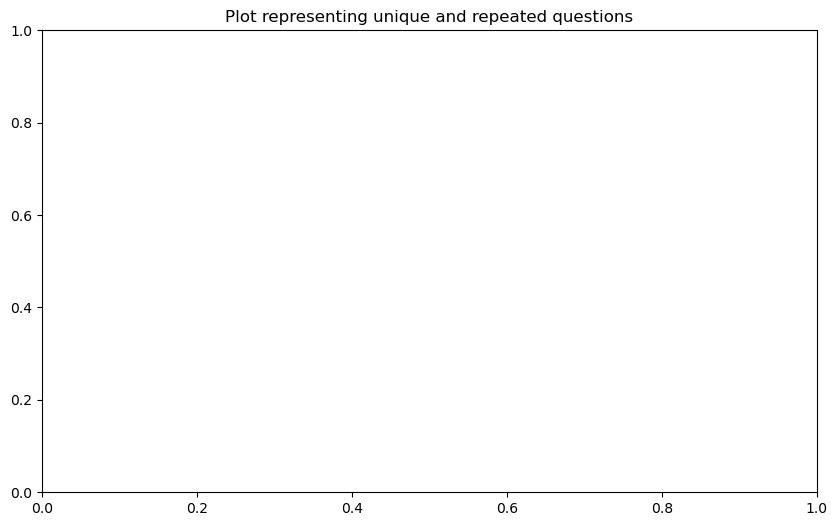

In [15]:
x=["unique_questions, Repeated Question"]
y=[unique_qs, qs_morethan_onetime]
plt.figure(figsize=(10,6))
plt.title("Plot representing unique and repeated questions")
sns.barplot(x,y)
plt.show()